# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [19]:
import base64
with open("/content/PPPhoto.jpeg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAgICAgJCAkKCgkNDgwODRMREBARExwUFhQWFBwrGx8bGx8bKyYuJSMlLiZENS8vNUROQj5CTl9VVV93cXecnNEBCAgICAkICQoKCQ0ODA4NExEQEBETHBQWFBYUHCsbHxsbHxsrJi4lIyUuJkQ1Ly81RE5CPkJOX1VVX3dxd5yc0f/CABEIBMMDbQMBIgACEQEDEQH/xAAxAAADAQEBAQAAAAAAAAAAAAAAAQIDBAUGAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAvnwAAAHAAAADQNANAJskpAwBMAZANKAAAjABoVoBiYJuEUCGhicCqliqUJtRRmVq4ebWDnUvMWoVDsQygQMTBVIwQwBiZIwTaAEMTEUiRoAAAAbJLZD02y573edZusxIvUTDIQq5ANwBgJgJgMEUgGoAVMGJU4lgoCRiBgDEwEKwAGQNAxMAACiRuG0paIC1E1tGZZcosbV1I5SpAlgrEDTQxMcshDVAMbRKArGkDQAAMHCWlLg+ipOe95VZ6wkla0tVOK0mszpNmaudRgQwJeQDcBgAQAUNEAMQOk0DSYAxAADENwgYmCsQAAwIYmCAKljcSaLMstSDAoARoYigQ0oIGgAABgKkAOE1Sk0ENqwBwhlSVRm97y5n06LzXqZsg4SJ1G5Kc04Y6hAwHCpTNjWqsI2UoJnAI3GIGADRA0UIAGAAAwQyEwoAgYKAIAKDEGlLZmjWc3YxFDQMBEAoADGg0hiSsTAABoGAAQADE1AAYDVuM1vRz10XHNpuRlWnPWhCstSFqJNJhlCkZOktXKlsSscvY5nqiUOxoCaQtCnLjTOkQ0DARQIZCGxDQMAEhiYMQKkDlVZCLSAEwAAGDQACAA2gAFaYIAAYhoaGgNKCYDQA5U7cZmlRm9NDCtqlh3KFRatKbNZjMuEajU2S1BSkqlVGZWcaIctaZtNXy1X

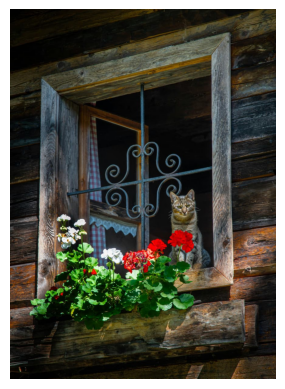

In [27]:
from PIL import Image
import io
import cv2
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAgICAgJCAkKCgkNDgwODRMREBARExwUFhQWFBwrGx8bGx8bKyYuJSMlLiZENS8vNUROQj5CTl9VVV93cXecnNEBCAgICAkICQoKCQ0ODA4NExEQEBETHBQWFBYUHCsbHxsbHxsrJi4lIyUuJkQ1Ly81RE5CPkJOX1VVX3dxd5yc0f/CABEIBMMDbQMBIgACEQEDEQH/xAAxAAADAQEBAQAAAAAAAAAAAAAAAQIDBAUGAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAvnwAAAHAAAADQNANAJskpAwBMAZANKAAAjABoVoBiYJuEUCGhicCqliqUJtRRmVq4ebWDnUvMWoVDsQygQMTBVIwQwBiZIwTaAEMTEUiRoAAAAbJLZD02y573edZusxIvUTDIQq5ANwBgJgJgMEUgGoAVMGJU4lgoCRiBgDEwEKwAGQNAxMAACiRuG0paIC1E1tGZZcosbV1I5SpAlgrEDTQxMcshDVAMbRKArGkDQAAMHCWlLg+ipOe95VZ6wkla0tVOK0mszpNmaudRgQwJeQDcBgAQAUNEAMQOk0DSYAxAADENwgYmCsQAAwIYmCAKljcSaLMstSDAoARoYigQ0oIGgAABgKkAOE1Sk0ENqwBwhlSVRm97y5n06LzXqZsg4SJ1G5Kc04Y6hAwHCpTNjWqsI2UoJnAI3GIGADRA0UIAGAAAwQyEwoAgYKAIAKDEGlLZmjWc3YxFDQMBEAoADGg0hiSsTAABoGAAQADE1AAYDVuM1vRz10XHNpuRlWnPWhCstSFqJNJhlCkZOktXKlsSscvY5nqiUOxoCaQtCnLjTOkQ0DARQIZCGxDQMAEhiYMQKkDlVZCLSAEwAAGDQACAA2gAFaYIAAYhoaGgNKCYDQA5U7cZmlRm9NDCtqlh3KFRatKbNZjMuEajU2S1BSkqlVGZWcaIctaZtNXy1XSZVEjlSghyoq4hG04lQ0WAAMIAAAAYqGIgQNKmIGhDEADEwBsEDRAAAoDBNANpLBQAaAAYgAaAGDK0zcHsRLdSxWzjmvYWWEMRY2qsMzOrWa1KUhSkGq1rBde0nn690mGlhZNry8fXx2NqprSXRjo6SozUuywk2nN00CJAo5ogHYDUAAwSskSlKq5AAAAEMEwAAABghoBgAmAADTACwE4TBQYJgMNZcXqozrUjKttJcHuRm7UoIAZQE2UZo0IVjeRTnWNZldlnDr1sxuyIpAkQVDcs7KimY6kcHZwro4JbMwqR0qSRuXKIAaYhoE5sBMbhFqQaAAKAABwAAIGAAADBNoABDQMABiGhiYmMRRCVUQbxE30VLhepmyUiKaqqi4SJqiUXEFlqCqWmlnKvQSefp3M5NNqMnpIqCBE0S5lG2SrEiyVsFqF5bHLw9/nKDUoqZJpRjWjjJdGA53qznpIEwi5KzAoAAAAAAAAGmCHAIGAAANAxAxMBAytDF6kZluWDbQ5X07HNpupM2FSBKCVWTMXKKskLIIuTWzKeqzj13ZlrSsHLBEwXnNu8SwbSBeRShy0SqsTHUxBsVqZzSCldc3nel52dUUZo6kcQrNXkiiHW2vLrFZPOylIDSqAKAAAgAACgAGgYEAAAAAAABRLqoh6kub1o5zWdQ686inJFTCqwhKlCuGhoKZeyc1dVRz1qRLc1SmpXLctPOrKUocuzJ6hk7Q3JYx2YzszCelmD0iWSJzdtOP09SJ0x3mKm1Lzs5/P9Dzs3RwTTiouZNs6kYIbE0ADFaZFMlwAsaAAKAIAAAAHQBANAVRBozO9Lzc6tQhSaSFCYlEqtDN1alw3LBa3ZzHUjJ7aRlrOgyJLhBSkW5Qja0M6YUlIlYK61MVpA7GKTKXWuXPN655zOtM28aScSshbmnpeR7HXmc/Vy7xLErubObzfT82XVjIc51cCgaKY0JFQqVGmekSiWdkgUAAAAOEwAYJ24zrVSpsGAZBWoXIOs7gRMrcqxhVI2qMK30MNNAViTQxldJlGpOkJuQlyFSquSS2CNpgtmQKS3Czdlz5510Z5XnRG04uaoqjOLNjnnU6M8nvNOXQ4C/Z8T2dScmrlSqWqjQw8v0/Ml6Fas5qUDJJWJgxGzxEqGKAyXcmRQSVRDuoyepLFMCWBSQ0MTIspwynKqk6InfQ5tNdJMa3ikNwlcqOQbmoCgbQIABsoU2aKJNYmyVdLOsRi6vmnN6Y54muiLMXN0qdZxZusJ1Noze8uaVS2ADiZ0oxtgk2R7Pk+pvMSjUhxUt3Ghy+f6HlnSsHKxMCggtEumItSyrZBcgnJNUQMATBMZJSErQkxJLusTpDCtGZ3cwLSRWgNMnWnJ1Fho0Sms1oAc0NDoq5ILImQI1lZ1pmGLaCWRZmqyNTR5FNVViCbBCsc1JNToCblRQQtcxklNDJYIJSaep43r6kxpnqRpmS66Z6HN5freXAU2mUZsVdJmaIhMIGDZRBZWZaSRkqGCYAIHMsBVYdPP22YPTCW6zIshFiRRLAmhFSVthJvpjpTqYjVPMKCWnks3VZPNpAqahNnzVWsC1EgsFpKZ0xa0xIqBVcgUghIWjciUlQ3Oa7HNB1RzOzacimgBgP2/E9upycXM6ZdEprnqYeZ6Xm51TdY1oNEzMWbGYEM1KqLSlLHOqMloakFLGhShlNJYhDohiDs4+/eXndWca6MMbEENLQl0UgqArJXc1D05pjoMXKx1LNRmdC5p1OmMXZqpdWQ4oQgArAKlRLJjvrIauWby0saSlaiK0eGdnVPMGsyUAAADATQMTBplez43r1GW2NyujDWWtcdTHzfR87OtEtMaidXZgbXrPO9pMTa7MbYVFuxS0qTZgx4qE1BCNKdLcqKMkbej5Xq6y1WepeG7PPrfn570WZLrOTl0edQlopc6qUevOV0Ti7KSKoljdqByxy4lp5qW5FqA3YimSXMcu8zvPQck511585WkIsBFNohiBiY0ANMAABiGA0LXreR7Fjw1yuVU1K9stUy8z1PImt9MdMaekVrIndmdXWpmVMOoS6PETUwk1WES0RMuhgjZZMcXVZ3s0ydKW+7i79ZIvLU1rO7H5/ZnnXHcZ411LmI2WRWqhwxFMAbTltw4pAA1Y1Aoqol3A3lB0rjVdMYlmiizq4+7h1kAmmDEASMAGIZAADQMQMQMVCEwqXK/Z8b29THOqucHUm94bk+P7Hky6ay5bIdm05MtZxm9JxyvZnzMubCVKstSWQdDzcb0Q89MxkUE1RkXJp6PD36zMazvI3I1Sl4ebqjOsacZtvOiyUWpY2qHUOLMxdc1JTyzs655A6c8nTQUAANAAGkUndwehwazLRnbSYMQ0wTCAAAAGCGCYADEwBoV+34nt2Zpxc5K4NdstReX6njy7PMl0iaE2hTRZCYIqhxTMzW7MSwt5rnu3lmaZorUmU0eAXKK29Hz/RuRKdTXn2xN00cQtJc8enPNxAlmhVTzcukykvTmdduEQsgXIADQMTUAAAAAaYVNJ6Hn+h5+sSgz0GgpBANUNEMEMAaAYgYmMGJUhDYe143siz359ZMrgvbn6ifI9byDSbhUtKTLXbMQ8zSZY00S3IIZC0zG8zGmhUxBcMENiYRr6Xnd+8mWnPZ05UG01JxaZ6QZdGS4zazqE1E1LVgS1JREbs5jebnIqdABBgACgAAAAFxaeh5/oefrEA89AEMABAwABgBAAMAGmDkViYUnD9fx/asc3lrOOdIfVybh5Pr+WN6szpsm80aGSNMWEuaJExuQuQMRmdIYJiKJBtA0g39Dg9DWcstc7LrLoKlycmuWyk3ERNzLnGilxqblQyVDZLaKcVLUjM43dnMbTqZjVgAAAAwaaej5/oefrEiM9GAAAhgmMTCAAGgpAMGqY4TbJbSnseN7FzWW+GsYppV1c2hr5freOdCTEJiIQNMU7ZkO7MqsIRsZmknKkZ0AABQNINMoTN+7g9G5wis6fVy9BWbg59sNZam8yotGa0iXBzWNUhzSGrN1pyprGOqk7VLzu5Bw6pKozjcswW8WZjWoNNPS870vO1iAM7AFGAAABANDEDaCyQt5C6GYlzIUJj9vxPYs159sbmc3a59HPqa+T6/jnTMMlbyS7kiN0DhGsSxgigkuRHIwlYAAhgANklym3fwdmplF5F6YwdMQLGmPRAIKbROdyvNca89SUpp56TZeXZz2czFrLqGdGvEZvdljvNQt3LzO4puBKQEzqWd3nen5vTlmBnoAADEMACAABA0FMEAMEyEDpDA9nx/YTXm6MLJlyFzZt5Pq+SaMgbljSY6zsm2EUqBSAgAmznSco2gchooEolLZKOjq5OyycdsrICyHUSx0c+4rihubJm5ObXPfG4VGdGPVhrNRrBzAayAAAAA6gXq04jLtyy3ms10EvMbQeh5/oed141hpljo0LUYAADEDQAAAAADEQDKTAAYez43speOuFkzbJvOzTyvU8oqloZMaJgppkjWs2ORFJSaGQaTAZMJoYgTETEDTAGu/VzdNzOG8VnqVFcvVzmW/PuGmepGidKLiMNsujG82yW+Xqx1lDmXmA1kAAaBoGIVgAAFwR3bcnRw67ed6HB6vOsdsOfQA1kaFYgaAABiYAANANDEFEBSTH7Pj+umuGuFjz0xNCKOjyPU8w2ms6qUQDZIwYgc1RmtYJVhmWGQjOgCxFAhskpkGga9XN03MFpU4sIuZePbHaw1z1J0i6M9Yjn6OfpxuGA8tI1lOSa5ALkaYJgmACBoAABpr074b8Om/B6HB6eE4dHPz6IHqIaAAAAAAAYgaAAoQwACaGHseP66a8++Niy6OcNporyvY8kC9TCtkZ1tRgaRLU3marnDoyyiNYh0kIabE6SNpU6zI0UyXKS9HVy9dlzeQgBxUy8e2eljuLHSRciMejn6cbmaQNRvLrO5eFNIAAAAAAAAAxUyzbfLXj06fP7+H0cIntwxrKL2riOvkABQAAAAAAAAaCiQokGJh63lesnRz9XNZXPalnoz0sfnej5B03xOa7MsXFpA3kFIBKlSaRemAjAESFEqWyGNBQ0wAOnt5e65WO/OIVEy1LiUqd56pSZSaIw6ebqxuZqRhG8UJrwK5hDBDAAUAAAN8+xkz5pXv6ODrzdcdcemOfDpvGuE9Lz67uHqwsxAmgAAAAAGIaAAAAABgP1/I9ZOnK4TAKqdcNTo8b3PDlTHLCsoE0TTGgEnICABiGLmIGJjc0ggUaYAju7eLtuVzb4qqz0JhzAtIJuastNUARh1cvXjcTeS3NRvGk3NcUa5ZAMQxUNAAAB283Zw3OnTGEdWnJ2893NYdufPz+jnjRya81dmO2FmQE0AAaaJzlwACgAAAAAAwB+r5XqHRjVJlneVX049CbeH7XkS5ukTYBLQloGa1Uua0DMcFmTNJlmYygAGNAEVLQAHodfH2WcxtksUpJSIsixWiyiNCVUGfXx9eNznpmumO+O8bZdOFnLj0YZqYAAoAIaAGej53o+dc33ea5fQzz6OeteD0vP68zPTnx0QGp2c3VyXMpk0dk5s6xhK92XN6Gs+eaZ50AKNAwBADEx+l5vqGxpkmLeY+jDatvG9jxokblq+eTpOVmsKiFozI1RNElEA02ZgUxNAaBlklJUUR19fP06znlrzrlWdDTINM6qwEnTKxxUmXZx9eNzFyXz757m2PXzazhz9PNiiYAAAAAoAehweh59ygJrp6OfXjvr4O/h78Vy9fJjogNZ7+Lt4rJAmu/i9DzrntfB6B5/Th0E82+EoAAAAAADQP1fK9U6JlEy0GuOla+N7Xjxm7azchakhpMlgAgaQNoEMMyikwQYLQmAENVB39PNtZnz9PPWcWFJqC87rRq0w2y2Jm5Oft4+3G8hhOe8dM649GNmXJ18maA4fXXInWuGqvL0vOVAS+hwehwXMgTXTvl0ct68Xbw9+JzdXLjcgV3c1a3PGBLv0cDO/lzgO/n0s54alAAEAyiTXWzlO7RPP9THqW40JcJ0yJ6Ofc28b2PHAmlBBSAQwkpAmCABhDkZm0DcsbTBjAYJXK+htnrc8+HRyUTclLXOFcaFVNVFy7CbUYdfJ143Ahaz3x6Y2zuLJ4O/gzTp5uyMTPrHhGZ3cnZw2ILl7vP7OKwBzXX083Tz1rw9nH25Ll6+XOoAU7+CkrPuzOU1Zjp0ULj6HZyrvtPP07lXNpWca3x5nfHAl7MsCW/V8j1V6c7zSYvMN+bpDyvW8kmppQqIAKaCGIKUgJsByROmZQMT0CKpA04clLBpR17566zzcnTz1RdwstJWNIstFWSNI0Bh18nVz6QTRvneHXnsQU/O9DgiO7h7Y5OnHKXsrkZeAB2c+6YZgo0zr6ebqxpc3Rzded8fbhLzHVRxv0KTg6d4XVSLShDjLmOrPFRpMgAAAAAAw9XyvVXqzvNIimZdOGxfkev45LTlcsEMBt5sFIARRLoV6GD6Sziq3GeiJbeMHSudVtEg0yz1t8t64MO3mSds6WY2jNmprU0vPVMpvKymmc+2G3PpOuOprfNr252RdZ8XdyZc+uaze7i6Ls4zRy5abUPj1pOc6tK4b72mXRmDuOezqWHPL2ZchNb55BfZOJtywSgFdHR5/bc8S6eaUAAAAABiYB6nl+mdU1BkNLOkNN/I9byTN1c1lWqiFRZLZQ5Ep5UVWIbzAtqojFMEwoYxNgDESuD2CrObHp51FpnGmemE1UVFztpjvUZ6ZXNCDHXLo59crmxdPL1duMXnVsc3RnJxnZeXFvuldKgJyNo4UdccxLqs3L29nH1xnz9GHTFcXbxzWQOF0c/eYc9wGi7Ccsuuzh2qV6ODt4kAJQYIAGgYmHp+Z6a9CqISSIqA6/M9Hz6ioqBQWUkxJuVDQ0wVDE6YUM4mnQCGAMTRsAnTM9vWN5ePDswquXaB4a4Z1ogsOnmuy+e41m+beEW+KzqyGNLp1nnN964n14HPEGNa9Ec1lzO0uWkwdvIu7WfPKWdAB2dXL2ZufN0c/TGnH28cuSal16c5s5wJrs5+rC5z6evmxrK+bs3nDm0iVM7ZXHbnL5apaymIYMXo+f6K9CZJnOvPQUS6cPf59QNA1UIpioQIAZcIGpG+ZKUmSpayhgVLG1Qm2TG2K/QdGWmbhzd3nakgs2cOjnVuS50l61x097nCenJY6Mejn0iotMenl7e3LLSbtnPTFOLfDqxrHO7TXNYHZHP6B53Xy6GnP28QCcvZ2cfVKcnZx9Oe3D28WdZgTXXlthrGLTzvbs83VPU35N8a5eL18bPNPbep5HbMZ1rnpFnmFSAFMAPQ8/0I66jQjHSpco6MLL8/0POIEVd5XFzCjSBiQ1dTRWuQNVnEqnXOrnUVSk0UUA2IuznfXzL9Hc3m58PZxWXz7800sNIKVRZfTz3Zm7zSyGTvhvjpnUlkVXLrHTv5z0755tLOTpwrNcdHId64nFdeedmNRcvZw9/BYmql7Orl65Y5+jm6c9OPs487yAl7Ofo57nMCaADv6eLszdsevHN5tY2szaa3y71Z489PNrIArED9LzfQjrtaS4uLWcmWPzvS4U5jWCWgbQU05RlCCiaYTGkmbbOY0jUbTRuaKedGhFix2xPpqVZ1xcnb59dPFplKZ3CbSwVS7NsdIsSEPfHfHTNNDx059YuVpZmayRcaG2VbnHs8w59EZ0md3B6Hn2FvoK6+Pphc+2OprjnnLtyduBvzdXKZgTQAdPqeT3ZdpHBL3HB6EueOiTSa59OXl6+XWUAoAP0vN9GPQzpS5jBY7Z0+Lu4UyipG5YmAFVCsaupBuUVk4HUs5xGo0xBgUILJa1lUn0ekGbycu+NY53EWriVVBZo5sJT1lS0V08vRjcSKtMdeS5uWzTTCilvpZz3tcvPntzCzZRSDq4u7jud+XpuJ7uHppY9OJPNvlLfO2dPF08gAKBQ+3m6sXXfh2xro15c9OusckxjW9Tlw9HzdZlAo0w9Lze+O8l505lVfM5s24OzkZ56kVuQdSi7TlszDWZCgkmbknXOzmA1GgHUkVU0DrY5Z7+I+hNImvPz0zQ59cxzspcOzp9fePE4/qOaX5uu/zLLEx7Za53mrkrPW9YwWyMJ6KjnrSF1040elnxWRO2YOarp530XPEaEufS8Duw25NZ04u0zrm6c8ZYQUABcUdfTlOXZpw689M00l5p25NQmNbOryPY8jcgChgPv8/wBCO0eUrwtGUWWa8vbxJyMLWJwVNDc0S2iiQpJDSoBIyrpDCuijDbVVVQRqc8r1cNZHuxpnLzYdOCXholru5s49jm4OKY+my8Xmr6X5hTtppl7Jj3+gL4nF9L87Lntj1dOWmNTcmfQ5eQ6pzrme8RjGxNYLoJeerzLeAu6yLBDOvDfHpz24uvkzrIamgAAAaDu0y2w59LzzrQzjFvHQ3F35XqV5Po+bqQBQ0w7uLtPQw6ebNzl5WaONDo5O3mPML0syeilzdszrUsiNQLzZpeIPJoVPRcJoEIKvINVIaKAbpp7eehjpxTpnYXn0EcvXy51yTfbefDj1ZpivS87b2/X+Y2k+kXgZS+/4GSuneMazfWYWdjzw1jqnPpTHSVTiiIz2qXnN886yW0S4x0zLz3e2Ohhrh247cnZyTWSalAAAAA6t+f0MXhXfBxrpUc1dPRXLp1Z1h5vocNmYOgAfXydkeny9PMZ57c9j6ufZern6cI8sksoAbzpaqbFUkW8kdC52usSxTrUtZQ7mVo1irozrZGBtmQxp72dZ53nJlYPTaxef38GNV1+Xmx7Z4VH1ea6ek8bx/sMj5jo6NuTzZ9jzW+dN9c9ePThvOuW+Jtz7cCdfEjN07/M7rna8OXU71LuW1oKGpeXo5unj3z5enn6c+jl6eaaxAlAIEykNG3dw+ji1GE49W057a511cSvPszx2uMMOmLPPNcrQCH28XWejzbRZli9DPqw6F6ufp5c3ynm7HNNYW+kc19VzXNps5ctLWNk3UsFmakLWfOtV34USS2PQgpLMVIVFM/QGmTXNy9eJHZx72Xx9mmNZ+f6sYnm+lzxp393idfXGM114vG+jxsT1J8c1Qk6vRwvHeemCDbz+zlkyAxpMQIa36Pl3cd3Jkl9Q4tNYjq5unj3xy1w68unl6+WXnKM6kAAAAXTpyrl76E8epKkkaZVrlrvzduvNzzrh08Zxen51SDU6eboPQw6MEmzaXHRY1356Tm+WmpthSO1pLNWSpaEs1AbGazWmqqGWecrOnJ04XVRdlLNyk7RLlvh06x9CnE1y59PAXSmNSuSa9A5q3y9Od+OXs54s8T0uj5iX3PN87pklzWqmRuenis946ZgL5OjCMBmNCYqVITAE0CaOro59sajDbHry6ObowmsjXTl7MZ6ljvxrqw6ePNvpVOp4/RALCiZomo1zr0OE35WZ6dPHv5/oeeQDlNsd69PDfNFNE1OeZHV083UvkiedFl50b59BGkG8XXPnnXZjyY2di5NE6o59FsiU5xvedEOV6ZMYgUsSenn6rPdKnOubm68FxvINuTp586x6MPQ1idNeXXLn1y8yX6D50Wrr0dXXyx0Zb2nhc/r82tznU95okycd845h1jUlMzVokYsjCVSOjbLbOsc9I3z0jacevLUXn+mJFzWWjTk2WHX5/RePRn05roJnF9PNCEna9c2m+dbej5OPB6PnmbTleuOx6SGPn6OdeVvslfTj1Zvi2tM6VVnNde3N2bzxnRWs8Z0ownVWZZdcxhHRBkaOXjErkC6jRqFNoHEl9XD33PvgprmxqJrl0zDp5urlzoL5bnTHDLfKpbia9PizPSXD6HPn1a8ndDKjevM5u/i9GppaVnfpd01831exrHk4+zB8wvovMPOVzLKrSMVpK7a43jqo6ndKent59/Fe3Nj2uVjvybyc9yJnXw6dPP0M755EdfGaZ9GNJ8/oTqadPHz9nNr08d8PbzWch1c0ppnovqAJKW687tSvvx6sa8KiZrQyqzbXl0XZUxLSs6yedZpNLeXlGiQlkmKqt4zqoCaox2zuyK0o5u/k7E92LJrhz6uWsMN+aXuMfTxz5DTTnx8ff1/OXjSyuuzl1mZjPqd1GvHG9+thxVtrTvrMt8/YWu5Ti0+bpManiOvLDuPm8/Y8vPfr5q35eoT5WulSb5V18mubXR53dnfnT63k5xHL6vJrnnhu98OWrvpjVqU06OLuy6/L9fn3PM9Dj9Ca5/P9HCzk7eTY34u/z00zd6nHpNZ36joTGxTUdEdUuukaR5PP0Vjpz6XGpV4wnY+TTOunCM46Y59qUbRvOK1VzzxvhYIUoAjpJdZhFvKUvv8AN9Oz2mcC758GpeDhI9Pz9cvSvze3ly24cPL1roNPQ58sOf0+Lky8++70dODo6etOPu5tsYvg9fm6b8vt4tvTv0Ov53WL6/F6uT3+Xs225r34Tm8/1vH4/Uvr5VM3Mat7Lkpw1zwe509PN18tcz7hjijju+PoUTfPtjlU1WdZduz7eDrzr1ca59Tm6+bSs8DAN+XsXTk7eKxy3Zmrzl9cnRcw0zo3y3L2i48TI0z0zrbTWczoedROs2ZLVGbMgjE1jZCliKyshl2QujQ4V6Qefp2OOatdJrg7efe57ufrxXkcwh083fZzbOZdMdcMbx5+jmuSolx7sMKy7K85V3er892Yx7EYnN1cHS04Xnp7euHRjVbc2uPlb9/mc/TX0/gYrV9Tk5OvPq6+DQx15ezHm1nfs5ulw49+To1nSMK5e7fnpa+RNc2idEoznDXl17dtoqYUuc4aBNuzzat7OHv5ddJ6KqbfF0c2soWestxU17Tms6qbUummdm2mW6eMa82enSZyaUtZeY1zRRvkGOmdmS3VzktkYqpTd5tpzQZ1SBl426Sjm6uPs68u/g7vPrn259k66ipXmNVFZZ1HNvkzzHRG+Sd+jzx5PXvnmcp0c99Guu+vLht6fz/frv3zh0dOEeL3VZ4k+s2ufHbz2kSddPfneevq15evH2azv178/j6ennfPl5/VyZ9Fb46OemUbPJy6RabTtnnPKC3oa9E889jmXgWrmc9ext3xehlrvGesTXNj2LeOZ9M2YazstdGTzre8N5q7WlzW/Nqnn4vHl110441n0jzFqelyZ63OU7YxEuRoB1LiyCrdS0knZnuVKaRMu8AcXf5/q751xelwrx61og86xvS81DObi1y3nJ2V6WHRy5Z9mmPPKy5XS5dF29Xdny6Y10bQY9HobcUX5no46TpguHuwfle309Onyy9jy93Oo6t69Nelpi8fVc3J5Gvl456cryddKypnq05c859Bc+2ZxGWvYTczKa1l7MRY6XfLrp1u27Qnc1hltyCqr3gnQ6Zy0mJqxVjdb5Wvasui5dctXPlYa5Y0Vmrezlik035iWpmbLiFZTznU0MqSkg9HHSJqSgi3Y6zmXqxiufTk9XyfV7cO7lcVXJ6/nZ1zVrOblxdHLeSB6k7zpNY9nJpnHV2c3R5+XmV3+d13RfZb5vrehlnHB3cFTOk+Nr016nFlWE+pw3b6O3m4Za5NWcHa3139B5jM3t6vCu4y87ryzjn2rZveMefOtKyaXmRqoNLJfRVxzR6OYPpfLv4vocGnXPuzzVFtTn0Rnpz6y3K1Nbw01Im9c6FqZ1esgtCqketz87PXeenDXVdnC+ybOdarWcRq5IrMWdCSWCLDcy259UJBWRrO1ZVjTWqri9by/Z3zNNbo4eviliBY1zLoyscVpm8zvj1xpDsfo8JjPqc/L6GEYvtZxqts57PG9Dy7rmXfydbjWXc1y7mEdvHK0G4O3r5+3hzz5sn0TN5ak+h59zfTrw9Uaef6OKZQSq1y7681d3BrVdXEzufD6Mvc6jHfDzvTdz5z9BXGG8DWkTnbssqq5WlGsRnW98tm1YkbVy5nodHiOyq0pvCbVk57TZlO+aYxUJM1OpBUoqgNXnR1BXPqqchlsjLeC50i0vB7/ge7vn1Z54rfLeWauKpmpvDvucT1MuXKJntmOTK8Om9eHo5q37fP6s8/T5OvPGK4enPNrj9jLrfCW/Pvqd3MsrzuxCbN3Hdic/IVuUtc4ir6CMvb8668/oziX0b4ts5pZ72T0urOfyOrnuobVpbg9Y83089dHkm6iQsyyNlzxZ2vzor0o89V3nnB3xxidE5Booa6et5np52hksyTVKMrnWM5R5vPUcUrlNSMFTEzucnLpTzuapxJVZu5mjc8v3fC93pzOe8FOrmy4cu3jW+OePZxxXZhlm9PNWb9GNNM85Bzdt9XRz8ueHX561fXzNuWeTo82+1WSV3VR6eZ556XPlj3+dvJZnWc8W2Pd21nrjjM7PF13YzsZYp53oLKaXRy3qdXPAm0eqszyV26azx9cmYss+Xp16c53twXYScufVzXSAtAYgYhgAwGCbDq7/O9Dn1KnPNkyVWZTvNYXncqQuQGSUUgIbh12MOfSKqglgQFjqNE4fZzqc8cuqreLn6efONK7fHmU5e/UpC8q1xJLgYel5/RM+xw9GPLHn9uHot+dh7vDqeY9st2VU1rWPbmLTz95uezDda5dMjmZW8dJl0TBVbGETGGQyiazvSk5p0epM8Xd5kyen2eB1R63Fy1WOXZz2zsXvBDmTXAvOuE0np3RcANA0DExk0Jgad/P0ce7gLnONY1Mp0xuVLixkljJY0nQDEUHVlkZrcsabiGOu31vnvY58emVwYz3xx7anm8/oVreHLvza0yXbr08kZlhla2vTPP168sc/TrXm55y8yY6b9nu+Y9C59XDCuc86l6Wtcd6+XmBFdutKLidcasNomZembk7Thk26vPu6uEplipqUFmz168TzDWbINt6y780uvN6WGHlX2Y3OM7VJje3LrV1wvr335enSXhO618/Tuk5X1ZyirVMm5ltxvY2Iq87ObzvT87WczSlzneDNyJRJTGIgRqtrx0wnss4H6Wp5N+irOKO5x5np8+2eF6YvPPPHp8q7hM69U1QkAxBfveL6HnxcHHM+vhx6JwLo5u/S3m1vJzTE7WmpHvhSKo0iC5S7xIunthlFq6We3NVUFy0OQG2b9bncdl+V6tuuT8/R+Tqpv1Orwd5j1sOXWM1nyy7Xl1dOqNlN5LcooM3PK3ZOdhkx6zM62Y7KU2mrmstAHydvCukSpRy9Z5oqNZYMQwBkesCmtFm0RELssQ7NjnnB8z5MzujleXR5+uG9JhvaKkKOyTibB+t5npcLxclb9pzA6EwQ2IAQWTqlIlZJLbSZ1hrJ6VreelPKLZLE6yzCauBOabQvZHPUldGLnTTMsLmkxNpXNszc7vs0y1XPXW+Lptqh51WFdUcM9HDqVU1c7FsckD0zpbaEjHbKtOLoxmodKUz0x1jnQrG0xiBpI9LXi3l6s8UukKRkI15dMkRm2EyTowdEyK1iY0gALTr5KzNnCmUPqjmpTYyWCtSobTZex0yfOP0/MXNt63L0cZVcjGSxRRE6SZrZpit6OXTWzm01Usu6lztoY1RnrGpLmjo6sdV4Y3lerNMekOtzmsMN7TjvaiQRlWOtWudGslQpCpi1jcxsiObo5t4zE9RgxNqEUjpY+fUlwlEGstKVrK87mU1YgKAAGC0NIwGAxoObBt5ShIKkJpo7hwAk7TktU9N5vjvS5cV0KMm51LG4impU3Uua1wsp5o1Oeq3UhUlRW2etZxRqSCo1jrlypirNYGlci1PT04tpd9uXRKylFzSNMNMQcFPMkt5aQ425TdWs7UuVjk7+DfOArWRjAGogjqzDn0ibjeE4VmryR0PLSXnlliGgAGJnRLzIaaUzaML2SwtM4ljBbrM5xq5TuAH0S56TpN7aZRjTuVZZjVaJSmkxJqoYUiV56BiaxqZNXqLQctpmbobqa4yp3h6lNNZyXnLsamV0rO7NTGDTXi0Ttvgo3iFLoZ411xz9FlzaTN1kumKlNdebfPR5PM04erl3hA7ltMEIaTX0c5UVi4AbMrAidMhAxDBABtn0RGNoB1Ya53GkhLmqoxqgusnm6GZGkDLY1zN80gAZpNY6razJ25ZpKEmDedlS1KlJqECstza01MdfZy6NEzBeainLmJSNQqLsqUhy8jofOHZPKzcxcu6wiy3kHSc9GkRJpWGlj6eQzrRJhzdnFqAnctjWSlCGWdEWs6yWiIGWJyF5VACBiBtho84lbh2a3hrFVNxMbs5joRnQStyo0eNxbih6Z6Ks9IhuFZtmlVOFWxERpOSq5zdj1mDpnDSUaEU1nVVijoWWx2yybmZyTfPF2aZqjMaobk0eNmzjM0zAEmAmE0rJuKBILIDTTKkS1xWpIlrO4skKG5YKgkpWCtSwtAydsgsEqRmAO82aKEbZyFCsNFpCYQ5qZS8rq0RlRE1u8GbGcpq8kazjSslFvIrSYVarMSxaGJdmZpNmejUVWVmsSWZzqlnpx9BZzKjN2LlnqJgtrXlrqlM8wLKRNqqYtUx0clzAjmRarNFmKNlgl3MKjoxKWIqBiuzOoRs8GuqzEtIJNZIbogoILZm9Az1gNIFKMsMdsStM9Eus6GghywyodIuQQFA4mZmrUumgAGiVCy0jWYaVpk12MdI1z0gkGmTtktgtJs6MdEMreubLpxMwgt4KXqXKjdYBsnvnXK+hHOtsrK259RzzqunKGNAgCAbEwNVkq0M5NKxCxFUJRSCxADAlABiYxA04AYA2qudIjPTMbTsoTgFNW4YlQjrO5WXUZK5pSSNxqZrTOnUUA2ZqkJuzN6iZ6OgeajSYCoGsvUlzZibGYaEWNkxazDTIVW5By0bXzEvVGSsrMKqs0g5VWpC1IMQAANMbRBFKgbBp0NCNArQRtlvkQORklgIlYgB0Q9AWs6RhGqJdUZvREDKWmSjRSylNFTQS6BVDNNMnD59JJqZrRSwYhuHFRJTkKGtYhiGnBqZ0C0zVJlj2yI1eBLvnkrNDMrSUikgYgaABFFw4cgAOgCATEUySmSWyCrMToccx0teU6UYPdGJ0KXFams4mgZLd1zvfJE5JaSEYNSmQxOUQImnQKSiQpJDAGNKS2SObHUOGhiLCC0K5okYRUopSVd4htEA0ANA0AAAAAADAACaQmMRTILRJVGZqozrRy51aE2hMQ0A9bc1kqhJdPURShMayqZKoQHMtLmN46IxsJJVjgokKJYxBSGIGIaAbFScSNUAFkEtXkjacgogssgLJRSQMRTQDEAMgABUCVMh0yCkIq4yNUZ1TWHZEFMgpgVEN66ryz1Ksb6MTEmpAENoGJgmqAQ6jol1yazqE51kadjci0hpKqRUADS8xS1mdJI6OXoxV52rJGxDQNMKgKJRZAUSxiABDAAENBQAAADIRQSUyC2QWEN1ElNZKIGgYkUSDSLKJBiCnJDaFqXIXnRU1vK56edU3YuTbC5KikCQpprRLE3IAx9cPHSJqLkRNg1NmkpjBkq0IENUjmBagBTBQxA0FAAAAAAANEUhiGEtsk0USUEtslgDTUCokuRNyMKJmkTaYAxMBBIxFjTQDQAA0DuHKOQ0gQ3NBvG0sK4q28TEdMzQKAQxMZJVIBUuqXXOs8dFLVyZ1GsglTARyQOldSMhMa8gGsjAQFAAAAAAAMIbCVgBIJSAGAIBoAYUWGbLCiwzTELnRhLDCtMgiwFvEEKCwAWQEGCiBAC0oJKkAgKugzrPQLnawz1iguerywYbC0kCrDNJCyswsdAs9wZ08wicwEBYoCqoNTIAjUKbCHiEf/EAAL/2gAMAwEAAgADAAAAIQEOgi1bamthXd0pt1bMAGkMc1JaxBioqkPKLBECNNADQItvkgQxlFP3XmiihQR5aW6h88wfFFrqJQe5ulvtuPUYrFGF1OjibPPO9BwIx4yLcF0hrW5T+ySWSTGGyzEPNiHrLPZwNT1cODDMUQ2qMe6eJ2KGnsPf25LseDTbQL4fcUQV4e5ATGfhj/Jg7ku55sJBpD86hprxI59B2/7x24oXFfrZP1MBNQ25YR75c5BQulunjzw3KChvA1KBfp28aMeElsspvVMwQyZzJbPkANB/c9Nf8Mljupqk/wAJxbOLBH1azAPsQHT5+spXt+QOdGxMhiNeXR/pYlP8YtVALLK6p4ZKJKKqE+7W1DUXwHjJDi6sq3EBKm3I9F5hJhWp6KJ3m0MZyzpL4J7aSr6Kr4Kbdld3ZOSOyBUV4utLXvWaIO4Nta5pj5ZUWOmzgQzjyxo4ZK44s5rvrjwtoWTLiB7lG7gruRB2W4Aya3dEJkT+LL73NABT44zywILoL6qPZ4ziaQ+53ZKft2FqJYqLZH0EpDsGeo6tAfgYGy6LL5Jz777gI4EWoFdlvYhraFRHq7EB/wDvFXJ9ZAHMeyc4rCSxbESAIamCu8M46uF3yBqykJ2zQScg9AUKC6M8TrxmXx817fy5ogMz6UGCFquGz28ly5N+A6yS1ucQYn53sMP5B2exXLcXrSHzGEtU0DXjDxdCatuNB2VMwBduEwosUXic4mDrA9pKt6oYVBs2I2EQQs1uN5BSowr7jFCG/E4lJR3K0Zk0oMOlOkXPnLPn70WeIxfU5aAEve3xSr4j7YWVt8l41KeO7IESQJSJJgCDzzn/AD8G/wCDrTG/m0KTsgIP5IBfImI4U+X8+C5i0QW36xmmFL/d3B2uqdAOOcZZxDiAyOyEAwDgR5TzBbFJy8wIp58t3nGRhkIvZ+0mgbDl28Xv9ZmUMLE7/u0sV2J+F1rQzpz1pRTijAjIao73n36j23EoIGLdhiIp5bhXrHbNWlLramV0kc7ZU3oBzTyXyQCRCYb7LKIH3iAwkFpc4bI5ZnFkzST2sVOJ5pJs8nbOGwX20hDTyhE9yhbC4ZZo51FHGoot8nReURI7KCxuVXkGPU93d/YR+qJnrvT2EhQDym/gTAwBBb46mzyt4Jffo/4KZ4jlEwTi00E/XFn/AA+2Yd97d5NnIEEM4V7MAAwgiSmfI61APrvvmiP+uISOSuOysFpJTzaZ+31rfc+DGY+IKWa89zd8gAW2OmZMB/vH/JVWCWe2OSi+yxsckK3h8IYajmEL0f8A5Wd+HPD53QjAGMEojmBMEiOPypSaogvopoiomlYUe9pnkbf578g/ThXQQXfXNwDMhrVMMBHLMNDgJCK0mXaqo3qgmoqvhJEZbfFmPhTcoLkrn9ffdbTAAItnD/bAHPGLFNEDHH1rRUlKnouttVTTrdzutk9uq9WvAhg99PaUYTXfaP3FWFPPOPHHOEBIL4IZcUox91QfxTUh4Cj0anlh6Wnhkl7gVfeQXfcNAGB8tvPPPPPLHLKM0DggdH6utpNDOWdiqACJf0//AAqg9tP9XH30wgAuRZ5EYaxzzzjTzzyROOG8KZAmEEUHHBzg1iAymSAff7grsbYz/nDTzwH9ZDd5rzzrXzxzzwQAAzcOeP0VoDCljDDkEU03hitPdLIVR8ZOEADTgX7/AOag+QXuZ18sA8YQomYAyQlIydhCCQBNp0S5Ec7sPiOFXmALRBBAAlEPDmBOA6Bde9x19lVhlYGcka9qS+K2wJksqWqk8zUD+ypzl6sBXdkAxUEkqMFBWN1hBNhZ/MEvGyQUAIUQ4aOuqqKloGCIjLMoaVUcy26OEVFJQcSj86qDXqPoOi8O8UFTegm86S6yW6qtRDKClEjImZ2rBLTiEpWiNPpB9kB1juQ40uNtJR5MMZ/efb17HXpCmrO3E2K83c38Pf7vroQ+niziXM3Vq7ytGZ4nzxtF5htM0V9g91otp9UiysowRhpsTOfQLDQ6MM9Lqbz4u6FIY5+haN8Fdx9tJowWqQ6F9aGQh1hoEU9rNy4UgIIMxBC6I9XJhT5xVzuRVe8QbJR6oRlB87lWscrdEVbyxEVxBJ9EiR/U/gVAYfFAFUFNylBdtwdoFo2DXes/m8ArVTZ+gtPD6BVjwo1ddZgVjEYl09vYlvEgUMEmbD5Asso+E8Kouw8d4EzriMayilG5blJ+cBLLn9ZOkfD9pp0K/pDnGo5/iB36xWOAUTkszk9AcLFPMWyZNzPBlUOARFVAIL0ti/y57PdOSudYCkw6LlGxi6U440oDwJ0ovaYY/GVt1B1r2qQUCvDvwDF/NbP3UiCQ1AsqqMm5CKeCg84AlqWHocgLxr+nkCJJ0R95J+/gLwAA7Q4upjLgm9ntmzwCD61hBr088s70eVlEcolWvKlRGWlRpdJQgc0UclaSw0NZDHdNAMFLAXdasdU4QU888QQ/g0o4EfJxARf30cTfKEWjws15h+Bof98tLJK/v2R9jg1vXphoEPQ0Rr4RvLAajV2wCz0faHWYulhyTlwPkRMhZjEXLXJMAxN14navyCnrLLC5pOpmHEIJu70y8Kxj88t+wH0Y44yE8Hg9jaEyt8ptYxYQsUQyF5cTi6276ERllz9y8nAJAruiUzY/04AALQG6gAITvBMBy8cEbLdoow06M+t/OszRO3Gajb+UZrD8g2IomVN20rz+XFmAE1VZNB33kP8AOBLPF2l5dDZR8OWQdYFLQ0HWKFyTyliB9Lnk405Zw/vfCiHPWv6IK3Z5fLC8k71uQv8AabTHffy0eEjqb5/uW7Mt0y4Rz9TAfEABvTDLF1+WM4gbJE/DVHB/46m/oW5cXa6XKPTak2I4lJqLI3AnyC9mco8vH3sGorfx28PzJqm30fEuUSkgrvCX/h32gI4r1XQJZZh8S3IF9bP4kI/QXDCupc7Fk/uyzl3cjZ3IZ/LHrE2QTh73ExJdreS9d9Ge2QDH5P7FPoJ2IPKbg/8AjTz2HfH1Ce0S+5XcWP8A6cr/AEAggq/uh47nISvI5JlEql0DU8ugr7qIxGEJDlCFaT0C7eV+SU+JT4myT0+agOBnaF9ZpLJCz18FLJS7wPYtFkvfYWLaRJo5zG6KT7y6X8G70kEjKENZcCoAUuj25IpW6fDGxNtgqdSkx+suSIa0wcWPDeGmuq8Vc0rbtpBiMP4a3iG/hO6RgMjWfs13qQOdwkgFjEwTXySp6uJSAh9A5sOGHc8prpY5XVjJ4TYvPCYiRpBiWDpsJlI5q5cpbpVFOHbxzBiJpTiuoYipFJQYw5o+EK8h/uMrhzhHK/Jnb+JhH3+SvaJ0ykHzZVwMWy2pEEEXjB8sCNriTRPqTQLXpKrzW1mwj2IrVZigxyMMFy61hMl4VzYmfBo3igsPHBpgpwoV6RW956H1rzDxKQvzhVvamiG7PoV8PiwNlf1Kjh06hmTz2IcKsJeHxcgcu2RNmb8E6+kaOEUF3ifpNN/ytHZmna4ximH9vbnJQkudXZQiaYZZS0LciTMgeNsiycPFctTWKAwTLbF13/IuRWVVgt91jBkN4gfVoyXDCWbYft9xCMfM7ZnkA7Xmmm5rYoYKdOwSSMYfZAQBjcNecZcnhJvfRqkalBMPdTWezchRRsPUwXaYB7I45ftEPIInq/Jjvdm9gaFnbpsoZaCzoVknGVn5T7K42/eR/wA17pe5YJ+i1Mcqf7xs+btkKZE8GxNOcPdjX8nbD9IMQ6e6tqAg3j17blfBAGydVy+VwUQR+U7CApDe+IQF6OZbXBRIbQLwpBr86mbOmJMC6e6Dkdxuuv2qA+9eSJDTikMLC4YN8STgwoLLP/fNV9S9tGSyn8urn7jVkqU3R5eO3rvRQpiweMUJcXIOuoOsKChJbjJsWKo5PSVfCj8D0QQiyyz2Wsl8ySe5KSCWzzDB4uyeW8JmbDVl7PVDL/8AbEBSnYWEsgjOnuAisleYY0thesriDYszNWv+T9n79MHa18SwcUzAUUohgsjtDHphSSZ8puYTZLuMzomxyVQvrivjCNMB3XUJELvtvrHDNjlmaXTw5Kqnn08GFz8+9Ydq5t7C1RxDd4VelqrRPOopglnPPMtvOUfyEgUOPTbR5PLuJFLo78CJOKAb+V28+bxvHlkIIAILirpFy5SYEgpiTrmAJjVRfbbLuFntJI4F7qMOQBUTI5/KwvogHAAHHvvn/wAN94B4B6GP94J6J3/78B912KED5/zz9x7/AMA+/wDwYofn/wD/xAAC/9oADAMBAAIAAwAAABDywoHSKYHX0p38RhGPRShVNKXh5I+z/Xvb7YmFLF6XMTc4qaTwfAhDM27pn3LXdQRNBPMrs6C4Fdjj5wlRhOhVsxZsG8MSjStf8ekMy9T/AOkzWFFU3Yi7w44sxxq50E01T0LL9K2/VfmmeTAwrM24X0Jv4t3H9iXfJd2LMOMXKwmqkAKAFiHENIKZj8N4ORBA3u+/rPptZe5oJnA01r77cSzWpr0bTi3wOx3T9DnVVkFwq2g/PtGFw8XZCfVG0/xqrK0aBWTEwF+jfTgYWQoFoq71Kzynxw+++AJ5g6eLq/GNZn/MPfvgIEW6Kk2kqeIuRP4XIJNBgskANEbtbU8uCGmCOSS+SlLxWiIuHfrVSgpKoWK4NCdfd+PE7Dgleis5t8AMakc6iOyucnF4iUEa53/TQrAWhZDvMMiQ6kPNuiL5Npx3GBu+d5oNQE4w0kYeM8OU1INwgf5Ar+kIDYJbF+RD674Q5lx8IUzHcydWcLMoc+W8oCyww0GcE80YdjQluKEj86AJ9b598JmaKySgqpXodXgNrRn35yv5mWCOgCSuMuFwcWxkgLVuCoEdbHWXQVwo6C684bcVhW8h20hKw4lss+JW1AwECFalH0W6+e++uWKsVwANhPGWR1ePryx3omv9uDg51flRCu2u/Zr0FKvVX0V2jtyaI70GwMkKSrz1wAa8jKRMVXVkJy4g2SA/U1lKGttIc4qFBhHn2DhHFzSGtfa/CbwMBxSj2av412CV/qOyCmFTDFGK/kvz5Wergbqat56OprYl5kphugjvWaisvya7lsJdRCEQVPk6Ez+sN/2Ulwnu9jZCkec5aejCdpyKPHsyPREnDFMCHWmOjaxHM+U9o0fZ3rI2e1bpRFF5KrRAboficwGUYTdavzFntaMHxH8hLVj1JRQMmG7c4jNVJRRxrISBmAXQPPe7t6G3eViweZDRf9pWEuVsP/Tm9uO8Ao8Q+KhFeLuO8SvNdB8cageOWBXLEZWfqxlvYTZEcIZ8QLL5EkU8GpwYgQy+Z5gh+xss/nBWU16ZiBGxounQ52syPH7q6Mw8bvw7DDIoIwIXVccas+WRUE+J1fy18AHNMuXdgp/boUgEqz0UeoH5elFeyVrEDn0I84/a4EIMwoo9FacssOMwM9Eqmhdfym/TXwZCMSHG4cDaWo+8r+AY044wYDiEAAw4it9kcrD0cx08prE8hXglB2BzU9L27seft9GUHapIBrRhjNW0fC1sgc+2CexgDcMt/KnYvNdSoAVBpuf3WM7lzD8horQL6Eknpn5bMJdXPAMMQ2CO0E8a8E+45fEnOFAsYIxoCFqBFtefB0ssXwRSnaHPjREF9uSLKUg0IY0AYu048M0Y1MzrKWMkkgoIQT274W0t7OTsnxr83HHXvMAAGP5EjssQMYk00YMwEE//AHMNoHKHYhPojeFTVAx2xsrxA2yRh/60421z3JTYqJAABNDMBPPFJKwOrMzGTJ5o1ZpArK1VPE92Z5xlw2hE0w5/539LEKcYqQMIAAAEBAHJZ6GbP7l1+kHAyZUrnLNAkstDe9JjDg77x30NLC2xfkwsUIMMOBABDMBmmaPf2P8AufqIkDjCOxCR06JUQcQsyTtRXvDSwTAat6zYnjQn8iyyzxBapgQTFQ85Y8Pw/wAYhhT33FxccMyzGC/lYjAA04StWDsEUQP1ZL0sg8YAhNInl7ID8uKOOsPbT0ek5BGlUbPmBUmqTHPAAiQYhMTxAkoqqDP7zr7MWwGUoVutamC5AXUs+7+iR6exODp1AkzLBhIESs83WwKDFcm3TP6oGvmEzeKwMws0gxR2SkdNkr8N1x+sz9aaFMGsH1XF4v8AcAAcjEtVlP4ysZvQjuPvwCgXanVjDAL/ALCrGDlwg9xImc89WNkFvevcOt6/ziDwGdPe8O6WVwqpg1P+/CVOVMTXBGTbBZGcWVRMyBrS0gmP5MeOpAvDbSiw9P8ATn/lMn02lfc7b30W38QmL39FuZaWxdO4voGPow0Dl+TjI7u/hccavTvHfWaiLURbF4RDmocIw4Lgv1/1bW1ddm9i5Uok+g5zDNZTflknYhfzvbn7ObZj0kEgjgzE4/zjrGb8qQarNe9c8rfaI8xk+iBKsmXshoePFWKV+cFK9Q3eQ5O/++N2tQt5rnOS/wAZ/IQxqWQmvRHD4VFBnfeNKmFMGYkPedCJyFItMtZsujEdnFj6JEXcpSEQd8z8inj7SCl/fF2qpPJffKEXzBdePJO242CITse2Acd4TMe0/MNM3v5863dO2R+QazQFL87O9gT6NN/gK3KqAd9mpH4bpQi64DrQAJ4sdImk6WxhaXjgGe+T9hoPj1uRuHAAI0QLR3pNG6tFU2HSZSwpOSKwIZ9loShW+W5QACicc2u10rzp6yFdAAEKXR0GfpDMI+F+WBvmQR0l1vHENEeXrBTkJUJA4LGrYABIRo13z9FCHDBvpl7KkEc5+9jXoCrk25M7lFfQIOpIXp81l9QjuqYyH9ykwBtfGsYnTUjEPMBVNz/mR4quv/KaioF7w8Tox1UKRq3AayhzRYGA3/n3pwjVe/dZICAFPZk0eLjsQ+HavDxKXMGquGstAB4qC2VvH88XAO/ztrAFK0cDYU9NhEwsXGuuLavkevRMxnAqtLAkmWp5pI2rLN8yrkiawziI2IDAF5ZyjKkLxlP6BWgzshOKyuLC+ex6Q5EMD4e0HiT+my5J5MmgBQY6m6WzOpqya7qC5Os4MAadVavijpoNHJg/usn+HT4GRUEvYeKiv7LXSboE5IVetsc2O0SQ3CTyKhyNHXom/TQiFbZmPgVkBKoRa1Vng5f0YKqdztCaIFvwSZtutiy8/vOpdu7T+pRQQCHgWNI18zRPP3VwTnVTfVFD9HFP6H8EaHJh7RX16ezBbrhHC8L1J4H5v5XcFR/Vn2jA0aPg/fcz7UN00qzHQil8YTbhfOjG41xAJ8bZqbGRRjMVb59J6bpdWyuZLFhqZnPrQhpb/iWHm7BQtDicH67HqvSEvd6PaY3IQSHbjPUbolUErSppoN62CXVzlp5gAK/YIP778i87qxLxCGqVVErJKarMpWN1zyV1NVtpM4uYJc+DhQKA7Gq7LtsFXx38AvdDRmMbmKQL/pZ1/dW34Tx11GCZx3l7hpVFLPlJHQFlOyRyJeRaoD0+HMoahlwt3Gr93h/rFq2oE0EH/wBgubGThc8OWqRAFu9baO1H1YffmLR76m/hC15bBzhjL1ceQDz1yD5CeR75yTXQtPvOdobQ1SaWyJGdCzaO0IMi5F4FU44xOz0gMYF/PoDMnyDlDfmwMafRrLdzPDboHB2NPLSyzVdz/gcy+aaqJEOJ86cPfbHWyjPCGHI0e4C9EeA1MJnFqTR4AQoE/OFX+N9fX0vpDkWlJy0GX6ZF6LTiSjjxdJqYb7M1+vINRTTwB+PQaZjJqrrde0zBZTS5rOMBILqu68l1jnButCknFhhyw1/Rx+OCUUkGD8xZNVMuTWNEJKhhzQXP+9PhhtfrGRgcpsqxhTYzp3Yd7zTCfI+FZ1W22WwGX2ytoqOmXpZDjAbw9wRNCwiwEHpoavMOgNpEf8dpbYIjnIx7zsBL9oEPpvNDy9Dse4DIzccxqbEkbpy+7XMcC3GNyzcr9U4II2pPgh1wzLtJhuwrW1b1oBNCOK/TsrUEZYpSf7iQgKFQaks1t7E/ZDyIdrjhjvJWqsz/ADblBEFg4fvjTGGFiw//ABhLspVY00RW7Pj8r+4bf2XgCFTf1xyEgFByeD05HksjczP9XZHafIZhNkwm3zctEw+i8CE76qeGcZ4soWjMomcXcpVOmzpOeGoq59x80skddCwrRWteY9wyRJ9lMB0ykhHNOkLbEszKI67cqgttBuglwcachZlt/wCp19UNWra98taJnf1rDngNWYHqrshlsYsRa7hQMjOkBGEdzCYzBETeGyvzE3nIyp7gIrEpRKtntNgBpAmJUsNbsaQ9L4D6QtXO11WLOgDKJrI4Z8dm0gpBEuEXRiC+NZAws7/uiQIgRvcPOqRSrJr23X7xwzIZlKIbt150GVbLVjKHnqyw/iMGJE9UYn6Vpcwn7+8kCbTLCDTeUfwiVxPKcPFE0/k2WcPqZsNq2H0xMj0ibosEYDu4xxzxxZkUuaKvviXVWifYWkx22Ibu7gYSsVpeFAt4Gsw8+xBaNmh57yDzyCOGF/2Jx12B/wC9gCdBc9CfcfedD9ijAe+f8+8DBhDD/gigghD/AP/EADoRAAICAQMCBQMDAgYABgMBAAECABEDEiExQVEEEBNhcSAiMkKBkTChBRQjM1KxYnKCg8HRJEDxU//aAAgBAgEBPwD+hYlwky5cu/L5M28qm0upft5EAcmF1EL3ws1ZG2FQYhQ1E3GRdWlFYmYsLrdryJjxKBVXNA6AfQDcF35Em/OobEBglSoSByZ6i9ATGzMDWmPlZjFUsYaUAKLhJOxmk9j9G0sdpql+V1zNU3Mqae5nxDcryJlT5M2h26Gfd2EIY9Z6bHpcGF/YRcJH6zAgHnUPkDcMFgn6BvAPPYT1VEPiVGwEOTK3Ar96iJVk0TNlh1MxMIA5MU1xFDVvG1DigJYJ6nyubnyPn90qbdB56pcJMo95t2m49p8tNI7Rg/QQY8h61BhFbm4MajpK8yfqE2hgNTmGoKEORB1hzr0jZm4EJy3uamgHk3FTsKjbbAwE1u01DpcNmAC4q+38zX0MtgdhUo88/TUAA87l/T03l2eJTmel3gxATSBK+qoR5mXKMG3mWAnr10A/eHK54F/EYsamJC1k2Z6a9poH6agw9zBjC8T3JjHmUTNh0nAsCanPSLsN4ApPAj0Duw+JV9fMmXLhaAnyqceW/QTSZolASh/QHkTUuCWJcMJAG5qHPiH6r+N4cxqwle7Gp6zH9Y/YQ5ieLMJa6szRUUMNwIMV7mAACgIalQBpY4hFDfiDk7bGAWaMGOoyKNpaxnPapjvTX9zNJ7XBiHlxCfKpY8gJRlSh/U2leREoeT50Q1uT2E9fIRtir3Y1GdtteWvZBNWMnZb923hyt02HsKgDE3Aqg7GKtjYRcZJuaFEvsJTGbCWIWPQQse8QGrhAYbxjQiNC44Ee7NAmDC53JnpJ1EquBAY0uc+ekmaYFHlX/wChkJVb2JnrNVstQ5+xH7bxsm3f5M9RxwQPgQ6j3M9KwCxqBQDQsxV9ppuDFQuovYCASwOk1DoIxm8uXAus10HMBqHiabgWpsPIk35HiADpFFyjNJmkf0bl+Qh8xCw7wtPUHzPUO9ACo2Vm4uFns8CcmzCeyCEQKD0npmDFtzBhHeDEvaEKODLlmfvLE3rYee03Ow3MUBVqDcxyBNQmtZ6izWYCSTtASOZV8wbS/wCgfMfSYXAnqmese8LZDApPMC7iOLJMXEANocIO5sxce/4CpRPAmj94FA5h0CDc7AVLb9P8wnai0/aAzVLufzDdwKB1l3+MImNKUk8yoJlNCBjdwWfiBNoE7yqja+jRQ/UzSZpsc/1bA5MOQCepZnqOTQWVsO8Zb5mgdoRAIb6Cae8CgCGoWHSfdKPUxoBBqm8APaFe8AvrK9xCCJZgB67x8mNfycCo3jcQ2Cs08Jm9ZmJWtNUIeJW0qZwSBUGLUeYE0+QHlUqAjiE6jQPH9GxC695Z6COckOo94EEAIguoB33gHeGAVLEsQsekHuZYEub3LlCc8CUxgBHNAQt2hoSocuFRvkEfxuNeFJ/sI/8AiD/pAA9t4/isr8s37mhEXIx23+BcHhch3IM8Hh9IP3NeR8shoTGNr+kkDrDv1mloooVX02JYhf2mtj7TfvMai/IxxAp6CBLFmGhC4heaies+ZtLlntLPWDefvFE77TepfEOVQI/icAP5RvGruEQmZPG5QN6E/wAy2RgCSYuPMRQxGL4DK27so/uYP8Ox/qZjE8LgThBfc7+eGqNd5z5GPvUCkKIRNpYn3GUB2lwmapqE1iHKJ6hMJY9YorfrKJlAe8otAADBZg25MORBtL3huFLlAGXULTUTKMAobyoFF8z7eJpXvGyACrAmTxmBDWqz7bw+OZtseO/k1Dl8Q9n1FX2XeHMxaiWb+5gx+Ic2uKvmDwOZ/wA8lD2if4fiWrtvkxcGJeEUfAgAHSah3mo9jC7A0EuHWSN6gUAUbb5mDcHapW86wwy8h/XXxNIHJv5gZeAJqELzUTNQAmokbQV0hY1U55leVy4BcFCFgJqMubS/aXAe8J22h3lbzTFCg8wkQA3uYTjx7swHyY3jPDg7En4jeOc7In8mM/jMv62HxtF8Flf82r53g8CnByfsBG8GhIpiB2i4MIUKSTR7xEVPxQDyEZq4mpqsiAXvFAApRUrfnz0ntMKkAzvBD1jHTVw5ABA1mydoX7S/MqIAAICCKrz3nwIBXM2ETGHU9IVZWIMr3gEA8vmAzdpv5ECPnxLs2VR+8PjMQ/FWaf5zIdlVR/cwjxWXlmr+Ivg8h/IweFRfyiogFBIFodhNv/7CT7QlerQEjhYpc3dCeiLJLsTFWhNptKY8Cem9z0/eBFlCbRTsfkQTgCCeJagDA9+8bJqpQKioa3M56GACaSeJo6Eyt6HEULXlXeCpuZYFbS/aYeDHxrkFGMpRqbyA7QKe8IhIXkw+IxD9d/EPiCfwxn99oc+Umtar8TQcp5c/Ji+E7kD4EXwuNYMKDhRACO0r3hCirmsASxUGPKcgJYab4qZMSFaK7RVxpwoHvDfQwfMCk9IEPeemO5gUDp9NeSCwZ0h3g3nidOn7ougLYY0faY1xAWqbxa6iAFjQECgSjfG0K7QKBD56YFqGuggRjMK0DBHRXBBmRGQ0w2hzAcIx/tDlzHhQIwc/nlPwJoSrALGaclfbjCwYnI+5rMTCi9LPvKm0L0ams1dwZMh4xNzGTO5+5wi9hExIOpM2ELCB/uX5Ezq9LpFm56WQ39wEXAvViYqKvAHnX9BOsHBhBlTKobYx8NgBRxwLhUgCoqkxVA5hKAXPUHRY2ZQBd7z1UqesvRSZRPSaDAnuYARCwWHLfWeHNgn3gnBmQarEbHBjhxjsJpEoS5ZjB+g/kxVrqPfrKF/jc0mGhNzwIMTz0T1aDEnaKqgigJk6fWfOvMiY9gZe0MEcEmKtQECWT7CFux394QzdzPTyd6EC3ySYMajpKqFwOJrY9YrEH8p8tKSfbUwbqfnyMA3mQdfLSTKModiZ+whvvKMCdlJgRz0AhwWQWdv22gxoOn0jkTOOPpP9FOs6CHtBvRhapb9BBje/yqemOpJgCjgDyIPaBT2gE28hAKgEC+WC9J+Zd1G4g5nMdJ2lwiALwTNAgWmB/ojkTxHC/SfpP0J5GVOsq4BKAnwJv57TaaN5UqCgBcubmYfxPzLh6Qc+TCxGXfyYfbOsOpeCYM7DkRcyNLH1jkTxH4j+qTMfBg8+sA8rEJMv6bEs9pZM0ypUx/iYJ1g8ukYRhMhpZcszUhhSviAup2JgzsKsXBlQzb6ByJ4j8R9V+VeVyxC0tjwJjsAwdPIQc/R+/mfKoBKlSvKog+3yWDk+QlbxhMvEPMSzqgRXaiIcDj8H/YzU6H7sf7iB8Twp2M+9eIMzDkXFyo3kORM/4j6T5VKmm5oPeaBVGBFHA8kF/wA+RNQcy6M37Su5lCUPrINQHy27yuxiceV1L3PkNvJhMvWdZj21RPzHlUfDjflYfDuu6P8AsYXyL+eP9xFfG42MKCDUvUxcjDkXPEkBRf8AWVoDcI3EHJg/Iw/0bmrysTbtLqJ+I8qud/MQzIIF3lUYv5j6nwY35WHBkX8HPwZ6mRPzT9xEz4mNaqPvPGi8QEwCr/qjgwTrOpi7NvKlf0RX0p+MM5m4aCCCHrHgG8cQfkP6BE8agLDb9U8X/sr8CYuT/VHB8usr3g5+u/Kx386lGUZpi7ARvJibg48hDG5ijeOLlf0DPF/n/wCr/wCJ4u/RT4Ewndv6o4MugIDBF587jOB1gyr7meo1/jLY9hAD3J+i5qAE9RejfxNR7GIftHlvG/KLx5A7eTflF5nX+l4xSCLH6p4nfAnwImMJ+R3PQRQhNbiMpU0f6YsgxuRAPfyvT0hd+gE+/wD5/wATSOtmaV7CGh5q1XLuWe0tpR7maR28x+Il+TflF8hDG/MxeYPyEoWfrFVqMLMetfEGdC/o5gGVjQ9jUvYewikFixMZCtb2I++NSfj+mp5hi+Tbn6KlfWPoHA8rEJtifaD6G/3IPyEU/csIGow/U+wUe0OpVBWOr5c+L/wvZPsIKFauCJjwsjG+O8LXsOIf9kfJ8wjkWFMII5H13UG8B86HfyuWOpqF8fe56vZTNTnoJT9TNH0X59BOJ+0Agg8jG/3IPygAtYy7xhRP1Zf0/EDEAjpPE+LOJaxoASaJmUt6YJ40rMbFmbt5PtiTy/EX1MtuSTEPqDQ3NbGEfURYPmDtPmFtxQMJc8GpoJ5JMCKOgmw5M1joCZeQn8ZR6maR5V9I4X6O0HkeDG/3IvMA4jruDH/I/Vl/T8eXi0Zqofr/APiZBWHT12mMUzeWQ/Zj+PLKBSEcVMfUEkgzF/uLXePWo/V0MryWON5+03hU956a9bmkdhN5UNSh38r8+JcHT4nEIN35DyAh4Mb85j/KBdowNKZk/LyuthzA7fqNiOoFEcHyyfp+PLxpIUEf/wCg/wCo4/0lPdRKo+X5Y/dT5amArYjsZbHmh8RDpBb9h9FEwY3P6Z6DdSI6qo/LeGtvNuf6FXBt2+izL95cHT48jcvYy4OsEPEb85i/KC9O0a9CzLyDF5gU71LY7Gv4j9B2EAjmz8eXi1Hp/wDuD/qZOAIwryViphUE2so9oBNDv0gwHqQJoxLy814Rwtz1z0Soc2Q9YWY8kmbVBBx5GGA357yj3nE1qICDxLnqDtLJ6eW0ORBtzAbAPkRD5CDjyyGnMwHcGKftaX/pzNVKZj/KWVaFuyjyGw1fx5+JA0H/AM4nOND7QgmqEGFz0no1ywhXGP1QuAN4MgPBELOISTyT9ZMFVcviN0hqDSOoEOTGOXEOfH0BM9XIeMf8z/8AIbqBB4fIfyyGDw6DuYqAe0ORe8LsRSqZpzHkwYm6tBhQQIo4AnWXUOxMcmx7mAwGDjyYW8xbGu0xkaWgIKTKBoBnBjU+456iUe0095pdukGF+tCDEOrR08MNnIIu9+8DhU2W74hy5BVKIcmQmy38bTnmH7BsLY/2gTe23Plj3OkwiiR9XQ+dwkkRge89MNUGBB0E0qJ9vaBq4mqaoTAoHSV9J5MHWEbw/kvzF9/IceTmshMxfl8mYdNNcXTpMcWlCeierCFUHDXNqNn+TPu6C4cr8cQsx5JlA9J4kf6P/rE20IOsfyQC7PAhNm4AKsxac1pqAFXA95l/L6uhi2Sbh5EuCNq6KsB233MLew+i/IEfWx+4j3i/jCRuIwaxXeDmb2IFNcQ4yetRvDYySWyRE8Mh23MS3/BIFc9QI2NtJJc+R+0UOepgUnpc3BlDIp/5j+/n4n/Z/wDcErZDMl15V/pfJ8nAGNTBnBNLsTwTF/5HpCbjtpFwF1osfo6GbVOnkPOqliGWJqlkyvoupfkT9zfMHELbtAaYTqTA2kgiDKzEgmo3B3Myk6jvMHM8OLJiqQXjWMZiC2EA1OBHJuhsBEAdHvkDaYmrIvzMo05GHv5eJ3w/+4I9aE+Jk8j/ALI8tVoyHgiKisu43iZfu9NzVcGUtXc9QNk42HEyUKg4HndA/EsCEwRYYbnzNhL8toP3l+YvyqVGrUfmCD8v2g2MU7nyPM1TL+RmHmJlZDsxEXOyknm5/mFOMhtojAMDHBV4WyE/lAdCHu0HImb/AHD5eI/2T/5xDui/EfyP+yvmCQ79oxDZNpewmg8iWWFVcqvMnSpMPxCdxOgib3Lhhhm/babw+xgP9Aj7j8wbCKSSbHE6zgwGXz5Zd2Mxczr5Awi+kLigrbz1cd0Bv7wnfe4ORM/5mBRp1MaEfGMmJlS71A7wt9oB6Cam5oVMijSrgVY3Ec/6ajzyEWFqMRiW9F2TvF1Vb7AjaL6qi131f2h2Jsyth5k7Gcmpe1nvLoXEIqwJtOt3NjLhPvN/eaTAK/oE/cfmKNoDuYrXuO8IgnXyycmY+YwuA0KgAEBNVcZWPyIVXg7mDaUJ4i9f7RsgITUQCBU1Kcexv7wZRMJ/eBnbYxzZ+NvPxlhAQZi8ciEY3Ykng1D97DUeIp0UOhsiaWfc0BOg8zwfiEbiVb2x9gIBzcQUIRflUNSoFUT9p8Qgd/KxLlntN+8AvqZf3HadzAxPIqfcSNPfgdYFAWz/ABKEqCON4kXGXG0bG45E3lQEjrC4PIgYHmbSxkQC/uUfyIUvYrKCizz2jBgFMyMg3ph7VcDseEIHc/RmIIIhylrBFfO8xakb8yR2jPqYQGhF8zwZ0sze/acCLDCIZXlUozT7zSJtP28r9jPu7QBtQsy/u45MG8dfusdqmJlD/IIEDeJbXRKaWsA0bETNlyNaqtdQe02gE27Sp4YbH5jtjY6Q28OFW2h8MY2BxChHSVN4CRNZPJMBTpD+K/EycfS9ksJlx6uYFyA1ManqIib20Xnz2Nj2ho7dIBtCNoL1AwgyppmiUJSyvaftB9Ny9xOL94hJEyBiUrod5kYJlxqf1HaZsgxqrX908IVIYKd7lETM7qBoQttPXGm9JB1AEHkXC1xMjBdI6xB6TAtuDGfgoLmMjIL69RKVd2hQEDtGwKeBG8MwjYXHIhxntMymwON5dIvxG4+nIayGXCPYQHoAIq9zF5Pn3+IBuIN4YNmX5hPsJcLGDi5rUdZ6iwv7Gep8T1ITNU1TVLgO8MQ/3nSH7isyYXZLUm7up4fEcWRdWTg1vW9w7XVwMK3nisyDJ9gZm6gexueH8UuWgRTbbUREBsTKrUIwI01MjFCrjmPkZzvPDufwv4hzKhojeAg/cDAtjeMo6iZ61/vCCUWONvpzVrs8AT/Nob0qamLMuTa6N8RSjXpMStxBz5iAQ7LG/Gdj2qaoWEJ+Y2ULsBPVIBNj+I/jkKNWaqi+IVwSuR2/9VCDPkTgO252iI2Ua2Dj2siGvLV7S26QA9YoO8IvaDseIDtvMn5kg8A0o5MzeLz/AOW9VUfG90yc79KvvPB52dizWrkA/cvAhYNe9bczErFWDMGW/tbq3zMuHSgYsCdfIO+5ozHhC7EluOfaKaAmQsVEZjoWZzaDyBo2PLFm0AgixGzuzA3VT10OPUeZn/IfMv7U+Jl/H6c+bW5KN9oFfMoWaHMDRgwCkGus8Hld2ZW3rrBzD08hNtxG2oS7mQ0sAJJJhZF63DksXtGDsRWQgdhRi49OrlrPWh/1P8tgKmlPv9xg8Mq9eem0Bx6Qp5+YHohdq7mat6Ail7NzpDXFxUxBrAN/JiwGc8doxJ+TMJB8Rv02mlRkPF1PEuyYmdU1sKoczHWfCpdeVBKnoexmHG2MN4cDSq742HY9DPEqowigLUjf94DvEOwmR7QbQt/prMtHEPrzAlhLpV+Jk/GZPG40YqASRF8fmsnSK7TBnXMl9eoniMy4l3F30hKEnQCB2MA1AfPMI1E8ColaRvPBtjLsKowbXD5DkQmEzSG03dTKQtLdiZCTyzEdlEZyVNLQuh1/mBraqJJoHaKomXFbgoWBmPw+QDeei467QYCDemj7CPhyH8QP3Nf9TpB8kyiZXcwReDQm4NwE3XzNX3LMZPqZb7xcI8QcdtQRtXvtGxm9nO43veY8fpPXceWbxBZ8mPSKFb3GzMFJE8J4v1bDJVHY945U4x+0tfSmQA4rlGV9OU0w+RNtKieP8QcOIKv5k7Rn9QhjWvqe8AocxHbE4dbuKuPxSI7LxPE4ciNar9vsOIcWRcQNHeL9y6yuxJAPeoVFGunE8O7DPj08lgDK3nQ+Q8iNjASJkcMTtx1mZiNh/wDcSt7cA9oKSusVxQ3g0uDqAo9DFq9oz4xy4/mD033Bu+xmTNiRqvfsPO76TeBYNpViUQZQ1jtyZurZTX6hMGRg2obX0i5aBlgEsDYu5j/xHw2UZAW06WKm5l8P4nEBywBsERMqvkyJrH2tvvBlxLsrV2mC28IrPzAB6UbJX21C28Lbw15EzUO4mfNiVwGajG/xLEGQaG03VzxjvmcupDJdCFO0x4kcnW9fvVmYMAyFraq7EQAAR+BHYrhyP10mP4V3w4AnKJREcMDpnhfD/jlyWGHAgO8QarEdCp8gKh3EpQCK5jqf2jEHJZ1FQNyJiw41NrQLb8RkAJ0sIzFSLsUOe8bP/qKu98E1x+8z5HxOET7gel7xFT7MTqu/Sf5dcP4aqvc9phxhwaQgXyessQES95U/edD8GUdppG5qATxhK7LtqreY/UTKCSSp5M8X4pwPSVgC3XtAnjfSQeHzoVC1uO0V0XxPosRdWx6aiLmHxeL1lXE5cnZl0np1nh/D4WDOyWxJBPxMXgcCsMirvAn+jd9J+OImMSxuXcZgALMxkHeeKzLiStX3EbRHyOniOxogdveJ6mPPR0MSBvBgwV+N2TyZmwD7noAL0C3+8DAposVYNx1+4XYo2CO88Pl0Z9/uB2uY/wDK4shZMgF9IhVtwQRMp4jkEBP+TD+Ihueni2fSLMuh5I1T8pwYY/BlkAQ738QWvS9VCgaieu5H2lQDzcTw+TcuZl8NkLN6eM7cXQg8L4kIw1ohPNNv/IiYMaDSGYb2x7zFjwgMyAk9e8sAfj+3MDrU+FJm/YS27Qe5g09AYbrYSqEDA3DXSZ8SvQJPNiVlGVkJGnudhB4fG+Nl0bGrydTXt2mdmxM5XXjc7Bgdm+Jhb/WAzmwx3Zv/AJmDF4TwmFWArXRJ5NR/GBFcYjZZ7+AYviPEHLjVshIBPWH/ABPxOEFFOuyAAZiDNj+4fIgxhhttM2PLiy+th3U/7idx3HvLRhuLUiIBVAUJ45MoyHIeL2+BPVVwEUfaQAdtzGDawEfc9f3qIr4axagdZ/GBy+MitxsdpmR/UGMKAOWqpkxlEJWywFk9KiYnQotgkqD/ADBjS7qpryISVYjsJjY5MSswokQ7ZkvsYj6WIMuwghMMTmzBZj7NGbmFuRCftMU/Z+5gCqN/2gysFa2HtAcjPjcZRsbNGLlVnP3df2mwazsO20/0wzN6nPNzQKvWeICdVIbHvAL5M0ues0dzKEOTCv5OAY/i8I2DTHl9TGCo5ENjrBtuJa7GNesV3jlddGuTV9TMTWupeohRHB1JzzcHhsKMSMa88Ebz/Lox1tZ7AnaeJ8O/qJ6IA24hy5ceS8i6KOx7wZMubOAEI3pfb3nhW9PCFbIDQ/KF3GJzjAZgLA7meHz528WDqYkncHtPDkjP45FIuxV9CRcxrnBJyZFO34qKE8YNWTFrbmxQiYtNgkqCdt5oRimJiLPOmP4dPUDhr09+kzKyhFTJsw6zLjyevt9x23Ey4yMZvnYR02uhEbKw3b7bmPHhRbAB25O8OXV+Mclms9vJMzKRe4msUGnrknYTC5bciaqh3mRqG0sVNiIB9sQk7KxFQr97FiD7T9VilHsI6pRA2+DMSEb8n5M0uD+IqDKeAJ6j9ocuTov9pi8S7OwcbdKmYl3UBmFe8DoQVD3Q3NxvS18kk++8zLkyMAqjT1Fi54bGMeIJ2BhYAwbxm3AAE9VNNuaBav52hUah7TCFI+DcTJhbEWsFO8zeKxYVVW1Hb8vaf5t8uI+kFABo67A/tMeTJkygsu4G1biZfHKXyYrvQdiT1J2EX/ExhKjJiJU8MsOVM+EMhNG9p4Px5xNp9I6NrPaP4nC3jgyHYoZ4VUbxOd1N/fd99Q8s+AZgv3UVNiZsGTHl17UGsTFi9NQ5cFmIPEckA0RqN/zHvQuobiKgbGxs37Rzq9NVB573NN7ljAUbJoQkmMf0/wAxG0mB2Fk0FuozoL3ih3FjcQM2hQw/YRaBJIiPQ/GByTvHeo7E1p/cRWBUV3M5qLtQj43bJevrW0FLSgGYcanft0jDGo3HMLbflPu5hDcwbG4SSd4FyUS23xcb071FHsfMFHleTsKJjuMbUBzGCfqFCYQvpjTuNPWFAek2WZi1WObBgUsg2BrKG/gxULdagVVAPaeLzOdeNk0KGBU9wY+T7VUm+kPh7wgq7EN26GYAMeHHvbUN/iHwPhQcz6AHd9RJ33jeGGXGQhDHUCAN+IuT08g6JdQ5F+5ENmocefWlclTR7Tw7DwyuK6zB47HmyMgBB6X1hNCOBlWm2gUBVXtPuyZyultK3v7yvvdGI5u4dKAk5AFG99IpbI+rHnT56Q5vFBwDjVlNjY1vAEQKFoCORe0civmeiS5fU1gbb7CFKAJRSTCciiitCM4vbn4mHSWOpvt9onOxMFVMrCqEZyO3xNd8Cje4iMCJ1IqfYjNd7kwvc1BFFce09YHkEwO7D7UMRH5YXNF8z01gwr2M9TDe5GrtGzqP0sd62juGGkah7jczSuJC2nf+5j5dTKHK1/H/AHPDisS8fgITUzWGELGmbstTEBoFb2bm0Lo4Kq4ueLRsmAenRcEETPkQOFyYirA0amNzlQIL2W2JFXEYP4dMuoMaHwCNp4vXmK1+NcCeFWnIXnkHsZ6FqdxfILQYSmRTWo78Hj3mvXjdr/G9+wWDJk8RjQYsZtxqs8AXUx+HOLKjkklK4FRfGIxplImVUyabzCgdgBMRzKtZACOhBitkDMQC1mOzOR9tTJ4TWuS0WmA4PaNjF789h0mMEbI0Z3Aor8GY8mMjSU3qPVbATE+Uli5KgnYe0qxGYBCD2gBI46TGoBudIrbVMrdNoLFgylAvqIpPIFE/3muxCSiMz5KHQDrBiZsStvZ/5HgRPRNUt/EpR+mUALm3abS5czBkALBSW2/PTFxMSNyo7WP/AKjI4T7CAR3mXEzga3qug6/zUXEEAa2J7XMVlAa5UQLM29Qc6a2sCYzkbCKNb1AjgsxNHVV+0xolXW56ywB02niMKeIyqhukNnatpkXxOArVGyd7s12MRXx5XVkAx5BbL2aZcePDkVlxfb3B4PxMGQvnX7SikbnoT7RC7adK/b79BM1YkOQjir+IofJioIF1RMegc2RPtYNpIj5SzsFP2g7sN4BWkHtGJ4jqSFVf5BqMaABuouRQKuLhvLkfci9psN+KikMKIhxr2mZNrEKvtUxtkXk7djNn6/wYUXpcXGANgDNJ2JE4A3jADvvAAOFowV0moL+pR7EzHkUgnUIBqa+YqnfVuPfeABVoGvYbTV05gYjrtAdpc0jyZFY6yus8VewhIzEgCgvB7TCSgKs/xseIyoxUtZPQ1NYVggibJ+wmqMblqrAMQCTtcyOuJdRoKDxD/iYLkHD9kzNkwZk9JCqkbAbhpbEKTiKmtxY3PtMCZQWOTTVDSByPmZ0+/U2wLf8ARmZyG3UkzD4j1coSq7iYtmJ6VUSum0zoc/8Ap3sDbbbH2igooHUbUIXZiul3s7kEAbe5qZ8iK+jMuzdF6D3mPHjxY6xrS81C+LVuaPvBrLXW3S4UIskkwFGQ9bjrRIEUOoFg0evkjVc1XNjHxaTsNjAg94V24irR5uaS36GI+IqZBwh/cz0sh7T/AC5PLz0F6s09DF1W/neemg/FFH7TORQBmIuTpG5gZlbcG4tHf1BfsbnognYmY0oCATfzbewVFe8ZWBID7deAIqZSVb1OvHcSi3LFQT8RlsgFzUApFr28vHsMuQYhm0aD94rm4cfo5x633itouPxWVmLswxbkajE8KpOIkFgxG/SFV2sDaKAzWBVbRvtBmXOMqBFsEGrPbvG8MuXBjx5WJIHIPWemPDZVOFmZr3Uj8l6gQEEC1q+8r7SATPEZj4fBardTF47HmRdyLNWR1ni1zNlUKTpA3raKqrkRq1b73HZdFb6W2i49KgHeoI7qKHeaQpIW4qs7U21cRwNPFkQJzxV7Q5SuSqtYHxkWDPWZnChKPvMeNjeraFMY5swNgG+gTGQRY8j9FStpnrWLbaojINWl7FdZ9zaTpX5iAMbC1UUAeVH6CoIo9+ojNjBVfe4FQ3b3Z4//AJBjUDrGRK32rrG8dgFqS23tEzYiLDQ48bZjnXCCQpGrvEKeIysWUUKodYVJaq27wKAAI+NWbeABRQG0yFqoVCMYzEs2gJvM5yZSm9Lsy7lf3sf9GYnbUTl3YHZqgYMO8BmdsWML6hJ1NsObuN4TGoOlABzUcHIosDdRY5gxA5FvtxD8TcHeFwQeg9zCq5GBu6liYwSxlCzHbSQCBfSFVcCwLgXQPtgCBbbczDkxXYFGHeMEA3M9YahWwgNgH6CPI8TxKa8uy/corvMeLLRHv0FRMbDfUZW3UxQZU3+gKoPJhrmWBNqueLRw4cLsRvUxU2TgE9B3mn77ZSp63P8ANY8a0oJr9pixitYXSW3MIIOxhx+KbJq9YKg6AXcCBjqZRfS5nzpgUFq3NbweIxszA/b136zxNZOt6iP7Tw/hvSBsg8VMuNl+5P4jP4pclnE3OwA5mXN4vGFbT+X6dNgTwuHxHisxyeI1aF46AzQTeo2IFpl9xtHDBy4401QhZ2AN6e4I3hI33hxFqGqhDiUk0TAldJuOBKmR2GdQy2Oh7QG4FYi42IaQesyJ2MHiMgUKR0gyZGNTDtnxhd+81DvC47Ez1T/xr5MZ2AvY+w3gfIbJ2HxCWKHc3FGftt7mUVN3vDlPQRSWuKBUuuagPuJX0Ue8xgm9mHyJTk7AfuYAdxYgNHejPFZWOEhU/Lb4mo0A7knizPDoHff9O/l+3kZ/i3+YcqMZC4wDbGYMefxONXT8CTu3/YhTR4hNV6AdyBYuY3VwNDA/BhWqY9BUxrSgGGCHeMa01AxI4j42J1cL2qZc2NdiBvFLiy11W0wWwot0uEgjbyLGZrCKRWq/+4utMlMu224lgciozgrQu433VtvD1tdpgw2WYg103ihMY2E9dLAHMOYb7wNjY/aDBkrbr8xdRPFjpKIrVC1bQaYauJzczByy0SBAKPMXcQceVzVNhsBtNhDq6TSTCwNiBmyAqFA+Y2DJe+O/2nhcZWybB6jp5sSASBZ7Q6tNgbz/ABhfE5MOHCiEnJlANdBMGPH4fDjxpsqihCRLAl7wX0hNCF74JE9TpC4J2NxDvudhDlSOcBILYga42jfcbPeChwKvpFi0b8m+ZrN2Gl1uxgYd45JECFjuTUGnENoilhbdek0IDRmbEtbd4nh2U6tQrrEBNkARaG0YkiyTFgJuiYK3o7xRMhph8RTZ4mMcwQzeoAINIHuZVbwMYSaEVVDcCzCh1ar2gswBxxvAveEQKPLNiGRdjTi9LdjUApQGOojrMuUY1sgkk0AOSYATsamlgeYGPQwsQDZjahR7zQCRrNj2lipc2IBhEYqBFyIRV3C1CeooN3DlFAgwvfWEz7jETuZQB4JhS14qaU0bgXUR9IrtEJ6jneOEZdzCu1XAnG8AN7wrZ2gxmukojYzgGIdxPEGsyjf8Ytmpi6wQ+QM9dyQFomI+Q+8OquINTcgiIKP0m+k3hh2jc0BUCryeYaB2hMa+nkWA5MObGo3h8SCOCYMovcH+YHBGx/mFweHhYE7mNpJ6RVyXs0OFma7/AIgwgDeFQe5mkwAXFE3uNlN6Qd5fcbRFLn2gxjrBoINna4FxGyS0IG0sDoYH7icyuxqMDMYIYTxSOcqEEBaic7iYuDBXl1gqpj8My8qIiN3HxU0nvNMNj6bJ8iYWnXiEmF94DCQQDGYKLjlQCWO8C+opLd9omPbYQYHB4gTngz0/iMiqLFXCC1/ZFdgNhMbOx34hjEze5f8Aqi4pJG0ORyaUfJiqQSTz1M+BFBBsmBbJqBBc2s8QOy2ISTzArEV0gQ9LlDYGMg7xKueMBL4t9t5jTvE6xdx5dxUqVBtLhgP0ZGAqIKF95cJHeahC3aaidqjITDj7sYFUdTCuMnff5li/xE+32EQre9xtHTiFuwh3m47GFdrAgF7EQIIFmmDGLu5k9NV2S27wFgq7XCCaqpW/MVRAAJVwCpQnwJ93cQa6AuUZ+8AEC0Z4jHr0HVVQKBMfXaLVcxiRuN4pYkWK2lQFpZ7S4ILvib+RP/iEAVj+Vwi+sKiGhLUdIXPQQ+p0FSm65FEZAecjGBAO5+TCD02ihgLJ5lbyhKhHtAkGMGFRVaTPRVSDU6wCemYQQDDp61FA2miaQBNoPiGDiUZpMqDmESoFnWOOIBvFm/SFbAJ5gruIKPWbTaXLMs9/I7zT8QLUO0O8YGBT3jKagU3xNBIM9KemJoHEKAdLgXsggQwYzU9OaBC6DrAyHgwspgUSpvNN/kZpAFBJXsZsOROeDCx7QLuDKobwVLAlr1M1Y5rQT1U/4meoeiTU3YT7u4jMxodoo8iCesKe808bwKBvv5WJt2l+RlbxjXeISbu4YTCPmAe0PE/afvABcCTSJQ8r8qhFz017RQB5a66GesvUGetiM1re28LHpUDHqYdJlqNhD8z5MfMqnTRJnrWdlEVr7xl35aemO5gTTKHYeVntOenkLm8raaF6gQCGvKpUrzJjGJ+N9/I1ALE0iCo2mFgID/4YL7RmI4qKwIu4fISxLhYeV+xn39BDk3rSIF1XsB+0CxiBuxgtvxM9M1zvFQgbmNqv8oLrkw4MRNtFxoDsIB2BlG+JpaafeaRK8yCYooee0sTVL+iptDUbjiAgAQsJqY8CWZTSj1aaRKA4WW03PJMKXAMgOyf3gL9QB+8LgctNYPBMOvoIARV1AIxCiWTW8AY3cOMdhFIJrydC53EGE1VRcbD9U0dzAiyhKg8iLEH0ahCw7iahCSDwZrmuaz2nqHtPW332+smEy17wfBm/aC5Zl+81DvLBM4nMIPQzjrNSQMDwIwY1SynoAiFWPWoFI6woG5gxIOkoShK+i5cBPWEwuvcQOp4YQ5FHJms9tocu2wIM1uephLH9UqxzBt1jsboGISV5mraaoPO7JOk7S4WoX0g3APlUqUO027fQa5m0NzQYcZPaelW9zT7zTAq9ppHb6LliapqmvvQmsdxDkA7meqtRnnqN0qa26majAdTHmMQDtvB/5Y2qwBQjA1AG0cmoK8gNoBtGNDkRKFnXf7QfEvy27xShNiF01BessHifd/xh3BBBmEHHjCk8QEb7y/Mi5RlShK86+ix3mpe81r3muayehhYia5qabn9RlQDjeAfvKlDtCJR6RQ17xqG+qprCC9zEYn9MVyek29xGCwKtCUC1zSPLaZW15AvaKhAgB94AZVeVCaFu9IgJ9r7fRQ/oWIWFTWe01GFnvmWx/VD7w0OBA1mqmxl13imMbo7QmXvUAlC4Kg8tyIdWw1QqK5MREHTeMF6gmalFUsDd4gazCSIb7w3ADcrneVGbQhMQ7kliD8xGPfaLByd503iAHYwlZ+1w3V6d/I8fUfNPxE7+fQw/jH6RuvxH2xiYdybgJ9Qw7ATFvzD+f7iY92adYZ0Ebg/EXgfAn6RGi/kfiJyYSdZ3j8Q/7kb9PzMfT94eT8QcH4jmgIOIAN408TwvwY6gMuwjKoLUANpj/BJi/MeWPmGHgRJ//8QAPBEAAQMCBQEHAgQFBAICAwAAAQACEQMhBBIxQVEQEyAiMmFxgQVCIzCRsQYUM1KhYnKC0RXBQ/FzkvD/2gAIAQMBAT8A6x3LdIUddFIXwr9JV1dAIqVBKg8rK0LPewQc6LwAnVG8p1UkrMTqT3IRiFCAHcEFEd3KfZBjeU1sJxAQk6mEApHckq/KjrChWUrNwF7q3WOk9PlWQhSAs7eU54P2ouPdhRCCN+4Qieg6FqFMrKwalOdoBMKSUAAIU8BG+qMIQeShbYDrbu2Uq/WOkKVdWVuFKEIuYPVZ+Ai53Knrrt3I63QREqIQlFZTwshTW8hAtWaNBCLvVNE3KtsFCA6EydQgN1AVuk/mDr4VmCL/AEUnvR0nqFCsrHpKAlFgP3KAEE50aLOVJ3Wf0WYnVegCFgFIRk7qTIuoHMo62RkBMuLAqQEesd+y+VKlSp70dIKhAKEVBQCjoGPO36rJe7x8LK3grJ7IRwplOgm6LoRub9AvCswB1CBB0RGiJhEghAlQUGJwEzPwvmFm6i3et+ZPS6kqJQspKum03OC7MDzPHxdAN+1hPuhn9B7LJOplGAFJi4Tjoi4BSSsvqrBF40lZzs1DMdSsqIAshqCEASU5qDTBlNbYIvYFnOyvyohBR1hWRcpPSfy7qO42HGFkANigz3/ZAX2CgHWUI9As42uiTEmAifVaLMSnDkouANysxXi3MeyyjeT79dApgSj6pqzRoi6dldQoCt0zImOkgLMfyYUd8A8KEWn2UC0koNA4UCOVcaIDknpMKVmRqRwEa3yg9xuWf5Rc/wBl7kqyhR3AOdEZJRVNs8IgrKVBUL5RnhTClD88qUASso3KhqkDZZncrVNsAEXoPOyLreaT6Kw1KzeqNQbXWZ50CJcNSZ9FA+5C5sEJ5UKAp6WhXUHdC50TnXAGinpRRR6HpDfVEDYlSEHbkfnBpWUBZWjhZzypKkqeegQMIlZwhJ2U8lW2EoKUSOV4VIWY8KeQp9FKss3Cayo7Rqbhqh1cAq9Lsmi58Wqb5lN+lAxKc4BF86KVKlSpRnVBsCSNfyYKyleFNLFZZlIKMI9TCzBZir8o66KJULZQp6S0LMDp0Eom8IUqrtGIYR51MJuDYNZPumUGN0ACJY3WEazNiFiamfKgh0o3JTyJhDuixUiUfNObugKFHqoCkJx6tRI5Wbp8FQ7WwChQAoKyqB0NupVlCbTJKbRqnYJmFdMkpuGZMwuya0SAi+kNXBHFMHlaT/hHFv2aAnV6jvuKHSroEIELbpR1Ke8SSgUJ46WCsTMdIWVQeFlQasoCEIqwUkqwRJPQkbLxcK/KAlaKSgFlUQrcolEo5oUFSRt8lNaTcAlMw9V3ohhWi7nIUqIiBKFIATACNSkwXqD4RxVPZpPunYqodICNR51cSiXIArKFlBF3BAgbLNOkBVdGyZU9JTYuDOiimPsn3WYnQAeygqCg1ZVChHvQiQFKhx4UevS6hZVpp3JRzcIAlSIshmfo1ChWIQwwHmcmsw7dGyjiGN0ARxTtmoV3DVoJ5Tq9QmRATnPd5nE9LprZ1UDlEokk3Km3S/SroEOrBmJhBhJWWLKOuizIuXz3rlVHlrgmlpEr4RhT3LBFWQ9k2m86MKGHedSAuwZ9ziUOyZo1du0aQjWJ3KzmUXzqZKk7BQUGk7KPVEMHqu04YEXEnuS1W4WYqSgqgsFwOhWGFyssIMgklEhQiVMHVSpRzIdDPSCtd1V1Ca8tNk1wcJHSVKkISdl2NQnyoUN3vQp0heC5Zg3RrUa5RquK7Q8onoMx0WQoNKzMDCADPKZUcDIKc97tXKFCgKQpHCnuDpdVTYLdCyKw05jAlOc7+2/qU81CbkBOcQNTKJjVZii5Z1mndBarhZukEqW8qqbiOOjHFpBCpuzjwoUXHUhdnTGrkDTHlZKzP9GqW7vJRc3ZqNQlZldBhO6yXXZtH3hA02jTMU55vZSSgCUWGCZ2VAtMyYWZg2JRqcNARc46nuT3I61NB7rdWsiqLiCYQqa5jqswJKLgE5xOkoB5sjTJ1cuxnRdi87LsHbuCA9VYLMOEXArxOQZ6KsIcPZFRI+VTOVNM7rMFnPKlX6QEC3lF08qXIIOUouCzjhZynElpknRUDr+TKnpKCreUdAiqZA14TjKLZWUD1KDPRDKNws1PiSi6NGhGo47okq6gKArbNWYq6q2cF/2gjZvyg6LIXVh0k9bL5ClvKDwNGD5WY913ld7LDGc35oVXy/KGqaimNzFEM5Wdg0b+qznaAiXHVx6AjlFwU+iuVCgI9LdK0Z/hRr7puq2+UbFMdbqBKg8IFu4TmsDZBv8Aku8p9lhdXd8I9B3KnlQ1Qt0YjZEqSVPJUjoJ4V+YV1PW6AQgKrd/Ru62+UU2yB6MWyAa7UI0QdCnUnjb8h2h9lhfM78m6E9Qq2g91v0OyYUXK6y8oASo4QQU9LqFEKUCpTz40VNlx79WlApihbqHBB0ota7UI0BsUaTxt3ToVhvOfyJUygoQaoHKqwQFuuOgW6PS+wUolDVSjKlSpU9JTz43Bf8ASctm+6tKOpQKboqa2TphZ3t5CFcHztQyPFnx6FZajUHndQx+oRoA+Up1J7duh0Kw3mP5ObgLOOFnMrMTqVqqhhhvuhugnCyCsr8K536xHSFClDW6IPKuN1JUp3mcuFlkoCA33WhRMlBA2VJbBTdPq5mQR1ZUe3RxQxE+dgPqLIdk7yvj0KLXt2Wc7o5HahOpN2KwgJc78548BQEBSjoOl1Ct34UIhZSgDyolO8zkEbRAUzljlbrdFbBUiiU13iCe5paee82o9mjihXB87AfUWQbSd5Xx6FOpVBtI9FgD+KVWIOX81wlvTbodBCm3fgK3S/df5ihKgi9kILRHKOsI9BsmImxTHAOE8p4Yc3I/JwZIJ4yrBf1n+5VXb812nyhsuVPSFCjuAHpDj0sswUrOOVnGyNy5NW+qYEfN1GoTdE7QoEAieVUaC4wfycLr/wAFgY7ap7lVdB+a/wAvygJcosndI6AFBhN4RpeoXZt5KAARMK6ndSoWUuKFJ39v6oMHITgMz0EMqZonaoo69G+VO0KLQQb7qo27SDt+RIG6wrgSYI8qwdq1WeSnVXVD4B4RuU41GibFMeHiR+W4gNKZuibIlNElBrABMlSzZg+VmO0BZj3HNzKIWQLK1W/tCzHr9zlFlfiyZonBFHULZN8gR0Kc0uYfdHMG04477i6crddzwmsaNp90aLhFSiS1zRJjdFsF3+o3RBADQPlMqZtRBTPDVeNjf8t4lhQ0uj0ZYj26lSFPSO6e4Bd3uegCFmhRYorc9G+QIixRDuzqQmueKTCdj36d3PPqoa55DvgJpZSY/wD1MgBOJeDluQ5OrsLRF3cJjIEnVA/ju9h1NRgMFwQINwe+RLSFEW5RW6H/AKU2UKFB2CyvWTkhQ0blS3hZu+37vcrVfKnTo7oNQm+RHyq+WpCp1HdkZGhQMgHvUdHe6cwOIOhVDD56gL3kwJCw+XtXAf3FPDQBz0pma1ToZe6Nhr6oBugAVQdn422G4QMgHvbFDnoRCbrbhRyQhlGolZuAAi5x3Qusp3IXg5UjhSek91v3e56Hq7boNQh5EdEx0ZgqVUFjwRogQRbvUfu9+mHIDyT/AGKkZqk7CU+4HSkBnqH16USczwdVUEQRrKq3pOnhM8o72xQ6FU1CspHCzFSeeoJ6x3IQ0PuVqtkOpKbqE3yJ/lTHgPI5CY6mTVbCaABbpBfrYcI0mfaIKpuJBB1HSlq736YcjtP+B/dUj+K8bZj18tX0cOhYCZkg8hZGi4JJ5KqeIhvrJ7hIGpRrUh9yOJbs0lU6jnzLYEITf16HQpv5E92FCIshofcoIXQChGeg1Cb5FUHhVMs7QTrdNbT7WpBVNsAhP0RcAG+qDQL3/VU9zyUTAJVMQJ56Yf8Aq/8AAqgBLzwUD0ewOCa4gQ/VZhyifWFnpU97p2JaNGkrtazvKxFuIdqYQw17uQw9MbEoMY3RoWxW8dW6j26Edy3TI46KCNemUqI3Q9lKyuKaNfcrlAoC3x0PQaKmJaFVFimsBqMJOkrsoxJM6hUg4EgqrZsqA9oWTYuMKE67gwfPWgfxR/sKYYqVB6oFo1cEa9Mbyv5mfKwoPqu+xATuDzCyOGxUNdIN0GtGgHe2KbHTlN8xQBRB4KFN50aUKT9yAuzYNai/AGxK7Zg0YF27jwE55PJQY5ZBuVNMI1BsF2jkXE6lMHgafdQVsFTaI9giFF+g0TCQyyqeWeU5jnVaZBFinseMS07QqbnZy0ogEQU0mn4XabFSOUXcIOpt+5HEM2ko13bMTamJMFjYMRbhZHPeZdEaoYdhmXEoUaQFm/rdAAaAIHtHRMMH+VNoAgcdKoiHDUJpkA97Y9wCHIOHC7UhGs8rM4rxcqOSg0KOmYnfvU/6bQjt7ppsgPA72Thx0lBUxLAqvkVbtc7MkxZVnPbXYdt0KoDzKOIGzSmvc4GWQEJ4UsGpIlCgy5N5TWMGjQgY0VD+uP8AYU2S+oUzpUJiBqbJoAACcTIa3VOzMaXZiU4gsPsqXk7w39lAAAQ0UI6oRy5EcSAg0cnvEHujpSH4TD6BP1KAMIFuUzwnXCtBlF7eUKrQNJTcVVAAbSTqmLeLwAqhyRneU5rGFgMnMgaYflyKwQ8Zk6bBFwFiYViOQpNJ4H2H/HWh/W/4FMPiqhMiehM1o4HRhms4I0z92ifHkGrlEJrcxRax05dh3BoVBPSUesq6ChBvr0nuQo6Uh+Ez/aEbmfRAeFqIlp9loAEWhwLTwjSYLgSgLiAFSAygwq3lWIqinEiZVao0iiSNUchq+ohVDDCpy059FTaIk3KeSyoyNCbhVm5qT/ZUjmpsPoisP/WH+w/uqU9pU90zXoP656Fnja8agp7nB0g2RpCO0YJnVS7hZCGa3KpyQ7qFEyFB/VBqKdr0srbLVR0goqO5PWlPZM/2hEa+6J8KJkJw8PQKFS8gVbRPpteBmaCn02PaxpEZdE6gDVzN9FVaSwiEwhzB7QUGNGyIz1BGjU7yn2VC1JqKof1h/wDjKp/1H+6Z0beu7qYLBymhwZdRsgQbFRlJgoGR1aMxImLJumt0BAMbI3JTpBHUIK3Ksgih3joqZ/DZ/tCdd0pwgCCtkLhOGq2HSl5AqnlRNuoPqgwgkstK7KtHiNvRBoAgI6FUP6YT3nNlaJO/omVDTqtc+IykWTWQ8kblBg/uPwqb3B7mEzBsUwfiPd69WBEkmM3wpBPhT4JuIhC8QE3f3PVo1WgJHsFF4HElESY5T5zCVdbaK/QD0VvRZkSh36Y/Cpj/AEBON7I7KI14QKKGiKp6BVNCgY6SUU14EoOdrsiZV4WFjs/lNYQ58AmbrK7tWnLYNIKlsH0MKDsoY2/G6YIbprfrRgughPoE+IAQNUywsNU9ube41CzBukkoTJHr1ZqgYB/wiYZAF9ynHSE7X5QMdQpRLjwvno2eOkFQVA5Qj+2U8kNmAmCKbL7BG8BFsCy8IaS82jUovdmyjTlZjujIjowwAnFPqBhuhUadCpQcFDSgwjQotI6Q6k8mPA7/AAVnGuZSXmBpymFpzN0uZVNtTQ5T6zCNMbvn0HcZMoNiLynnMLthAQDCAuj5j1bqfZDgK0eq1Kdt79R6dJWZZlm9FnKujHKhR6hS3kpzmdm6ya38IAm4aEUwnLfklV6bn04BuCCU5pJJEgxojJAgxyiTEIm1tUCeUDLVizceyptqtbmLbIVXNvKGIHCFVpKFTgoVPRB7SiAUKYGjRKh6Z5333TNe6LAFMcES0ouCc+0DuN1QkCU431QMkJ8ZPaFmClZlPfv1gp9mP9kIt6fsni4CploDvUWTAXU3ngKqYI94TdCpkAjQpriJGW8oSRpvCa2An0mOdndsNET29J+SxaVTpF+bOYAVQGm6NWnQrxGA1B5BPMptZwIlNrtKbVbsU2r6qi+xJ4TR+I/3TRfujRWQMBQNU5/A7jVNiiU1Pu13wg31UINCKDHHZGm6brsyuyKFEpqDZWVZAoAVQDIU3/KePmLFTdNsHKq2S+D5hdHMWvBM+2oQmAiJvus8uhoJ/wCwmyWSRHKtldPCwlSiS8N/ZUTTPbBCkx4c2bWKp0m0xZYpgEPj0KbQfUEjRQ4S0jRZoNk1x2Kw89mPZMI7R0phuo6R0pNc9zKbYzPcGibXKH8J4trafaVmBznXi8NX1H6JisFme0drRABzj1MXCxOExWEydtTgOEg6hOk+3WUCpTbn2CZqjoVkQYeEG30CbRJgrsmkgZT+qZhIcPw599EaJaQCxjf+Mo02O1LQnPaw5QW/pKEoe6yzoVDRqnEbBVCMnymGInUBOtcH/wCii29hKaSKWmp14WGDHvLHmdxPG6xVGmxoIIj7oO6EsudJT3jtBlEOi44Qa9tMybZh/lNaWEEPOhTQDmlYWnSbUdlO3KpU2CrVvrKpMyvN9uhAIgjpWodoQQYKZh6bWkETK7B7amUabKj5T7Jo8dRU/MoUIhAEkACSTAC+lfSqWGoUf5vDMNfNmBi7UHOLGhzgS3eNVUoyABbNdM/l6pq0qlJtUTlIcARZfxL9LwmFpUcRhwG5nZXNGi2TTr0C4TYuVpCYJKJgABBr3egQpwd0CxoJ7MTyZCdUmNv1K7atmufTRCs47fKIfJLZhFmrv8LLIk7JzacCNd1F0J/t+Si+oRciFWjL8iURK0udtk0AfCrZhhnZd7oyWtdsqLGve1rnAAqpDHlszdVGsJbWBJcbPB55Tycjr2JBWyY0lzlhqBbVcc2xTKRGJeZ1lU2vFYzpB79EgNPsU0S9/uqY8SwP8LYrE0WVqlVtNrwC0eYkFVf4T+ndm1gq1BU/vlfVvpdX6diDTcczDdj+Qvo30yvjq5NOp2YpQ7PEwdk1mIY1rcQ5r3j7miJHsiabXkOJB2hNPYtEh9TNvwsTn7VxDJ9l/E1DFtw+HeXg0phw4Oy2TerQmhTAdGqpjM1xiDCYA3RgB5JTWjNd0mPZZYbJIAAJF055ibBU6mVpzAEJ+JYTZpXbN1LAF28iJEeqFVo1J+AoVjwFLQp4BRVbRpn7m/utYCMRJ9Ag2x9k4Ds6fsq9U0GuIbJc2PRB5D/m0IONQ3OhsUJX82aj30YAuRreyp16mQHMdAsNiDVe+0ceqoNrDEOmYvuoqjFnWEHuFctIspU92lcH2KYIe8r+F/ov/ksUatZp/lmTPq7hU8CMBnpUg44fVgmcifUD3FpZdYvCU8fhn4eqWZSBEGXN9VWq436Di8VhqFUQ8NOYgEwvo31PA4ql2dStFcbVXeJ3qF/5TBP+p1KBe0Bo85Ig+iwf1DE4jEYhmHqsdRYQWkzA4FkKrg9oe6S7zcAr6vhqNX6Xi+3htNlNzmmdxoU0nKgbjpv0BkhGDBITWlrCSdQqTQblOFx4ZCdNSREJ1ObEIgsIyzYbFOzRDremiayoZhhn2ThUZqSD7BMo1XCYtySttFqg2LyjlRcBZVDI+R+63ViIhEnKfkBCHMpX2P7LEtpEZHubKyUGOs4khWAkaartaVSlBdlzCODddhWY+nnbOV1nASmAwGprmtjKYVOtUOIbayfUcMUBHCDQ4lx5QFkPZAjY9G03OMAXhdk7+0rA/SPqOJoOq0cOXMFtQEf4YxjGOzkCqdGRM+xC+mV6/wBHYKbaeVzWB1VmsONisP8AV6Jol5cHNiQRoPdY3+IMSys4UMO17ZgOiYC+p/WmUGUm0qTKoe0znBEJ7nOcXOJJKtmRFivoP1bDfThXp4mcj4c1wE3Cwz6L6fakDK4AmeCvrv1to7fBYNzH0XthztfgKPCE45bplQOCGoWqbMqXEtM6IOGU22TA7IAIDjpKq1HxlMkC2qa5xALmFNY0zlGYk/ohRAYXes5ZVJjXsznwn/CqPeM9QE+6GINWC8NBiwVaqWm75PAQB2CgqDClfCeIj/c391MSsx0lErG4iq2nSpMcWl2aXDgQmOqMqtcZI0M8Kq9xABMCblM7QNADpEbIhpquBNgFh634ngJcDqOPVU6FN9MFwkzzCp0aVOtNzuBwjXAxWXLuqlSa7RCECUCCtJkSETwvof02pj8U13Yl9Fhl+w9kcLhsDjcK+tk3l2gaIiDEBYdtP/xuJq02hpc9xGW8tTvqWMc8y54ZMCRliNAhjKlfDtYXOY9slju0cC6P1WLwzh2GJDamd9Mh1PVziBJM7g7qtX7XDPo4agMlQgZSbjhVMHn+mNexkEDO52aBAEqp9VY/Cfy7jRPjnPbNbZF0iQZTU4aJ9vYp2LxbqYoGs802izZQ1REp4Q8KbeE3RMHiHuE0DRHSFZwBmMu5unuoNmS0k6iE/E09KYKZiqbWjO/XUCV/MUMzYpvPEhOq1HeIgE6N3hVXVSQHkR7yEGknzQAPZOY4FbXeAvByV+Hyi7TKEc51KdEtk7hCSbItIhCVVoiuxoNi02IWJpVKOIDAQWFsy5DCg0rs8Lok7pxex5AlhJuDofZFuaL+LdU+yo02ybu15VTFEDJSNySZ9ChXqdqMznei7UhwdALpGqruph7CbGE8hr9ZkboiJP7IeICDdPtdfw7i8CPprKFJ5zNZmqwDq5Npir21SrWz+N2XUNg3+VgaPaYVrDTDWNfBJuMsZtCvqOHoU3tyVXdm7O5od9pBlVXYxtKhROQdm3OxzYMtJnZf+Rx2Hc7GPl7MOcoqGSyQIc1wQ/i3+ZfUYynRpUiw2DZOaF9W+o4mvTpYcvilSAsCbwN5RfFgmvxNFpcJjhUHl9JjiIJC1I9AVUykXcJ4REEpo36P4CMBUtAmNKayMpQ8zU4QT7BMDnMaSQDFwNU6iwuZFO0XvKOQMe009RAsnU3NYPAIj5QBItc83RdULWt7MW0grtTMCm1P8oLwJ9EXR5QV4Bsp4V0KVV+jCRyqeDrG5YPlV6Qp1g0mwIQjhG9igHSQrZDPCFMPYMzQYHyFiQ5jTuQiwVAczZnlChTZ9g+bwjRabknVVqLs7SzSIQaDDgQ4otdUc0AmJ2VWgMlIFxJA1VanJDv9KZULnjXhCTF7NOyhhixF9dV/DPbDC/UWU2iA0Sd72H6KoHMbQqUb5WDOMksOWVjaeKpYWviaFZ7Mjg4kQ3WGwI2CZicZiKQD3EwDCwmDx2PFepRrto5PC9ztDPAG6wbfpX076FWweJxBFEZ87qkZn5kw0e2qGg05JMB2obsqskl8XKpCkagLrXsUBRa0wRbVDE0A0GT7AKvWzv8ACTlhNchiC31VIiq1rhuEKIAuVVaG6ICU2ypNl/soMj2/9oSCD6JxMo+UFzASQg6WtAt6ozliSTySml88+6quOmgWYEWJlOpjVxhFrOZWRh3VXCtDAWa7yqLAxhLmtPFkWPkPcyJNhEpvaZdI+LKm5rGulxlYt/aVgfUfsg0kAwjZNaYujTeCA0SYlBxylY2mHM8RgC6FSlkJLhl0lOxTA8MIdMXMI4jM2IyjSSVifoeJw2Dw+MqVqRFW2QTLZEp1JxbbXQDclfVvoWI+jU8O97+0pVBd4tlfu1F4eyQTYlNrfbkIABvOip1qYc25PhuYVEy6pFwTr0+kfVn/AE2pVPZCoyo2HNmNFgMThcflcyo4/h/i03bbL6h9dY59fCVaAa1uamSDN2zCq41lPI2k0kuIA9F/DtJra2KyVS7OW5mnaN/cr+MHRisGx1M5AxxBVMtAecw9LLMTYrIdZQUBVAGhpmUHCNZKoYR9YNcKjA3dBjGmGkAI6WKe0E6rLCpsnXRMAbIdvunNIcZ2DVMSnKnVY2kPATYXTqpdeBryqtZ+mh5Q7UlpD9zKyu9f1UjRAhG9kAEXUiQG394Tc/lzsg7GCrgWdoLmQ0JjDUbLtk0O+0yZssSXCuM2ufb2QcRcFQXFMiw2uFXrU6AzuJEsgQJJlVsVUrNaKTn0hedJUXzEku55WLzEljmZQxxtsVclj80wFVa7K0hwcCLbhH6hUq4TB0asu7NrdzeOVgquCw2PGIq0hUp0nZogkCbz8L6z/FX0nH/TMThhSqPDmEtMCzgjUc1zTlIanubeHKmHSfiFSeaWYG4gFUcVTqvc0WI53TjAMLA/UcTg6wq0zGzm7EcLE1n4ivUrP8z3ElV6rw+AIggj1WF+p42g51ehUDHvGV1gR6WKxVbE4t/aV6jnvgCTwEKAjVPY1kST8KoGtpgNTSdU50wBvom0WNDalSYgNsLkxdUqGB7XM5r8s6GIVE4d4HZEe2kJrSBdVc2URqj6wryqTXTJQbP/AGg20E2ixT2lrveVqJJ3VPM6lTiPIEGEGUWOc8zJJO67B8WsjSDTdwTyzQFZgFnRqldlWiGghvKbQeY8YG90ymWnMSD6GwWd1R4Ga3+E2nlaYDpWJIOIvP8AUKAkQqMFhWW7RyZWJeK1QEQQLfog07AprHUi2pUYQwHUrHNFYNLLkO0TWDPDSW8hGmc4aWwA3MeFXeynTY6DLiMo2grEVH1gMroH9qp52vAi97+67FxAiJTKJL5cfZEGDA4gjWxTs5AteEwtpvDhMt8wTcRTr/hkFpJEHUJ9BmVwqYqnLeEzGUmiCSUan4ryAXA3E6qk9zwQWljCNd0+tQLDTa123iIvZNbZv6hOGeLC1k9kts2DynB+lwml0hhAdJgLB4V5ol1ZsmPA0ogwQLFYRlZ1dpZYA3KJA3T3EiEEReVSGhgqxuESSpFg42Gh4RaWyLJjKbi1rKcxqTYBdq0VHNDQY0gSn9sJzPAUvcPNI9pRe8mNP8IlxPmJV1ChUXteSGhwAv5JRqCDDQfUhNqNL4eCQfhUqmU+Bo9zsnVC5zm+EDmFVgVwM2jnfKc5UbSjzv4inUqLaxJbMiYKrVqdOk58DK1hdHqq1Y4pgbVHhsQ3YIjKBaFVpCo8SYy62T3PyUg6zrtzZrkTYKrVLGmkWb2JFkXlxa0uItITCHESQCRCpvc6zaTo0kp57NoJG4BUSyWsAmJlNGtwYEEBFrXA5Yupgwdk6kcmiZRdLZaVSc5klsTGsApzqjoLnH0JRJlCsGsAOq7dwOYkQmVWvAT2NcIKwlFgrMgXBmddEHN3Kq0KVa7RH+oQn4EzeoR/xVChTo3aLkXdKc+TckKReChc7oF3COYxLpCcYs4j9l5tnE8gFOY9xADHe6nIwCP+k57TEWPAsiczjIlFu4kfKcGnRt0RdGOVJ6BzmjKCWjWY1QBpNBJku/yqsPhwZ73TS9uYCANxKyFzczv3VUE1wPVyyxPsggaIAzPaCZgEqvisJTDs5dmiAWiZPCH1EzldSlptEp9RzK7wxuUWhmohGqX4d9N9Ikkc3TA/V4vAWLY4kui5P7FDId01swHEQVRcxlTxi8ROoTCDpP6KpT7UAE2m/qnuDWkta4gbDVTJAbUmbnwwYT8sw/wTsD+8IB9J2XVpKOaDJsSnGS1xf7AIDM7KCNRA0TqRPhdyn0KjTESnMe0S5sbXRVMloKD5CzxcGCFhq5rt8bpLduUXEcJrpPmTiDtCDo+5v6pz2ncfAK7RnBXbxo1dqeB/k/uhVeBYx7WWdx1cT8qgDkBHJKqFrRmJgcrK1zbJ+Yf/ABGPWy7ZwFwFUeSSRuie43bxHN6JrgYJZfblFzAC3s9tZUgaNDiB7prz/YJhEzXJPDj0+oVRUeKYdAabzpJRkPLasktA31GyaMQ9hLiYbLhmX0v6HQxOGxmKxGJawUaZLGTd7oTmMJBLRITWgvm0C0QnmATMKo/PTYGkzGs6+qdRbUaySQ4bhU6NIOOZ2eLQRojh6RcRJG8AwmuIi8xyqlVzWjK3f4CbUHhaSZPI3VbtM0NmIGidTioxzgXCd1iKgZSgDMHGAmUw1oE3N7pw9VTAcTIuLynVQ7KSBpsOE2q0ta7LeIIVSHsykeqbQaLgN/8AadULxwhM3IhCoXPDQ0ibSsK2owPDwLnlPxVOmYm/oF/PsIuXJtRlQAtMjvjVUc3ZNgXTg6GyyDOxQygOAc4egsE9xAjOCnuJ3R9lPcDoII/wUA8y6dohFzhHhj1Nv3Rqk7hGsGS8vAA1lfztBlXMQ7fQcp2Nw8j8RVnU3OfWFMkNaSTzCpAYh73vAgEZdiFhMRhKeGc85RUbY0oPiHMouknYcIsBdJR8Ngqr6mjQ2PUqmWF05Q3e3PspIu0kcRAP+UarXkeIA+ohEEiSJTVUexoAfJBOiYcrBTLA5lrReyb2WcggFszJMH2VdrHjaQnOGkImCYdHKDp+4f8A6qZ3HwpACw2XJfVPcMxDTZF2UkOUAyQSCU4OkOBTWZjmcQBKkXDXmfdGxIIuplUi4VGkagoXAPcCuhqsP4KLZdZ1+E+rRkGRpuU+oCYhpPxCm+rR7JxaFIVu4XPI0H6BAHSEGkoTMLFMcys518jrzeJQY6oZYAU+k5joewjcxCGKa2k0ZCdGkGyoUqYaC1mWduEW38JWWuXTnYADxKysJByCed1UqFmUBpdJj29UarHhxY4ZuDZGXX5VKk4BwecwKrUKoJc0Zm8bhMLmPb5pGxBT61SmbtgHnb5VOmcQ/M4+Ebj9k2STKBDTtewVUZ4sDBm6eTzCDAXA7hCg5ztveLqrhiLsj2KbQDfNcqY6E5iJFxoV45iCvGNQrZM8iJj/AO0Qnsm87KCN1hgXYmlAmDJQa92jUKfLgF2TdQXEegTWUpiCPUkBEUxAaAeblNLQ8EgR7BOqURoTPoIRdnCFO11YOC+5990GToCUWx9pU9JHSBuqmUAeJp9pU0m6kn4hEtsQ34KrVGU6Rfly+nJVXFVgCA0AOsQLlF73OzE5tpOqw9PO4GbN27tSHvFtNCv5TNarcbZV2TmViHWZMgn/ALTb6H5Cj7jxCaIHV2YuERl3VQjK0akFNc520J9KW5y1NYCIAWHpmZKqtmo4TEJxGyMoucLGydIEjVQ9rsrh8KC8w1hdGwTcMRRLSRmNyjSqt+0kBGlVIH4L/wBFRwTiSalhxuqFFtMRTAbK7FxkucSm0dIaiKjRchFhNynERqQg6ZgLLaSr7ICJRVBzQKlhMoku1T7R7I69IQar6k3XiKBbN7FZ2hVsQapl0hs2EaLshUaRIPCFGoNQ5YdmQON76iECpT3lrgBTc6RqIRzZZaFRDSQXiIvGqLxmklGFYKUDwiYBK7YDafdOrSYgBEy6GySqVOoSMwgBR6Lsx6IGBCq0yc7gSSoTWqEygzO2BunU2vEOaD7prI8LGx6BFr02d0XJrc+qc4gw39VmeRKpVHEyTtyE+uDYg+hTyNLoyE3KDACMLaQE6bSLFEidFREtff7k4QNVVN2o6oDoSUe0zRPhAQM2ui1p2ugACixgD4aBN05hDiZsoJFk0VRIIlBvKgIDpBOiqBhfJYA4aekpz4EE6myDHHzFZKk6iFDxYG6c5zZkiVMtBLTPuqFEPdnJMcEQoA2UhAqUJJRaShh72KbhzeTdNoQfEmUmtMgX6l3AU+oQN9ZQLw6yLZunX3Tc4MoG8xPunVJmVnESNUHEC4Kzybyrm8WWpXJ9Vhf6TjbzJ2XlVtQigrSoHKNFoFwYTxTHogWzYqQNIKe6WnuiNx1iUabDchCiwGblPs5FSUWtJkiSqOEo5Qcm+hJITaRJgLszzCy+qynifZZfRBvAQkIuHCDwBos0qVIV8pKvKhqZRGXORbZZUTlCzOKcHAhGpVFmhvvohm3KykmJCLR/ctFI/tlNLU8ysK9opPG8qodBP6qtqEem0o6p+IY7d37J72f2n3JWbgLOeAmuEi4R17kAdLcodXtLmmNUCeE7wkBU6bqjssFNZo0InIYb8ouWYEKTwejSSYMqwi6LQnBoFkAgoBXZTQtrqi0NMFMpUw2XJxaYEW2CgDdOdIsFmKc4wrwEaYdcT+qDANv1Moua0+qzjcBZtSAg8mLJ0rBkZatuFUedpVW5RsenBlAonaURPUjuMaTKebxwvhQTeEGlALL6oIH0HQOcGwFCvwjMWhXmN+l1E7LeOhJlSpRcTaFSzyJfYDRHU7esSUDEySfdSi5ElAwiVL/RX3cUA2NCnZZmFKHsiibLDVC3OAyZRcSqhuLozOiaAbGycGgFSjlUDlEBW5Vo16hpP2o52gSB0k8oCVCACEKeGlAngBFxTYm906CYA0UIdAD0LoWclB5IhQpCzJsEgSgDsT+yJKDjqp9VflH3Qn1RcQYCJ5lZhwpRI5QKlEq6pnzCUTZFCNyg6DAR9ijI1HSFCgK3p1zImelkC1EjYIOCmykLMVJUlCTuvlS1F4Res6AcdkQ8KDyi73QKDh6oOjyiSsxJuR7KfZXO5UgCCrbLOSpJKlyusxXjQDzsUGvWV26DVCa0NGYnVOIRQIGyzHZqzFEuKsg3gqPVQPVWnRXBUmNk0E/2/oqlo06ACNECj79CfVD2R5lSiT38xUz0id1keuzfujfXOPhAM0zx6GyIZs4lD0YvHwEGu3AUJuHzAOKOGbF5PwjTDdITX5Ro35ErtDwE5+Y3625R9+5JlZnbEozur9ZU9QE0FVZzRx1m/S6GZR6pw9ZXyg33UEd6+wUO4WU8hQEG+pVhyrcIN4ARss90XTsgiu1qgQHFGpUOpU8leFSFKzHqEHAImT3YVuR3YPRsSJJ/ynDxHhZVDQtypCn0UuXuUMqnhZzOhUgi5Khu0rL6LKV4d1ZShJVwpCzFGeFKDoWdF07LMVJ5UlT+RBWUqCgByoCDWqG+qytXZ8K27m/qAoH/APAlabFAg6FX5KgKFC+Qp9VZEcLKsqyrLbTqCFuoco9QgW8qWypA2RPosxGiLnHfvwoR9FCDSi08INJUBZRyoavhTfTo1ggSLp4E6KFHT16RoMyh/I+AgzMRJ1O6LAxxECQuO5Hcv0ELMEHgbLOpUqT3YPSFlWX3WVBnJWRAKAoGwUI2Ca0ZRmKLRyV4Q3Qk7IFEjMjMdd1TbLpiwT5P2j9UY56+IpwdoSgx0SojVeHlEWs4Sq1QVnB4bBIEj1RmBbTqFKlSp/IgqCspWVQBugAo6SpU+nSSpPKCnlEiLIE8JrC9wEgBPyggZh8JwaBdyMlxgym5lLiVJAUlDpSaWMuLm5TnDNeEXNPCkKSVBUu5Uk2zFQPWPzIUKAoUDhfHdhFD8kf7UCZTnO5QLuU1kiSf8qOI/VVHDKImdEAEOhUlSVRZneOBcp0HZp9wnewlOJ0PSfROLtlDtUJ5QHr+QOpWy26FBDRfYqVy6U7VPs0QmqpZwhOAyp+ykwhut0EVuUF9qOyIGQJqIAw7TGy0af8AaVUc41ILiRlX2JvmCAEFOTSZF0PKVh/LU92pj3l7pedDuqTnFrJcTdO8zk5Hb3CfoPdN2Q1KOy//xABKEAACAQIEAggDBQUGBQMCBwAAAQIDERASITFBUQQTICIyYXGBMDNCFEBSkaEjYrHB8AVQcoLR4UNTkqLxFTRjJLJEZKPCw9Li/9oACAEBAAE/Av7z1MrMpoXRmRvhxJMzMuzg/hP4Fuxb41hJ8hRZk54OQrstj+fxNP7ksWLLsXHqaEUOSQ6hf+5LMymnIjqKJlWLYkXWNzT4N/uOn3PUsWxvhY0O7zLrtv79ZmUUL8Dq35DWu+NOJfsWMpsassacjOvuVvu2pY059m5cuZjMy77d/vtixl8jq/QUFxNFwLyLviNWYk2JLC5qZV5mW3A0G5YXYteJlit2e33C3xtSxp2LY3L9ixojMZi/3lr4lmKIoPkKnzZZdpotjlMvke5fyZd/hLz4IeYTsd58BwIxsj0+Pf7rqalsbmYzF/iWwv8Ad8rFAVN8jqvMyR5GmGmN0N4XNSwon+Y7vNnd4I19B24zM34bl53MnPUcfITRpcbuZly/uGxY0Lly6L/Ethphf7ijhjZmVljI+Rk8zq4mxcuXNcLmY1ZbC4tBK++iPTQVuNyTXAu/wn7QyS5kY67ElZFstjMZhJll6vDTl/cNy5cv/ciLHdNfwmR8zq0WsWw0RffDhhcvjcvhqRVvU2L8RNvcvyRFtssX5G3qO7eFr4ai9TTzNeX32+Fy/wAO2Ni3bt8bUySMvmWQoscVYUUu1mRKV8bl8LvsXwzCzCS4ndLlxSiOawcvIV8deY2jNIuZ1930L4X/ALms+RkZkit2XhyO++BkfFippFlgywsL6Gccsb2LiV+I5a2yjeKjJ7I6ioTpygLXjimMuy7Fc9ezccjMjMa/dbly/wDc1m+B1b4mWC4maPBHffkZZvidUuOplt5CWF/MVmaIe2FzMNl8Ll8L4JNvRCoye+gqC4kacb+EsaexNZj2xiSwWo2XENmax1nkast8exbs3L/3Oo3MsEZoLZGab2Rkk92KkhRSNOXY1PcssOA2Nl8Ll8LCTeyFQlbXQXR1zFTgvpLYXQmbjRU0zFzhgsLIukjMjOhykzXG5fsa/FuXx0L/ANwWLPkWwystHmK/0xOrm92dUuLEki2Nz2Pf8j2/PHMXGZrLC+FuIotkaDFQXMyJcBaF/IzF2OXmXNWI2Llb6vQVsLlzOZma8y3b0+Lcv/dEHZbDkW/dMr5oyIUCxYt5Y68Cx+h7GvMvY154XLjZmZ/lOpmRppLcyR5Hsa88dC5sb4WLaeWGjKmeysT2foI73I9/i2NvgX/uW2NmWXMUX+EVOXodUhRGsdeZoX9T8uxdcy/kXwuXRdiUmKlLkKhzYqcEZBIt5mh+eF1zG15mvI9z2NSwkjjfhwLiEVt2Z+SSL9vKWZYy+WFsGWwVuOFy/wDctjQ1LeYl5GSRGLv3hR7WnAv5m/Nm3JDl6nsXRmfBY3FmfA6mfoRoQvrqOEbWsjq46Hh8i2h+Rb1LPkZXyRZ+RrzNOZ3D2xsWsaGWRvothvY5FrCK31egixYsZTIZUXsavVjdziQlzY0mrnvjYt/cljKZSxYy+5GjN+R1HNipw5DStjcuJmYuy8sPQ15mhd4XLijJsVF8RU4l+SwuXNeC/kTWm6NP/Jm9BzX4i65mnMvA05F/I9Cz5FvMui7Za245JGr0W5KOVJHH2OONbeXoLCxbB5fUzPgWHMc5CFTT4nUq3iHS5Djb6jU1GK33+MbmVFsNDfgxU5s6lcZGSnyI2LolI4kmLHMaW0L+ZmL4XPYv5GWo+AqPNigjRYJIQ2ZX/wCTTn+Re3kOfPUuXXFmn4Sy/CZf3TLLkZUuKLrmPLYUrLQzNmghMbNtfyIwstd3uTWyOLHwEbbFXj6Cw3FZEplxMzF8fcTn+Ic5fiL+eHEe7++2LYXfMTn5klLiWIJXw73MQzNY3wuXuailLG/YVOT4CpPizq0Xy8Oyv64H9aHt+ZfzL8kXlzwWaRkXEWXgi9+A3Lgd7iWZZMsZGJMy+ZkMjFA7vFlKP1v2HuS3OY1jV3ZE3NMGa/DthZferMsZfIyMyIyxMyJalhabGxc0HZ6GUuN4XsN4pNnVvkKhzkKlBGi0GZXgxXLIt/THp/sX5RO9zMp3mZXxZkSO6alsNTY1JNZUhGWxbC8eZ1iWw6jL4Lw+wibvIXYqieFrj0LXMtsbdtJtl7C3+72LCj5GTzMqwvixGxftXwvjkkxUfMUIJ7XFHy7FhPkxm5p5H6ne5DV+Iv3Vcs+LHKMdDOXZZssWtgolhmXjYs2OKSM8VxHVXIdWXMzN4WNMfpRZHFi2OYhP+JV3YhLBRLpDl8HaxC1h2vg/uNjUymTyMolEtYRftaFz3Lly5cuXEmzqpCp28zcSIo/iWec/I18j/MP1Za3IvyNfJYex3jKZUZ4q6WDhLkdWWtsRjg1ghuw50+Z1y5DrPmZm+ZaXHQsjumvBDvzw0MyMzI7IvZEjlghalX+QiODm+1uPCxllyEpXO6vqM0eQ5t/cLGUymmDxT7d+1lfIVJ8dDqo8xQS4FjQ0Gxi89TMex+R56Dd+JZFhyRouBdmomObHqiNFLdi0Y3fHKxu3E61XHV5HWTfEZcRbyNTRGZDqLghzM2GhoXIkmbLUk9TgiPARV39sI7EtsLYX7FiDhHfUdblEzywsafFthYsu19LwSuWwthczY2FByFR8xU0KxpwwXMuXL2Lt8DT/AMFmJHdRmjyNORexq9hkcNcdBK+DXIa1GlzRnijrX5Dm3xM2CRYZmMxmZmMxd9tIWxuSvmsPeQtkLgR/kVPExG0RwctR3v2cpbDXtZWW7VixYymU0RuW7V8Ei/ZUW+AqUjqVxMiXDC2ux74W54XMyM3BYKLfEyofqXNWJCiluWV9iyFuStzNT1FrsZXc6pmSCM9Ox1vKJ1kjNfzNeR3izYoFooui45FzMXkWLdjUt5mW25oXNT6Bbn1HF4f6HAlxI2M6HUdrfAsWMpYtjfCxbzxymVGnZ4l8LYX7F8Msjq2KETKuRd4cC9yNjXBmZj0Er7iSWx+Z52HmO7Y0QrcDbixPkZ+ZnQncc2JiuZFxYpU4jqt7Ic5cZYOT4IvM46itwQ1HiZkZmXfMzGdmZmpbs6GhZl7YXw0LnArpuMcr4j4+g3pfDmcyRqWxsJYW7dscvPDKWLY27FixbtWYoNmTzMqFZYXwuIQyV3xIJpLB2QtSxtxO7zFZcC8x35ljIZTYuXFGTep1dr3LRtyHGPBnsX8y65GpZ8zQTi3sOdtmSdxHeLGuOYuLs6syFlzNDNjfD2PYb0J8D6WaZYoeXWxzF/Mn2EhosWEixbsXLvDUd/j5WZGdWi0Vhqy2GVFlbYsNIvhsK4od7YloaDs+ZZeYrchtF0XfA73MRwHISfHQs+CJWW7uX5IvPmN34nojvHVviWgt2OpHghzkzvFvM0wUWZbcS6RmO8zLg/QUdTQuJPkZebNORfzG+WGuNsM0eZ1nkZ2xLwlRE/CizuhbnMiVEJFhRwtcSNhst2LFkaciwi3bt2Hhc1ErJXLYIuhvG6NT3wbO89i9vMXMz6biZfyMy5GmFkNCRlwduLM6WyLvmOXmexaR1fmWguI6sFsjrpl5viW5l4rgZpFpipvizJFcS6WyHN4WLl1zMyLmpbzNDMZzVmUsjRDkZlvc61ch1GZnz7NPZFR6k90j6iwuItP1J4WEU1D6jTkjQui8TMsbGvI9jPbkZ7ne/CWmZXzLFj3LYexosNRoSvhDxIT4MlG3oMsajbLvD3PY73od3meiwubGtyMi+C33GxsTSM0uGhfzHI1MsmZVzLwQ6q4GeTLsytmUvAzN7CgWih4XxuXNTKzJE0LlzUsaYZx1TrXyHOTw4L4EfAvQbuS8RG+Z3I4f7k9iOC8xW4Ik7DeGheJdcz2NTXmZReK1sJOxfD3O7h6sz8i0mZLDLG+K3KdhPQlDexth6svyRrxNDvcjK3uxKK4GbUtcaSFC5ksiMDupGb8jP5DmjNyR3jJIyxW7M8R1uSM8jXmWNDumbyLyLeZbC7LE9ByYpszM1Yooy9ixYsXivqOsh6jqvgjNLn8ZfLXoJal9xeIWESpsRw0Ot5GZv6Tv8iz5mW5l8hmokWLGS5tjY0LxRmb2LLiy8cL492xcvcjuKK0LWXsX0ZUhbVFmWRcytlrYqNzLbgN8jjuanWPmOfmZ2Wmzq5HVpHWU0Os+A6kmXeGpdl2d4y9m3njck+68IRur4Wb2O/EUsLmZczrVyHVkXb4/co7G1yWxGIsIEyK/eMi5ipwsSEyxlhl03NB6vQUSw44WZqZXjcyo05Fj/Kd07uFi/Yja6wjsX3HwKlO2q/IdyEXjfC5n8zMZmamUSQnTR1vkOpIvfcsZSxZnVM6tFkaYWZZDZcuyzLM98JJ5WW0ZDwouajnFcR1lwQ6si75/duRsnctovXDjhHgTIlzh5mV+RFQLmvEtgiwlzNEZh2eGjWw0uR7Y6YolywujOjMXkQXeWHAfH0OCN4jpNar8jrEZ0ZzOd9mSR1a4stTSMxm8jMXMxfsWwUrcDNI1wujMjOzVlsFhY0Lkthrus620bJHWTfH73FaIqbF7WFtczXuIiVBCFcRqKJlLHdsM4GZnvhmM51i5jqo63se5midYN3xUWZRIgtVguJ5HAQ3yK0eIqfmKEeJeCOtXIdRsv5ly5ftKxY9j3LpGYtI9+xrhlZYulxHViOs+R1k+ZHxIfhl99XgXoSsyf0mzNiL2IlUWCWhocS+m5mMxfyNDRGaJKa5jqGZmWRljxkPLwRmZ1nkdYzNjYyigKKHjHxIR/ucxXscDgJXJ5o7PQuXwuzUt2NcbozW2RmkWkZTuozci7wt5GQskOcEOsuCHVky77MPEh+CQ9/vkV3Y+hLfQne0bkrNrBLUSukVCKNkXxubWMy5jqnWMvI15iRlQ5DljfCzMjFBGRDSO6ZjrDMzXCl40bI/3LfwORPREV3SkVOOGxo+xY7qMxmZZsyriy0eQ4mw522RmeGVlordnWQR9o5IdWb4l38Gn40PwSHv98j4I+hbVlXeKJ8yIhLRFQTLnqZo8zrDvs6uTMiXEa5I1xVy5e5YytmQ6tiplizLMt5jXmWMpbyMo04iIWzR1w4HE3sPxai2ZTJeJmUaxzF3joXNcMxfC8VxOsjyOufBDlJ7v40PHH1H4ZehPf75Dwx9DW7Q495XKqsKPgZtJryEyt4vY7z2RlmZObLIzWMxd8+xYysSLFi0Thoh6cTrPPsvKXNDNHkZjrBzbwpeNCPp9hC8ROWrF4WUx7sSJLTB8B746Y5omdCkuRFwK71X3KHjj6j8M/Qlv98Xy4ehroSvnRLVv0F9Jm1kxW97FXxexFneYy+KiZHcyFoozxRmb+kcrbl48zN5Hef0jvxZbDMuZnQ5vkXeOZci/Zo+M5FtH6HMi++fWLiUuI92Q4ktjmMZzGjXDVlsLikS3+5Q8S9SXhl6E9/vl+5H0OQ/ms5mqcX5EXe9yG/sVd2I2wykYmWK1udauA6k3sjLN7lvctLyMnNloockZjNcs+Q1gtS/ZlbgXfZofMWGtvYctWiO4t2R8JS4jIbEhjWpLF7i7GVGRlvuUfEh+GXoT3++R+n0NcxJLrCppexG916Edr2E0VNyOOvBGWT42OriWiuGGg5l74e2FmariLXiNIyF7dp9qh8xYPSI0tynuR4n0lPZ+hzIbHAlEs0NavF7i7eVDgy3x4+JHCXoS3++R8MTix/NHxuWt+R/qQ8Uip4mRXkWNORmZmfMuXZfD1FrhfTs2Z7/FofMWFRsZEjsz6WQ2l6HAXhwYyW7wY9xdu+LijIW+JHxI4S9CW/3yOy9CO43+0JcdOByPLzIvxehPciXeDeHozTmaXMxm8uwizNmNNEFccJr4vR/mYVNvceEfCMj4JehwweHEeL3F2FcsWL43xyoyFvgx3Q+PoS3+6WLYLDQui4to+hwfM+psd76l/IWlinq3cq8BXuacWa8jUu7M1LFvM/Z8zNHgPTgJXMsYrUjDiOy3Ek2NPkcPEZofDSGdH8fsW1KvAlusEu6SF4JC4YfVghrUsLcl4mIWMFqJM7m2xk9zKajNS/YyoyMt2lujn6Et/ur9TMjOy/YjtH0Li8TOZd/ocCmtyd9L+Yt36iVlsXHJGbyZlnyMnORlRxIru7amVLxsUo8myXefI1/Ey1i+GUfl8Xo/zMKhLxEBMm+6J9yQsHvhfvH1DEPxMQsYPUi0VvEKTXEVZ8dRSpvyMnuZCxbC/YyIyMtit0c/Ql9zuX7dyl4IehUuQ4jHG35FnoRei9SptAzO7shRb4mn4mLIvpMzL23MxnXIcp8kbi9dDXscBtGcc/LGxbsWLdih4xlR/wAS+pT3Zcb7pF9yXpgrsfER9eDEcRdhLUtqVOwpNcRV3xVxSpS8h0vccC2N+xlRlFuf6E9/vnRn+yiT2FsxeFmZr8i/eRTl3l6lT6S7TZnduRHRf7jcnwNfws73ItzZovIZfXXCwr4Jc0XxtjczF8Ne10f5mD4YX0Lma69hPuS9BERiJcBjFsLcQsEcTkV1t21OS2YukP6lcUqUvIdPlqOBbG/Yew1f750b5USe2GuvIfH0Etn5EI6xKn0eh9TE5GzL+ZmfMu9zNLsaovrsKxfUvhcszXn2r9i+DkUPE/TCWzGSfAUDgfRIjgzgXHqyWzELfBYWwT2KvwlJrZi6Q/qVzNSl5DpctRwMvY4L0Eb/AHvo/wAqBPVodrH0Fu8Lf2I3zr0Jq1vQ+p4Ww0wQldl0hXvhdYOnO12WjxLwW0TOdY+Bn7F/g0PEcCW2Klca0PoZHDjhwlg/CzgR3wRxLEhJZSstPiqTWzF0h/UrmalLjY6vlqZDIxffaHyo+hMlyQtIyL7+hzIySlr6Et/YfifqRuxq25bBWM+KvzO6XfA1+Dr8Lo+8vTCQy1xQkuB9A/CyItsODEvFhJd1nAhgi2pzGRehVd4fcFJriQqX3Q7EfvVy+HR/lQJblRfwOA9Lo0sy0dfUetmfU/UijUtpuafC/M1Lvme/xqHieLRfLsKbGTWjIn0iFsx/yGS2OBAjuI4nMy90jHcmu79xp7ktyOiQ9l98ofKj6DdpE3eRbgPxS9Tb8yC1RfRH1P1M9tsL4IcWWLdiyLJ/UZPMyGRGly/l8Xo61l6YWextqWGhPukvAxHARsbs4D2ODKYhHE5l+6Qe5PwP7jTJbkeBLaOD3+527fR/lQLcSp4tiV1l8z8Vzkhar2JbQ9B+J+pZ4WxtrqNcEZCNLNqdU767HUeZtNXQ5RTeg6ly57n59q2NjKzKzKWKO7Hywl6aG4hqxLwMWEf54ROGH0spkRHEXEUdBLUl4X9xpEtyOyJcMHv93tjQ+REXEe9/In448i2vqLL7EOPoVOB9UvUSuZTIJIVNForUzwXE6yD2i2dZO2kEvUlWfGp+RmXI/wAyXoNw4Icm/gWxSNC6L+RdmvMoLvm7LDWljMbj8JLwMWEf5i2PpkcMOBTI4rj6ED6h7P7jTJbkdkSw6mo/pPs9TkSpTjuvul+xQ+Si3dGr5fU/4i9C19cI/SSekRNZ+BHKZoLiOvA67lEdWb42Lrm2f5DPJ6XRt5l2e+NzMhu6wvguxfsZjMXZ0beQt2fwJCgWsS2uS+WziMjwwelzgcMIkMVxIbHEvuP46pzf0sjCa+ke5HgNNuwlGirvWROu+Z10iFe7sytRXij936P8pHA1z+5LWVyL70UbS9iGpLh6DzZpeprzLFjfiaF8dTK+PZu+xfDXDQv5F32ujLWRbYsc5GrwkT+WWwWFTFbC3I4r6ilsT3LD3fxaVFz14GanT8KPtLvoQrN7jUZ+pEhaMXUY229Rxlq7PGk81MmrSf3bovykcC/eG9JD3h6F3q/Ip/6kkT8cvXDXsXXL4euFy7+H0TeWE9USte3Av5ndZLaxP5YiQj/UtfLgzkLxMhjwkUnoT3LkvE/iU4Z5JFWSSyrZDd8IEXqW1WpX0iokMt9R1rDjTqpOxOOSTR0Tdoq7r7t0T5SJ7C3Y1o/Uy6r0wjdX9Gf6kr5peormnbs8NC5r9y6J9Y7aEv5ElwuJJcC1tibWW5P5ZEkI/wBSJyGcheJkBYcGUkipEsT8T+JQWWEpE3qUqeffZGalHaCHUUtiPjRxJxzK6wl4meCnBFSWaR0TxMq8Pu3RPle5J6EJt50cEvO5PST1Lar2FyJaL8yWkpepvsizLYaefY1LLGz5GSRlXM7qM37pmfxeh/UbM/huSemhxwnsiXh9ymSwWxHbBj4H1MhjwZSZNiKvjfxNqMCW7KCvBoqpqRTNryZC2VcylVyvKTpXd4kaMYPNJlWpd3/LDov1FTh2Y0py2ifZ6hKEo7r4/Rfle5PexU7ux9ZLcVo6sj/oSew/E9eJdF1yOsOsHJ8bGrFAsd3iXp+Zmp/h/U6220UOozMXNS3wn2OhfU8H4yTFvqbFQl4CGxxOJyRzOQ98F4iGNtJEFqTjphV8XxH8uAynUcJDyVokaUIauRObqaLwlFa+iKviISnbclUd8ej+CZU37EKUYK8tyVdn2hka6lpIq0bd6O3xuj/J9yK1uSV2f8Riaad+ehe8WUr7eaJE335euKiZIcZmalE678KOtnzLly+FmZDIaGZGczP4vRH3Zjstb8x+FoemHBk9okvB7ibSjg8LtI5YMgQx+lkHqS8Iivv8T/hQHvgiOu5Ip/yJ8BIlu8aXyZE98aEbJzZUm2zLJ62eNGWaFmVI2l8Xo2tJep4Ua39iP1YJaFC916kifjlrxLxOsZmZfC0uRkZkMvkZTQzIzs1Pct8Ndjoi8Xqb/oS9d2aaDk77nEntEl4UREWOAuI98JbMgQx+lkThhX4fE/4UB7vGBPch4UPB7vGP/tyXieLVqcUZu/c63RO5OlGpHMtx6HRfEzpG/v8AF6J8r3J6WHornMs7+xfQo6W9yT2J36yXqWZl8zIjL5YaGYzs72FvIt5mmN8Lrl27dlnRPA/U4j0/IlLcaZAeyKnhRAWH0o4i1wlsyBDjjfcRwHuV1ovif8KBLd4wKkrMhsiREl4njD5BPxPGFpwQ1ZtYaxUETd5NnRV3mVnr7/F6H8r3JXlJE7k90hPdmxT8yRN9+Xrjqa8y2Ny7L/A9i3ZtjoWLDOh+CRzKjZa7GyO4/wCZU2RAWFQiJDJbMgQ44cBbSOInoX1K+sexGLk7IVKnDxas6yC5GWjU2KlJw9OwvkxJeJ40yqtSHhXoPcRLxPHo+sGiqu/jSq5dHsSpwq964oUqeu7Kk223xwp9yjfiyb1+Ik3sjoy/Za8zwps3ZGOaZyRxKev5E/B7k/HL17FsG8Pf4Pt8G2COAzofgl64SV0PCJLgVNkQFhUIiOJLZlMhhwI+GQ0rkVoSWpVXcxSu7GlGNluSngnYuqlO5JWbWK+TAl4njT4k9yOyGIn4njQlaZ0iOl+wpNbMzy54UaeeXkVqmtlsvgKLfAVGb4C6M+LF0eBkgvpRK3M6N8v3KrutC1oi8LY+HphT2ZO1vcq/Mn6l/LG3xrdq+FmWxZ0VfsfcfElsS3OQiXAqbIhtjU3Fi9iBDiM4G0WN6kJaE33ip8t49HjvJ8CpJsp0s2r2FGivpuVOr4blH5Mip4sZaQgh74w4ktzkO2EvE+xTmpxsypTcH5dmnSlP0JyUI5IjxySfA6iZ9n5yOoijJFcEaHWRR1yHXHWZnZ0T5XuPxk5XTRPRRQ/5HIpWsS5+ZU+ZL17D7epoaYJNjiS+FY1LkmdE+V7kvIewx2sR0ZPb3J7IW3YQxDIENh4W/ZMcdiCJo+l4w0oepPxGuSNtrEpPbB9ykoknd4U45ppFeWvosVuQ4kt+xPxvsKTi7ojUhUWVkujv6WdTU/CKhU5Cowj4mSnPaETqKjF0fmzqYLgKKWywzxHUQ6/mdd6jqMzPn2eiO1L3IcWQ1bfIfjODwo+FepL+ZU8cvXDU2e3bv2Fc4Fh9tLG5fDU6H8t+pPRD42PqNWKPeRPwlTgRFg9ri2XYhuR2xnpAdtCmVC2g93hHWiiXiZQrJd2ROhmd4sjTjT1b1Ks7vGgssXNlSV8VuQ4k98Fxwn4n2VSqP6SFOt+Isxosi8eZ1sB10OuOszrJGaXP4XRfle5LSItIktInAtoU9FH1J7e5V+ZLC9jM+y8bMyljQzIzeQlKXAdLnjlLI0RfCxYshRRLKdE+X7k9pF/EPxsi47DjZ+xWlZIeqTI7ETmPb2Ft2IbidkxC3RW8A9iBMTJ+N4UHeDRVVpYKco7MdSTxpwzyK014VsuwtyHEnuIju8HRqOT0Psz5n2eIqMPwijYzx5jrRE5PXKN+ZeHEyUZE6Eltr8fofy/cnsTWqRUetlsJ7MuQ2iT8HuVfmSEjXGzMpY0MyM3kXkd7mZWZBQXMUY8j2Pyx1IQOqMsUOxnHVM5meHRfkL1ZV2HtfmfyQkRV4L1OkLYjfILYjg9hbIe+K3OBB6kdyt9I/CQJoSKvjeFKeWRVhnjp2YQlN6EmqUcsdxvsRhN7RIxa3JO4tzKuRotzNHmOcR1/Qdd8x1Wy8mU6ah3pbk6v/gdSTxp1mtJFSmpq63H8XoT7kvU3kfW2fVcT3wg9iXgXqVfmSL4XL+R3uRaXMt5llhc1NT3O6Z1wOsZnkXfIUOZ3TMjrR1GzM+30bShH3Ja/mTJRauxeG5HVacZFTaBJWWC2EW7qwe+CFuZUcRE33i7ykXqSZB6nSPHjSq20ZOkpaxOrn+FipVH9IqFtZsdTS1NHV1HwF0eXM6hczqYchRS2RtxG0i8vwMW4s7k7yMqJyeZlxu7xhFU45pbkqr7XR5XVjpEbSv8AF6H8uZ4R+As9ES0sjiyBLwe5Vi+sZ1ZkRlSG7bF8LYXRcuXeNmWHzLl32rFixbGh8iP+FmaX1cGSepJ3TIeGxD+ZL6ST29BrQiJl9zgsOAhHDBE/mCisolqSQlqdI8SxUJv6SNOsuIsy4iLLlrhmhzOtgh10OudbI6yRAkIprcRU8cuxQp5pX4Iqzu/LGFOUz7PDjInQktVqsKHjOkbP4vQ9YNeZU3HwE7sqLvXuXI6XH4Ik/mMtdne5Fme5dGb4WgjL8Wh8mHp/MauSUUvMautN2Lw68tCD73uVPpJPYldq2CIvuT04HAbE9DgRIrBEvmCloKSuSqQ5nWpcCdqjFSjyLF1zM/BGV8R5bbit+IqUp6uMrjzdlEeJLCLwqeN9i3V0UuLJ74Qg5ysVJKmsqHM6PNuMvIrxSeZFD5iK/wBfxeheGRa7uWvdnC5J3jhyL9wn4mZnzHUky+FizLdi2FixYssL8/h3RrcofKp+iLFVd/3NM6FTjtxErNk9kNaXOJbURT8MiWxJD2O9zEKaSZczMd5O7NeZsXQr8IjcorU606xkFObM6grQ/MdQzy5l3zI1pRO5WXmTg4Oz7C3IksFxLlXxvGlHNNFZ970x6PopSJttihJ7Iisiy/mVXodFW8iq/wBexT6PFK89+RXopd6O3wOieCXqTdj6ES8I9jgsPoRV8fbsWRYsWLYaHtjf4HeMvORZIVx7nRvkw9BLe5NXlEku/wCwiXjKw3oiG6L7sROrkk1zR1ishu6LssaGaJm5ItN8DLK9rkaC4tnVwT2LJcMOkWy4JXZJ9XHIhsSudRU5Eqc47rCMnF3HapA2x4kTia3I7lir8x49F8ZVfi9caGtOSJwedIjRi1q2VYTp+nM1k7DtCCgiTu8ej0/rfsWPFdD7Nix0Pwv1LZpeg9XYqYNd7D/hoq/MfYsWxvYzdjTmLCXbsaYaczQ9izwoL9jH/DhP6SeW712SI21H41YqrYnwIPCPErcJeQpckftORlnzHCyTuRiiKVnphEb7xAe43oJlb5eFBd5vkTeuGlJaeI66XMhWUu6yrStqsOjy+k6Qu9fFboiPfCnxwq+N49E8TKuyxozyyLKU4PkRlZjjzsydHqrygrok37s6ufI6qf4Sl0dyfe2INa25aFS8VoyPwOiPuTI6RbILiO3eEtBx2JL+BfRFX5jwuK2Fy/asKw1H8R7jSRf4GgkKyM65in+6cSh8qH+E5kstv65FVeP1FHunHzKnD0HrFCOAmVI5oRI92RcaJJ2QhbM4i4n1ELEt2PYiit4XhR+XInuUEs5Vvd4vWCwpeNHSNnit0RH4hbFP6sKvjePRfqKvDsRqyRdOzFUm9M1/IlJwktPYnlUttGLJluy0HDSw6m6sKFTe2h9L2/MgsykPd9voqvGXqbyyk2oIa7iGiStc1HsVvmPFfB9sb+Yyxoa42NEXRm5GaRkbPDyxor9nD0OZPiVk80uVx2UbDKjNfbBi2E06ZPRjL4IWzw5ltLkekNcDrU2Zrogyr4HhQ2aKq7xGWV3HKnU3M0VtFIdnLQquyisIeJFf+WK3I8R+LCj9ZxK3zHj0baZU4dmi/wBn5IpWd7EKLetySyq27Kak5SjYySyVPIlDSLe4qvBko06kcqIT6vNHiPft9B2mU9LyfMjHNmkxyzPQuSlpqPxC1iV/mY3L9i5oPgK/YZfsNouXZYy8yy8zvcEdXzkKNNc2afgwo/Lp+iwn+jbKktWvMa7mpd/qS1HschkdiD1ZVWw8ULZ4cz/hlsE2iNRoc80WOLKTyyK8bpSxzSfEowt35FSV7vnhDxL1K+3+XFEeI/FhS3kO9yr43j0bwTKnDs0J2UonRcus3sidTO7IlFvU/aJ5l9JdRVRp7os04wlyMq2HBxZKknrLxHSItPt9E8Ml5ko+GKJ92GUjp7iJ34iervyPoRW+Z7GnbRttqOd3qXLPyHFJ95iy+ZJK/dRlZZfiLQwsWx9j3PcSW5d7Fnxwp+GPphW0/Nkt/cnPuol4iQxDI8jaZPXsIWzwYvCxqPOxkZZ464RlpZjo/hZ1MxUYw1mypUv6F74R8S9Stt7YxTdrIjF8iXiRcpbyY5Lc/ZN6kujq14vDo/y5lTh2aOuhGK0hH3IR0e4o2qb6EVBKqpPiRpfs7FWpTeVreLPtCUtImedSOZR/UnUzaWtJHSH2+g/WU9W2xttyJaqJwsVI8PIlqtCL7pX+Z7HsXEh6F0XNSwololoGWnzO4tkX8huXoM15GvkN9i5mwRcja39IdlthDwR9CWxUs9PUqvve5KpsjkMlwIPVjwfA5DxiLbBnBjPRinP1O491YcOTwWvEihqGXc7z4ji76jUfQycmWZHxIrbL0wp088rDqRhpBEZVGLMnaRxI9xSbIp1HeWxVtnKEv2cr8CtbNdFD5Mir4uzR8RTrOF+fAaqum2qne8h67vUhO9TI9Sm5KNjpVDuQybt6kaU7Jyjb12Otiv2cPzJpSd7laHKw01uu10P60VO7FQRa1PzIa+xHvyKl76itc+n3OkfMXoX8izwssPfBehZ8j2Lr8Jcuy754XPcsueOnZ9sO7zO5ywofKh6D/mVrZn7lTL3uZoM5ehU+n0I7jFscDkPGB9LwYtmd1jQm0KceJki9h0XwFSkZJCJJFx2GKTLp7xK20fQ6tkIvqrLd7j8RDiVNlh0jgi1kkTpzlPRGijkXuyb2RbLSiib7z7MdGjIr3bFKSEqcrZ1f1KtGlCKdNalJ3tdFbSULFWbkr+RKcbEMzdjpCtLYWdra6GrdnoG8y+aTY1wFbKiMkpNiae5JtIfhOleNeguzfCJa25mXMU4cxy8jXyNR3Gm7lxarh2tC5rgvTGn4I+hLW2hWalP3H4rfu4vYnuLCIvCX27EBeF4/RI1LszIz+QmuGhGfMumWEvIqK5K63wsWWE9YRwp1Lbjp0m7szRUtFodYpJWZuiSzKLMyJVbOw6vJFGGaZWnr2UvOxF62j+Y1oRjqWy96+p1saunEp1HSk4spp16mb8JVzN7oVPn/ABO4n9JXTyqSJOTerv2uh7z9DbQe3qLWNuBKyL6WNGi/dR0rxR9Oyi/kRzmUsaIvhdIuMzNXSe5Yt2rYd07peBmXLCl8uHofTvwJpK/qLeLfOxJKwl/EWxNWeFDoVStZ7I/9Pq55JNW5sqQlTbhLdYXwZAWzOOH0ywtEyGXyLMvIziqsjNXLxkSp3JwcGXNyxRd45ScbSwu+eEf2dNt7si+5EpT1cSrT+tEtyFGcuBJqnDLHcb7KhJ8ChCObxX9DTN4fzNDPG1rGSWYr2ktdyhUy08o1ryJMhrInrSZLtdC8UvQm9R6yy8BTdma6jOJltE6VvDt3wszQui/ky/lhphmM3ZuXYlN7I6qYqJ9njyOoVjaRfQlp/AqO/wD0o8WZc9S+mi8ixbRehklUqKCTdyl/Z04yjKdmlwIbDsx9Foyz3V7/AKHSP7PlCOaMrpYLCAtixxFxFBMdNmXFxXIyjizU1FUkuJOedDiuBYysjeLuPLVj5jpyXAUJv6RQhT1luSlnZFq0V5C3kRqTXAdRJ8EOsvUlNvtJXOj2s7E20yLuKTQqjP2T3Q5U14SUi5BEr5diS7XQfFP0P5F2ru25Fseug9dCmk8Olbx7euFkf5j3MsnwZkY4NcBI05Ckl9KHO/BFnyMkjq2dWhU1yI0hU+FjqmaX3Q36mV8itGOa6kRd6cX+6N3l+pOKUv64i09hQjNXLJsl/I6LFxSmnu9SvKrFaakelu6vzKteFOKk9mLplGWxWr0YU3nl7D3EIpdCrNq8bLmf+nx/5n6FfocqSzXuhiIjWhbvHVjgansd07plizIWeKkZy64GeY6kx64QtoQ3kcEVfH8Ho/hZJZkJ5RSLjkZhspQcpEKfkT0J7vtdD8bXkVFZWHLdEnwRmsmbK7Ka1Ejpq8GFi3YfoRUhxLCozf0nUT8vzFRmtpHVL65jhTGoCUT2MsuRlkzv8JW9BWXEvT/EddBH2lDqxtpqddPyR1k39Q5S8yWs434kY5IZeRLT+uRK/wDXkS0kpriSXVqy1T1IwvZFVLMvQ66dO9tnwH02pZL2udbPOpX1KtepU7relxzd99CT1wWrOh9DnnzVI2Sxqq9Kcd9CpCUJWktSO5DYnWSFLNrgkKKLJnV8yUBRNcLLijq+THCWFy5c0LEdolPeWFXx/B6PqmZxqLOrRaxctcsiFoq51iHs2SlftdC+a/Qfi2Ktt0bnE/kUY31Fs7HTV+zh6ii+ZkjxZbkd1CXMs+ETq+bLQjxM0FwM8eR1r4JfkJzfFlpeZaXMaX4iwl5C9h1DMalpHVih+8juc2XhyM6/CdZL0NWWTqU77Hl/XItmjr/XAnte3mRyO9N8fCU3lllktimm5JrkS1d/JFRcSRa+o8Hh/ZlGOV1n6IckmlzwuitXhSjfjwRVqOpJyZHcnW4ROZTs43QkNxiLVaYPUS7p9KLZl5nVjujQsexljyHBGQ1IwuLZFLeeFXx/B6PuVIMyz8y9XkXnyGmXnyIqYlNmRrgVPCS37XQ/m+wtpMnsx6L2Nos8uYu68vuW/gdMV6UfUsuZoXWCb5l3+LDLpsW8ix+RdX/2N+Ei37g/ZF1zM0DrFyFTY1YuzXHTCxsRI2n0mmntcRKP/d/M4N+/+pOj3ZNbx1XoZ1VhHNpKOzIpKPiTPqZVMrcrJalClRhm+0pp8CVGyg43akRoVZ3Uabdtz/0+boqpGXqixQr9Xmi75WPpcY+GUmfba0oPJM6yc4ym5a3M7b1eEtmQV5GXukHkkKpm2HC+7KbdP0HZ64SqxiRkpx0YtC73JIyIcDJI1LPkaktyCtE10KfinhW8fwaG5cY9SQjQpqxoOSJ8Sa7XQ/mexJpd0f8AMn/Ivm0IcxSertucjpvyV6liwkSvitDN+RmiZ4/hOutwR18jraj2uZa7+l+51NTyPs/736HUQ8zqYfhNSccbGUymxcud5lL58TmT/wBv5oqvX17y/mT0UFDdLuvmi3Wd6Pi2lEjCrfwbEl3vYq+I6NVVKsm/S50ivQqVKV9bT/Qj02htZWzaFTpMaFWM+FTxW/iRlCpG8WmiPRqMc1qa1Olf2dvOj/0mSTeVLUSnRms0WjLlVRc7WHCUHZ74S2ZT3Rd4LRFzRxKNTLmi2VKqWw3dlOTjNFxaj4EyLshSdzL3h2RkWo/mMXhEQfeZwK3j+DRffQvMzwSM0nwSM/PCES3Kx1bf1Eu7oMktH2uhfN9ir4hrwk92Ul4nhS7zsOzdjpnyF64t+ZcuZhZuCFCq/wDyLo8n9Z9mhxbFRp/gFTguC/IduB7GVeplO7w/UduRd4WMpZiiZObLQLwM/kXkyh/7mHqU0urTuTpNcf6Rb/8AtH+Ylpl2vrB8iNNVNc2WrH9RV660lRvbczd62trFTxEhO3AvdCT7spJuNzo9Lo9lUordYXS4ipUes65Wvbcr1Y9IrrLBu2iIdErThKWz4IfQr3T9nyKtGdJ2kh7MgtUKI46iWhlFsT8b7FKWeNnwJ1FAdad9ynUzxLiR9Q9y4tZSI+HCmrzeFbxfBo+MvZMbbL8D1KdrbnXWvlM0nq2Rzx8Mi10NDVmVI2fZ6H85EvFJktqZK/6lJd2XmWsyitr6cSPPzOmf+39zLPkdXM6rzOrQqceQkZRJcWKxYyvkKL5GXyL2/pGfz/U18x+rFY1EjUs1qZrGZstJmUdksaEstdMUU0r/ANcCpfXzX6o3g7WvF50TnGW3gn+jE81o1PGno0J9Ip+OPuXzSva3kVI3nZH2Ck42Td3xH0WNvma8VYl0aFBxdSV0+CITp6RjpfgLrIzSTVx7aFapWhOm5wT3TXNFbr+p/YzvS/gf2c4RzXepV6a4TqKOqR9v7ib3sdMrUalBWeuEXqKSJNZmQeiJMjsVfG+wpNO6G774QlldzRpNE6qgvMVaWa5F51dDKfEhscfcpeKWFfxfBpO0hyb4ifZ4EJuJnuVHbmU3muVI3j6dno3zon4iU7Ri7ni1KejNyD/aENV7ldfsH2Ui3mzLEtFcvyNOdzMjPCP0xIyjfZfkWjrr+grc/wBCXrIv5yuK2pYzT8jNLlcef8J3i3MSXAd77j98fQ6Ld1cv4iOqJxerXkyrDLKTitfEiMKUm7aKa08mdXDM4VHqtmLpFWg8k1fzM6qNy5jr0Y2UI970FWdN2n+Z1f7bybbOkdHnUm3Luw5lPuRUJSTe6fkOTayUoTlPizo3SKifVV42kl+ZWrKfSlFbJFGGa+unFEugUX4W4+g4uCnF8JW7CEmSTzENiW5Eq+P4CnK1r40JtSsVqvBFLiROL9Sl4pGxX8eFu3GGUXZe+NJRdNFSy4lN7kiW/Y6P86AvDMla0SP8icdmQVmRl+0IPut+ZV+RLs2IxFBDjHkxQXAeg+s+mzLyW8UjrJbWMvNDS4GuGvAeok1sJz5szT0M8Hujbn7Cj++2ZlHZHWX4ajcvwne5nQI36RE5jeXX+tSV7ytvCV/ZkoReenz1iP8Aa0c0V34aPzOjuMo5HqmZMtRrkUVH7WrnTY95S5n9n0oqm5cb/kZKd9B06ad5teWFSlGdSMm9Uirnp1oylH/wJ1KX9blL+0KN5Ko7NFacakqko7OWCwiIn4insT3KZW8fxaRE4speKWFbx4qEhwaLYp2dxTUuxrg8FeTsiKUYWvsVqlykT2RPfsUfmw9RbTGtIn4h3cl6E91bcnFp6FOUnoyorUahbC4iJEy668DYXO/qdy+6JJc3/Ifk4kknvWIqH0tyZma8vcc0+K/IzrgzP5SExtt7mfS1y6fmWtwM1thR8zJ5Cpz5Dshy30P7PdukROJU8K/Ib1Wm8bfkOHfTb2kNdR0jTZmXJU7vHVDd5ZuY3abfmdK6SqlKFvFxP7OrWzQlxejw6ZRnUUMpHpNGKUc22hnvUVvcr0lUXmT6RWSdPO8vLCn8uXqhCwRHZE/EQehPcgyv4vi0uONN2lITTK3iIQuWWM431wsRjZFsGXw1GWFY77bY7qV2QSuT2J79ih82AvDMe0D8Z5snUu9CE7SKUpNvNyJa0Z+hY0L8kIjDMyKdNXNcsm2SbtsZopXirks3/KZKpWf0v9Ruq+YoVGLNHRid3xZdcKcjNLayRmn+P9Cz4yMolBPgPViRpbwlnxkXaG+cmz2Jydj+z1et/lGO1v8AMVlZq3CRKC6ypF8r/kVJXp0JX1RXtKnSn7EeBLiPiWcqdmuCsZq+n7RpL8z7ZVUdfzMx0TpVNVXneXQ6R/aMIaU+8xlOnOfhjcVOcFLNGwui9H0/Zon0Gjbu6E+j1I3bjonuWRFKyJpZimlYqLYiiutV8WkW0RxKavKRaxKOaXsK8H5dmcb7Ydb5Ecz1ZYYjVGvYpSeqJQWXUpxsVNh9ij82HqS8D9T8PkhLulbw74QjmZGMVomf8Ga8njwIopR1Kt+r8riTz/wKrq5trkaM4Lg/IUekvTb9TqreKtIag+Y3bRJj13f6kX529DveRZ8y2Onkacy6RmZfywemErZWf2b8/wBjSyH4fYffU9NUf/iI6a5SUb0L8mifgVloLwj4j4kLLqW9mkdKtdvyKVLrG1eyWrJWjqybvNvHoby07S0OlWfRZWKTvCD8kSlZEHKrW08KOl0OqlmWzIz0RN6kJE5bFN6nSOGNi3waZwOJS8cxrsPDTCquOEMzY9CjrJ+hOm73S0IU1bUb1wWF7anXZtCFsqKkdyXYo/Mh6lQ+p/4TgiotDJdq3uQiooppXbLdyX+ERY1sap+RDe4tVZ8TqLcS2VIdQzzJZjq3vmsdWuLudXAtTG0tkbmTzFfmWNC8eQjvci0uZltu2RcUXZN90/s//wBxEWyHp+TJtd6z4E7urC3A+iWv1En3IJi8J/qWFWtHJLbh5HXx4srdJThlgnruy7aHhTaVSN9rlSh1veW5+0XR6sJ8jorvRpehK77qIUowKlOFXSS0K3R+qemxNbFNE0Qi20kivRnBLNEpUJ1PCj/0+t5C/s5cah0joXVQc1K6wt26eHEp+ORCi6svESpVIX0uueLZmisO5+LGl4kT3IqNPU667sQkss1xtjY2FDNuSi4TTIyVtCT0kNX7FPxx9SY92N/SJd3YgrZtTXnuU4y4EV+zd+RbzNE9BSZq92RvsL3HKV9DUtLTgjjoXbXiFp4ib8jQ7r2LK+45LgmZ7b3O+ZXzMojXmMuuZfyM5mb4jP7N+f7HA5e5PRS/QvaTb5FtESzSqn0ewtfzLNpk9JZXoyUlhZx3W5G2tzqadWhTtHW259lbvacSj0urS03R9roVIO+jaOiS/YxIWt5mY62K3eh0mpCbjllcqcCnuS2OgQWVz4lSnGpHLLYpU4U1aK0w2bJ04ztm2R1HRJPaNzplCFJrLfXsQp507bjhOLs074RwouCvmRKnBLPs3sjocW6mfkKzlOL3K3RpweiujWx5mSe5rbbsUlrcnuSq3siNNx7xKNSEmyCjPyOOHVykKy4jafEpL8ifh8iO5OOYtbCn40SZIjzYmsnuNxz6kcr24EYkF3F7mTMNRvsjJHyMi5I/Mip89CMo7NHdLk33dD8hZuRqyay+Ynd8h2toXsOauLKaHefDBIZfUyLjIyw/EJU+TJ+lj+zV+1b5IsS8uRNWdt02SzLM+ehKPmtC73uR+XIpwcbZobk6u8XpyZOjHpNO/wBcUfYa+W9kdHpdXHvxV7lWn1lR66i6JfiUZuM4U7LxEnaWnMzd619CrDLdpd2+hCq6SzIh0+tyRDpsX8xWOkdJz92OxDYnsQ3MrlolqdEpVKce9x4YLBTjJyJUoy0ZJ06C0iOMa0LziVYZJyjyZGOZ2HQg6Voz4/kxU+rtPMjLkpZvPu+RSyyveJCnG/1J+RJQpqz57k8kvlwVlxKa6POPhvoUpxVXq1dLz5lRxvmbtLgTq1a8iTi1oQp5r24E75hVE4+ZK18IxbZ4VZEmU7O9x2fUx8yUFKJUg6ctNiEVL8yNGEVsVFpZE4ziRfNEZK1uBLwMjq8Jxur4U/EiZPg/I4Jls0oq5lbq68xKz0RBXiU/D+ZqvpMutjKLJbct5in++hSvwRmUeSHVzeFfkiyv3hTje0EVJpK8mxdJS2gxynL6fzZ3kvpLy/ESXmWXI05YO7PdGVc2Ze76FmzJfg2KKXA08itsj+zfmS9DgMa73JWLPTNs2TtZ+bJWS0KUll1IpuO90ToOXAowdNk+I06jyXK9CrRs91zR9omdFTcpTvqivT1TXEXRk46y7xU6qnCUPFNrcn8uInhxKRPYhudCjG0pccG7K5CraSi+OFTux7trn2yaeSUMvmbvvMUVax06gsuaMdSCyyT3OtzTSk+7cd6t8q0W3oVan7PRLcpt5+NnvYc1DuRhO19CPgc5p2vbUlNSpvJtE6NOWne0fkdJknU034sjKEOr6zWUidGORxglG5Up5JZWyjpGc21yRUUZLKo95M+zztw9D7NJ8USpVI7opJbkt0NiunYoK9dfuxIyV2dKSsdG8ZKRlfMmL9CPAtdaD7raLOwtiasyn4kVNha02fS0R8UX5C0KWtlxsLSLIbMv5Hh9S6Fl3Y60Lbo6xPYVSX/LYqtS3hiZq0lv+SMkuNRmWly19yKT2VvYy+Zx1H6C0JIaM0fIz8kx35Fpcyz4Ij1keRm8/wAkdZ5MvL8B3ypfS9z+zfFP0L+RK/kiUlxn5E8t3HlEcE5JckOGaO5FNKR0WrHJY6+F2RlCoro6ty9Dp0aVLI1yIV8ia+pipUajve3kKnGK/Zjm1Z21J9Kgk7eIcm7t7n/BOj9FdTWXhFRoRnlkmvMjTpVHrFWJdEpK+W6JU6l5R5GsZWZQr9VK9rkv7QXCBGccmapOP+h1960tdG9CPSa8JKN7qWzfApLM5XKlN6xKVBQinxI3btc/tCo+7T92K0dWUKSlnnJ91Ccbfs4v/Eiu51Ju6s1EhRWS9/YfVVqWRPLP+JTcl3ZblSnaWXgKnkulLX1KFPVuacrPgV6fWRjKnw4EPtNR5E5FTotWNs1udxdXGCeTvcyE45vPmT1Id0lJZWmU4xd1sS0eV4X1RQbzTtxIxy8TpNsjOi/MJ+N2J3XEqS0L6FJNma2yLau5mLkyO6Kj7pD5ciJSWsRrQXdkO9n6lLwe5U0vqKpN3tD9RKr+JIyX3mZNNiMFdZZGV8jRcjfmXtwFKIp38xz87GZcy6NRmZcjNBHWrkZ5S2RfnIzx82dZH8J1j5GeRmf4i/mxs/s3eYn5FSq09SU7vkKUsrk/qY6nem99BTs4ovpIocS0ZaMp0Y01s37nS+kTcrbWJNy3ZSqUWlGej5lOFC3dsxJcUjpFCc9kSg5VVBeLYodCjKF5t78CXRacOrV5ZZXuRpdxJPYrZk4ux0eeabLlSSVx96d/MsLc1sX1KVdruyKM6eXRjjF7rCrVVNp33ZX6I69RTzpRsaOeW+nM6hwUnLMtNLcS/VrLm7z3Jzl1t1LN5mbNFJaK442m03xsawk80vcqSf4ippFcylUnTSn7FKVDvVc2q+k+3Rv8s6QlVpdZGW26FKWeX4RS1MxmHNsUhviMT1KDtKI52s72RWqU5Q0mrnRF4mNuLebZlZS4bFRvQjroQ0shd1MnLkKGh3UT2Ij7zRtTsVE1a3IStOJYtornBi2djqs85OUuIqKe0pNmVrTQjSkODW6P8z9i8fX3M37pm/dRm2/8jn/Vh3GJNigkSZJtmVmWK3ud1cDOrao6zkrGcuKFR/SxdHqvgfZZcZIXRlzZVjCMrI6DltP2Ot5N/kTcm3qaM6zbyIVE5OPNig+t2MvEoPUnlcmTlU4PT1JajjujNbRfmQrTpvus+11KiybeY69W3jZQrQp06rfzLWR9vlGEYwitD7VOrKEZW3uU6kl4iWWotWUckZNR3JzyoUqk5d0rpQmudtS5HchCU9EVKMKVu73irTfiKUl1PodF6ffu1N+Y+kx4I6RWdSbbFWqfZUrWa0u+RRhGdaKvoP56jW24a2KsYxqWQ3O+bX1J1aSprN3p+RDvOy3bKtPSPp63NKklfQfRPO5UsoqK4FKp1cr2utmV1l70NYPiU5Pva8C6I5Gx2voM6xLYhLMMsWsZmXfPCnXlTVlYhNVo+ZYqPvsjFnAl3l6Fldl7mgxFNXJcBxTn7ELaeUiH+pbNK/DgJb+pDiShZvuoVN23/mRjGKe7M0rafxItjem2pne2pmXEtpdr3ZKV7aCzOOg0/wCmNehuWfIaZkkzq/3jqqr4H2ap5C6LzkLotPmzqqK5GaC2OsOsfIuxTfI6Qu8rnQo5s5bIrlbva7DRZsp0XnTtcS+bJko9woW6yKJWzMbZLTQnptsNrSythw0wbwjufaasO6U1TcPmxvxKX7OUrvQfe8yMJvSC1K1GpTnae4qVRrSDJU5wfejYg7Mu3ZcCo1FO/E6PdwqCbTHOT+pinlZOc5u8pNlCahpbe2pVUpW78WQoRqPvVO8+SJuDhkV7omrWOjpQtOXsSlGaTvd8C2o67WkXoOys0y5TquN7q8XuiSjHM4O6LkHLZEmWco6nVyKRmQ5Dlfsp6iSlG/EUe+2JYMe9yWqL4Ipu1P2L3aH4pFNd1epFb+4o29xENNCd+8vM7xBpLYvcW51be46T8xNf8z+Jmjz/AEG+Lh+g6l+A5ZuZlb3TO5+KxmpfjM8OCHVMyOsRq+JeXMfqyxpyxsjXgdIWsToG02VPA9Lk/Dmz+xnvLTQhrqLxIqXVOWhP5TKC1GT2iVNyctME7NMnlUrx2Za1tRopUKkJrNB2fLUjTd3fZFR6x9Bxi0pLRaXNFKUdbcD+z9IyQlbYcIyleUU7D4olBOlJWvoSozh44NG1ZFVd86Bb9dTpitV7EWUep14+pVl1VnBIg1Tam7ehW6lw0ff4jcsqjyKed35GXul+Rdomr95lOlC/e2KyitI7CQnaSNNxy4W7FmKLY1bGxGMRwtTsiHd3ForjJyLS4I6qo+B9mf4kKjG+siMKX4TWC5w/gQG9JMj9JHVX9RX0N/zwcu+0r78iWbnYjwuy3lczZd9LlRwjrO4ulU/CVKrjUe0k9rnXy/DEdeo1uZ6n4hyqfiZeXNlkachiaX04x0Y0eiO9q3YbYhGiL3K/iXodC8EtOJUei/1KvI7q4EJfmS0UX7FXWle5N9xlDzHxGMkr6FSkqfid35FKjKq7IgoJ2aZ9nhOOy9ipTUI+FWIVqtrRqeiZnk75iTidFpXt3dP4jj3aklxqP8hScJXW1yNeUeOhQ6S6lRprhuSemhOVTWD9mZX1dpvMdRQ6tzyXkihRpVFPNHW5Kk+jyk4vR7E5ym7yd32VI6ybVmzo/QnVhnzq1yX9nw1UZO4/7O08Z8vhsSlOdOb8xC3Tew6kWtBOXmRSkpa8MI03L0MlolRpR0lr2I1qE4QpzurcSlSp/aJJJZVE6VCn1ryte3AyEKTk9CVGlGKuRp6pqD9y3eTk0vcn1Wb5sf4l6P43+Q+qM2ukl+RfXvL3IPDW5BW1Iya4F1T8OseXI3pvUh4oogu6R8RfWPqX7yK3SMtSaUeJ9pn9KSHWqv6h1ar3qP8AM1XeuRq3vGq7pkaVKU9KisVej/tdNmPo9vqOqfMathfsZi4vO5pyP4EpJcZfmKTfD+ZHNxLEYjZmK/jOgx/Zzb5k6kdVYlm4LQs+JBJ3NerceWon+xfqT8DKXhZzL9FWkqmvkddKMnll+hOrKe9jLOSvZ2RTUIxhlbKsU+8jo7/Z25Fa0u7dCVJLRlbxXvoblHpfVU0supGvOSy30Re6KbvBoUI0I6puVvyKNTV8hrclLQdSyaOivv1H5HSbPqlzkVKFSDl3XZPcs+WMVd2KP9nK16n5I6V0KEaeenw4HQaWShe/i1OOFSsnOShsycJUo5W1rhrYUYv6repTjkvewopr8LIRhGOtmyVWnF2uVKrk/IitOwjo6WSWZ6P+RLLK/etyLrKu5d+WxSlUurq0eSQ5Rl/w5syf/l/1LP8A5UUNT5wRrfxRuVZtLWSFFPWxltx9iy4EokUyXIV3wuJTi9omqXdtbkRlyZfu+wvHL0NIavkPxeh0j51T1M1i5C2bVlaalGKTv5YRvBpkqiSQ6rL3wcsMxmMxmM5bS48vMzR5ilB7SFJIzJ8i/JjnJ8RJ8mZCsrTP7O+VL/EVYIfdbFCU2OyM1m/QhpmRU8JSqUFfPP8AIr9Jz+CGVYpXOj1YwumRnK+aOWMeRkhUjcayRkrlaOWSea5GUbFRXcX5FtDgUYZprxW8ifRamtpXRThUpVI301K8at7p3KNSSldkq0FZPQnJW1aKta8+7sdFSlVnysjpSWfo/wDjJ7EqkYNwgrLyKtPI78Hth0alUqT7m61IKaXetfyx4nTHU6yNrqJV0YpPa+hJalmKnKb0R1M42zLiPPm0uKcrJslW0ukNEbjeMY34kE6ijBR14lWeWeWKtb3H0mt+Nn2utxZSjOpBTzPXgdX/AIh0rfTI6u30qxONv+HEnG/0sVPLwOG/5iTsSbsZu6L1N+bMj/5X5iWzSpoyNXklfyVyElJDtZvzK6una7ZTnngtSv8AOn6lh4aifM0NOZmiZ0OZeT4FpHuWMpZGnIc1axpzMl9lcy23SL8kK3EjB+ZlityVVWtFGYqeNnQNKUn5knElRV7kqEoSVyfH1PrI6TZ0p9xammXZ37FJbsluQvKCsU6s6cvIlWpOKvsyrFxm4kFltzexKGWUutv5W4l3Pux0j+EUJ5+8mrkcsIWijNKfWJMgo1OjrNxR0qso0rQmrlCrTq7+JInXUlarS04Mrzi8qi7xsRptyWq1KWen0iom7tKNzpLvPo3+MquybMsr53sVmnB4dCqqnWV+Ohnjbc67N0iVp6FGq7Wnvh0upUlUlGWyegzXClRtTg3JJtkpKlVqKOzQno29zNsXg073uW8xqQtb3Nyxk0FcpwvS5M+z3XzokvEdEytSukKfdHP19i1/ol/1EkrfK/7iVvwx/Mf+Ff8AUOWm3/cXVuInbl/AeVnVy4JsjF81/E6t/v8A8DLHior1lcjK/wD/AJiWfKfu7DSv3Wr31Sdy+dR/xG8pIjTVOE1w4EtW2aGXyZ1c+R1cnxR1P7x1CtuzqYeZ1UPP8y0F9KM/7qM75Ici+FjQsy/kMvoWjzFl4mamtkOrJ/7HqampPxs6E70fcm/4Cu7/AOEfepUr8ycLZv8AEZU5exDXMdKhaSfNF9LYWZ1UiFOq3kirlSLU2nuU6zp8LlOUKhkha2Xcn0ONPvTb8icm6nmdJUv2Uns42P7PhHK5aXud3jYlRi/CS6PUU3xOkzdKgqezeFOrOnfLxHVqTtmbZOdu7ljuSp2owmnudG6RLrZXjmc9CtK06K6zZ/kVelSvaLKdXPFp+5mhmVpaoclexCjSnJX7oujdES1bkX6HTfdTuvIfStdIC/tCaXhRWrutJSe9jU8kQpVN7eZUrVOMIp+SM7zXZdu5wLDM4nY/YvjYVMVMnCMdeJG3NJFSWanOObhslY8mUZZZEZXjoJS4wl/Ay6a0/wA2af8AxDy//GPxbxGrrxQLJL6BP0/Mzyt/uZ+aX8SG+il/Albkl6yI67W/yxud79/3eU0f4P1mZmvqf6RLZnmiu97sjrHP+ZJNxGoL6P0KceOxKxe/0nVkskeJe5fyNRIdjUsWPyLeZlwSNL6nuafiZf1FC+uhZCt5GaP4jMuFyXieh0OzoL1Y1x8ynHvLTmJdyn/iKv8A/IxeORT0i/U6RTk6l7aEaCVsw1lRa5KeVtWIdJnG9kr8+RKUpO7d3gr8DP1ajrqVqsq9KDzarYlSfzJ09yms8HTl4eZShWjUyp2HJqSjJFLpMYVFp3SaurxOmSUqifJFnO8lD8hwkldp2FKzNxuW1zo1Kc5N3sluycKcJ0m33HffcqqMZvLK8S7I7ohB8SPkh6KxN4NjKPSclOK1fkJdfVlJ6CqpPI37leGaF+WFO2WVyUi75kaLqR7pJZXZmZmYpdKyqzjc+2y/CiEnKtFuSOs/+X/tM3/yT/6SfRqc2337+hUpTpvVEZaGpCF95ltOH/S2Wl/UR3XF/oKTfGX5Iu/P8kJt8P8AtGvT8iK8/wBf9DLf6f4s7vl+iPf8rv8AgaLfT8l/Evfg3/1P/QTy8o/kv9T3f/c/9CNRX319v5F42MtpO6bZaT3aijL+GLHKfkPXeRljyPSw83Mki8V9RdcC+CLsTL4Z5ci8rfLFn/dQ15yNeQs/NGr3myMI8YiSLE/GzosV1ELGW1xKzj7Dlw/+RlR6L/GzVdZ6itkT8ytLYvoN3RQ71WJ0x3rvS2FmJFOMXdO9yT+mJGrPRJXS4GerUj6cBOWs+rl6lPvq/MqK2WT4MVKlV10JVYUEo/odJTm82bRkekUaMEkVukOora7lzouRxmvqK87yXO2p1kkpJPR7mSTi5cEQaT1V0OnJLNwFfgQUkk5FOonG6sypWcqt1oOWg4vjoXwcuSIzlF6MVGEoJkU4q17lShpmi/YTxoLq43fE6VaVpZffs9Dhm71noev/ANyQ3Hn/APqEquuWOr/xOyIwit5KTfGzMsb+Ff8AQbc/+1Gbz/7/APQv5f8A3Ma/d/7R2/pIzLy/Q7vl+hH0X6F/8P6F3/4uS83/AF7kfX+H8hy/pv8A1YpPh+n+yMy+pr31/wBTrYL6/wAv9rDrw/C3+X+4+kS5fqKtVksrh77G7u7e5strf15DkWv9LMh6fwNtWyfqMtfkO2ObHUvIiuaM+uh7F0PXBaMUvQlJsZPxs6DHLQj56mZaeo5bem/uSlqv8bJaqP8AiZKWWM+VyVab02R1ki+gs0tkd+DW6KL6+6klouRPofGO/Ip9EqVrpJJrc16PXTaTylWE6lR1VDKmN6lLTU6PfrPUqZuYquSet7cTSUd9CpeL3FQmkpcWdKlLrbbWL40e5DTdlTxajFBWeWsvfQdOEd6l/Qpqrq4rQVWMdqauVKsakMuWxZx2IZcyzLTiSazPLsK71MvkdHoU5a1JpeRXydbJQVksKPSLLK0Qnn1wlQjLyPsqt4iHR4LfUy3K8YxozxWEJOLuin0iORN2T5JDdSe7yx9rkXCMbJ/qOfr/ANTJPy/j/Mv6foXlzf8AXojXj/P+Y8vl+hl9P0Or/r+kZV/X/gdvxr+vYzr8d/zOsjx/r8z7Qlsv1/0H0r0/j/E+0v8AE/bQda/M61nWT5maXNkfFH1L+TLvgLLyuzO/6ZdneHfCTfmO49BvDL2rSfA0Ss48dzRLQSY1+8jLFcTie4kSumT8bOi3+zQOZOX9e5m1Xqy/hJ1HLuJEqNSKu44dFo5leWxK1rG+tr+R0evlqSUluSqJRbew+mvVKOjNY2qzh/hRV6VVnK+a3LDMssedylLK8yYpxmrp6Dii3I6mdZ2vYhGcYpSd7cSvQVVb+5OFNSsqmEIr6nYlLXclUlNd6TfqynKEU1ON0ShByWV6MbjDSP5lOUpTiktORUpUZ3Sil6F7aG4qTyt2Z1T4akcqvu5cClBqtGDa13sVKNOW8Sr0N/Q/YlTadmWSIScH5M69W8I+l2+kozc9yxdRV29CtU6xuzul2FC6eEHlkmf1w/0NeT/U9v6/MzQXGP6f7nXQX1/x/wBh148n/Xudd5L9D7R+8df+/I6/1Os8jrGZ5cy75/AoxzVEJLk8Orzc/wCvUfkm1z1t/Ibf4R9dbTQtU4zZlivE7scvMb7F+1eRrbgac2ZZHV80OEFqpfozQzIb/eQ8vl7XZLxMoLLSgm/pG9x7vDuqNicY6Silcq1WmRpUp/RYpqMIKKZVnFJXJV9NIl3cdWct5Mp6zje/sV7qWXM2lwfDGrkzdzZfqUk8ivBKPMqrq52RDpFK2uj4manZd9FWdSNG9Op3blDpk4Xzd5H2+Gnd9Sv1Ob9le3mQSzLNsTd3vcp0Z1PCipDJPKJcCkv2i11H1cVZQQpKPhVirUlGLsblCnOd3HgTlaNlxIuNRWlXtZcj9nk3ee/sU6kqcsyJVp1pqKlZHSI1YO8nfzJOl1cMt831HEcX6mnAvqQr5UrR4akukVJap2HUm97iozkr5SccrthYpRm33R0U9Wh0opbH2uf4v4kukN8TrTrGZ5czhq/uHRl+09jIv6X+plT2197ne5flEc3ff/8AcOppxMz4m6Gxu3w9v/BuJF3w/r8hylayZ32t2a83+Y6b4xYrIqSzJf1/AfjZS+XT9Cc+8xshBzi7PUdKo7psoVWm4SdyVK8r2JVoQdkrlLNWrxdtF5nSHas7r2Kklk0ws97HdyX1zDwSu7D6MlCLtmXEksicU9N0Sbbu8Oh0aEt+8+RONKje/hlw3JODl3dirQcNu9H8XY6LUi1ly2OkQg+9Je6J0EqeaLbtuU9GmZ/3Sw2NWOjzVOF81n/EfWV5uSj+Ra2NGWWpF2OlTz2jx4lrDFMeETZF3yItVI90dGD0aPsuukhdGt9X6Di4LQlUkqWnAfSZtbYRhcp04cTqoPgOjT5FSi7LKNNbr4duxQ+Yi/oO/wCOxK/ElK25dtcEaLiXY2x/lhlZbG/ZtYTZdlzb6jM8L+Q5NDlzYpOOa3EjpSh6DerGyFRxe5Wquctzo1JvvXViVedPNBrBepJ33Lkdx1CUr4JXKHQW7SqPKv1I9GdPWNf80dI6rvd5X8iNNzdkLqox6uVB357nUZFmb0JSlLd4XdrXxeTJC3i4mdQs4XvxPtDmrStwJ1U3fnwiQi+sStuyFConU70bp21Eo5skXsu+yWkbo9cKVXKrPZn7Fy4pGShk8buUlRjKXWT9LHU049/rkVal0u7a/Yf64XLMtN6WZTqVaHDQj0yi1qrMl0qjmWVe5Bp6lr8DpFSFPTS74Dr/ALkS+Z6pYQVkXM12Zyp318C3bg2pqx3jvND82d18WNLz/M7n9MzaaI7wy5f4KWYs1zFA6vy/IyO2zGoreQ8n4y9HmLqntmb9CnBSnkUbeqH0OlDzI3ayuJKg776H2SNvGTy0Fr3pEJ5q0dEiytZInmzPNuJ2ZOWZ7Yq/DsRk4tNbi6VXTvnIS62iu82yv0WUpKSlvuPKqmTLtxW5Sq1IR7qjVj5eIn1XSkv1P/T5a2mvIq0KlLxIaa3XYp0oKDc1d2LlCtOnO8dypUfXZo3TIV8tK2fvSlqzre7KMGo392VoRXy7tLdiHvsRinxsQpRSzzfd4D6mppHS36kqdFRvl1IwXG3oVbX0eKLuL0HKT3d8Kc3GSsTqQgr21ZOTnK7xoVZxv3ltxKnSKs9L2KfRcyu5HUQWjKlFx21IWkrlh48NdieW/dLNjjJbp/EoPTbYuizTtZmVtcF6sdF2u5w/ifZm/wDiXJ0FTSZdDkXL9jU1LMszLIy+Z1lPzJVY+Ypy5szS/EzM+b7HQqklNxtuRaZNJoguZKLvvoeFavQ6VJSqXUk0K99BdIkrxqIfM0LFOjKfB252PsatpU1F3ZPvbcSVactJO+GoinTlUlliU6PVUkvPUmxOlHrJ7s6ySd1o/I6H0nM5Z2sw5IzLkdIhKrSyx3FQf1vJ6j6JVT4Ncyn0a2smTqQpRf4jL3c3mKVmK973sfxIeJEqk7OGbu3LHVNK7dsFOxChGernp5FVJNuUvQpZJStJ2Ps/d13GrbjfZVJ+KJOTk9ezDo1SUc2iXNlCN6adrEqZOLE3CRnLo1YoMyZlZlqcfP2HVtyROpFp3d+woyeyZ1NX8DOoqeX5iofvoXRoPiz7PFO12dTT5M6qP4BQXJFhLQcL8RRhuXsdLvkVuZlmZGZTIWwuZmZpczvczU1wsWwthYathCbhJNEK9J/Vr5nWQ4zRU6RKNWWTZi6RWbsive1pWaZOMHplWx0dtN8jpFXNoti7tbFVakVZSL34jno0lZPGnTmuj/K8RloqNnv/AAKdCr1nd4cS/BktM7vsXeuNPpklpNe5DpVKT10J9Jpx+sdaM5u7dijVpKEI5lexVqU4q90VajqTzFyTzSzaa8hktBOxFq6zbEst3l2NcErl2th+YkdbUtbOxzb3xvj0WXey20ZUoKd7bkqNSG8SMJSdkhUndp6MpdG+qaduSOkZJ0na8ZR4HQ6ylHI+BYlEdJGSMeBlFTuWSKtS2iHKb4io1H9LF0f8Ujq6X/Lb9WLJwpIvUX0xO8K3GReK4s9hNrYlOOmlmdbYdeR3nxFexqz3M3+I3svI6Uu4vUt+8XMtR/SzqavIdOa4dp9r3NBK+yOrqfgFQqS5H2Wot2TpuKuRpzethU9p6eRCnC99mT1ViXJlWSjTa4v4MVmkkUusjDI5JkujJ8dRRqU5aMh0iL0a1OlytFtcdMEWWeyd9dyUpOVyfO+vblTyKLfEduBd5cYJvgSWXf8AQuRbRlOJKO2K7FilOUJd0clGRdCVzKreZlTendkdOqyjTyOWr/gQdtUdF6Vm7s33iybHElBkk4ytcqVVT03Y60pbaCUEvAhTy8kdZM7zFFi0LeSJ5eRppsWTQ9EWb1ZpzEaClbgZpchVLxw1FJ6FeOakm9riVNfQjNy09CUvMzeRwJ79ux9nnzPs2mrFQpcpC6PH8KFC2yRZ/jMkebuOC3Uf1HfhAVO6vId4txYpSyQ02M6uOobom7zfY07NN5Gp2FVc9IaLjIrT6mKitZeZLpNSe5Tdu9LZE1Sq+Gpr5j6PVXAY35ER9rYcnLfG5pzL6NXEJGTQzJaCHfPfgPxWLdhFjo1KKh1jWvA6U3Ga04HRq2duL34C3Jyyq7mkPp7a8CuS77vJ6mVFmQ6TVhpuj7bL8J9ri1syp0j909CnAUSVLTQy2XEtIUGt0dXG5JqBaW47jlJciLu9XYfWZu8vctAinyFGPuWs721JRmyFN5dRQMhdlZ//AE5c1xlsiXwMxmXAWYakjv38aMvNv8i/+L8y64p/9RSoxkruTt6mRRjZbE1GS2L5XZ6oc48i45qOr0J2zO3as98bPivQ6HD9lex0qr1lTTZadi/wVCnxqfkh24diw9sc0uY687Edrl3bYzXLa37cOl1Iq25Ur1Kis2RRCpKn4ZNEpOXik3glqOnH8Y4W4mV80WwbuQpuTsiNPhYUFxdi0XpclT/eLifNCdipfnoKM5W0Y772O82RSWopyncSMv7xaPMyEYI0PYk5eZO9rlb5HuW8ixwLIkSxWNy53VroaNbsT8tC7ey/QvPix5C65SZd8LfncjUUKK5WPtdMbcv+IVJWl48wq/M61cxzi9+xfTCLV9VoS6TG2WNNZSTu27WIyyu63J1ZVLZuA+kQj0aKcd1ayw+zTjDPNd34ULKSurjtd2WmNjLbHK2dWdWdXEyxx0JLG2nZWojUuQWYW42ZjTBx03KcbsUbcB1EOUmJy5lOcuC/kav6ofmRvlm5MTbasx01bvNfkTqRUbIzS5kVKStYhGKetxKNtC42lxwTkKWuDdjPFLZk3mp3XMqSvSO7Y04F2ORPYfwM6FbgXstB3e415HqPXDNKzRU0tYgr+xJp2tG2CWooKzLW+FB9d1dPYqRUZPLsSrTlHLLVLYs8LGa0ctkWwsWLYRoylDNGLfMdKolrFmVmZJbam+/Yvht2HbCxYQ44KDsZGKJldsErmpYsWJa6FkW8yhBbjhoS7repG+5lhl1Ld3ePsZbbIU7uzsZ47WQ75dhwuvMnDW1h05L/AHI0dblrch5eZdX2HKPKwnHiyUv3vyF7iVvp/UbXPU1/UfgYvzGziWKj7VsamfMhOw58zrHwRmb4lxyZdlypwGXxzM6zyG7/AAUpN6ItJbprGFOnGl1k9/pXMzSGXZcsa8DUSOgU5Kld8dhp3K3SqOVwyXLYKx3BZeQ0ixlLGUy8jIWw3FBCSMruZWZTLgkXSM3JGpYsdWWSLt6FLPHhoZyaUncyu1rGfTdEZQ4yO5fiShJu+he0vCJ+Z3b7mSPkZEJnWTHOVtRzvw0KactEVKdWMtb2F6CZr5DfC5pcaeT1El+JDUOaHbyLKxPf4SQ/TC5mwuaE/hdVIsWLFlhmsXbMps9hu/ZuJaXwuyn02rBWJ9Lqyv37JmZCuWEkNLCxrhbzOJc1LMsZBaccNjMjOjMJtneFHmZbQzeehc2MxrhSjd8B+qLabsVlxJyRnS2RCqo7kasW9yU1KyzDy8ZEaemkRqSeyRKduJutGjOtO8dZHkOb5F/QzkpSGubFpwudY3pwLX+obV9y76tM18jVcBt/hMz5E98NWZWWXZsbcDV4ZrGYzeRdF1yJb/BjqyTsu0hD0HqWLfASMgoiplkKKLIkkOK5mokZfMsuZ7iWDG2XY5F7iMq5iy8y/mJF/IrXvGOmiPcfqWwhFyZlsrHPRGhKqiUnJ+EdxCj3dEyNLbMZ+rekV+Y602vmCzSvqbboir3s/YyXelhx08Q8vM053O753Nb6GZ3L3erFlRpzJK0imllMumpqOXoXRLBdvMNy8h35o9z2NTK3yOrfMUIcZGSP4f1H8Cm1FFR7adnQTFfCxsWZJa9tabifkQjzG464LG3lhdGdF0XMxm9S78xr1LMy+SNReplT+oUbcXhtxKSz1EVn+0kXOOEqL0I9wdQdQu2OK4DhTfibP2a2RGC5GY60zXn4jNG/iQqttFHQdX/4v1HKb+hH7Tmf4md3kJR5GRXOqMvCxkS3sdzmX5InffQpvue5uOw9zZMeNuxZFkX9TT8A0+Fj3LvC7E2hSvuScbXub9tK5pzJ2vpikZYllyLFi5cQrE1mxnHw4alNWV7FswqfeQ56WijXBziuJ1sDrVyZ1q5MdT91maX4UZp+RHM92WRZdmRqzL6GhfGgko34sr05Ss0iUXHffCnGO8vYlUT4F/Ib8j3Lx5j72yPIRfCdvxHoi75GZl/3jveeDbjqdZfgZpIpyuSnbiJjcbDLj2IbM0Mw35CciXwZy00kbEhxiZFwZax7ndwfwFZF9OxE0O6P1L3LGorczS25ph3TMjulPJfUnVv4UR9CTm3c7xrzLfvFoWFPUbZ3izMrMplLy/dE/TG5cuXwuXLjZQnlTu7ITjKN7lSgptM6inGV7jycxo9WPKacC3MzCXO5tzL/ANWHcSuzqxKK4jlS5HWx5HWnWSZCWXWxOzW1i8Urbsi/YzeZdjb5ovzeG6Ke7HcuavCW/ZsWwsOw35ly+OnIURpj37cVqZVyJu7w1wUSzLMsjKfkaczQuuRn8jNfgWMqMvkRX4tTLfgZFmtwHvpct5FncSJJlOGpY0RmiX8ht8kXn5F2XE764PFkd9sLryLrmOWpCNLJeUHcjNW0sdY2Orf6C6tsNyLaH+UfqXghSXAzl/IuXHqZTKi3lhqXMzHIzGrw1GxszEbs2kKNR8TyFbizS2kSWN8G9exLUaZr2L6mYuPfs2FESsi9lusNC8eZnjzM6M74GZne5lvUyvkKJ1Z1Z1aOrR3eZ3TPyQpy5EU9XtYce7d9i7M0nyNRY5hszGcuQujN5DbYmXwvhexcTuzNt/qdYuReT4mnkNxM46ly65F9dFhdibL82vyL/wBWEnIywQ5ozlzU1Ll+1oXgI4DOtb4mhcuSxsaci/YzGZGY7poaGnMzIzly/YyTMsuZk8xpdjIKJlfIyGWB3EZ4nWeRnfIvUZafMUeZliJWL4X7qXmVJXduRriixczCkOZfBkWuJ1keY5R5nWRwsXFcbZmZcuUdzJ+4ZZWNWySZe98LMXqOwrDyl/I15He5Gz3sO3Ji9DXkamokWE/MbQn5GbyLiWGUQhaobi8US7C7OaXmZ2ZmXeFnyMrMvmZUZba4rcWVGY73IWfmPfFNGczy5GZl2W5ljKjQbL9q6FNGZDqGfyLsuy/MeFy5cvpjYsjKQeh7iaLkh2LFtCnGWUVOTV217jjFbSPzPZjbXBF3/SPzwyy5GViSXAqbqxm04GY04l/I3Mg4+Qqb5HV2MhkRlOrMhkwsWRocRPTsyxsaczTmXiZkZlh+RYsXEXwt5jtbfsZmjNLma9hRFEyli+HePcUy5mGy+pdizGuMmLC5cuXLl8Y+ZPK0rIUWdWZSxlHFCeUzwRnjzOsjzM0TQilfU6ueVZW7eWo219eqOsnLiftB5uR3uX6Fm9zTmLLxueiHmiXbZkZlaZKD5C8zI+ZZpl/MvFcRzgdZE61HWnWyOufMdV82Op6nW+R1nkZ5GaXM6yRDv8BxS+odseA8NSzMrMpl8yxrhcuZjMy5qWZZljKrGliyLREolo4LDXDQ7pm8h5izPc9hFvMsi8RzLsui5c1Ne2pLkXLl0ZxS7DLGXyMi/CZV+Ayx/CUtJLuv+I7PXJL/AKUKoubX+Wwp38U7+qP2a8Nx1OURzm+AnU8y0mNZd2K3M05jkrHdOsUTrnyOunzM8jNU5su+Mi65kcj3kZKH42NU+B3SUu6ZmXZd42xuQi1HWdjuebNOWGhdY3Ll+xmL4ZEZUacsNTXC2GmNkcHjrjoXRm5LD3NC6SwtgkSXnjryNT37F+3cuKxw7OaJmuXNCE8l2ri6SrWcGKtS/wCT+pGVGbt1bT9RUqa/3ZN0l9Q6tM65ch1pGaTNTXme+NKN3qhqPKJpw/gfmO3IdiKuOKtimX7Vy6Er46l/i6dm4tx74XPQy4aDcbYXL9i5cux4R8zN5G5pxM1jcyjxt8RIUSxlHbBmVmpqd87x/mL+ZmMxuW8h2WDsaCi2ZENLBSSR13kKV1fMkZ4cWxyhyf5jItolK5Yt2Lly/YV8XjYsWXZsW7VsLGiL4aGhb1MvkKPkipwXZ9ziPCzLYaiEj2M0eRntsZxyNRN+ZLsalhrDKWLDQvUujOZzMZzOZxXM1jNfj2Uv3TKN+Y3culxZfBXWGmNhXWGhdGYuX+M+zcuXLly5cccfbC5cvhfsXZ3iLl+JE3eWOpqZWJalsLMaw0MyM74I73Iyy5nV+ZliuB3eQixKOgy65F0aF/IzF/QzHeHmLvG+FjKZMMzLy7KMwy9uRaLHAt5ouuZmRm8i5dmpr2lsP4+nY15GpZmVmRigZUOK4s7iM5mb7dmZDIuZanzP2XIjUj+EeruWLCSLxHLkJ2M6Mxqd4t5lkacjMXwuaF0KpE69ch1/3Trn5DqSNSxlZl8y1i5m7SXkexqZnbC+FhrC5nOsM5nkZnz+8WLMysysyGQSRljyEo8ixY0OGGuNuZoacsL9jTiXjyM3kZ2XfPHXD3NC6Lmpphoe5Zli5fBD0wfY0HbG5d47jRpbBJcx2LFjMzOORcvjd/eUrmTzMiMqMq5FhYpXeh1cjIW8xoXa1eGuGjOpqcdPVnVW3qRMkPxt+xljykZP/jMj/CZSe/bRqZTKlxO7zLouZ2Nl8bYWLFh9q+FjIZTKueFzOZkZjMXL/ddC+OpZmVmRmVmUyGxxLIslhfB3w1NcKcWteZxH2LHEthbC3mWLI9zqoreS/My0PxmektrjrS4HWT/Ey77Vy5mZrzLvtX+DrhoN4aF1hczszMuX+768izMrMhlLFvISGKz2MsuRllyLiUnwOqdnfFpfDhHNKxLBnt2bobRdGYuX7VOKkyWjaLjVknm+5WxuZjMy8i5f7jbsaYex7FpGVlixaJYyiXaeGhoUY8cNBWv4RMrS1ti2LtvGlB5b3tccX+I98L9uxp2PbsUnaaOkwSaeFu57/F0Lly5f7xbDUsWRaJZY2wt2Ll8FhZcy2NjQ3Z3Uhly6MySublxDxv24LM7DHue56s5it2/Yuy7NWZfIcjN5F0aE6vWJJ8CxYt2rly/3axZmUszKWLI0NPjX+DceGU9kUYccHJJ6ammFaSfdRYt2b9m2FKDUc9tGSvdE7/iuJ+aM0S5fyw1FhbzPc1NcH8C5f4r+BYsZTL5mXzMuNz27Ohp8S5f4FjKhtC9C9hyLrkZi7EqlrXRkl+IsvIVuRaKTZuWwsWw1GcBehbyPbCKvJGiVtDqtWOJkj/SMse23YzGYuXL2L37O33OxYt2tfgPC3a15fcdWalhFsND2IQzSLMs34pFiM3a2hVl9Ij2xua+Rqa46Y0IfVY112NXxxvzL64WNTXngxIy+Q1218Rdl4Lto49niSI7HAuR2GXEWVhsQ/CjgXYtexxxjuh7vCRwxQ8Y6lkXEU9mNvCPhFGOWOiJ+NiLa4Ld4WwWwy7wsiRHgvIqJZb2QiW5d3JHDCRYngxCHpLB7Ie5//8QAKRAAAgIBAwMEAgMBAQAAAAAAAAERITFBUWEQcYEgkaGxwdEw4fDxQP/aAAgBAQABPyH+PyQeOmCSSyCCCutemPVRPBexZ5KPAp61uTwT4KE+BJiTUVrZTT3ErWelPJkcIlxkpViJvEnNPookkvokaOsEF9I6I/lR1U7ElsNY8zc+1iT+xSVL2NoW6TuFP+orgz/EtdGOx5JZBH8UPr4LIK6SSSS+kEEIrq3wXuS5FpEg1J56OIza2iNLsQrZqwx4Q2eSFuNcEkvf1JEdJ6SS/RBgmR9V0gfqgm0ILLEtHuLIfsjZSQu4YGzSGpyzkRnEsxmCGjLaP1V0nolkEEbkJEehdII6WRz0SyCOkFFHgjkhFEEFHgnsSiSxPfohFbDgW0Juw1G2UD0ETLNSukFIaei6P0S9hS9Rr0roxFdK9bXRMwhNq0TKZ/BFlp2LykxStBJkdsegb6MlFuDDXuxTtJ3jmmJhBhemjwQQUWR1fW+hdJQ2SifVZ5JWxLIEvRZAcMkQCa2KWIJYmSfRXrm7XrIiCiBPrjnrImSR6MdX6k+iZnNieM38Cbh2sQ3dx6A2kN9MYC+jLRBI04LcE2rCT9rJTaeEeYYeTYobBiQHZ46UWyCP4YZD6MEkvrBBXWOsMcmQg3wSXsdxC3kolwiW5AkQQ3G+hbk+k9a9EsvrPqXpSJMDRHWfVDZvUI0lnAHICRij5JNRw3ElLQmJ0QogS2OUshs8kpaPCO7HIWCuslQ0UVFckUX+BGki3gQV/DBS6T0T0ggokvpHq89a26SRsIngnuiFuSJOh8Btv0n+CCEdhQxPSfRHog0ggipNEQh0T0jpDeh4iTd9jhe4t3soUe6csaRbCjnofBG7Gk2UJ7nyJ3Hcjhb70iNGi7Eysk9SxvTAYD3nE2EnOxA6gjHHlENmiCv4DRRKGyesFfzSXsQxMRFHo5jLtLZXpj0LohdE8+pBAhr+HIf36NNnELtEd57GD7k9faLZkpYWhKBJqziy2pJDciicvQ4Qw2qvtjrAhpSiTdkjzCMUJNQ0+yQ+cIo1HQJFEsmOBs03oNWNGvARGYXbJH9nror0V6III9aKXViW7FWo3JTp7SW/SP4J6wtyf449M9Y6QUaFXFEpoKePdQm59otme40RJL2IFYSKZZOWWpNZ8dEUmdxIb5E9hvwSaG9h2hKxPINq0+RaSnlkq2aWyHDRMhYxaZCYN2x3cHJXI6cU0NNwhENiDWx5fqr0QQQRggj1QUNoUl9G0SuiTsJelerkOF0UiCy+kdZIb6IW40JEFfwSJNhEmaEqyIsJscdJL5IdOZnMiSlAo0ft0ULYctzHRo1RhDExsJRuOhK3JbHA5EiRdx5VRMlpJoJXSwOB/sjnsXaCiEi5Jta4OFCHjdieoJrVi8BMaOr6IgjpZBHqkn0UdnQ3z0T/AAyT1oyQeSSyOSEtB9GKBRsSy+sEepNwwtdwbgIsSFoQRL+A0i/c/wAZFJiokSbGXRxohbimuk9K4pJSPgxCdxkk9MgM44RlI5INAVYJkRqpH3Jnk9oVVJdNh3n2Gtl7kpakvRDjqhj1o5Bu8DbZYoWhAo6OP5I3I9Qllb+qOkdI9WRTuR1kkn0adZ6rqsZha5I1ciM50vIXFC3wWikJd38Gui7WQWfcNgmOOh7hN2cR7H0JEkEPYSQ0L3JMxmSLuEocn2oWwC2Y4Hq8OSQ1mRtKlAkQm6MX3I1aFb8ESgdCBDUyRya8DZqBJNnlmCTPpgj1SOTKJJG+iRZBXrghDaF0kl+jfqv4Us9I6R1f2CyLNMH+oj9NNnPc4DoeC+fo9vFkf9Ef8HF7jVa/SNyIRvRL6MC2MNrGYSNSz7IwiebEn/ClSQ8UnDIrRjf9FDFfgLiCGqDGnVBsbsj5ZwhO4UErpaxY10lzksT0RJfWEQhEkkRyLIW5Q4L+KfWo6SIgjpP8EmLfEllEbCfmu5Du7dIWiCLUMIj2dxLyTBAhvHuP8gR/0Oz9il/djTclwhnuOnqxubY0NKG0OFIwKGcs1reBJ17rIYPXQlNWPmTDIsTihf8AAWFy8L8lIh7yLbLAg6qlRu0HLIgTUdY6uDpyT0ok8C9UkOmX0j+SP5dCSZ9MEFCtwkOU4+hlnkSVPsJ3j3G+rsb0vucKQn3Y13/P0U/Y8+yG42XyyXw8s82Yy12Ep4Z9xvVDsNMFLJfMClyVIkop1sJzKzJcqCGMqSEzIUhBUOyJW/8AuRwy0hPhS/gdtENttWJcJDWhQk1+wk4l5bJg7HAtSV4ZFtnca39pXWOkifSejutBKVS6X0NEdI6SumX/AOGfQ/5I6y6S9CcU2XgYw3kYy12CXm+4lUI0kpU2hJq0vwJN+qKZa8uRtpLtQ51h3srdv4QoWF7D5hD1HZw9w339iUtz2D3pG7CGsWy3RdxGfbonYU+7HJSlHgQsrzRHKT3LRd9i8foNKbS8seBL4RyBwgLZv4HC/Yt/oE+/sLTNfZMoyiFD8h0xJdopTpg/VBs8v0T0hk9a7iUW0K5YaIITa1gaXC6MMbQYnHTL/wAmTt1b6Qoze3pjo31SZyZwIbQpkS4di4EMRkKSpJEJa9Inc9juU0HNF8iaAnsBHL4LelG85G/QQ5eWUjIhK5Mk21I1KE4FLWCaEKFoJJdEPm8CU6+Ckk9H+D/RiMhHMtcg4VbZ295LnKXY9/JZV8HMpOxtkjtwh2eC75YxtHsbCTGKjcyJEZEulOyGrNm2NtKkW49yFMSTGwQhjZJIa0QjuQ9CY4f+uf4FfSm1EmxPYnq4EjwmNAQpnYhoGOipnolomIRDZk245rwTuydgk2RKkmKNbcjRE9EVxGpClqK1KQrty4Sb7ilX9jR03H+2RZ2x7CRE0XhC1JTyK7B7kbAXKLcJ0dDM5Im1PuymVXYtpSS6/QltlsIKSJepJfCIGiIGkgUQoyaUf4OOhJjCCpwl7kWW2JqohInLyKhasZ1hCN5GsRRhCvJs2ZvYpqhvcNyLC3/7+QbRNZaRWpKinBhoyQtW8EGPcJBVAtIkUZNElMJHd7EbfBjMIk3BCSYTp5E+SbyVovc8vAp/uS0Cp17kVzkd5ElQkjNT7Cdv5JNXj2RtNTxYsj+ROEuwSYpfI3jClcJEuRnsEwgoEjwgWcVlvGxmW+w2BIXyb2Bx5fJBoSbjgwhbdJuybyzBLCKBPgJjsyKNM5FsdJ8FtShDJwpEaJDZ5IWNmTJYnQt8zPiTJ+I3YlidNhU2JUKf/XZISDT2EoN4CLUhTyzPWYxEHIMk2KuyNgUvNDomPuHLAw4ihuLLepLcXsR3F2Yir3iL+BCnuW/cg0Fub/obSyJwtf8AdyZdv8iPN+Qls/YNY+bDRbew8UzyaXwJSdpslYhbGqwyPKybSlMZBJ7kNOXTHQkaqkhwoSeo2qBJjNiHC0jZgvRshG6FUlifgWeCaXYWk7nwBdSZcFNfYbl9Nus9ZS0L2G+nHS1Oh4//AEwcQuXsJt/kW+kXW5EnQgoXNWK6IJAaSZFyG3JFn7kNyqhPoNoRMfJOg7UFAkxQimS3RidRJf7gZxNm78kxuxo2l7sV92uKNppdlJZ2p5YalhO4s7l1cewpaNmgkvAjFebLLeDGlCIJW72RLiEeRPIT3DmwFWiNbp8EeVHrhu4HPLZkSgm34MBNE2npDJSbfAtfA5eNzJxsVEciZqYssiZiga9GiV0SIKwiTWTfAbab/wDNIS7mz7iX9BL09zGi6JY4kwFl4FGghsXUuiUS9OiHLUbGPgSnCk4CHvITlJhyxDyd47SS5uPce7jwpIzLz3JZsfCOWebZdLfwNI9hKzYT2khuYdKpW5t64Qq3E3sbciwm0JMWyEm1Bl4oktl6SUanEWsE5iiSN2ScPFmi9xtiHuGQxuUJT4K5fgWLNISnWw25+CSRaMcWNXch0yIODbpRsiITagkdjDKT1hmCiRMho02xuE1xtBKa/mh9UxATMkKZfQQwGoaErceaHMiZrMjY4kvLECxDogQY0wxM0SFTlBrKEQ3FjFcf7uKHj2Cute7GJvLLe3sGTeUhB08ycT8DdGmDcvVl0FsEzHJZxDsK3rLGICtcIS0ENs7UOeC1WoonJpCidm+CDHvODRsGOAE7VsSTQt+QbUG1uShETxkh4Boxl57jeKWCckWk+SDRyZdFKkeTGWCW/RIo1ENBom9BOwHlTUcsh+JG6kKYhJEfypkPoTPQW5iSaCvBWVsS2+jC7JvI2tiSZE4LDYienGRNqZryCnuZeL/fBKbcCj+xtFX+9xPCfuyWa8ssp9yjL9ClsvMQE9TKP6BzTDKpOEiiiRJmgpJ0oH2IOEhIIltiiy3hFyoRMiRGuDcNapDqgc3RIdKUDNKWh0ETdpijhV3J1MnaN9tiWFfI16ltCXuRK2U6MF2H4jUa8gqwtBOYNbK+4S0LhIXQqzkSIbkx0ST0TPNC95ODgCTDjsS95E74RGBBH8UPoiNBcoF3TTBbFJCQmx+XowSkmRWJjYaHAbbLEzKpL3HTakl6iK9EJo4Ea/0LqMM+CVzP0PQhdrZAy7sndY4YRLEpvvgUMu+ENhbtRCVKS6BHD3EbWGY7lnuyKjUjGSew2lCaahUihQGONiGQSkJNjyJIZd2MS3ocPSqSyiG0smPcga7yPiM76JD7jmS9iSz6RuXM2TLpUElAtD4J9RvbDS3gWWKCSQvuQNORsh9L6KalFiCjshy8kDREr1IexLoT7CfcS69Jhb+jgnYjrk4BosIt5ZgknkwzsazCQkZMRCU3AmlQwml+BCdZFq8UJa/0PZ8GBR7snNxD4XcssCDKXkhongWhKWRnOVyWhm2Bp2EmSIsyslpjA6sM3QVOMi1Gh5jogyrZDT9g34aSHuNh1kKVuOm5BbAacIb6IZuNtWOOFJJwdzZEhFE7IhtBPIhkHtJ6IUmrMcoEa4Gt+4tEiVT0FjsE9HCZn5jouSHlwNXpLgrRGdSjx1jon0cCZHBAxRLY5CFomxJ7ITPMiCENKL6ak4QSLOTKXRIhFCWJm4twb1bEuYSRPdoSt7CSDbsFajuL5IUNGg8ByuyXsIsPsjmSJbpEpt0czYmp8iJSPuNfpC1ae5uazmN0SKeBGYkZlSIlKvJExY+dJAwDa2b7iX4LG1Y9xaHb7CwwCGQ1YRNsjf8AYPauiyTc5ELbpDI8E9FN7GkNrLHtRk7DJQtRTCdihx2J22QtpSFacPQVeAsPGINfYgcmJJaFkxEEdMFCkqBshkxtIklloQ806GzEqICgh8HcJJHgkt0f5Q1uTwSfZQmYT6U47jDgTQgcRJlE0KJTuB8vGTc0vP6HHbcJUh2u1OIGC8jjNG8IYId4qSGEE2N2Nm0EzClqyCQ46iaSXY5rFDWKyThGyUmGws5iW0xicKI+R7/achk6UPVCaZZCZd2zFR4ErakasFimRtsCmbG+R8Sb1LEbwOBNvCHCHoJibWiINo6Q3LZUnYTwSwpUCjrRNR1JzYkaZrcqboO4CZ7MXTIlFEiZ9ZYgthzhEM8CZbCaNcC2ISVjUbEMokhnkg7EJ6FbD8Evf4HPJeyE8n1oXMxI0lJpj3GtBinoRGYIXP8AQmMIrZfJRmfI1wpfYtYrsTHF7FVsXDyNqOw3xFBQELZimhIakE4SxVufcpILWFbGrBv2NxLvAOIvAlbCRbMlAk+hLkPBRIsP8EPuUyhHcROEN6D1kHqGxvokRqdFLToZTJXQmMBgSTEhsliuxyBSNCBT0OFlpDWtRxDhrCJV4DG9kiKQssbMNGRPH7Fy1NHdkT8egjhIW90EuBIjHA3pZcFkHkgWolCmKSKoyQK46RspL7F7/HRf5A5/zPP5Pf2JSmN7wS0FJqrIAuT2DpQLWRJxniyXK/I7/s8/gi28H+SW93YjV13Erd9iikCTXI3GJkEjbiRutBzS6lDWyJlNCZcWTLFkdfkpYXuZHbsjkG7OISZZlaBO0FuGt6RW3CgeSzI64+zQe8bHQ5YgaYJq5Gkh3Uvc3HYQDg6LYRyFdCKLYTYi5EXSQhwypI9FhvFDbqJ6olNxJXoV7gvdDMlYkuWRYLuJu3sxYVGHQ3MW+w4uEgaQ7ItQccQhtbDcihsKVSIhW3lkUhfmNkw/CP8ADY2ZhEv6IhueZS0eC2j8ihf0W9RGwN9yZZYgbZYJiuiU1BrA1U08BFMXInY4UMUtNjBNDt79xwnfsE1ozEs20HDMhYwdy9WPYYXktkRCkRpFCN11EFQMlWoEW/YexQo7NmGyXwjUEeR3QhERkm1FoGKKltIas2OskIc7bO6Y01CJa1JkkM8DvJbBNliQOOhE4FhxyxLYKFoOOsCdLHsDWYW3RuURjrHSCBD2cB7zq2aGxYJLFXyLXlizwF+DFlCViJO3sM/5DRQS/wBF6IW4a1saqZvsf7YhMc/cg3gkrMbiXgwbkhHIo/zFHS7IcIILAWXghbLHSQoWx8C8IhLljijlsdBZVESbQS+HyTeI5ZW52IFdXK7sllUCoFAIUTN4URqUJdidkK2UWJoSxzymIpUiNQ5IhL6QJ2WaAGlqsHBEhYSZGppErrJHQSawjkICb0QwTuLNgg58C2TYRGZkLIk0RCWo2tzyW6JjzEHzjQCRNlvVHpkQh0uwM0UGzHblGotJ6iaruWlcsafBkyJ1JV2/kgsp7D1wh3gi+H7RLob7kVUDYQJci9hBI0XMextWg3yS+S2k+COI9cPFQizIJGEhtasaRRSFA2mQ0qnBKsQRiujS8T7EWfDTXsNmpBl2VwJu5FpsljkamRLCA5QkjlimUyJR0yFYEuZGwhcAkeorzRBUKWaIkagS6lkhBwF9fQuCBbhL0Z3kcMDAuJIBtRJIwhDrG4HLyNNFI9ZB6DMYxQ8hmR6H6EvVAhCQnZfQ58IibxsiCGM48Cwbu5+LJ1beB67e5MtK00QTUKkIa2IvUoQe4lctE9geQlEUiymRiTgNg2NwmxqM0J7sfYJGXJDYHaVqHTAuElNuSEC0QNslkPVnuRGO5JX2/I7L5Lp+Byaev6CNa1FMo4IGj1Gr1FDLHWA1JMIl9RJu2J8GmtvkewNYob5GyLIbjjqTqkIEjL6LRcaInIspiVoiq5G/o8hCWQlOEY1p0HwzsJ7TI+3oRgb8t0n/AMayJ0XgciVTCXPkh24Jb7EcuTH3NBdiiLViS6CCbbl7QNtEkQysdolCET3GjVdNOJGiYod1KBwiYHQrr9zweTge6L1ZYyh5JSizeZBuxu8IbtRnlE6RKnwmN7wqNqY1t3F7V+RkxLSDYTE7MIROCyJUNBw6kn1vcQXbpjaOAnuNZFhdB7glHBy6IUOJZpfTlGu7jBbby+kEfzR6pJFkkn2GeD1GsL2N4ODQqI6bj17mPuOPsh02EguoUIZuLyMZgSbQVWaE7NIe57mssa6soQ7DRq8GgJibZfJgbSyhxEtETJnpb6K+pLoaEslxWhhS4ZLy2NJVXglsLcKrkbqEP2EnoNOGOEJ8iOwzIkvpImMLZUHb3DT1C3DJPBqDrQPqhBJoR3GlaoSxLNAqJS7c92KvGPP/AIpJ9ONBOdChMrqhtDsSiS0MHYWThiEIJLTJm+xEzEECNldSV2EMA0bzqNE3DbE7eQ02cjeohzU0ZGYrdk9JM120hagQ/kPB2IaBi2epIlJ3iEgszIangXceRw7MblMJ+SWSjO5rkQgw1I7GC+X0S+okX1jYQ9i+OikBJhJE+WT1rpcQ35PcTMJtTXM1RGoGcMNmW/Snvi+yZOqXSP58sdamhNClliQoJl8BIbQJSDQWGiJThkCS+RW6s1jG4SElksauJRMrBKjSSUdx1aF7kabdxOionxPgbn0JcyJMUQpxIx6kvqskE7p9QUwKCIobbDCWE26kRK0bw6E03GYMs3DClWHgIJ6mrsLaaSNCbCgKXRbGQwjp0UaMVpMxjiFAozYhKBvFLN3o7uxh2Z2GzLf8NO6L7Hom4E/546V0hCEuiMTgOeCBk0Hl4EimZagktdS2auCGJ6SVfgoaUorUCcZ9kO15GqEcTNUx5jCE4CWqy0MaVFMscmBldgTOI3BQqhhcNhlqSJ7GeQq0UAlamIOkc/kSs3yQk3YhMnBaDGELkgxWREyLZMZFsOTpRK6HFEhOCW/TG48xfsa8Mx6IjKn83xAsAy+heqSyJMdJ9UdZJJEb7STQVMErHy6ER1pzB2ps+GFC7GUIGfLSIqR4kQokibRfkPuOfHSU0hA1UjThdMCtjmFCWor0V5ILMyOCkNlRlIiWbGJrLEnUyEzEISrA5kU9GkJTv+RvZ/jNRKIpN2Yq8Br7dFNMdLGegvYS0JzqSJew2tzkZ3SPYhTQtqT0/wDF8QQBn9C/gn+KCCOiEVdGgezkfL1GhaNxk43UnuBZGhRGmkNWBN0piOG7EwlLFMakjwN2DNjZHypI2JHjBmghb3wiKw77jekSEXL2RCJj8kjDDhNjOEQ9zpoaKEuB9cCJ2ejFLVtR6nQKYfY9wiLStS67TDsZ9gSgnwIoZGZA2SUEyAbkCZCh5/8AF+GKf+XaXqXRMkhJ+Ik7UlS/cUA5Ck7hCXsG9rpVB2tRI1S9xd4KbFyigZ9EzQRdJSEuqGmX3gbdJCCocI1Y3okL+4xsUxxqdgcVEWN9PJKruQCQssSkwJIKo7idvAUtwz6h0t1Ma73k1eD9hLEksUQmC6JZuPQ+jq1KaGwaMDbUj+Ri9Fe6jMGX/wAi6z1SKGSS8PolEgjOUJaKDkJfFLRYS1RZuxkPZMzlUJQX0kfAQRLbYnKgdoXyTx9jRROWWN8CloZJv7HFRdZCTb/JbDoTYdMDfRZQ0kP0PoFMGK9kTg1Owi9xSc+SGpXRsr1zJM4npDRqusRqTBKEymN/BorG6I/mT3UPHy/9FAl6EXgQsw/wLEqLEuEpoI1IprQ2GhrSyRr/AIJImwk5HuvFDtSn3Y1YG1T8ky6lkQ5hHuQlGCbyOaUipJeiIbEpOEjgvkssjp4Ia1F3HBPWOhcx4LHgaZGhynhGduLBwVJqKmHCLNdxbEKBL6CiIsggkkXRoNcDfRyN1kj+P5KH8k+r/wAza6RQkyGQNHajvzQtzaMgVR7DeAe2CtSbyVm9RMcw8D7lGRNsUN/gGtUvI3bNFNyXIfaDdEdxtEJ7gaobLLQaowrpRPBPRsnooJJJElezN1wJR7jMjL3FXmV9hxfmaeB7jgeg8izb7dIlmXpXVGW52lSlNdLQ0fRtPQb+BtpY3RH8Hy0JXf8A/HQQLowhDGSdxGZ4PjSEmLLBPMgZm1Da3oQ6TkPNoXryJJG+5MZa2WiPeUcUuxqgw0in+Bb0KK2Ym0r8IWWafJOtSWkL0QtoaVFEwc+CIqJcsUKzpbYHJ/Xokn0wTaCXge/cP3INFcsr2hOY7il4D14G9sw7icjE2iFJosGCM3VMjUSyS5Gzkd5OQ3eIDhwV0GRKHMldM5Hp0Puet84073/hlHXOBJjQElYlj0KJPLJRIpLM4jpiCjZmhw5qBUXgZSHh2RJnEyivmCg2Jy3+iV3+CRklhOE9aBRX1FbGmoKRakKep7CLxp0UfZJlL5MpTg7x9EML/wByJlohw3liVqcCXZefTBCK2JL6ItlEo1/2w6w9kM32JD2kUnwCTti2nL7H7GUzNll8DCmst3PRJUxKUemHofSYJkYSpDU5DniEGywNtUcDBQkkp5Q24ofcGI6fMNE5Gf8APBJJJJEnr6VBK6JPsjBt+hd+RMrkoRqLFb3LDLoO8W4k70xXLMThsE7BZZtJImlyGbHQo+Sdg5HKTffCJbF7DgzA5iIcktZFCmJQ18l8yJnPz1sNOkEEzuI6WL8RnfYneJX4DCUnTcvQ99CZMWxqGZEeweW+WVRgZbpXRYGQEysjJdZMcyMRSGoSGO1CcDENloSSISiRpMegNthKdxKvISMv/WiR+wi7RRRt+o0VOwTOioka5sXGleZhGpJD4IhJEz/mBw/wJfAQ/wCzNngRDsLutkHaa7v9E2kpRcYFBtobs5LWssyUwLl7DmZkmYkgtSOibo7CX03qzwKyRpn0Ev6f5Ff2HkUGfJO7JNXRDIopMWK1PgybhH5MXUQpYQQgQwFbCk6eqTMiMVCGqNyW4dgxDZadJ6JEKG7KLWjH2SMeiPRJfqno/RJPoSFRVu6IUO4E7VgOm1nQWbhfK8NT0EpdwYVJQVqJ8G9N5IVCHkcnNXCEltZERZqqGoJwZNA+UDaTkTQ7FM5LUrLRJcuvREqxV0KNyiY16GyQzkLabnNDNMa7DSpHMSIcqIq7RkxSpGswncw7fseCtX0WCMwkIRfQ1YxSkdtKd/4ZM+IxUILVzGZgnAxDhgh9EV5Aw4S0PL/ljpBH8KPhCwNNRdWIsiJLyNHBZZkWiMSU8fcU0cD7WJS8kt8GYvoUbCOcHAFmL5GaRDy2qItUS9EKUFwJEZ8SNyjHcWcqS2iQ7aEiTGtxy06QJ3klST0jo7TvgUKiw59hcPLG1U6Cq2TqQ+8H4zUJ0x5kyoEH9iilTpJdTV2EtDCUQq+f5X9iMRCCwpeRs7h2D4jToNSXD+ib6PP8Ukk/xx0XSmiSMyaGhZEivnFlpaaLwuEH70PkhNTwOXBGWSKyMmYHskbbJZQWke/cS01qG5S5G5efciy9TI1DK26JvcsRA2WR6mgieOX/AGNM+5tfknGFQh0EpwjQovnoys1Yok4QxW1Q6sg6DIiZQpKBp2DOEPTivY/nkf0yHxUg8moGUEUnv0eX6pJ9CXpn0IomPQfGHbxwITfPyG5VblrndDbKS2kUFLEUSotr2HfdDksIcnbQ9979GpLTGJIwSyeMEstbkq6C4JEBYUbvpHS/RXpj4TKn/WOPH6Evu2LQWapUI4T0PiTAQfJ8QomtimBWyon2MxPh1tOwaCZWHT/8Cyj7hnMVeQfZ6PL/AJJ9Ukk+hdKxhjYRPJvUg8MKiNgcpMnIW7LKjEn2iiA3JKRzqW0EtRhByWIVV5HgeA5buxGUrIXgekkVELf1R0x0ksk3MCaber+hwWFsZpCVZid2SqYLCYs9npQS0uTJXqfJBnwElkNR2jI/DojULHYZqET2F/8AwCyjX36COJbCQCRk/jjrJPoQj1fAZBveiKgrTI0rsI70lSrAssLULCeJ8sbgpG5lJvIqZMEugqOydjQo3E0piLFMRCJU+EfYpISSJaT9DvKfY3AnlkvYzqQR0QJNkzg61wWD2yKNbKErfaBotO0JaKmuBmpkckrHV5oW54CiJEy/J+JheBqewZCW+3RY+oe3GLAT/wAAso1d+gns9JGTv/5oF0SN7LGsLMyFkaESitMhEcrQM20moCqy7exDq3EyWyDhQJIdDX4FMj5QenDm3GYQkp5AMr4kRts+7/4OHlTYJPJy7NWjt0ahcm+/SI6phJDVDpJQekN30DTB0kJQz/pFT59yDZy7KaCqPg86H1+vAM4IUrsCZePBsMmahGr6RlGRYCzV/wCBZR+Zk6HSJsltp/NHG9xHLY3/APBPWeiersXkWqHakoZkwE9OjhFzGqQkq2pIhrd/Ig86mUNPRmoQQ5HImVqJ8uibWE8kChwl+x2ym9zYrsoJfAgomsG4lIxjSXcqZydg5EIME0PkS92JOSYyNNyWwy+EK5HrgauO4ZqtWQK7ZrJo2B9QSgaGZ9wtRad2h06MwY5msWVbPwFqNIw7TENR5koQyf8AO6r2jOtkeWMe1CkisTRP0SInX2VTkQUdar/zpJqkMCboW0GPQKSFRkJJ3hv4FaTl6G4jUY7yU2EmEJyNmohIdOG7M6WRwJNRSwungsSNBN9JfRLJHkneR06Bzv0jqxw7IV/8yOFST+CR5JE5pkkuGfiHIeEujFcow7wNDwYDKhfoWOkI7DCJYeXY+d6Y/gsDgw6HyxgYYvAl23/sxQiUtYGttLY20RTmOstOUvojixp/5vvj90kpRoQ0q6Q8VBNSGXhQluJF5j4MHmUlsXRWILmpTOW22QZb3PHgjo+kob6VuSu5LaEckduhLevpYvQjfYIWf9wYMTohqjhMSQnV3HK0qYzVR+A/AyRkQHKgzUTj1BdFHgGahmFv2F90j+NnuhhcDgsn5kDooChYmSGuaomTI8tmsrI9joN7I+J/5mfmfQRyxoSbdBtU8CXL8CM/0saryJO/NIa0S37jekjgUTQ09jyQ3hNn+MkbscdR7F0QV1h+pZH6nrxLG0/yQ0TMwvkQYG9TNJI8lhhNQ1BcdhbQl+TNhnDexPReR8wwfYwZTI9ksCKFVdhY/k95XgngTG23hFFIi9hM2NSFjgTGTsPTuJ7hbzLZMvZQfQGvy/8AM3zCE7Yh1F+RNptKwxWgUvCEScFovllTuId2JQaZhHJoST28WOmwlPC/3kcty4Je5Go5iEtDUesxgqO5ErUTyKRq3SI7XosRiyWyOldGXj5HCIxL+BWruTYgwTkWMktKjMJxnYNLTGWosmTuIjFoVNozC+Yw6YY77ZC8EyVD4F/kmom8DT3iK9XZDnjQy8lLiQSNm0UKazw6L8ST0Y0nk/BOi5eosmR7HGvcyev5/tDUEVUL1Gk1TewilAuXmTGcuPsVJu39jpQwthG7LMZhj/fAm0SfwaB9jabXwSw2v95K6HMkNOrDgzEEhYbcyNnqSEmOZWy6R6UVJBYJfVa5khpuE8/5jOabpk8yrJ0RQUyeg+O5i7jwXkNBRwUJ1DEiXw6DMncx8dJPjFQYVJ9f8n+/YyfcmSxqQnw1kyqXNDnCg1qkKw3di+SB9pyhtt30q7h/Rh7dUm2ksiFe2ELUqXB3WVVnfBH9ht/M8J3GdHrmP6M6rUiCVSCZRySOX/Miojc3DLU7CU6fke5qH2IcQsCWOMQIdgbvLGm5Al7EgmlZKFNSEpj19FFkMgggiRP+wMxpgv0I0lpDSElbl9yLljaaBrBqCMFTpmWRFkTBaD+g9RXd0ZGJv0+kRAZN7PzEr2/kZZO/RmmoZPeKUVSaXJiTTdjoPldau4foVodLBLHl/AkrS3jrPZsElGHj+VYHIhQmVwMXgSmJZArW1oaAsGKTW7TId0EjSR6CSHuDEzgTtRusS8szFBpdSAeyxtyHqI7ELb0QUR0XU2tiGQT+AhNfDvLLqNQ/YeJ4yxTWFl2EjpzFIyNRqZkvIlFwPJ8To/Hoxt+ER0PLsKn/ACv4Po+d0WUa+/Qhqi35YlEnzuiK9379Ei7A9DN4EjUVPYRqH+YEbNPKGq4E+b+RH3CDuNJuG3DTkvpOg+CVQ9m8mYmkCtCpscYiRJQlH+gmVuew10Q2qIOBDeZPF3IbBpNZK26pWsnI6eRDTgahLogkhohHg0CQ9Z/FGrh/SHhjCfIhQq8G2G0L8Dg+QZozfcmEyu5LG3Jodsqyh5fg+IZmPYbmgkqJYr8BEYG/yfi+j5b6LKNfcS2hs60Qlm5iQnnrf/dxI63Mooc8ymJNtRkbYWpiX0+uSaW7P+VrF0mxE4nsQgZSgcqsjiXcrloaYKHmJzkb7E6SWyIbscbFkhhPcnmSSeCyJIRHcS6EColsyJijyOlSJ3ggssdEmnSfsb44fy4L1xb+C23+rLh7vQfQfM6c10wULQxc7mufmfC6cOzqSzgUyHQsbFkn0Q4FinwGFCHBPgZ77vR9E+T0WRcjdA8dVPn9W9lIvDrN/wCAcLJutT+9DGkdvjok3YeSaG38mWGPTpDFN2HmwkSF0kKUuRjtfIqlwMA3+oXchK0WxCILK/Z79ELo0hRsQRyJIxpBEr0PHVSRyQRHIieo40IlRkbqW4a4/YizX/o0S4yyFHch7My6TiaBKRoFoao79EPEZGD7DwQFyCRW1I/P0BiEyyNT8sY5h+ejbrIpFtZwY+vzkfN6LKEoKEaKc9Hy+tNuTw6fn0aWDfnoZZhkU/8Aof4MEzNmd+gUcyxKUoRBD3SAW5DRaqsyLlQPEEik2m1UIxNx0VJ3khiJg2JN6siV0mNCeCHA126T1Xcd6kEOPf0UT0SxMFuYlLcDTGdUMk9Z/Quis/oo0dvwLElhUPlRM1D5PQ1FoJKGk/sSszGZj2dEhe7JcNBAQLdjqicZB45yxlyD+XGKi0h48xn9D2lnz0WUY9FMoYtxHz+uDWRhnM2H6WO241c6saX1WE4m6JC/qCzk2JyglMsYnse9DVhrwM6sbR2/KRaLY8NEkOpk6xAaWRJLkRVrkiDtYhaCzodhm9USeTPSNGzDpfBzx7EJmBvkS+jNzNciQyX1nqnwJ6JHdkciSNwoQ2WSSCDjGH/BvSnnyx4T/cjPK1Ib22LnFhFt0VZQSEO5W6NI91sZWYMzMnYYeEPyBs9gyxyY7R1TyDIRsiZrAk24RHWmSL6d4hEo2OuAx6JtUuvzfRMA1q7P8GVJw+ma2d2X0/Awp6W8Qa1pCJt9hbz3MMoaWrS7kPIo8R3cCP6D4t5gZwkhty3oRM9xLxip4qEW1jmbkvXRituDTI2YSFB1BDsuOWyNzBaG2yYJb9L6MjlEukP3JiVEepDXoQUicZO4c6DSJdPghzSj6IuSaTXsNRHkasHTsSEnNfAlDFGRuK4cegaRqzQyGbsMWV3KnceFhk276bBY73RfKF9wQaAhuboZ/aBrv9HVPjwxu9vrg6FAnI8yIPn+hJvCLBN5oQise4kJJlqnA0WNeVGjVs2Pyc/shvf3G4bst/ChJVbuMnIaecsgis6mEXPQV84M4Qg3viE2BLluB56WJ3uNiK7DSlkPTpd5FFdUM+IwQgyc8DEhrq/YhXJKsHAhbkswNhQ8j7twQwk5ITj/AGCS7H4MP81LSe5WtE2MlXJEb8njDKJ0WNMYVx01Zp0F9gWPkDQi5EqajSPtcFe704lPK30zwal1ehaalAhuX1wH2C/Azgp3TOB6Ks6s3VEjLbFFh9jG0SGnKGLoaOdxs2n2d93Hi0+GWzx+TUf810NZHNYkQkUipL3Ezbcaje8WV/7RavUs0IZyNXkavDFsEhKtSuvRno5PhIe8TZli4GoQSWbMKEZfDyJEiTEksSanAHjTsivbXoN2Npb1FivV+CjOd/wK2yISm99EmvA9mMRJE62wMyzsJ8+hISnYToGotB7GWUkDJmMyXkVHLwKhUbWwsdCy0eSwyXpjCVqyWXJknoaqQnoEqYIQHJMJJe5JFzkLLf4Iqp8kCE30f2Vk9JO3sJ02TvjiETyJtajxMlb7GPS/JSv5ajYWMtraIhy4FjRlClT2HV4IpQfWeeiUQE2jEuOAc3FsyRwQQ5OYEtyIe4STIkTAexJp4XHRIT1eSE1IdCihdSJ5KIRC3IW5qeZTkFl/5QqTaif+G0tGaOvShJRwIUlmBykLkPdjBFLovQsZiSG9OnMfHguD4DYXQfR1ymtGaTP7Gv8AFZqjzQqhjghl+6RrfeMZQjdsxJj7GCSmVReudrIlC81G8oIK2hJeJYmicMTymSD66/ug53G28+m06FJWc9/5aO5JSS8sdwjLGiQmgtNdgZznCY1A7ChbmJWUOBEXsI8FkmYJblLXoN7JFRL36J2hNEWlKzyZyHn0R6BAUDyP/s1J5SNP4Bz9z+ByFzRBW20K5rQY+BrdRdKUXF1bA3VrDY8iGD7GRcSLMy0OSUzgXCxsZGLyEs64RjGIlsIq0ZJ26HkahwlbGqJ9o2NTQJDNBuJIVGsyElvokPnei6BPxhjq8rG4k02fCEv7bozipyi3G0/5pnxFmMxCsRDPkp1KCV67sZSb4F9n7N7qTkswgQbFIeQaaInpHSijwKdDuyBFaCZ+mOkksohTkj/YHli1lKpQNjeSdLSEOanFZkiwpx0R5TLYbHaPEbip30IUkkIifEClkU1E7PomT7DMkVvuKbdhNJcFr8BNZEE2ojYV0vuRWEkRoQbtb4QsrpcEdnTGZyWaTtqMlOV6cl0shUyNsWvp7hItht0UFNk+w3SiUNAsYHnuKb34r0x/BBN5LrYHlNIMU8DHPwREPdFi6dx0t2egzrVLRQNmaEijTojrLYglsIcxBMJwhb316pJfBfcSexSy0haSb7UOyoMckyh8EGMB5uLlDswShuQJrZle46EZsDdEP4OjFe3RU7YnwJXVGOlUToNDaQ00HylahlK7CbJCOMjaRpOFqxtFdw5vMjYOcRVydj9D5IejAayclz0kL9eJ8l/ZR9FQ7xJmViEpbmWX0LceUv2WuwiVctL6pChK2wriO4ht3Lb+D4QbFcF9wZ1HhbHgFnyR3G2QbQoIIRCKG5joj2iOz6yKSizv9kNxqXwS5J7ei+tE7IT0MSFMpSf4SFsIaOGH/DvJ/kRZJqJjq8OCT8EPtuLieRk+As3C2QuqFt3tSAUDYrZ3FHkg1OaxQ0o9zJp4G8o3QONCIUCYejEJZYpOV5ZJSGNCUsTlMF3fUdAQT67GpNNX1WBixhNm7l2ZGZ0FjqrLvgllv1r5k5zwIKlxlNR7Gly+FK6LsTovX0ZDR2v7ItTcx7jUNxQZP0Q30QPARjMFaVkzhbIy29kUGa4vJAoKW7GJ8CZ6dKSWhY4i+5WpbFjJ5BOG0N1SJzoOY6Qt0SiW9CGJNzin0YSuhbVdG05Z86+Cp5n8mc+PyM71XynA4xa9hZySErtItejfAXNUhjpjId1E3olybKcoTiTBOBlLbJHGoydxwdZGXfots4QnZ7iTbSRWVmVsvyZSORa6eq6XNiHkp+OvyDJ9PSkZqzt6efkda54Y9QGKxjXSIataGYv8dyzKeSROcBr1EtouRtpBJQR8DIunaB5T3yNWR6oO6iEUQw+rJuI+cZggXbJE32Dh84/xjYuglbHYPuJooTJLEkC6IQjErPDInYulZUSitkSSSSLmRLVInYTQGqnLYrqXLobliC/00Gr/AM3HhbVqNBA7JOHkZ3Cta2Dx2iwESJSToIyMCvvmQhqGRhXHT8YWAiOoSCojiEXtJJvQR9KFGb6bEnopgVWPV9E4M3r0eDT4H1+YZMz9kbgtuKn6Hr+liVlIcH1sQZnAXDgn4ETV4HtwKqQqahbokZSWJItxREaS7S7HCLlJKgrSliwrn1xPgWxMShdU2rNL1kakoeknsNEtKayRfYfQGSo6ZGyWxLpBdfAhc/IXZEND3Bk92c49xIWWCBInscgzqxLqLKGpahtvUS7ntIlx2v6ITOXL+YLBlAjE2k0NPUq8F0tiIUI0sxURKLTEhj/WZCDw+n4xsJ0ZSEBIcsJPCLl9awovEclBCmkxsPDrtLYqaWJ0OC1PT5Zg+vF36FvBCw7sT6mLeg53qMlqQdDNHM2SOlq9xzne5rBi2UP/AIKDp2+BkFhZ2xDYl7+T2yJynf1+DRBNRQT7Ouwta0EYjUY2cMpEpVu/CGjcGXsus0TZK6J5I7ENqJCt46DT3IITEhD5dEOFlkgrgkJMrlBsy8CWlQmdnowJRpFJrArUmbCVDlZQ8Q1/hRkUr9htIaQPBoJt7jURsJiznqRI4ET2jYJsnJo6LYlwEhMwYR9HhDUSJ6GV1IE06JtOmPMCtAlgvn/HT4IToMW0+el9SEnD7j0Ceh2R3+jPt9K22tlrrF8Ako/0kMl+w7HX1MWSX7jZDgKd2yJFEOhLQ0XNr1zaGwqTtqSCUzFjZsImpNbAtENPfX5IewOI1OOiTMClmCEVkTToFTMl8lsJifQ0Q8CaprySGHeEv2bkI/4OhDJiUxhe559hKMBcwF3ERovyTbF3GpSj+hKyi+BDhJ8fgd0Sa/IzPOpQlNeRmqOqGf2aB23GyFwNEjB3Gh4/I+k2+r7CMh2D9gHowxoyul7i2yKXkXrRbl+Fie8L3M0DHVLjkbNL6fFGPpZEmOxGZYT2EQlnjC6zQ50FO58QmOj4bMuz0opa2R8IJ/wsvm7aU03gqaN4FwnP6WhzqPYnm9y5liVx1MOdgtUmoIkd59eD7HxEPDRFpGgzihsJBGjgUe8exjovE1G5LYqCRqW0ZbY7xT0EpZFvG45GQktSKiuBDuyNAXMbKhEnkUECXCIU59jL+iW69yTLww1kPv7FkzFsHW/Kx3QyHJTCdhiZ7OTKrQmXLVoR090JD7CANMGFJm3Bp2GRuPUeUJbsPoUm3Am0GA0huDmohipiJAlvMCMlYTqUS+kxl2mw9ixryiNuJR8z0dtNWVm7jRzA6COTUO934JHBUZLA2VqC4Kyj+59HpdqaMFlhCAgFb2RzOgtjoPD5Fhuw6BZc9gtI6VuIgqxK3vEJYfowppRvH2MYYnz6rrcg7SCp3QSK2+RSUKZkt/kIjKKkTS5fkPFIbM3iXLKyFoQEu7E5C0jCWV9xbT2NyVjbYzRdyNpot5PPGiiUJYpIkULksd2kaJYlJhmIb2/0USbej7IHRqKJ9kDUFvBJNDUoE+Aa42Dc3GpXgmi0jH0/UbC47lH8MTwUx2wyoepYI0wZAsIPJG8EbUSmQedBslYz6lGJE5QFlch6LTEIFgwLZj2LtNZwWiYkVbD77g0u2le4ybgt92LdrJPSPIYrUnYgoba40Kpyw0Iov1EIwOpLWkfCQYZfiF5GSZyTkvwLATfAbhffpytkhWDAzLXPZEiNBBMRRIvRqJ8PVsWj5U9HdpjY0xDarGSAiGyJwcvDIsw7wQMm+JZbH4Ih3o8yd/wiViZpdCaB9RPT5Ex2khStiE3IbEVhxD8lVkK38EojVfcw6GHLTQ3LaYtOxBotoMyW4NQw+k0Nx9DA3Y3aPpITUS9OhLVGiZPgNsaJiQQVwiVAnEOwpDlx0ScWjHFgvHQg06RlhHGUKaG7HvhKGPQGK2VsS2SwlC9MtuAU0X5Z/okjqhVk37imnLkxreBIoDc0mMSUltjLJJS0bgS3ZcwgkhCl3n6GHKlawfeNPqeEbwLVa2xlaqCvaJEbK0HN+c+xMp6URaFuiM4TG9IJ6IuyJ6CTT4JPLc+w0Wb7nAl2IaCU7mAhz1H3aEhQZCZuhLGH0nrAgleSORw+Rq0HG0gnwfEDlzWDSMIq7e5DHJOI56xTFVqJZlsaE09969kYXOKpE8wwbx2FQnowKA8B5EyXKJiDwycNQ7kOrErQg80KJJoSlMbj1ohWvwZhK3JCa7hwWS3Mm0xoS+BMidhBWp6KSyaMdwvPBLJybCW7MiWyyT036pu6XyLyciX+SxQwLun4E4ZS7JT+TIs53GpL+jibUrHmdSBmo7CB2r4JzRSFgcEptz66mSEQUuEDPCtC9sEreNC6LYjyGNw/RkhbCcI8iHuP/DMLiRI/ouqCGz3Jm20MT2O72Ic9J46UUJjPBJbaQ9tS2+wtCXkdak2thKh6MSQjb9GxlzD3ILaWp7CUGzod0QcIKkTXtI2gFQQ0NV3kEUnGomRSXzbW3fYM+dWsOCRq6YCX6GgspBDTENCSO4kmlt0BruIYR3QSmpqUoWiBYTI4CkC7BMMdZPsUkvNCidcB623CJOd4CS5ZHUOZrQN4xS4Xqe+YW7Emp5PyIxk7KPItoidEYphCUegiUciI6ejIpNxPqZ1FOIbK1yQ0aqSXAnfgdy2aj9N51NJQsdt+lTghiaaITl8j4PLMYRdpJe/oBMMixApZdTjuaidx/wChAn4YTtBO1FsSOFuyRzAkt0o7mCFQtFJJp7IJU3VLIiqF5Obk+hLXmF+ww04loM2jf8G/NskU32FTahyIXtTxMIVsHBDoPAn3bolaDiGa7qBkphqIOW5GUoGElilY65CizCpBvrQQnZS0/omRjo2GiUvcjtEF1Midp2DxBsiLQskYsENUarwxQYTOyGeZEEarcFybCjfwS4gePwmuDnsXuKTViZaHmLdLAlCU5gQwecirFr6rgKQmXbFKHKpEDn0G6SyLdHIiie7gjUZx9EaaNyxMLmPwRIq6DSql3IMWWoxD/QtWP+bDTC+GTXL2cfgU5jVvJW/4hHEe0n+Ul9mwU5bVG1CR06s7TzZpl8EitviBZWkuSdU+0QobRwPjupZC6F+E5Ixcf5v0TezjuGbFMBiWKiayJdq115EoMQJ1cNsPM3CdGVyWR/wFucVx2GYagyQhWhJSxJY4lJ6sbY1JDCk4Jcj1EQx9xKN8ai1qJ4FsoRRmJewpprgSTZPiGJElqMLQxjhncUaDYDmSGklrddCcnG45cDTeRF0+8GTt/CyRmyOGWkilbkhrZkagl6EKzXI5G7ljNO+w979W01kGiYRAbg3GgpajTbd0hk+wiuRqO5Rwgki5BpFqWKabTwN7wCWI+EUu7feCdu7DyJPP9EGg4E7Rt/rE3X7fozWXlI1Se5HSX4G/2Y8Umvgfo/gT7smRNoJmI1QQusQYmJCwn2HpvwE3S22QrI1JFcIQk+GGvkI1qFDL4Yq85pbuSzzcl/Q0/c5ojGT1u5Alu6W6wVjU94NTMQnG57A1XY+jQ0m0MbOwP5tmG4sSt4htMz5JGOdBNtUHlhLX/Z4JyvT8EzexSBzWlwHmI5pktwS3GmGDkjeosaTQdESELQdXj0M3b+FnHmhJupIcIQMt+w0Ksj4j96bH/IK7aUPa1aGn1NDmJv6EWTDRJC0YmZrJMNArXLEBo4cX+QlvFRp6b2BtvQwFA5jJnLEjwEP+UTjCFTynz+h6pTwMMnuS0TyySmX2jOWrSTbUaGrUFuRuUSWeeiG8IkNSH4FQWBCuY1v5v8CHK5LjUiE3qadN1gXTgZu+okpoXdG9t1qFEajWwqJV2RDPNsJCeiKuh1gFKuYgdOLSWBqibiWqGo6I7epgiIzaKLQ1cNKUJxUVc9xtmxvkXRRAklWhbaMZJLoTJY2Z69pHSRjQiJuFH4NT7itdDuRvkWS8k8c0VXsQtRqNCmR8UUyO0tEhGJs4b30mwnw/hlESV2GQyalQ2SDUsiC5YhHCXLJgnpqhClgh3ELlerINcS7LqHqEvMpYGgzIqTb6DOuSJEkl7BV4vTAkahCK4YkQPKRtE2OZj3TXLNhQ95ewmYk7GpR7PsT9V8ibVwkZbeRI0+W+mC5Q3SsrkthFNBSwRCGimiG+y9id6BHrymoMN/K8WMopwnV7AlK1eB3wH1TWp5NPAo09JV3HAvCPYLmlVZ7kp7UKTUPwSM+FgPuSLK4ckMlFThgTyM7mOpKkO/6ECy5xGpJQap1KKOnYIgxCRdE5KIdmkWgrjb+5KoJoh1ZwMc3kjB5dik73EejadCNCTaWkfkhJWPyUj/1l4eRqyCWmheERx7H5kHOLE+r+GAHeij/LknUgNPPUaiItIkfkwoltwx2H7CEEyPXfJOmOV6vsDbdB0947S5WxEtREtwoISOIEgdGQfYFRwTGIRuhq9SO5AbWGvpdxmE8f5CRn/H7Ed3dtjSWrtA3T8f2JJv7YJVXy/ZhbheCUSyfl+Rmeb8D3TItbaIaMQMeBharlMcTage1Dmit0yIipOr5j8kMlZSvNkRlrMeTYTyJLJmpbMxhnLHcXB+4JMWgbUwtjJsNRemRsMCf35RoIwFaDfz0eUi8jkGWEMdz5nWDmuN7OCJrFL89xX9s9H0muaidxCa9SdSWRXMWO76FSF0F0TexaKB3pZNHcU2SodhfnyYKx20XQTie52AS6gefH+FZUWGwhY7ySgJpzIRmlcE4VhPUeSmKxtjWxJTalinKW4pi0guoz6W9tl9AhLkMjYQ06sWawWrZP9C7luElouhz18G5C8nL2oW+xAL0+BItfeRXD4QncZbFFed/oav8AP+iOW3x+yCaeGpDRn/uyJbPyf6JNu/3GTT4RekNWWJwpKEJIN20E9Q7bknrMybpJemOka/6aIjJLIkSLh/3qKP8AMi0NXBploFy0G2EHwUyWnmbvkUI/saNgqVp9hNLucI1cXZ2Z2Bbi0FSFSWzU1TXPIrlq0MefZZe5duVlO12HsWa1IK2s8wJIqMHLIH3NNI3EJOqwskS0jPYno5sQNZtrfSPCc/6DKkF0dzwJnjUu5kcJq7ioxDE+P8PtAjjAW10hD6bTRZQmwUDkULkSZ6krEz6CKjFOTRhJEXLlDKxXkcVW5AipuIRsIsXXKfyR3JReTwcwlf4CmG3HliRpod8fA30vojZu8sUlnxZjf/j9jLMOuxbYL1N3fpC5JxrJ3peBKdJPAmJzNOg3AW43FCv2JWRDBOI4v3MfYavHQyy6oYkE4iPdDb4ClxkkTSP3Mo1ULNxAKZ9SXaUfg5jS0OhYFaYJd8VN3JHZq7TQorTTTGnnXAkBopMm/wDgswZQXKE/y0YSJNpxPYP2Tdd6tETsNBpkXPrVh9ctwRI9RWRlRMUI4iuQ7hmbt6H6E4qDe4xVXDIN5ifA09jS6CnKz6eqH6UpcIgcsa+qQhoihXqKD71FaxdxYuq1Ev6PmHwBPhwRaYTCdrF25jBWmaZcFciCSuPsbrpLiGJcC3DHwjBE8/KxtLISP9sakHcwaptoG1QXxf7FPU9/yKpQU+H+zgn/ALuS4xfLgW2o4ljwS0gb2a1oRVHxqy2YdnGBpScolqxJE9o4HIae7tjTUfAyPk4HqgvB2PLEoh/txTSwnPgQx9gQJKlJ+0KkVijQvycHZOhS8IOxda7kaWiH4Htcu67BMktrl0I2SmUJJoUO06IfLURmykpZbeZ14IaIvDyg0nMZimJPir1LL6cUZejmETTkX4emOiXVlmpq7Ggz3BCTtyj6urXHczCG66uQmh3rYjpDEII9IjWFJcWgx41Hpckwy36J0DKWGma+Yhwi4YgUnWoq6+5O1YyQobaMhJcilz2JbR9kJtpd7FbcKXPgV0okSkzHfUdS17RMNz4ZBbUXKX2GbqNup/BjX7Eq4RJlt+TI/cB/YsEPeELn9mWW6NFl2IKSBIhS3CJNDj3YkzttqGor5Gqce1EZyfcexBE7Msngh3nKFV+P0ScSzLFupzFrCtXBJOy6Gj1RZ3ShsrDWQxWhG4GkikZvsUqIENw3McmUDYYpd1DWob9qcc8MQBCtwjpdhYHpCVvpxIzG1NBrDtWoz1aF0MaV7etenYb4E1knPcW+xpKMPYSktmClRQmpMBno0FqWuo0z0oLp5mCJCJuKCUtyLTREHxvBk9F+8Ml5OinYWkkHFp0MWpfOox48UOz5LUhcsVAWudXsNoJSVy0hKXUt+5HRdqk8v3KnO2pl0Mt26XRomMpMwK/3givFnX8CYm3cSco5j8jjgot3+uhNbo8IU2pbYpWviTKlsh2E0ZKbay2SqzshqQnHLJAFKCOAuV6Myz7px9iQSpSR+5I2ajfuzcbZOBrCSAJmZCxlSRhyYuwWe/tJ02EprAamxCpk60kG8CfzCsm2KHKdIeXIwhgRTMB1bAcazz3Ebip0WLmmdESHTRB2hIggaII6v0auwhau4qWQwHr2CTs6hjGiUkpKjSxyhpFWIO5gh0pgybCncNjbmSZEtxCmW8FKLibLKvn02gFEasO0orTc58GRKVmkECrjUeTyJYJJbCWkJCWqxMPE/I/J38iQY+WxRE2oiZWp7GGVdI+RGTct8CNZx3sNXntJOK8uCr4X+yc5ezcglQTix5fNmyjZCdF5HDxIpE9wmFnQJPyNkWl4k9gjhEv8gbu/gbA02G+UwSMu1+xJtsoH7WNPcWyKku0O0MfPTazwPQz7xHSNSLFstdYJJtUUasxCEmxClhHPbJNStYS3bSkd5xYzdHCriaNA7pb8GlFatCp0VUEGzcSI6kEdI9CNfYWA38xoC1JCGpEmtSvYRzKEQuh1ddBHkhVjhR7bYkYS1bJmikN0NDshO5MISK8HBJOoYtcEhKn0N7UaW/YWDgOkC3PUgizndoQhZcWLo2xw7wTgTzgfg+BYzfJCuSKH/skcoGjXTvBQUyNxD8Ib4qp2kmdJp/IkuSN2HDLuTOL2GunLZRI8ilKgWsSZEtfk5QNODdqEJI7kdqNfozAT5JtPsZSsk/AyFnH2Qn2DeJpfgtx1ckJol4HcaSK8CJkYOuSbS3s6v0NWdxggm6upW0EzLdFkmNQMlZSwlcEciSwe0e1OlE+CWxTVixT05gaiUu3A8MljIRPQbdIrqsZw97vRCc1cXrJP+tFcJvTIGIGusGpqFhCzEJySRR7jSUDQJp9FJWOpNii5Q2yDb1fXWhOSUEHo9UMLO7dIlkHTGm+Ry6EWsjUgloLp5iiLQ0076I+OE+0fHRLDd0PlMlNcCGnSKXJCbhrXeRvKcjr8ibxN6WLS3LbGuc0mCNUHmqNcQXMmjO0+yRdZdifkmzttJlEQrSUT5EPYJQhwQqzb3NpkxWOyohBIj7Ech0ynuK9shhJOBPh4Q3+liY8J5/svr9x7ISHjewnu2fbF/vkb+GYmbGlBQY6zxYmieG/keFFpRQobPkJ8hgmtIi6XYagnNJGScpFCi5E0opAqeLnUymacRcybSNGRl5hWjxbZFLVngarUaTaIZZjmJzGBlFhl7SInpZQhnTLD3Hl7jUiSkDvLfE03yODTW0T/AEePwxjI1gbpt4lKuCMdsaINqLRB1ubl3jYgZQZQxslCp3kimvyQ3zbq0JWUUTlLY55Lknnd/RLsIajSiCKxUPJ4j7LxKbELctjAkgTEIZTSLiAxNtuxV9YDpNsLZ6MbNDEN7q6F252TNWgREZtAu2enuTYyeDKtxjm2F1pew2zi8Ev9RZ/ZGm4aVOWLt27lP30YSkm37Iap7dzBZPd/9LxYRVbRzS+RtkJpt94IVue2Ehl1Nv8Ao7ww3Hy/gmLYi7t9xvYJYHHKmR2rKCZpQ2XCNe40DX3GTahUVCDNktVRNLci1qUjlVeoqJ6SXc1oofIoWlm4KcSHb06noPhaWwLbt1a1Z2EmG7JVydJUtErnhC7bGQmp2t1wQFsq7ai4qHAycdBrb1Be101DEstXaBq1wWrErFE87jjB01fzbRESxstS6JrPSJrScN6TqK1JEzCcSV2l6Cak25vbpIMWupCO00z5h+qG1G40Yqpo0bmb2J788tShZbzFw7ihE1d1nsQZpMy+xDlmaLVxGxRGt1sFDE34ZInLhvCcJIguExmSc3MIjv8AoSk2lqlZNL0QkkNJYLSwIhLXJMTrN+BowbqBDsFFZjngfo7QOcOogEcsInXhMlJsNziDnHT5aEz3ME4oJNJ7iZlChMGja3alupPgU5xcwPhsg3Ju5geYoKy0mapk+wlVySWuglWmCfuQK0/kNYPwC0FLOZZrT3ZLmeyj9iLX6x+yQtH+MG8T3ZLn2pGo2flnEFTDvIpSqOYQ2sl3Y1P4hSZvBZ4UttWjRQuwls3PY0Su5TXwRBJU56Wm4R7EtI7SRI1ZKlr3GpK2RAiRNJuxdGsIW486xRrDERDuD7gQjsIqhNSN50rQ+y/Ix+DHMjMq3Ze1fEWWOGlomQo0ZEmTJAhDOPURROcMLsTGUMBJu5tccdHkVnCbhCs0bhZZHGNl5Fo8JDi0LSnjk1o7aFqlBMaLiRH73RiVKqg2tIIDLvBvGklDY+7haJtksoV7mGVXRDJSqg/IQF2ll8m90HAm0OrW4iUSVAiQuR3ZUcy5WLGn1QkbbC10FJyJtiUIkrQVWQ6UEIXktUJNyuE7KrlGB0003XI7V0IKSwSj2dxmg0ExidGSJ8syGT0YmnvFPsTecE8lH2QR+EPkVcFoWnSxM24DaVy2xn1fYgdniiggQtUfMCFpndwUiXy2/wAIcBBLufZstf7YeqzlvJksmx1qhxzJ+w0kk1G25d1FM3I+CZP9luhHr4InrCXb3Is04JtdodDlqnozCcAemX4J8BJ3hrsKr2Go/thNHIqyxfbMdUpJL0YiWImJpanuJc1Zt0JyBlKppYGhCcwpb0Jzp/ZJzCamECUKyxl1JLm62HGaegftD5E0FYWQn4ajNuWFbcMiqmxuxJskqWw6NlKVaCB02IuCMLl7ieINMl3WSgZzPuyLnmphY7B3sbDaMFnyixIm99ByTwyGExy7g4wK7r/QKhs0qBSlmvwNNQwpMrFC4XIYsYRWcq5wvIy0Ly8Cac3haiubGPneXOM6EPf2gVHfF+RmpGLy4EflFmXEdxoqwtlfwO/XpxItPeyKqiYSR8yoK87hWxybyImu9ka1zfCFpLlOR2gyhZCRoGrFZKiOVxQqK2tMrgqcmtmQYpwq5JzCYro+cLgpuEI03sVfh/JazVr5ENmlzPkeGiJMVkUuHbcjpUJ/AkPfSUikzv8A2wsdlu7+zXB3N9fkeNqXLG3hTsyi/qJXKniJEyTjg3+iLCdn9jdqfl/gTMJf7uWdPG39HNPzfS4qfsjYbyzEQhRb+MStO4OaUs8nAHwIYGwbtlm3oQLPjkYrN3Gnkh9BsVIl6IiUlK/gQhajXyYU2SUUpbUD0mm8il5yQjVwxSGjdnIm5LUUmYINryZMtrahE2puS+7N3HZwpJduo9RuIpovTWE8E4ShkR4GJM4pWxp98h1djbug7O5B2JNROkEC03bl2NU5Gh4HfhT7lXKzuTCQnCb8ilyvhMNlLB+qI7kHCOYe215Glmr3SIYWm6aRGpF0RlLXgRnLTuhJzab2JY1igzakmsW9yOFE8uRbTUZTixhDwev4FW10HJVkk2OIHoa7RI7dtxwSKPW3TZeFhy6G5v7dxlNaCQAi5fLAw5bSSKCa+/AikZRa+QhTYpUOmkGQngDT3TybqfYfCWr+S0pTH9kU7JkrhlDJmdOUmiXLHP0QSraM8/octfX7NU+9fZCqyv8ALI5kHFQk+WOahSfJnTS/8gfMKPCDunaXGPsVp56JgL8DdzBPo6gHpT7mFKPZBsyWhgQ2L5FHKyNe8ja4jUZJ5zgTSWM/Ic+WqJrlJoolmsBraeQcjZLLSnTgapOGqIrkSVKSI0yAaGIomaI7mF65TUmkPGhhSbY4GI0t7m/EPAlfsZZHFUsSEEBYmAlImisRK/A8rDWUXipI0ShDWCBcu2LyIp9/cSmcN3A5KLZiFWkoRnO/gZxU0lguxOwk3EJzZ7Cy8V3WCPA1MuXr7EXReWrFk0iyiSXsRkW6IpsfdCky1KqGkZf6RoOtjsWKaoN0yKto7OGaugJcp1ZmZf0JQlCr9jaqnyyM0yU5nsKS2INPA2vNDckmzjHRkRB7kEwitDg2k6GMFn3/ACJTbYaHE/IbIqh6jZoxBZOVY2hmLg3sYVECWsDJWwhk1KWojLpFT7FMEUKsCWlJLxkaRuPuG5D+ySG7aGRTfAtJb2f2WancUL1cUKHuZ/wVQkb39slLx5a+CNSh9n0QZSENMY2HnXuH4pGZI2QWqiblof0qNSC0f3NE9kcFQ9JxvyhWEkGTbSk7EVM3OhCL3i2PTqP2OLDQtizxJAqkqEmJUuEIzWLMZMJkyJyybPlA0txjWzXyRyZstCYpSKRoUuUa0ko1ebVPkRxCTzlCt5TScMTREzztRkw1zmRWbq3gvYEvlUx2qVmFIkrPFCqkpxBRm00ZZnkcxqHUWSgHLHChmjZAygppo1w6H5MkxR7kcJ2Xa6IxlqduRIZk2wuESnmUxHNXuMyJHFckO1P4f9i6RYh7cMbMWfwDEuSvexpbUKuR4bb0yJ8trsN0VCkStPX0xJbQw6GWJcDUS8k7ISJcjy24gnddeYpHKFPsTuhKCoebDlFLAmJqZaYGinlyJBbhpUpS3Q5Nz9/saaLwibYccr9DvR7fuhoSyXcTtTXafyKYh4R/Y4HZvjL8iKsLWX5HNbMoVXkaqYWkpo/LN2XgesPuSOMdLaTE1P2dNOQmQkQy7n2Jb6iqx7k6a9kOUkKiaQepCuXhom5kcCLGguoQTLqMFJo7cxPwXZNqB1th25Yyj7sdN43X0OSJJd4HLHrcpyPobmNuCEsHKlccErXNDaaU03uI0EbZNshbdiInLXJFp4p+y+RbiRGBIrwFSpJwjVjoxSjWyKaBjczSSPwMG8oeBD6yiSei4TLUTtttsTv12HbWl/qxUnUuGHJMDYwibW/JBSahNWNG2sBoJIY7gljMe5ZKSrmImxDECT7jSMXLG9OjRlD2hjQ0PokYg1MsoOJUwJKQmBkZKIyPsTKZ7CcSgp3Mra7E81cULzLPmSYy2Z1C4c6imwNtyThalJRVqJMlOrCylsKgsujckuHdTISkjeicig6YRdSWJLUTyNtGB5uCSWVMiUSssr98j0keGR6C7I5A1n3yZQ/e6C2CUUK8J1Y3ItTIlkHYab1SJ6AMPcTv7EFTTJwL6JtmR6hzyKUxJbBVDpCeRRw2nKYlNTKbdQQ8sJPT+yKLkhegdN6FLHTngXPdEhpq4EscJh7j5oqWW9lNMaRxJqmkDPMBbDMBCwJhDjpzrohTTWiJNJXOn/ApKrQnhRjxpEI1NlQkJHyFx3HVduQVrzinoNKjX3OpB+0pukyKW6Nx3bD0uSgauUinCiMsRSvDXBKlW421HCNOO1E51LWZ24FIRFGPikMzDDwcoqWX2NxDgKNvsJ6oYXGEh+4y3l+Zb1LJqtag3uGQRPJAy1ruyNRKMpr5G0a0tVsSV1PYPcOwh3mNS1FtQb4D4DdcPDHKUEMzGo9gpm07i3hd6v6lUDkg9kmRxjdjtQb0Kw9G09XuR2WuuWYR12MgfIVSpxcjZwnnYr50qHNEcmWWRYPQWPYfy7GNCAmLuJpDHf0E3t5ZMNN9wobkn/MGCj3YTWE9x+yC2kJ3XhmxL3cn0iGolUIFxNeBWtj7C5tGkXlOYpjbtK2UCdGw+YMuWh24F9lus4JjtupptCNjOZlKPoVrNQcEiJG8V6nkA9+rI8JErJFQYfklq+R0faUmzCSSlzYmZI1O8YLyddakPclircOj2ErHWvLLBnR3EtHWm+4grwqCZMM4yT0apFbwKyZlZMDVLuDUWPHsbuBuO2SL7BLcWyexlTE4G+wLEosIDybQ5kk67OggJJBMzJxsx6hsOZSH1zGCrMWk2JMgvy5GpDi65O5Yte4P6riZ3N9/2P3Zi7nsD9Vr6GhOoQ0PsNYQ8bhIj4DNFoabVkMCQ5+pCRR3YsVFbVzHYqlMwJEvkK0x4VTE1JQXuO4VTfZ8ydww0Eekkt1ka1RPRgjSGMiO0LhKTcja7Y66EznobHcR6U8MkUYDRtXYnEjyOE5TgUmGvLFFzLzFD22GVXsCkpknUoxoRgF6KJMRJhFkVLYTy5uFDQc+xbyGsjskiJJW7q+syBE3CV9yi/mCm1KIYtGSMUR5GGeo5hKnBmBxW+wtPIlV5LaSKYS4tpMQaudG7Uks5IW0PlDfICKtHliocPyPbCOgWg2kMsE1Gz3DIE6x56KNVkPCFWW5oE+pV7QNHCknDNO4GmnbYthkxIHSZjQqaB7XTsILJagU3SUZbhjZq0MijqQPR7E2a4Y24GtTWocaXsV9CghrG2Ib7P8AJlfMQRZW7ZIweWJdJqnmRCJtkJJ3TwNNFEnsOEELcpPJU1fpFISkmwdCEXNju2eUCZp1S8kXZB0BAiFtkVAnHPIlczczKU+jaRA15M7huUsNGvUNIJdBp7DuPMh06UsvyNusvY/YrLqsaEHXsE1OMaMhZldkYwbyN5p+xMLprTwMU/8ASOQOsTyUahrMbEJgIcJWgkiBMFXONyau4mvQqzQzmhVR7FuvWjBCmdu5MiduxlkngMW8902/+KEu8dNpmNR6Eg1UG3Ia8Hf1ZFiYCLJNYdwKXGEpe4puqQOX6NWjFDBKFI8H5N46ByoOWmzzoLWJjDj6JGhggSJNEU0bulOWjQLdOejjLECaZZ1ka1a0EYVKraTGXSg5VGRWy10EjisJDanSVQMEOVwLCDAoSBG7NZGVwsicj3d4K7eDDeBIaHKnO4zll1lWipA50nLYOa4J1yKKDXIWUKQ0+5iPD4CdVz8NC8oe4XXU90OxKPgnXNsrjUphvYOKz3d8BaNKo3PuxZ512/wMzomxhbUHGkscRQDN7FuSJZ9iU17QuP3aEQl/VGsl8FP7jTo3cf6zEix7Q1Z9ga+EOWCzsEoaH+oJ6KQXfaBajh9il2b4QsLteDJe+9CaFS2CbyFar7EbfkmCmJ1D/JWkmtHsebl7EnLP9S/e5CodiM3Uu+fgJcBDeEJmExM2L2z5MGp2KGoJyLU2lOqGqDYIx06SssqhCO1KHY0VRBCdTC0ORVMBVKj8C1dlsSJEaNVC5EvJAzNSRfQqPhkLgy9hB0m1tBZ3Hy7GsDWyaJs8VBZLXwLtmj1QjW1WKeTJej8timru9CmUkhAuBMUJT4KUCcwb/Qo43FATJcJ/ZBiI6DMSKmyQnlFE2bNCmiFCml2koHkmlHEz4FIHc0svgcqjBbp0QCu+DGefcJKIbFtVhPkaVPugaJeSC79xCvHL2GNqMeZYc/AlFnu2IuzrRJSFWsbSVf8AlY96juhPgV1M+zChKfC/mxoiUixKH5glQiHCbRubkz9EmoLuGQ8HsOzSWRwR7jJNtrggbyNJILcOYjVjpih9iJHYvcS2aC3leRYyan3F/wBhTLh+om3UxiYFyxIeZ7CqnaGbJ7Kx/qUx5uEIi0gvphH7inuoConpD4ItcMGbn7FxuGRLME0aW9FgwFXgUxZifYS3LEA1vMy2Q4kWalroOPckU5liF2G0zLE3gLaxDaEWGVbGajy9iaJcStBCNlhl43Id0vK5NK16G1RcKERU2G0WBaSk2NqTROBMlUs0TGwE/sNxMbcxRNaMZ1ZGKWu4lR5CMBkiG+gzklvlaI+ZKIItEi/NoZJDsQdtCW66B0eSzLGsRayhIpCDMaYuCSVFsUOimXjEipiu39RO5+BCdKO73Fr0ngQ6MTmkn7EKYeGKME38waXWexGc69YXo05sirIxyLoT9pG9PhIgl1W+fywQlOHtfky01Xkr6jnll4fnMTL8hp/AmJJu/wB7xzl/G/gYtK3dl2ZjkPRV2Eq8q0WBpRtObIrK5dDNV7DNL32O57yLMe2hltw8QNy3Hc1Qb5bGv8Dcjf6BzDdRGZ1J9fsZy82yR/QpGrU7UNRr3s4HwaTnmBeY33s21dhtMR07zM7nuhtC7UNd4Jhi29yeNX+MGUm7CZS4EC2adLGy4I0RqppNXL4HzVhVa9FBgkofRSKVBO0qvtiN8tA5S2lncu6IDMlQcQKmv/iHbQXuiNbwWSyr2TIixN1pKGvBMe3nzyJbQyamiDEf25KuOSWNaXeisrC3gSYvJeDu+UUELNx7xLGik5GCpiFwT9xlUbscBswoGJxSTpctSzGbsIbUhEmOyBL73GkIhSTqn5Go6wRHMbwoj5k4ZgWeMiGpuTdxkw85M36M5dxP+RtbPge5/vAgCbQv83Zb/R+RLr6/sJwzLsaapjV/B+GLTbj/ABiCU/ZH5jN0mdafpY5QnjZ34BHGFwhf45H+VvyZxFXvFh/MX5Ji7FOWfxgjThv/ADBNDJjYTw/I/wBUJ8vcf6GquIXL/wCDcUq9n6Zdx5n+hplwbIq9Scm37BMckLghJZIc9ELYLkL5o9homSV7ia1kTRSQrdwkuSFdooaiXmHgs8wM8nyRMhuPuoaoSsP1oJ24R/Yb17hQWD908qEEHsEqSbmNzCLknRLKG+xOb1NrHPEvYJ6UUG/ktFNlNQx+u6p+zQE8bhuCWCy12Q4gOoSbBzIk6GUh1CyiNyeZtzBdKKoSonrZCeCCTWr4kI7K09ZES7FMKasE0obYsp5a07XyRTV1GYjdMbCmx2amGgzRF1Ik+RKKZudBy2TnBs5GZJiWOW89mISFIaQ4lLvyNOWexAN23wQyQ3Ela1IIE6JehvgbcbBsaRM6Vb9FWKXFfQl6+9+kSb+6b7IinUfb+ybHgbCI0flfkQn/AA/dibf/AF2Fv+xFn8h0doXkRY+h+BJbg250Sj7GwfZ+BNr7X+Yemrt/Ak3Lu5NhLpJS+MHml3nX2SUy8S/oiddgl/Y5dF/nYualeZ/slbb9lH6G313n9lbX3X9G07IgeuEuP2NhKk5J7Dd0cp9iEtPgbJe5L36OE9YnEq1ZMasZniCUvyS5XwJyHJE2SiOxC7uxHFyJoBvd0H7FP2mR03lq9+RkqBedA4poqW6GFi/cm4jpNLzoiphcbDiDJCWm3Hxa3iFSQtqE4I6zA9JQm2qbsw4/BbhNC0HbkSFJvU2HR1xsW5hhu0xOtg6lhqLbLoZE9ODWFz5I8oStw8jQxcCNRkId1uKcknuV2JjBHdCLyngkPOF72jU6Y5FjFmmEjucw8mSG2ELfIntLMeOEMF+spBtQUa2orQTeSXWsbnKeHImtfI8A9iciFhzfcXN+zbobGgyx15VLjpHSaThYENSQSolQ/P4C34f6oc6+7+w2LX/nA03sB3DHyv2w1WEf5wN9q7Dfc8jlv7sbvCnZGDkehT0okeqnSt+B52z/AHgbUu1PFv6Y3SW2W7aSXyJr3wYNBLskvuRHo91/gthDzPToutHP6Eu+l7jbG5JfSSWODRd2J6jLhDpu8M0k0YfgFkAJilC72U6LtQpw3m3ZSofgB/fG25ae6HtrOv54PF/sm1e4kolIpoWm4ErM4FF2cuSenw8iMyyRK4o3GiWsiqx5IKTKe75OIapfcuiUtXBgJQlP2LBTZb8kzKmhiTOHLV+BPk3soSYkycU7EqT0k3qTO9X4EjsRmRE7ZtIqT4QmboWWLZPGrGZE6lFpvZC1ziG8tj6jsGU/keoecyPY6JSSULTNnxIo6x4EVtnkl5RJXtF8vufgiU3KEvwwSyrei5H82oxdUrI8iBRMaGRt5IkZJ6sa1sr5IGGSKcCZZOw5wppw7DV3ihs9G+7NlJDeJdmfyWQuiUsRk9X+oaFbYy4tjVvpA4qIKMUfYxuTq5fpE1oPsiVwj9l+BwqXa4FKd+P8iU4jx/Q29WSamdSEKFuOeC3t0SEmuInVovslNp7CJtP2/ZeoteICMjPn8jbif+/BEUk4RZ7x2K5V8waSpaJT5YvQ3ZORvT9E0KWTP/tSBODZNP3dIXy2bChPbwDUc9TRV5JLc37CUbcdFHZG5CskJLUZty3IhyE1Ie48Moe6Zw0c2S2QxS29NusCqe6koo3IjJTzqP5m1JpFT6ojtWV1qNpO37DbuR6DpqOeGkaRKlPVEya4FM0nJGUG4eAs4W9g2YTYiAZNPA5FJwfYJZXYyqMoUk4fgjMJ5ImholPVCbZWpgmkiY2lCleVqNm0HkXNyaETqtYGh5YzsOyh0yG6Gm0kl1OPYVUV5kpqeB7DE/TBBBHRCCXRDRdo/wDaCTZeYv8AIz5ZNIn9jvKk9n/0kXnz+GScfhK4cmKaU6g7gdrQTySXIlkgohsStiSSWNf+P6EE6+BwfoSQokhJMPYSJx3v9ktJSl3IN4T2RFQkvJtvNz+xtrI1Iz4K/R7wc5KlDecHDm2GYNNUNTJpy0m9OmrFoe6bNslEaEc17kkS5jHAyPRjJJSzt4AXyEgdkjYvapKot7E6nheb4EzFGmqfwRszjBqawjboyG65t7VshSKiK3I36rO0bMuCFNRW0t1Oowi2w6oSC13fKMqZnCneyHwVvE33E5eQnZJqfeY5fwSVGkK7rRlnFRA9dRoJM1USbvNxvotaErfRAsWrOwTKUvgTlxrQYqXloz8q4hLY1MBBMas6GKNQ0eBkuEeJHAfsIMkk3lkFZlaDghEysKmR6YfSUFLJWgp1ZaJEx4pck9q3WBYCvcefkIds7Ein8Q0uYb5ChD2mNs7UEFodozPrkhKHps0VEvahtuK3bgvofdJQKkQjx+4/+dk1LiEZEHi6DRnWbFTYSVHNW44N5alOKFxLMLSOSWbaIoSmSXZRYqLla5IpwmbC63ciI06urhHKZcF97JNpLnRi7FabQT0j7KhOEhcU7oZknSx1XA2eONfZDY91ZlBd+mprBKYGpaChgQHxqIODKpdqvA586abraXtliZKO8Q7FjaiNoEKTifJCpRBs1BbCBuMPk3iihqyKlt8KQpE/ZI42/eEquZRjYggZKi9ktmizew7HQ1z7kqSwIcPaI6IFUClH4C+hOBcP1nU3BzgkW8CJgpHYRa4G40gyOFpNvqJwBYybE8oLlGWQ1sYESKCSRslCJGSVymeR6Ut8USiZcqhxzq1/UYIuBDn8I7sORaQwfQlHgl9EFbbON/Q+D3J7CGb8L/QyqTvdskSveP8AsDZT97omjsJSsWb7EJRzITgfSA3NgfBXkIUCxRczUEnMNRs0TycrcUizyNl8kQ58EN6RpxPS/Aj9yt9ErwhmkkxDglkUuXZu4htXEInBJUwuNxTv7AzXIuIbgkUNlMMTlab1J7qTFNR+jgGIzD4Eyr0IWaqoOc8aQM1JhtNawmXpBJ9wgBrHAmbpEylSYeSYFMqHDVcE9xIR/AlYbTlithF4h56Bs9IbTRp0dSdj7EB6FHR9U7EzIa7XzyK0ZtRwrJwrkg3bGwc1L0Fbiz2m4DaKnehDNpoiap9IZkF2QnfkUG9HwJnaPArcVFowC3jyJOE8ilr2Cc5oRqsZlTUpNneCLwrWokEnqmrD7nejv+GPixdkeHsbULx0M9DO8hiE9yIFLUSU4IPToKgqCgjXFNoIfzCSmLK2Fd0ucQMqRBYmkrgoJveGnAl05NNYNYqZFXSYJLYlBNvcfFmpaXHXXlIa7utFC8iM0tO0i00Z1N8ewid856JtOURyceAnJnfGgqr2f0KBR04fL1YiDktYyzOE7GJuy7ITqNVsOZlvCRBlAsKuRmBHtS4zA86dqnIkxA3BEx4DN20iMvBBhBnLtvlkk+g1ZHwMlUFMUS5LclzbH6p0YyJLRkJXEcqTRQBPG8oavFi8DywXM5+BrpB/UIDNAtvIzy7Id/ZX2KjE9kiBSktwgfyb/YmJS+Ev6FNNuvcVvpUG6PJl5R3IXDuRncF+DiXsaBJcwT++aU2FJMZw2llo/wA+RtMB1TgKGWHLEiwfbJMx7uDe3axzr0rouqTwSSuBsTyGZL8DQpbLvQrlJO7HgiHmTNOkms0PabuhuPQSjZiJjYNGRCEuPq9E9c9Ho9WTiHELQkG0XAqwP1EauGIfcUyHqIm1LggjUpsY5tmSDU/Yj1IU2OloeWwk4EED9xRZbwiakybam0k9EW25BurGkmrA2IaqY6Si2SGLI10Iu6sSQpt2zHeSZtZoMNT3p7MWtxhsGQ08kV8M3CkfOCDQam6QgO9h4HiSfYXLnzLNIuwh8V4ZTLf5HWm8CZw4MZTPMsxcO5MmlBv3FjOJSvBMkX5LX9CDyhqQ5p+A1KXHu4EKVr5E25E5V+CTPKTycqh6GA8ksrgu20MdyEvJ6yxqaeogjoW3RSX4R7V80LaHezRPwhRXASXl4ImSPIbkbwiSSk9O4uIXhlxx5SwTUcMQ6bset4ZOZm+tDq439OaFwrHWMrU8C2hsuWnyRyZELVIUNJrwaBbXiSeeKUymuhDaiFEHlwPL9SwY6lpIG6VLwNYwKrmBVRr0HThEsCCQ9aElw9TMaIQrnyIJdJK3GWJvo84V9jdSx/tkw8m2/B3uRHFCdSOd8Sa42IsEYhtsSOP9hYEJrUOSZbg7JHLeB7uWSpJjxlJakzWrewwBPwfgQONVvY2tUSITWfASrIdv+jWsNxJNYM0S3wi+59xaZkJINw5ULUTwC4cobTmu0kCXbQTHuhLFL3/4Ni3qQtuieei6aFkMsapxLa9jBH2QjaG1R3JxQ8X9DmpZ/wB3Jc/YZbYhV6Bll8rIC/6ia4ZdOGaBl3It6FwBma1N9a61Urfokod3sJCsEKNZt2eMIZL3fSURNejQgjokQODUf3AsrN+CGLoxXomMCqegYgmkJSEtuyzDJ7m8agfSSeuG05P0Z9GWtMkG4DdyTcE8HCNAnsZ0CiWSQpaoRQshI7VrYg5G0MTN8oUE6xnhCnOfyiK6STxqKilpsFDJyuzH8FDpQ/KgtTxiBWjsuw5+BrU/Ac7Upgx18iilWVeGKdIKBNqExK69s4IR7C//AAinAo7uWJqdH4GQunYRTEPl0J43tn7JsN7/ANEKaXzP6HBiU6uH9mRLjv8AsZVzxLJoa8SBv0X5h5RXIlpOBk2vYhqGm8IJlCihloLWpd+kIl4bE6go6KK5tSK7+QhInBD0OhBtMm0gyy5GaKpHkcn1CoamWQQQQR0Y2ZGeQptbk7opUtiBIbPBN4eSCHA2LYgkm0LdYl6FQrLaLRDvsUS8jjYyS6F0QjYRrSjhPschr13k4EQcEGoGtglQiwQpIl4pCCcJ+DRI7sXbrG43TXzkX2poUj2WpXw+C5+1Jh4HO0mH33CGP40KNBJEvHYTSMuokRzMGFbO6fuLZXXuPKUcFYOdGwtCe4lZK+CdD6Ihry37le8bHVF2LI+iXUxP+0Em6PlQOskyI1OQuZViWqh4IZqRLb9ETtrmyKIJ7bdJLuBMiIfJApom4E5cvEjZoZgbJKKG59E1rTJwn3EmzauE2JzFgNhMwhT0TY+TMWhBrov0pSyrGcBKay5QskUVy7w5aQuSdhIfImdWOiZCeyJc2QnqxLSyVESxvoiatoe4ZBggakxSvA5I1FkJCdAoUnWpwQ1epDQTBkalcryRjZySHDGxtb56QtUmlyOLBTGcFY62htiSjXy6KwhwLRjjyS5GiseqZUfkmgk91YhUz8CaRp8UbMUUy0GuU44h/g0T9w8qU+0fZW1PsiLJFLVD3CsrIoiROkYFrdUIov5DtNRSwtwxtDEYLI5Em5CK2EZicJbEVJQ2Le4XFbyPKMok2BKtSjIhknQpdGxKi6WnSYzfWfVGHN8DrzGjrpY4TXtCmbqexJuW5YlUSZhLGDrD6DM2nlCEjA1fpfCT3oatjSF1iTJ2R7u4/hQVLLJOGkXyY2GXFiaw3AlCNBLCs8o0EeDkE1jaZQ+EI1Q9cWYQ6lmVpDoZ0OdNvYgJPghpJk+W2vod2mYSbd1KG9MCxLKxaWt3LP1xClJKXlfQmMod5/AmZg+FBbFS8W7a0ih2WJXwQyk8LCY7kkq3n9CLRS8DGkpyTyz3KJJLDIZrkaa4RCF+GSiXqLbZESGj3EHTiumU1tfA/wADb0WWPpEZEPViaINwoRHUhon7EvaiKqRtsx7iKVEeCh164exupLu0hxeU+hJucBSE2EwYMCZiolGNZtsnpHRMlCGyQ1ldJRRqnqQ/gEU4knmFCOSNwxN0zwSZTKRCfCIKYFWTI41ZOEL26Hah0qhcGITQmhyFDkSJWJHFktkxNCCWi+4Xz9jcqSJ4j4E9Bb/stGqcipaXh/shqOSx+Rks00p4NwOfYzaYwLwI6mZf7YyU3/tSOPsKEVaEprYjwYzhOh372/6OyodpwJuHZlKQ1U/IyNDuQug0RIN8odkKLdvJU4qMiri4sCR+BLKJ9QSLSFqMh56vQgnOENv/AAhwS/8Ae0jexuR7niNOXkVlD4I8+HR+iCOitAxj1JJEQ9uizlkdhp0jwEhZelOOsmRDcRCk2s2x7ZokRMhZEFMmTNU2mNhy/ZGOE9h75PuW0YcuRCOGSs/QmDVmRvqYlqzWFkQnsSmEvsKmZbfYdoTtkDCSNENbPBePyKb+4+xA0UUIwYJrMslwkxgaELtlsiWkx/AqaI2Q6CnMjCHv+hJ1x42+BCMj4FDR3bcDMkkVFj9FNHZf4G1blfARbJRuO3S5VkYIxcA2qhyfA1EreBxZjBSYmesCG8hROEZyQMzySa5HO5K3JW42xbNClGfJNKNXwJNY9o0+keRVpWOUcDwXpPEIyODjcWeF1heiiyq2PaSC8z0Qo3KGghLA2wc6skygmWkiIR6ljS2M0E1wSQshFlkYMqBoMOkXYsckRBINNJ9iziGSWgbgq2E6KUdxul+QgNGUb2gbG7hCECIWWcGHSMK346VfUkZ0E+EWxYuHe49sStWSb30sov5CJWNkQmEmRj/txoohEph1yOE4ZNaz5EsmH5JCEnFuw3l7CdkodoRhyl8ZIa6L2Gv+2PSR5/RCL/I3iFO37JOD5Y3rfslZFW38jtEEGwUhJopsRGbjRMKM+j2Mj/SRGw/BJ0IbN5gSVNtvMv8AQ/OholfyNzfxOQUoe0MJThk7CRN0WdkNtpbGRz6ZluEQrw+RmwdZ8iVbXyR4UwpJeCizI0TGGRXIhJWSHMRZGgpKDmo6QjwNkJMa2SaZ8ConfAqVgU8i5cGbHeEv9Bs+wSOgbsE8MoTGn0KxwbKSKjCJWxQ4eg9UJamBWmByQlE6G506fjXAbD2KwkqpyKtuxgagG7hwG8ChFFx3sCkpYHhUvcTRbE+UPJLyE4NRSeZjbYJussY0nz+hJR+F+yTZJ+5mNjFTihBb7fz+jER7kMprwNzhHlWzFHVklSGy4FoyEQ3qQ9xLuOEyf9AnyVv8EjMoUJlvwhpWPJykP9qT1lJ7C60kcTsPSRPqggxCY1TUiJEW9CabUwJQ1EvgQgPAmTga4C6gtZhOOWQpmijbhSNisb3oZZtjhsxKe0DtLeQEoFBZ6MItvch0MnijcMTG8LWIFLTvkcoRF27mSBobBiKTvwS3qkN+DCxLoMEUoeSMMuDE7ehyiLzBNhpMsLUi/wCgtjbZDbUjIpSE2mBbm3tA4THYyeiSDvls8ORatwaUakSwdgPOPwahuBL5Z3GlQbcdaQLqUuyBK9fscH0aQsHKSuTYRhcmhMIcJE9wtWNLCZLPLJUWJirtkLoeaeiFxKGGZJMoTGFldEtulemQOhoUkJJbCYrYLGTuxLJnbo55ISYzA7ZK6s5zNn2G2iKWYGCwgLUtHTEikgKTKm2pGUoE5krOSGQNKJUCU3TGZkC1ZI6MHJ+g9Zj5iGgN3kah26Gk3nJ2EHkFCehHqEj+ovBtkG3zxBtZ9F53Wgqjt3EmV2MK6Q1sVp5OyDcv5kaHt3ErGrA37Ow+IzJsibd+41Z+yqoqE4hT5JlX2yWJfkZM1L4hC3JEZXgTo+odD0E7dx9kvIlVmJAJkk7syEJo7BPhEkjLIK2Is1KRA6JfRPYkEmxxLv6ZNNjGpEbHdkHMK1YuYukSW9xuwQ2rREC236Iyib4FbL6EL0K6UNrqR3BjMEOqejJBOt4RZGCY2I1SRMY70M9WxJGBhpPVjEmP+hjno9xRFFg1WCVmDsKyUTRGJtkUosaNSTSVYF0Kb7L9FiabYMvwsSm/H/BKplIVS2NTt4G+D5G9xaGDhC2kTwnK4gImnPlkPdii2Iui2DxO9E4tlsSOdxKSkoG3yJi4EW5B6IhKQo0Il4pGjsOBNyZooQuBOwL/ACBzsxzsQ90NpwckFtZJ7BrcQmqJTR0GWkyjsJZZYoMM/wBGTeQo4UsggSkupSGrQTBz6U7PljV/SIbvc2j2Q3ZFtn0kaDsJ4FJN5scSoiIYQ26ux3hltSCcigPkJjJtDmSTExl/E0RuWSnrI0TSiDVRImNPoWyIqm7h0Sape9P8jjJpx5GnEl7f0JXr3slA0vce30bke5dYEjhtiJ/0gn8DSIQ4hSy0Cesp3JXm7sgjM6HIbYyS4J5S+CDQMYshctxuZM4RpzHQyQzbkVMkioTfgeBvdjLc0dETZnRjp4PA2CPA3nIW9ROHaO0LeII5LjqiaS4RkzLHLRk6Q22jmRPImt+lUML7FpDh+TlSHuPyyEqF7ESEtqIFKiBzRqhOOnsTuXW/kQcp+w5JuexTqN53G2c8C3JGoTO4adFBLbMvBAUQ4XKIbMbkqaiRUl8E9hNhuFmk0iFvBAyXYh3HslPEhqIvJjwXgbKt9hC28mRt8H+jFrNCSWNQVFsBskTRzJiXRiFq8WReCJwnkS1ENg1uWjYRHYXEaQeBioQ0yc3QmEJrEn/kTmxwxQLSqCKEiBC6CS5um9k8+7IHgQ2Q9g26kbpUoEk1bhkdovUeBYTg5BO7pAkcA3YRq89CdbjoxNrNBEYkjEsa6KSCIQruTvSdj2kfJr4IWrFG4xYGepK2Q3M+q5kiyxFOZhCxoTbjdaktiyOEJo0LVWYjyvYb9yH0Y9FkkK2MJ0B1bPBNQLTZE0eJ8Cxlp5Y2uIdpfZCz8v8AQo5StkSXIu8DWyLkrtQ3WvyJkXAsjRLzNjWcwajJBL6yOI2hKz0nFkitCTA9h7DQf5sf+GSeg7HsWLYOeWl7CJ7StUPPoQajaE0Ms1RL3LE+g9QTkBEt6CXQkSOBkWUKQlReSFhQ5dPfqHjHlwZCZIU7kahNLOIZuETaiSSE1RR8CaLoNb1ErRDHhMkt0PeI7j2InYN8jyQQy+iZiNGOYgkZRZZOUdqhi7ENBzNP5C/6T/Bn+DJPp6WYDKcPzP6E3Tn+MNCsddm/djbpRONCFf2G3fBuG8wK9jyOp9wtJRDXMRSeORuWkCcpyuw9ANpWiyb93QeSJmF4kUH9Bq0+RwiIEKitnIyfoU1aIXoOBIIL0WRxefiG9HvGt0uhQQNaCcaE9umTJ56SNdEMJJvQ5CHLGkC7IkJ8hxiygmtehiS1FQNqhCEhBN79PAhyJAab1RCjAWak0Do9w09STAlLcStunAewgNC7imM9DXA+qIgYUBtgmg4khz0ca4IsHAOer9xb59yX8kWwJ5uCVcx3oodw/wAZNnvZKirD+BrxMbwoGKUVP5G3zPz0UVsSDkS7mhUhvY8C4x9BNSixpInQKzKuzyQFtBNy59CiNZIamwMeEOU2ixtOiSRT0nnouw0+ldIXRJAlwadLh7WWLgU3RkuwktWSuog8WJ8EtiWxfRkdulQWN0ZxSTwCmR5CSVQk+gkFEMkSKOll+hFkMaNZeBCDQYkj2OntEthzaRewV/xJLV+55iSCXkJZCFdiwHsRUDgzDEUrIUi0oTEun1Ld3zsc9jsh915xZ0oHEogEhoR0nkj1J6smvRXsd3VMd/Q7Ih9GuCOw4ES+kSRB5FyIeJRnbHpTJ2F5jpjkJNhAp/2yr/BAukcClVJApohIdCnoU6QFcQyONRpK3BDTgaUI7dDNxPQKRKKvJEEli6jBIUdBcSAhsGvDRHcud5PwNnoJ9kPv+Btk2iUrDbkrXpnTolwghwWxTEAaPowRLtjFFkh2twnO43vHsNy6UEMyJe/8SZJPpSQ6YbkevEStRqCWixO6gj0SE9x93SWWIU9qEtP5HslyTwS9jwGhvOC0lsK7IegtRwJ3K3J3kOpMoYNPmHcmyiEurdIUMBuCymCWiwJWggLaZOxldBDgShs6lexFBkbi+R8xLG+hEiW4mjKFCZsMbtENPbrIlihhMaVDFvMtkN2YLHGOSpQaTYnoSenQneX1HO/pRdwl/wAanrC6JRMk8dCNp4+inqZQh6kQrg9/0N8g9qQ9QOOSOOrjTon6CbdEeVINb8Caa2K6l2FTUqemHQbgtjVEGCbJfCZAnr0yj0JE89DepiRsJ5Uj0yh6DhDGy8EtuJ3uTbIjtNg7CexJcEslFC4kPPQdTogmy+wzbooEuCRPY5ht1Evrp0n+Ffwy2I9OhzipLY1jBq+iQyknCCP7JVUpHe4WVRDKYElAuIHtELo35HsEzoiZJPRchDhjipToc4s8C4CbGgtwxexiTO2JbikJbxrY06lMse3oktsSCfAz6dxCWtmwQup7hYpFKWMnAtZX0hSU3ENzvEnVHciXb26ksl7nIT1n0x0gh+mCOkEEdPBe0IPAqy5K6RoQILRELHCMw2US2aA3WRBC3QrGpISmxVhGsQxtpOEWJl6SKC5LWrH3DbLsENcH2cl/wBtv+Dh7mLZLwNtY+F9CY9K6rpI8iTy+iPiG8r0JNUSJLepKCOuulJDZEehbJtWzAS7kZpc9Mdh6RfRD6iWS/wCF5fqsSfSiQxD2IfSnbHMcxoCaYJG0phsEJV0WkcA0zvRhkSEIPLM8E52MFCjBAyiGzeaFWpJ+5F5RKGvgJihyZDNKTn4MaUJ9DhBvCTLZBHTyV0T6EhyMvpHSehPgbnrYuwmthcGeC3lEyEDS3RTUZSth9I2akuiSf5rIcT6K6JaRJ0u4gnZGaVFNBAsDKZMBLGnp/YYRhoY6heRqC4ycQSSmBVwSLSjXB4QtZgaPcae4xXuNN4VSNa/kgSPBCF3J3Ykm5+DbQ23Z5i4E3oOSiUSiDttCmSI0Rztp/AhrjpPphCUjhr0lEChsHMT3JE8f+FDII7HcVy+mXtJNuhPkW+Rao00XRoEbIsbcmXCaIwW3E6tFJlodq+jK88DaX+RKf9G/LOx7DXw5NxYQxDbjSexD3Ia1YmORSYCngc8CNHsSbx8EPcxtbkeSibPJCE1x8EVhjbZ+5Z0RokQ8DSVwS/QQ+8TYoGvTK/4CokaPJQ3sIdSRPogpDc/z0aHYxqCIZMMi3umtJGmhpUEpuBqU/wBDhglnclTgk9CTsmhh+Pg3Au8juJKSD0HCjAiljEZQ3Yg1YkNfobqDG5Nt2yg3IxPAqYwnwytR32KH0hQiWBlSYJlOJvvRCSpGpCSMZZROhOJRL5JWzJWg4idzA3NRIWuLXJDVThJ5kbEtxHc7+iCOkkr0KSf42/XZD2JbdKW/SmR16lvYJyPp5K06WXsOj3GQzGvRL6VqUTgkiVgTjMeSL29hrrohC1BTl4UYGlGSMWCl3JjVkQxwskGtROQ0NMhi3GJewlLLjT3L06IJInQdgeGYmqBOqiOmyLq2htuJbeERw6GrJSFU0KGeS6sRsl8+mekuif5LaEExPVFiTJ7ExN0EnQSSMX0S9xeY6p79MSwNLb4GxZJe5G5QlOh/smo2v8ie47f2dnyTx1ggjkS3I7kWghX7IPCew1TT2JKsSNB29KHgIit+6BqC5/UpHBEm9xGEnRYfD4IEtgnNkBUw0T2D4QbTFK0lqxuJl2ensKeauf8Ahfnxkq0kOmvgb4K3Lc49iNSXseIEuKOhyZHc767CXCZHkafp+XWo/lTZEkMUmMLj1g3oWkHwIPcojY7ieEYz9HcRtL9zkUf7UbjQ8r3JxUnf+j2+xSv9BEj7kooj+FSrJ0mOou0RR0OBbjSh4y2NeKY9S9nQ0VJoyJjHRauuhC9i8wzs+RMFla9jHL9i92KtWNBTubj4c2yocnSPZUZskuw07pK+BJy5aG+KQQkOcX2JbEoqgspFuthNh70ECFoNJaSVNifHoy/kQhCRC9DA1NB9EMyGNBZIS00E3JoKuthJWRpLAbbiJhUnSG12Wancc+hydFxUmJWJK45HZdY3oRYxtpCWx9FXrEFkWH3Gc+DMRLkVNZVgkYFIihZoxnB6wTC6HpyO3JuXbEkKGkngyDUSSQpwYDFlzszFiiwKlg8SH0SNjeBhnIcCzV2EqdjY0DQRJKFox2ZoazQO6GSxVg1Mh//EACkQAQACAgICAQQDAQEBAQEAAAEAESExQVFhcYEQkaGxIMHR4fAw8UD/2gAIAQEAAT8Q/hbM/S5a/W9RbhlJuKOPq2gL6lCV0+gdyorx9alOpVfXcAJZyv2nipdChLtslLD2YPX0AdsQeJY2PiGG7LVwJdrVYuwn0pZaLlUDRp7UUMFKKUyauVd2laNRdZArmdSRxAES443coVXy/RHvd6gYzC+Z5qLFTQEWxEP1MNpvcorEDFVgP3F7fSzxDlHLMsMTbRL71Kpfo2fQcS/qwUZTCsFo8IQ60fLBNJB4CoYuz4X9EH8YFEqUQN8RKz/c2yV+/wCpRof0i23bwWzPBfj+JX0shKepcLHZOu4W6VGgzZ6nEEs7YCAcRmIPmX9AlSmeCXncslvEZQgBME8Igl+J4YCy0HAHZ9F9H06IrCwQZ3GTT9zzD5iGSFxA5hb04irh6mCSuIEZWLIy/MMDNOCJ1h8xS1nio7rQOIoEuEtTLIctTLzK+lkMNscbmccpiClnMFnGcwLh9BcLdajAisldyvDMj+OJlD/YxDS76MygpY5gGBhQFL3zBbFedSqAYm4ZxNssqbxeJ/7rliw9RRKNo9tx534Knc3y/SvoSw2S+ks6jAiHDF8sLOIgqyzYqFm3EfUzUdRU9wIKDlkrhiYGZsayxdzqHjPaARiu0+bM8U9s8h8Q6Vh4EpcB4l9pjdn2xtyPRCjTL+IuAupkOcxqBbzKDgEfhfqLqTm1+TNg/ecVn1CY+ditjDyi6Vcz1C+WDLhTM2IVpiDENfSyYMQbSKGH0X6G9xlOWZXmVa+opbCwyvEJqWv0q44TM2qzgT8sxjfnCAbB+TAxAMGiiRbRm5TSq4RYIurCLfCy4NfYc/iKWtxOonRgINCn1cvUWiTPzGpwTR5jhC+vpjua1MS4FdRaEleLZaZaoeCAD2wLlcQcxS5S5hhcHi40bfg+lbgMSiM2sB6lU8EUXbLOlmuq+gDtDwE7sDqY8TZHRQzJwTg/RKF5MMhF9BEOUEHUt5zHmX4gj5lAwxl2DKhFtXNkpcH6G3BLmAS2JaIt+inUV+hG1gXj9MwVVFJRKYwtQgCzEHmMwcRblQElw+pryBNMVhe5cPzN2/WtMsn34+xFkufVTrCJ4wm5mELuKbiNBrLHGjUNr4WsDnB4KgfYgLVDuFux8F35iEuxQLFSwtTByzNoH5jeWdG4mc70r9zMEfWh6+hNwJb9GopHBjLOJIAMsXgRPuLcw9TMv9OBPRKWHaAEtuHEmOmAtrB0Ag+4W1AuQQFyoUuBYnpCWu0TtgUS66qZtfiazL5lOKPRE8sV5qWO256QWV2kaG7Zd/QhRiUtsQCYiIreCUyyWEVYszm5Z3qDMQh3Ao8opBXAQV3LWouWMZm9yyFrUEUCw30HmJQs+CK4e0XbeBgh1VXiv6iB0pZZvNgsFMBUBVNzOLrNqwVgx3q5ipYPELFh/VfuAuCe1Mo+C6J49jBGYW+YwaSoZsisHIHobiYKnb+iKrG+ggQokbrVO5bmAPoEVmWVK5fplxL9/Q5jRG4p2y7MsJwlnzKcEuKWE0fRzzKDiXXRL7UxelmXcA8Jjup0IJF1CERX70rpLMSQStkrFdAiVzlXtl5awgRhMI4zAg2sxJ3AVCnmA6JdmYUl25+gfUBKnacaGFbgLl8GZz+W5YXcJkS0CBlUxdhS3YezA5L0bi9Dydv2I9W9dUgQpUDZdkB4BLdYV6ih0EFtj7kwIJS2Sb6YGDaEy4hZT8P+Es0IP5+xLteZE0KH0YhlCu2X1V7ZRwLmDvB8wkryIUTMszvcA0rLgWGAAttbmkK9y4DJzbA10HxGuFX2/cx9LJc4gszAozCvP0BmX0BYGWCXMyr5lVxKlhxBX6H0qZOT6UlwF4ijNw3LUC9xJgmkcEI2sBGrKBCLOpbB6Jm5yh9LgshYG9sQl5ZYyehLXa/EaGKSrlp7EE5E+hAzKqIWZgk2hEljbiUeAloQzUt05yaHmFtXXQuBtKXrZ+xA8VeBUcb+T/2NxQOFwz6/tjrs+Y1TJ41FW0BMCruINMN4CZiqgjtm7v8AUVy77/wm5bwMwC+CNsPuyYx5BfwQTEzG6jPDr9zE37VxW32gK09uZhaV7gGeSiOwx84lpA0wTewHuCpdNDj7TiXjyUD03yv5Ewl0qWOiUvErtlCK1qZ7lT0lpaalR39NQVuoGsyw3LFmDmIcFzbQSmdGPSn4JcdRPaxfH3S7/Eyv0lblrLgXEnzcWuPoyylge8pSY7+jG9sJumUTCalUTMIGpcolxUywH6rJ6iLTGbuz1DABfRmYw1d4plCDo/2zeV5P/YOAvRABlc8H/IY4HqUgD2txeoBXALW0KtwgVCai6f0xMyjLLWBGxMFUE5JjaFspGV5iQXdt4JfIqbTgmG58U+IF6MMFuL3VrDAqSs1NG5PGJZtRpl6iPLXM1KLu0fLL0fkhgDCzGe7NEtN/AIuh8IVxVDH8Bz9GPpmWlmHnEVFID6tRqUuiX5SY7VnQnRMpVQrj6TLdmEdcVXLBomIWwU53DBmARJcthhaxABWYlxtCcYiWzCYlhKdTiS4ZomOEGpi+iuTL6lLNS/qURMobWGg+UWw/EbeT+0II/YWii9q2x1RMMB9pmwJ4f2wrv/fuxJdB7csOGHlwsWibCB1ChyPMQag5uUqsCaCsTSiLGaxGjOUNSIPcXAY47hTi31NpPJhVY+ZqJicYRw3ncsXYeTaHKC46YkLGHzuDix2rYwpZ1wubUA/ftiC4vCVM3F3z+pcrTuKcDnzEy1+7EOJUogY7hJSAJ8fRZlZQS7/jtPNwTpZQsqLJiFmgiu4tLdS1lR+gSoEqFPoW5gIQjoQ7Sw3FOLZXWpesr4hofQqCDlBxhgqhKtOeIVzFfQ+uJvZF6oMqBRV6VKPzYhv74whQl+2V+YlgD5z+xKEFr21+CUsVPGIu2vtz+WAzvB9pi1YbIPnRM7p1R/bLNC/eKt2zarh4I2NXAqrnRgtEpq0sZlu4eriNOeCWlp3Ns7iC8tRWHxIw4Ee6mMwK8TkAAaJfWg6IIUq8LgAoZxLsk+AqMtYOhLnb5grDnMF1e/8AkzWl8GYei/wiDyqBIPlgDFYKPsuHZgijuCCEPpcuLD6XBVqNNoB1KAikpHzj0JZyErkmYlsLmYH0AfQBGEr6gczEtDKOkt3cqDL9y79F/RLGBhBolwhbcwvj6GMxDPiOzJ5UoNoV8FxNdR5V+CIW1tsKhG7f2IQAaKlP0ICUPULRBg9K/wAT9CFEHAFvRllaHtW0l+T5bY1cg/LKaEgrFM1Bu9R2k/cV0uN9oepZgURQxkxN0RC/BK37EPS66wS9AHF5ZSFA6QsEpr5O4zdIBGkFGmiWeIFrK+IZFfqEEJ8Bh1WhBKysUBdHcWwWsB0s8EvNA4MmVgnysvFodYimR9xA8Q+cu2BgKSllECEFZVcyyMsm9EH4lDSRIQGCLWDyzEikygOWP0V9AlfQTA8q3FfRZK/QvMu9EqjcAGnJOZj6PMXMxAlSvoEBEsCe0o8wcr6JWiRqv3RxbZ4tnMg7cIZCB0f7YXK/J3OmHjEolGXdRa0D5/yHAt6xl5oS9G33li4TypdctOhA2035/wBEJyVATXlqr95iGNTuO5wROiHJuWtIxeSV70hGWC3bUOn2OJz34VaUkfsKPxLeiJ1l/EpuBe/8JS0JaA/yGiqLLrbCuDGagqHJcfiFGXPcugX4j+JnUHFRAIw6wb9wxyWEcmvmOkMsMYS3CqmSmUFWVKGSbFd6CWWvwS6liYEMP2JSVi/oPCZcwogdtfSwRVGKcsQjxThzRWwWPACWv1Jj64gpLRV5hDUv6Z+jZHxmYsA+4q0YFcRXUPUp+lfQIDATFal1j2wS1l6LmQoe1HdTgLHypmaFP5grJ7MGofgCZ0tDv/qFW/Zwfd+kbH8QzflUri/qCXfzguKwdGGxD2rRGBL0Sg/ZFtuHnUUbLkOgi3hbPEFpX3iPcgLVlffnTLugo5gjMeaQaCnaYoVb8EQeSnOz9y+Rt5Y/2OkffMwHBy/0RzwufRG2KTkhBsDQarlSsDgzcyXYKqpzxSw81CgeaSXAdE5hCJ5NzTfJi4yGHbOAUdS3RM1URxGiYTUGiAOOZXqPQT0tI2ZRGtTEtuUSiVEcsTj0IvKXbATUWEReIEqFyvohUr6KmCXLme5cH6XNwJVTBFhvqLUI11L6gP0CCNKzFRlMSb2nvFhTbtAxfHNjed8uHDvUF+HvQzNDgq5TKo6AIjaXq38KEOgHeB9iHhp1UfeArr5IO+kx8281r7y2lF1kyx82qJToPATfPcxw6PRK3Ku2KAYCJvbF2lcKpwlyiF1qiCbH2ZxDYxUqgHaKtSqwCuWiGnLsDH4iJMBvKhMBpXgX8w1yXV39wjy37Qm4Cd7Yo1fYirmx8zCNvtolY4FAat0ELvUHwGgiTpCGym67h1N316nTVgBiq94SjV6ynqvthjgJSu5TuaZp9BUMxTCul9SwsBCUSxJkqNXMmbgXmF6IB3GiJ8x6EX2/ytgLKCCxztmPpf01j6AOJTuH3lXxU2+tQGfP0JTOMsrEwwipSzBfEsINgQynHvEJkz0YOFTzqY4ToTkK8oRSj0RAGrxMxYHT+6hlre6B92aAHeb8sP8AUGO38IBKWx79paG/VhqEel/liTK9mWXx8AMDxnlReL+hUrZs+41Gqi1al94ddJ2wwBV0S3b2efsTDwvT9oYjT2wXACYCn7lSYKyqRVKDqKxC6bMF0hVugDDYAiOwPEkoUnSwMaqcsCNovELX83/UeG670jsfHt8ssFAcjf3MA9mrv37YKuYb3nP3IimEfhhF1q7F7oDwj+RjUXxLYA2Qepc4IiCKPOFwhQa7qWdCXzmKJkPeCKG4birAgKIlhcezG4FG88VEV0xbxF4q7f4X/K/pf8cXPiWDKVGtQ5CWRHipmZK7sUiQFhAfowQLwS5l0RcKaCNK2YCxUnUENnuXBKC2fgioEcZoZVjPBOWILW6nY0+3+QoWvyI0pjXMvPTG2fgrfmJUH4iFjS+7P80Ui5D2ssT3PomE80wuqsEcAeY2XLAgVOsbgGRw2wwq/AYGW1/TJYuNevm5WR4F/wCGYsCKbcFgK6PkQHXyGkbaXk0xt/BuLy0V4IWwN9DDYWvcVv7COy+u6ERa+NkzO3hyqDyG9Y0feOpLwyxqnUEbMus5l13I9HE4GN5Ylm1Y4TRbMrmXZhsebSqdwvgxspKnt9CQrIdEC18RaHthFvQxg+Ji53FqD4IWQ9SgmQnKKL+A/cvaLu7ZU5XxAptfgl1Cj21Oa3DPMbd//K/qFkxLlP0x1M9xJxDUruX9Vv1H6XArEVEJRnYR4cIV4RG6a8SqaHnLDb6zERE8SwdWKiPKY7jifUvet6HmZEvPRUDtrEWyP8B+5asB7ZgqPCUqzINwXtjHdxdQbTvxLWAO3LGs2jx0V2PxKJTzmZVZB0U7IUjQVbrC5Bd0ys0wFcGfzUOoi+XLAxkwY70qNtEZCyeSCCD6SUwJ5Fx3IPNR74DtiHn6tizbOeqIgME7VqJsWPBc5/xgh96zaBZaOXMqi1daQde1o4IHrp1FvbKpXng10VHNt1FF1Qumdu13ERgyU0epRr5v94OoRsiuVCC7/wC/Yl6j7ygMfWaJxpIIVYDgSPRA6twBgmV1hqw61KLkp0WSkHnHBHx8YzB1/ES3cNzZnAH/ANag16jMVr6n0f4P1vH1DeEkoX945ZPTzBpSx4x9Je3PWCUeL5hFvPUO62c2ZfjX1UAIjmCBC0q0euDUriABC170/MW416w/Mw2ymgyxvGjeajcleniYhCl5S6NJ2+WHDL6Cotih2om0a+LY+Ct5xnXDrBMMEdrczLq6uDwFO1P4uWNB75/GZoGOqD801XE1isPbF4rOX+oitJjoogdtOlymP4csI4aPzLyeU1MKye6wQJe5iDJ7ZhTxLwe5mblcRRcphBdejdrWecUtgWlj3FmvyRTUlS3QqnRNJaTFse4VDfREJk78nXohOfDAr26LXuDVcqohaoFOQR5ZIJ5v6TLKFBaU6NsMY4LqbylAsPqPqpmo5a/QX2sEyW5uGkDHCO2LuAnAjStn1PMy4XkWuoBAu0eI0Y/+Z9CYj9a/g/VuWwFCXKZgAfeoPThwDqI1cvMz8Kd3GDfOpbNw3T4OINsFeI2IWzZaDcpssjTQUtULcVu5UOYNlVaAgUXAGpZlaQ8kEbKQEDQ2sTw08GZZbcIRwJ4JdKvOMANqbD9rMt4K/wCkKYL7aPwRRWw6/wDFgK0Om/8AYt+XkL/MXoC+t/sYlJozGwPsRcg+v7GUOG+bEuSvgY6IulRptSnUJ1pLCwfCUlnepo4dyuoDsnCL4hWAHncDMHZCublGHFt8wBDS/iLLOmOZuDLohVriK2RlpAvNRqrUXu31GGu/nP7YxTi8eJZdUQoFt3KSDjPzF0UtKLTarM8FUyFtKV2Ai07+IsXRLQNDK7YpLS3uEAc2DFDGIwboSgaWIgyBi3D4/wDwx/OoB/GmZ+tnQw5ge4fN/S4/Se1Ru/ThgP8AKI6yhSKipEdRAiphnbBpsw1FGPEoXNx6i60IUhSjziOCfgitWxJmVMB8yw4S9DxL5Fo3EBDwRoBF8sPGjWgWZOveRezdQpA6aCNGNDt/0wXdNVn/AJKVoE3/AEESpPhsopyXZ+7AhavCPtDoD5Br5idhnLuIgOzqSV4HfcUtNwIvFVuhyQAy/LHCDwRU6NAEqG/3JQwPMtBkF8cx1ab3UfS4/qEJ5e1jbKWFAN83K7azmIpa6NXQSpiJ1mYot7SozVEcNqXpcr6gU9YiAUA2ZZ0wK31AoDgpEOCkkdvqIEaYDHb9sABC9pFaWBQWTdfRQc5GVeIjDkpEFgmAOGbZZcDzcqDNbeosjCpbNbYJSQb5+gSj/wCg/WpTD6CcVOU3wEd/aoaGngShu73BWkBbqWSjMuOtMwmu0OnaLXUFhU2izuWCCZDNx0LQS0UfUGphCWw6FF5lIyHlqIXV7xBmh8fuAXr8ipvN1ajoIWau/qVCz0SLE1U5BXwRWE9F+WJMEttTIv8AzsJs4G6zEygnA6hiusIkvxkSW8qZcml0QVZa88x2wUT5rdQuheU2zGywgCiGepbmoD2yzhOiLBWM2gKAXxqpmfZbKgrPpDivLiX/AMYFS23Pl/0RS0PwRG1eDmpzVg9a/djqB7MzTPkP7MQUrIVGP/moG/YOI2lqr5lqnBgm4soJEQYEKHgXnXDFAn3IVRbxBa6sIrqcW4ztupuhmbOpQuyKM6+hWwl+10hlCCQnw5Zk2GIlhQmKIm0ff/419b+g14lTETxRM2gndPogFZfLKgTL0EeNivmAhJOUV8z2WKbp7iWiUnKuKkBvZBZZUQARTAIDpYukBy58EG5CoHl3LgAysH6pTnyGWIVy1gjix+i2CUIBV/8AWWmd70fdMDCzrP8ALB5HAXZLl5MwUVvUrdFcC5nHiaJSRw23ZOdld0ol39oxRxg5UJZUAqJVSnbiHXb5WIuKD4IbR0TAH3DYj4ERGNvO4gxBEqFe5YFfUrgU8SsouLzBSzhlnoecktjM8sGoxdSNatG25XBHLPNbr8zAKJ7bYLn1yiaOnotg8D5grX2Goxzc+8buPvOBV+MxSLoMCu4DOAYVEG/OQQHDFF8xSKtvEHZP1gJUu9wmpu1yoZITYfiVItW0OCLG/oy2voYF0gDUWVzDTUQe2YEHfFCgtHcU7z9pQH3p/wDmBZUxFMBLYX5X1DLKeWYcr+CKUC5bCE5GBbFJYYzzLAUpMCjXhbZaiwIE+UrWn1F4JRLbtijuvrgHMpdH3gAmS6JiF32i0SPMbVF0EIRKO3P4g18dFEoW0dLC/fMxC6to/uFJQDX/AKogwwebn7TKSnDgllU3XBlCuT2xYZXli2huqBaI8FkvKUlDgeWNROub/wCyrkTmtR/IF4m/pcpDQ5g6YH7yiDO2MO4ZlqAIuRV8zTANdw6gGIebIAvPrUFptCIeScx3z6RbSPeWGWDoY/UffOYjbOepnYOiYL5raL4QPGI5m3blj+OiA15hyi2XFwwcIpa1gaIGwKmkBYLiqqxkQRtuQDChq91LUcJig5iwllZBb8MycFE/EuVMy3DbUXUVXMx4HtiUl3PSVjAiYcxEFTzAq9llLm8+Y1+o6x6ophXswa2uxwRoQW9y88v4V9aeoDKg2hhCMLMOrRDM0+TLClAlrgnYgyxsfUK4xcI5bsQ3iKYiDQ0RaqtncDBicCDGb/UrofaaQjbmDYFjzVrbhNJfFwG8nPHzdQygXe/wQAnvi/gtiNR8tH7Wx8hYfP7ik3jeNvwSvBX3T8RcsjgQfNm2opjPoJWjXmVu5SyLOVCVSPgwtCintlAZne5SCARsAK3yQrKoPUG2y9f6x3VPDqIFuyU0nNWFdFn1MKlDxGa4CVc4MG4oaJKYpRzGVIm82w2tPgmeB+8CaTxgg8FwfnGEo0PeYE7/AFLa4MgEcbIkYKIrZgyl4B0rit2QFVjFpyQnJUFbizCPekegvCcS4XdFlDTyKviVNTUMRAW01+Y0KtyWs9KCruU2piiriuO2dF88wOeGLVFx4YDCRVXXqKcRHuA2iWcqB94ds9FTDi3tmHBRAnmXov2hZ+xlm0qQTMwCyy+RiD6ZmfoNpTsohbVvqKMRz45KPCRiEGBuExnB9oi4ZeBXaywjR3C7g3Bc2SKmyUC7eCLoRTMnKmS8ow4X5TDLV+JoRjSwcwo1WYFqL9QUEH2D8REK26ox+YNKUGNn4JXdEPiGCw2+8sbF+yWjg4oqc78m1gn2AVOTb1aWYxNgqoNU+zbK12M4IZjyOCGGZ6IpNKaWIXY8v9EQOZ2wNiXBCpjjQ+CEIDg1HQUHU3yej+YzNKOL87BHKDgFClMnaqHfCiO23jRmAIDwLb+JXwDoS47wBBdpmGQeWIbJTxECINZvQG1ijm2GDdohzVOqII2u2MrGYRT+nMqBzlJQ/EF09y6jaMNO0OItBExkwo+QlKwCGAnHgUL8zNAa9CNfVGUM1zGpbDHhMW3Z5YgrQeiV7+2VGY3BMMzEGN1DLLcQFI9EA3PCBG9RXFq1tnlDwpXZEHxA0wPzNk/SHjxo8qRVVvwEPX3jWFywAajwP2iO6LZdz9iFGIgJVYNqzErMVgNkWSs+ojVLHoJsormszENDcHFQ2YthksHFyxrvg/8AYJXrmyochRN4O2WWhV3MShp6qcZt6W4Rmt+iOLvwCsb1wCwEcjK8pBjlgtqgZmBOh5ZYMaMUysVyF9YggyW0ypdR1/uVNhTeTKHwREXGcCjWOr7UENzvcycy7qXFF5ZhtCx0Ew1raXcVXK4Jte3gfmKIK9Bjim+UE5KHDhKkkzbcom56XH2gWej4lTEGr8MUWqxXRGxLFkK7qxDUPlnJcG4U9og7uX5X0Ru0rwJgRR27Y5oV4zKSsvqoLtgljm+8QadRS6liswKINXPgxKa2wH3lCNjUNKI0e8CEBeB3UsLeWw7gg3Ks4J85jZmG2Ximohiq8RkoSwuiotIIUZgIEw7hyd5DMIoKgVoLZwvzbhBZeDBLFTthxqHmlGCo9sNtv0fRtRZOvxLcGCMf3/k2wfaA5Py/0RJg+6W9v4nO7hoA5YRftVFtB7mEo7cRxKy8y8o00aWZPd3/ANZS2QZuBkeg2MLFDXkmQeAf8JSgtve2v6l8hsjeFglljIodhhLgp/LEGZvTqDRPzanI223FM2fibynuKYByJ0B73K9LFbuJ7eA2uYxHJq4zsS9RLVHliDwl8EDIFiVQcAFxwot5pIGwvR/bHEGBVwgopfENmPYg2APiM6ou/hgywPgEuNUGaS4Cqxay4lSFOFDxgiM4sKKdEDV6+YAxUUfKWM4wiwL+pcLQ9ZZQ7+WYZF7SYl0sdZ8CJX8zL5eHj6Mm0DxmKHEAZZibmnaK6/KJW0LlzFWFEAE0MDwDFrJAvbCAy7+pQn0DMogS5UOhYvxEN+CGW1iAqrgWHPcWBVDAGKzF6ZVZIu7feNln2IFzER7QD+mY5RqZkssaWgCWSrhVoVg5gjllCW4gBcctSE3LL0+8PMemIKP2COjf2LKDCCLOH81A4A+W2bElvIJIBf4I7+yZhSEdfD9zF0B1FWQ0c5jq/J/RHen2wK5D0Yx5ZiUFfV5kF4LP1EYOilEbqA3jJiRvwB57ZRj5Fe4s8BbIRCBMMEP2DOqWILaPBKwFPEL1+YnFL5lQRZWiRrBnxFkFHkQK4v0Rer9nUNtAavbHiinKLUVyKLaruEhzBEtFyOtfmakD4hlfcnOCYtFOWJOR4ENw+TUf1Abhy36SiqKnD3AFjZpvwj6DdzUsOWGsbEIl3zKQON1KnYgxQMUtixv4LmCbycEoCDrKZ8l2wdVinqACDoBMNC+5VuYgRU4Ig/vYklWaIFZbCVdtEryxnyUKQNcPjRuBSAtfzAbCLAMVnTV6mGXknzLD5hhCW2ENELf8FgjR/ktDYirbfVZnJt5ZlQL1E6D23KTRDkPiZgYdcSbVmDsxGVCvccqNx7i9yjlCHJordr5Stfw/1CjFn3/oiitL6p+50Y9glXmnwMKnPxBFQN+2KmEYKF/EqNBO42gWE0xOjDrn8RKWora1DLDb2mD7sJwPuPuxdIPLaBwFveVH2Jxm4cGEbFI+6VSxw8vH2lplANCiUFA9tymVw6wJYQiwhFW74JUbasAqTg7l40HLDDOSocXdQr/YihZ0EAKDtYtGq8BMd0azUNOIbVcSoZ5XAiBZwgJjmdl27lSvH8TQrIXsH2iOj9xFifn/ACYgGM0R2cTCeLNShsfDcJFu85MMBoesRFyLahYEhEf0ld0CJo0hbcABApCzWB2wFbf8RtwGc6HXUtNFzyPpKXBFMGINQDChuqTCGg8xdWfRAFaDyhA1rgKgWmHbiKNQfdm3+9GzlWWS5uMo3lMJaZGItC4DcyzwcjAXWaoGuoC8FSs6kElVkQPtKpcPzLo8kCAS8dMDDHYj0Fs5BfxFruv7mM2ZjVzDyNQjDFvmXxVeCUQ+wYjKfRaU+1i8BHVH6Ip/bblxvWAOivguKePm0QMFHg2xHK8uLXvoxFx8zOcl+7FrD+kGQkDw7gC8xDAiIBo9EDSvMbWAsPmNCUHyLwypt2LLMMHnUChp/BHTgaFEsbQfmJuB+wRY3njQm35RihAdSuLrrcSCi3MIXK+AojIU0Zg01zMDLsKaYTUVxECIrw7JaheBhKoPCVttc6IgHA0QBZbqNYcii2LZyvzDck+YMoT8zEtR9oZ+vgiUUYco1WYf1LdLhFjfNRZTSsLh3pZE8PywBp7nUrmAcGJvUIpluIrcaLWjq40enbuOeF8StVvnMs65kXMWiEI84LOp5F9BWiCOT+EK5K8YiXEGHPgEyzyifN/SpaB9BApiAtn4CEhllHuJ3K7X3KugBHGWnMhtsXguZC7y/SIW7hRFMUBaQDYl6Ffdi+EfK/3OJL3VznU+kbZoJcbxhSLyygeBgUFeF+QQDTT4P9l4GnrD9Q0Ve3MTK0VXCLtywUCy2wVor2Y65r7okWrPWJv2+bZaFV+XEAX8Wo4BzIpPslIC3SkUQFUXwSzpoStEAlLBC7yOuIkC8Btgm7c32lQRTSRDZFFNea2YtwQg9kdR3l/ebaB0RRALYDVDzHND3mpRUe3MVSEGsEKCwEwY9YWacrqEDaMw3E11qDh4zUVoAa7ZYnl+Yt/CllZIaajJNUM2LfwFRnFKWOnuK6sCNrAoByi+8AKmmAMqOUWA5+isMb+0uzSFNO0N1iUiGzMX11ZfrgsuIPK0IfklDImrT4l9y5FQi74gPVeZ+KhmE4b1Uep95MbeF1qPmY+gT1LS+JcI4lYrh7I+Vd1HxNmXTcME8sr0FqZOYblQd7RXQ/8AzlB1BsjsYWkQ8wmRPATDj+8SyCj3C8vEa5fkwu0WBujAS8zEu7jjdJrMjZmZbLm7GOCUYcr947lyNauDC4d2XFNUeVp5oB0+JZBdjDKtzQRitISoyfLDgbe4tOXlxK1F2jCZgo7WE7ttXALDTX7nAKjHOoBCktsliGg1We1RfO3JmUHIOIZqo6DbB1RCzy1SzWX9iJmXMSA4wUTbmNhdk1LEZ3B5omAS+CcwXlmUHmXWDNKO6ogdBTliMWjjEUtb2EWymPKReW4GYKl3VwmHCsIW7YFYCZrr0SqLg2AaAlGipdiv9IOyo3brcckDtguY4BlZCrmAAj1TKNijpj2AJ+7Ie0VbDLD/AJxqYNh8EaX3D9FEqVAfTMBjRt+jMwIQAi1Ds8VZjj+kABTR/bGqOK1ECtqxCV9zFyzf6zAR4olNWvgEDQ1XFw4bUavDDmjQYuUG/TmK1a+9wslcyYYNAXggZotYqXulRoIF+WBlUzBCGyu4uXYb6hgEVhYpFuF9C4Zoq9VDxTpEtyaxe0lAzb3gggqrzUaTfHiDYa6nlHRolGDm4B2xICRoM56dRQuGDsLBmAL8n9pY2UV+I011lAlN6XCN1tXfLAgJWjuWUrzk+agLzdDpiGRUJtX3SjQB1DchOgmyFvbD+nS2iT8xu/WxE8gewthindRyUnqW2H5M/d/RCoUEraAw+D4hVUETmZ0j3A5SQE8soo+9BpaB0SzkfiKIBE7lUDouoIWwaris2LeiArVuWFoQ0b1MWywLhwQbT2Zqpesoba+WApQdJN6PoRcv6VMwWbnH0GZ+iSq+h9AJWksrtQMQCbBZ8MQltfMWoWU4UFgo2eILC7uS6mFyQabxjMh5ng45I9x/sEsKw/LHgnwjSxXRL7b0YIGgAQWbPe4DQeTqVBQFDTwXGlX9oXEl8hftKukLx/tlAfugKB9uSWVFPCqAUp98sql/DX6iLOb7ZShSnli8hl7BiOtCvuljCSlUde4iagxDAtCPveMTwXT941HIvzFMtHmWR0XP1i4ShZyXPk8yujg6VSxYh4IOwV7Zc1Q/eNv+OHW/yQOVr3RFgq/f+4RTmV7CR7PtMVa3LVV19B7i9MyxaANspeIQaLHd0faIL39ABTG4BLtY9RbsJuLAHBCeEa1bA2j8ykl+IRI8yShegs+YRDUqzLjI9YiyovaxutQTFRK5+gfUWZ7hD+ANxUr6JMSyA+jVDYqAtkUTdpfUOHi2YWy8i41QogYn/qp9kM7hpY4X0Guhzyy7zokXIz3G/R3khMLfJEUq+y6JiFQ9YY8DMNDL06M9XKcFe+fvLAG2LwlIQDxUV5EfaPiW7m66h78kV6t8seOCZC/Et2VCoqg9wcfSCJaayjBEZllG4OIJUtK8s2Lgdw0hZCCOkHJzEzqyyHbZFY22SXWBdWmPLvBiW4ZId21UBDtVZg0HgJ2r2uWSx4CbaRrAflL21RX2e1lsYWl8mDByxyxjQWy2gD7sA5r7gHF4JeJZ5Yr2PUGcPlgclnq7jV3BLzBxglmqIVM5h0h5xKti5ev3U0T8cR96cseYPWIxN8jMiOH7IcvpUsrcE4lu9x+p9AlSvoEoJYa+k7zEWGZTVxvJUJYmxxMsI4Gw/U1llLRoqCrX+xC7wARW1YLh9QYAZuJgRVSaPFv1BFaBQRORYqFFuXQ3+pdpftASv6q5h22XAEqxL5uMa24vBmWtTw2ymKqNLn8SqbRvRB4D7n9xC5vxDLQWCiU+83GZ0FQPu8xdpocCohdEbdNRrKi2M91FcXis4RLtzAnhFN2UlimuOtSj43Ca5/0ILRqm0yK7SA5jS3twltOjGKrg/UFaDNkt6QoDlIvJblM0WzvJ4JnwwgAmO4NuCeZMtEoN/lAAHPom+z5hgTEN2w3s9pQZVfESGOMtpZ5TW/fOaCU7/NMN9rMHtO3E1SekVtT5f42GZUz7J/ZMQhbKgO5rUYSVKzKlfR/iEqLCtk6MoLvQwZSIKqBoOJ5YAzYVN3qpdMrVEDiADuuYdlK78TlxXc5zt+REgLPbqK/Ov6+mwqSvMgmQeIWmhXbKNx4XKVQ8NhCJqO8txHDwMrH2VJvLcQJirhMoM+Y8keggMsui5esMcZgXnCbtfQcGj6M9ENQYZaISxlxAb0K1LZhAWtQ1YgQEWdTvygUXGuf1ANxt/ZLgLlT87gVYBYlAMi1DNy32S/qAHta5YByVktnBWQ2Li1ELdVAm0t6fadgWBmGfUt1MuuPLD+hExPkIx9ghaifFw4XJeZqBcCsGSgEzUdauOsPqRjWe2dadRuV7f/ivZMN7f9kCIgVCo+EsZcPqfXMpNzHf1ubl0gU7hS63KWVVbEcEofoi5duZvxHXYOpnchfgRAaCLaxCQAyAzoYsKCfsRWUK8JdSgIsAoc1qGRbuVysNZwDJjHzL3KYAxHRa9ksdA8uIf4hYRmt1Gn4FscT8IwuYRuE2RAHYYGVFEJ956NTEBUXeOJ/5kAKVwsQPRcTZlIBamGNi9rESjYltDXxmFFqfUOYiAoGWCNga5wwUWg7xMVcq8BDKBhFX6QCzaX+YU0qM/wBL+RF1BlK2hxFpeGIB8wm3UZHiZ0WY4lq7FbIEeZG3eYHInCbBRHMoTYU/cxVb9TKZN2PxMCR6MptR84jbhuWqWu36V/Cv4V/Dhd9X7govX1W1YYnUqBUYSku1hLUiWp3Apuen0romI5lMEZYdMolIDuNmDJDa8v0xpAAxnxEqGp+BWYCxEB8lQhXbPdRFS1BTgXOI23niY06kIj73DGwHf+TIMpwYmS8Xm2VTXSuDC9YlzG73czu1vbLeWp6iZw3LxljlszMEL3F2lSX7KgEoq6gYJsQvlZmoC0q8XB82g4odkq4ksAb2WI8xpsaIoh7jZAqn6Q/qKoGntuNdusRLdQgvV/qAgNmL7gL9lfzFEdGKIdK0G5ndQagzHGd8zU3gUzd6ZkFgloYsI29IaOVXiX85O4ZkDlYcVSHDXuU3aPiUuRSmfsShpdeYapDh/wDw1BAaLqLl30uVNiYZd6+i+YU6+mcQRBVYbnx/DBBKhGLT2iMCwswSyRuKAu5jQL2MdQtVgPKzAeGnywQIVpm+ahXJoTlcxoexLs2uLODmWKruBAKrkl3Xlm8QvEhCA7xzpYtU99xIBvwYlO4ycyWI2j1kjSpu3h+Idjh9k46cYJmDPvaFO4PCK+l6ygPM49ExzLTgZMSgVX2VDNQL5SJVzcsIU4IL0YTanAfEIRwHvLGMytHtiVsSl/Eym82xsoPSCslEpIhWpxca6GkqE/YhonQS/wBsA/ZAKcIMq4vNsWOgO5w6Yo2JAJSBgsn/AMr/APgiILFbcRfwfQiwamtkN4mohPB9VIQv6VNfSn6Fy4x3FSMYQxZUfqXkhdMeXEpCtIU5irA0BZfDOyXCAO5U5GpZ46wlvll0RL33KEK86meAcMVLIzmViMcah6jbl39gjpT+SF98ywzkHtH7DLYI84195REsfAStq8pcUlbeagJU+yNfchbEI28oQmyb6Ig1S401hCqk7XMdXmZ5J8D0Qs2WmWJs07tjgXZLEBStakEFXAI9MdcMZfuDa0h+ZfEFiiV86pACuLLqZYDNEOcNKnLFXugRk04itCZIT8J+ZjemGDySNseI8PSMWEuAyAYFgp8RLK4BaIxX8j6v0P4F/TNv/plrS5X0XGoH1I/S/rcqH0CNQCDUv6Kp1KrmYSy4Eo4gQ4i9/wAw2xdAp6ik90K5oaCHpFmLrtxNGWPsNRduqsC6YuXzAoBopW6ibKuaX7agUIOjcTdhK3CymHOP3UUVp8lPwx1KnnBggA41biKnfM1H3aZkV94CWKnvQblHIAat/kQqa8FQ3N96jLqFeUyqVXguLmSWZltVheUV2xJX5pdXbAyb3Chm2CvMrk1M14p/TFY2U69ZjjlbUs3VCy5l2+ZhOC5g5oh6hcBuvKytgcyyArBZvMqbbW7vcxXSxD7xzDT6lPoq4LCHAyjqpRUzjLeIAWg+zNwJ7ij6n8qv63CFK9Rj+0NfXX1Zf1ZX0IfSoFRr62zPUEyj6H0bpv8ArhM66MRB+VCizz3thN7qg7kL8mWrYKRGJFHYguSCs2f6QJSKJiv2YDAVy/0tEQeGgX/kXlA1oP7itGs5VslcBPQH6je2tq/+xpHwDH5jTpd+EBNocq4CKtsAuqg9S2zG7b6hcjxtXR7zHSU66mIyQxqIcYPdr8S1KXMBVrONSx1GCuXUBuFwYSRoKRlF0wFcOA1f9BAI6p9iJhwAEN6dqnc12OUy8hUSrm8G/LDVfIyqzq48jOH7hJPIyzqx+SP7SgzJwIMwVplGSrmFWyAhLgDTE4K3icU8NMZoI+Zb+dfX4iYWJ9/pmvN4fSv/AI19D6kqi4NsqoZZSNuvoN4I1V7nAI90Acy3c/0wSVs0SwAw2TggugQQlbCuNLEDFm1koNpAW80zKImvtGXuixAyUNB19o8OA37z8XNBA85CajRsb/oIX0n/AJ3M+/w0+0AgDoFytQfgBLXfo3/kOW2elguDTzApaP0RNmvEojHuiUgz07hCF+TEAG8ZlWrXjH7gaCYbMyhwILVxr6BDGDQwJFMsbZcOmm8/T7pLecuO6xMCUjuAp3AqCduhC5Dt4iCO7QbAQOtYAS8cgE39z9zYzS1+YjsCKzHHmE9oW2GFgGZwoSjFnZCQ3pl5nXe5QUzMKMfTNR9k54/BjNIj5Io2fxr6VP8Ayu5cd4/pmHsS5f8ALEP5XBgwg8IjMoFzFckq2sQ4ztKwLhOWSv8AGA64EQoyqXrzEzRVHzFgYIV3POB+Mx1wMBRzK2KGKCxJflA/HcyH3lk1q8X/ANltXwLIXyEcYmBCi98MOLVvJX7M5Q/lmdd9FH6uGfF0X85gKPcK5vX3WLJJGP8ARhoCDolx8ZaTKmXob9LFmc+2sqjiVj8yHwHyl7+5HGYsPqLLlrAa1Dygt2xy1CFiV19CrAVhZDXKxBc5/JNC0uc4LoxiXqCC1i0pXzl6+5cfhGivslE75i5Y/wBsOoMf9ZgjtIfiIA9v1iZS6MMMah7EEI7V9bkgF1PGY65U7bHZEZqmBs3DoYNp+lgoCdMdsr7kJoB4ihrI+YifS/pcb8CYT5f1zP4fTj/4H0uXLJiXOZQEEIGWEc7CMqBBR7E4QEfq0KxKlaQ/EEJkGvQzPsH5sNmHBLKcck45bUiUQsPuJJy9lDCqVBQUFwsI6Ul9GUypfsr9JauT6tg4ZBGCU83BS5viElaOlzFAIrgq4A2LA5h1BXaJziRQ8cJecvV6vwQBs+AYviNqq55flylYZXvITcovGgiUG+wr8ysACuD/AJLfrUPKHkYo1FoMETVRMVLA5bVTIU0N/aAVw1TEmLJAsW5pXkgNupQ5llHXqOktc+EU1ablWRKYvMWtWrT8sCyHf1HZ8pkxUykfpDsxCrD37Edv6RWNKupySvflCEbECUKdkQbPqC7WTIcwP0Y6JlwpUI4PhEFNJwxR9B9pAHmf0w41pJUr+NP0CVKj9N8QgBDZYzxGO8vqr9OyUmIZal1GxkqEovhe4sq0RjPca9ueJd47BZ34Uq7YtIwQVs4/UdYB3OsxFS3NzGqBUsqDVx1rPxA3lZl/uXPgAP8Ak++BB3BEstb0sn7gMCnI/wBlbmdrVPgjpZ3nL1ywbBT40zPD3WYgQHpG4LUxEt72EuR5wzfghodPm4Gg3tT9CnUFygOGB0MX4ZRluhiDeUC8MrxUFOLjNzY2CQco/NTNZGJ2Rcqcu/MoSZGBLFLWIu4X+gX42Y9zv7S7Fib1uVTilz5Kr7sFEcn3bA3C2xVfUv8AnC4OYAEMQ16/qQrcgkU176nUAgF8ZPDLe5sFFMaPJ9C76Esg+YjZIfVvUEtswmWnk+0qAsVh7L+tH0IfUlRiDz9LZ8/TMpleYB9EfpT3MwigJi0SYTlbn7k4pegltaL+WX6sCTxcYVtwPCSjCKg8EBwOv3mACr8XzCjVR4iAqKysy+yiFbwYUQruJtIZtDzZLOz47uIDj7VZGprP/wA4pSFzVn21EorBbO5zBey2FSkfbmNqFvq1ftAptRto+801l4QBbFzeWKdHrgjvP4CE60QFcRo6zMs2luiFmDzHxBTUBUR1mXbYg5bwO3mm9QgHNPzcwIHJTmGU7UW4G4VDi2ZR7Udke5Wh8niKxOZk5opCUMP6GMGv/NxeWKggTkn3N+jkZsxKeoJaOmVWljEEBlj/ABFFCJQg32eHJFOC7jFUnubSKqWIZWkrExYES4AR63qACH1EVSfSpUIo7mJctCK7+hGXPSZiTmCwSP0UhX0CFAeW/wBwYFxAPMFRVE08k8El2c1BcKdXDKhI5KvxHJrlDiKyxz/c1WweL8xzX0yxzHyodFC8lsw0ivRC1VPZRUQpSsBNhFnEHaIFwpWoG5tlty1G3qAyW2SNVG5k1ndxOEDCEV++5uPB3/2K3KK5MyysHNFEuyXcujcMyLQW6hZ6RTi4wb5YteIQBdS7xjg6Vy/LRUtYUgjmoyWyxAJk67j2sShpKj9oH5iv2RhpWo00q5YW2ekbBDN1Dz8S9b0Qnzs46jWzd7hUfUqkMuk6/L/4ij1qeGGCBY8a96iyzsKKUieGLZjwRaIsj5joHE/aV3KyhgoDv6e2XK+uJctm/pX0URgiiNRYZ+nzMQSWY68MLQWC0cRZaXI5tCYDuW+jcIZcDXO4Hn3Q6hZgEvVZQ5FXfe40cHN8y0UDWgjQLoxGhZLCw51A0pTbN9SkB+eIFp6WL+0RAS+Viz6Y6IXwReiWNI/j9yzh8Jy/EzQp4Ur7S3NMMu8pHcdWa9XArI1lxfw8R235Fy0ZqU1SYgAlMtKAOE6ikW6KmdxFSmAwWpJLMivsf6xwDQbOWAOC1V3AecuZsCiVbYbjXzftHn2gMFlCFSmQuO/Efpuf3h94CDvcoSHKUPxBlgFBOZSpDbWKjNgkMxvD+J/IuCy+RK0e2UnGkMwHallijwxcRp4l3/sMWYFIm3uX9Ll/QuNwZf0AiOJbBly/H0q5RK+lQiqgiH0v2xlW82ebmW2hqvYxUlFAPDds6u1DtzCyaTl8su1NoeKqWktobioOv2QFDRxTct7s0RvoTuUBX2QJVatbmTOnggLeB3bC9BPtN9qHRUA4+dYglGwYGJD+HEQsvFrilZPgxKtSCU6K/EVDXhxK8/zKSB1SabVixkonCTtcpuIhAlR3UCIDl/RzESzqD5yhBJtV6NRInTaJbLIKIRvs81L5G2sv1ZPzNF8zCxi6gjCwG6IV3KSgwtz+WYqbIb+oFkZDDUafcpT8yNa9MEEHMGVv+I/jcuWzP0HCNx4ZTlwgAkolA7w/qY2cJr4hufkSj6D9L+pf8Cpj6D4npLuUyn6PJlIfpC7uNsf/AG2XsFU+czEKbPG0K5wD8zGgQLHxLWGqe5jrUCneGXv6bgASrL3+z6TL7G9DGFaCmH+hGmEP3N2YZjL5zUVBHJbKBCyKQRVCmmLkrKL5MxGmh2pFFw+WyxUz8ZMfQNcx7MYt8Sl3K7QnGpX0xDtldC8XRw4kNs50x1BA2tqoDpNJgliYbEUcMATwpo9ypOS0N96J5X+RY6mu/wAMY5o39DG4sXtAZhQa7m/YjE52RAmlQtxr6UVv6B/9QkD0Yh1yzvptfxBX/tuBYMf3vpf1z9a+lzMKTepUp7iQqJi+JeWszLhIBG9ov3MyKzlG4MG3VmyzcwUIHCxm8wkbrbxgi06W/JhSyY/siQCsbWOr5Y3hSXWxWxAuQq5LnJ4+kKhcobjoR5l8uQsAWGUQmGmov7EIoVncyykHmMo/Yl9vwr9xCqTGKRVbW/pv6KiNLly3Uy2y97AB7YYc5U9CiYhm4vwbgQZlaMHmUFrPCX7iU7f9lGmsqDhcCYg+YUbxLLGwQUJgwKqtlD942GaX9o/fE+eCHKY39ACKRlZ2hYIODi4rT1T/ABv+OKly5bM/T8yG/gjVxz+mUjxKGpX5X60//AhgP0MWxWUsVhIBEKzAtqBDPEIM6/uhZIDGQuY6OBgI4rNV/PMtBWlfxUeigRQo0z7Zek/8M5tgxBXJtl8TiYWrBMA2QoWy5qWC7XdQWbkC3oh6qC4RFFwobCwZ4etwDWW1Xn3cSAUNf0Ujr4XaxUpY80H5u46NI6th3i34luAijZSA7U9ErWbYQNY1JgAl0G1FG4LlgKl4KYMWw5jAPsywVdIMPO2KcJAowMwAK2DNfeEC54YwAvnGIav6IMQax6JZZoCBJPr7yoXRa+Jyef8AEB9seQKm0lkBLZuTVRWe+aA1DsJXnT/8n6V/AQX4JW0Dhoh22mbPz30o/wDnb/ALZQEv6AzCUMcQkBT/ANMfaiEoKS6S9NamKL2WOTMdAiVDlwMEdFReMsMKsusrJRf7Y4A9McT0ZwQldffMWzSuBExsrtr9QNpcuXkvMIKgq1KAkMP9ZmUN04KJe5PhZH8iIK/8y1UqTPsV/UQ0HQr8ELdyuAtcwFQ4BcVOJ4IjAYziChWAzAWSOQoZmVmwLC+Yq4Q9EsrUJwkL+GIrbN/K5s1e/ZhuJgDhEIKfdzFwmL9xxHYY0q4/aH9zUDgOxieAB/cYLxX7svS9sWdQDeBPRHU5QxneYftUeSmSVoHmCBhwv8Ll/wALZf8AKczwhQJTm0Rl/KXKzCsGrn/SYb/FlR69cj8f/cxCRJcpGLS1hKp4ZaN0Ek0Aey4UZYNRdNcwjIKeTmDiWpQ+YgqUARK0RnUT8sXW0Wjy7isFqeBJjFLw3KujpqYuVHDllIhOE09gfBMsauQf3mP3UB+0QtEdtL8BCt3PVDpsOcxa9+VgWzb40TQAHgCI/dCeAwpxLtSoxco6UodQ0tlDRG4K8CdP0YixFjL7sB2nWvmI5CPKttT7sZo3Vd5/5GyFUy2hKcvdKYDyJFB1mUuK6tEuOrOvoTTsSUgbS5x+WMmMY3zGgeYgFlUXURfK/Ce4YMNwW4WLzmGk8/1LODiXHiKNiYe7/wCNSv4AuAgizndgmbKI4lwgRrxoinlKAQYBTBLVNSJaW+VDp4YW5HwzEQsjo9f/ABr+ZL/iTE/Musd4qLdWwl6qLYcanEQZ1nmB2+BIVFr5GkzDyZVqh/dLEqhcW/C4B4o+if2WJyvuKlSZOMS9S9IVYs+X/YLgR6Lm8q+ZXeeGWZ3d9R//AHLRpZoPwiqLWJRllfcRcTqC8zPJPmJ8lncTrojxzgWwiohEhQUa9fvAgWRy/gJyEMUsqif7UpGA7MNwmptLuLLpmpZHRuGPrxMnky0uM4sEZQ+c0Hm4XxGWDBy9xfE+5ZtBA1wcjEmg6X8AfoqVH+NzSueX1LAc5kxAo8kceduFJwWd/EWBdgEugAkX9BcRCuwVfS2U5Xm+/wDRA5Uv0f5X/Cv/AIV9SVb3mAW0C0SKq5WwHOYIS8C5vd1Ai4/ZpjLlP3gld2UfAgC9dftlcqxtINFbIowyHZuYBym1qWUKHg/u5oKOlQByUOkIfZUs71FAyX7mLr0QO1ly8rjpuOgIqehTqAjtOVAh9LRQ+mYbhhAsbR022e3EYisxV1zKjRAV65AgFr5VgGupVZKmux5JbnLFz98mrvkMIvq2AKeYhuah8fiW+7NPlBfAx/cgw+oLH3Bylyq3d/1A4LDB2vZLgOVZ96ykoPpX0qP8TzdbXRF4gKaNvUetcdQ4TdPCWLZek4jhQ0feV5vImaemDhfMI6wNAQK51q0y1uj2Mt4C/lC3u7H/AMb+lf8AyPpCdKkuz3GPFc5XALEMVrLbvSS6pwNfNxkCzFXmk7tv36CYKYcq1z3EHFa6T+xY8C57WnxK0GB4qcmajqLPjLURRr3UTNuvJmBKE7qhgHVnb/SK/wCwQ7mvg/tgXtip0Eeyyhog4xONQeAfwGoLpBSyw5hTL+lxwg1e/wAS66Abt5SCBW0De0JAQzcqvBGzbc5qFe8c+J6WWI29k3ato/aZ0NLLUu4LCJdZpSfhjwdxNfaOoi18oPvZh7oWIMAXzcCQyxiWmahAVz/8X6t44hvB3BfgbcOwA5QuWO92QLXwRi9mxWvEV4AYAtimEqM5zOmYp0QuED7Pp13s/wDmpjf8j6kA9ICcLWPcygKBxWY7rweYm5ZyfnUxDtIW3fysqm2jg8wAGW4NbY4VCBcWaOsar9wN2F7H97gAIa5t+OohkLoBX2JezoeLqMYYd8fYIqoW9OP7jzk+Zgyn1FWJt0gK2NTYWHThHfGbIr8ExwqieqfS5cuNswTIxRdTyhS0MqK6Im6uWVd6+2FzKwl6MYilFAckBKhliyviXtItZC39ws25mfech3ADWPwQq6ghG3i8xFE5Wb3ZlpbtP0wszzcAL6iujshQb5TNniBhPLFVs5i29QvpQUwaAe5R8H1P/gShzCT9rlj8pd6n7KCr8ljd6QMPhwMzSObSZYDsVG6RdRGfFvAwTSCoGo9BQHgEu7mTr/oWLJen+IxYOXD8zBZI5XkXX1qWy/8A4kZSS08iS1kNMDiWGDaEFrafeCFChrqhiKcRHpYZa4TfcCy9O7Y0uf5Y6ox2X+6iJYPlPxtKFFdh/ZuJszdDb/ZFJagzgHxzBIyvhh1jo+0zD4TMsgTxRUAKX3Cbke9y7HfjEezb23LtK+iclUByWYa+1c+J5Qo0S36XF5lbMkBFC/oWvMSphm2blar85sYJrNWWGSC6IkTsOJS0X5yfaKbs+bUEeiUivJx/UYm4Lp0sqRVGY7+YWDdjlPBAL9xzSlkQr25QUaL7WWXMA3d45WkomjcI2cw18Ef/AJEIpH5SAGyweyGwSzOkeklxWM4AgElGXuAzQyr0ExCVLKnmFmSVaqy5K36D/wB7UMfR+poqmgIXda45sC0ZMDeDyzFkPYpZZXvZ/gv64ly/42UgHMsQl3g9HMJZNhnEsCNkGSKtYVFb1iUyW4k6EKZnO/FriJS4G6nPiBQo+1/3UvWBWK4jwFPldRKr3otloH8ZKw+F5jFDF3U3+/QuqW6UJlhkuuJTFLf1DmHxmINL+J0Q+Llmrl/S4QCZYwTAc3MmKFQZLTPmLWDP7IrEWyjkoRVLoFAc+4aVEUPCKG4lmm1nSZiMGKrf9IYGoqwbUn3P+TsKo/qLUFoRAk4UNvoSosAamQmSvqKL4RCymm5SRly8wBBPuwgD1V//AEZrXT+J+e+j0hniJGzRNwCoAEozGR2NaIrSp5oDY8xW3a+pe+/IhNvgI7+mH4y4TxcCIByATKT6E8EH/EA3Y/mx/C4Q+1g85S684gp9UssCJY07i2heW+4OdD7Fsd4rQ6Jlq02Is7aDO5lVeyzKDErX+xO57VZdULmi+bEFcB+ZzL+gmNMSC2A+Zi9+Y5Rl8RDjRXU6M/MWMkOwwH/iLYUQPowW3K3qVioJqC3MY0Rh01K1cprRTl+YUmyJ0LmCto2nUhHa0ZV1HYICeCiM9ilSjsq5hHyKhML0MyHf/qgC52v6jtpikDK1IpZ4Jq3ynHENjCVMX5n2jhHB3CpVCVpman/6DYPX5Qa9v6fmQn2JS0wj0o/cJPjZGGENB5fRZJVUOH5h34H62m2FTwSjBBcWRCNnjWVJKFyuTS7Qf6SmOE5EA9Bl/wDwv6qUovEsyXdxwFW+DqY0AtPIQYoCgMATboodQFbWG9RVIojiBqLjL5gnT3Ed/aTkK+2CLD9onUPZCysF6gBWAcDKIVQV0nOKDG0eUWYYAmzqKnFCZu5auCA6L5nTIXgnuAtENZIFtympuNeIAxmJRn7QubQgi4g2A+0UN/hCqBHK44niBWLq3wh1FqA3G4OFxkFu6lxu4AnBcPkrMBgdpildlQAwlKCqiW0hVjBPSD7yK4wTpx0JWDWLjBOQiCOmH5YVSuJnjn/5kHP/AO5fXX50r9qUAmMtYPxRxnlhEUzqeIF9QGHj8RUfP1I+8vtVMMGkCQgCpxUBIJE7W39Qu0Yz1QImZ/KL/kRN4UoDWttzEtivQl7ag8MZUhhhEAQ06LVmVVZB56uaN4AM+pijVeTmXFBb8RDX+pkTR5jmV+IjTIcfvzLHX2lGkZ2JQOJG+ftZj7ntlrxC2IKE+SI6hHQ+8t9NkMWZlKlzUAGTMQ5UwAW5iLF/A/NxNURbgNPgSsK0cmnUlwICleakAYwecvaFRunmuo9y1OL7JRfYJ8k2bx/iPn39Bd4iA6Qk3znAlWO6gLNW/oTJ/ObEN+zHV/RajiGcjuerIBqdxDOE/gRUr+I+Qzrp1MsB34Mz3Jr+DL3/AKs/M/TRMHuRSocRzJekdr2y0NB5/U33OfuyRmvSPrkhs2JtTBAilSvJhNbEwWfgwTgFFHCZl/4/KwlXwNfS/wCZ9XPswsqeKrINHoQFmn5bGFQU3KiwZHxGuGxsXPus+Z9l9pUFX0OvzMDLT3BFBcTPvxBOiFpn4uoNqJ4W02dvJEszSPWvuB6J2L9yrz4YpzwczD/MyLtlI28tEtYfL/8AZjhfi/oVKOIAmSsMdovTSIC78RwvCWFyagu7VuYICIdI+MxFy8H7Wpm/hnrlEvG0R59hGsF7ZfcLAdxLRwmfhmfu/qWWxpCJ8srpV8fiHVctzlOYEc5oO0BI+/godMxkn4UVUbCbJg0jyiDs6fqetoASkQT9cXDbzyZbGh0DZCYWNBFQ5D6iv/ZhlPm/T86EewlmHRLi6gt9sEy9n61ycY/Moj2t9fwbY8OIei/GPobRnuA6XgPMKqq7j/Gp+G4lcoPajNR6I0W97UFDByl3OpfgjayUQofkKGrAUuVwwJdpaceIwqHJb7lYFPxd9S1QoB8kYzfM8EDQreWcA9yrVD4mQZIuW/mAEJvBfqqj/wBMu4o/EE0D3CTLtuXTiI3klorxL71G51PEXK3lWUbvfnEG3X4TeiArKlHnMrWCDP8AhPDUIwwqawnNGYAp2dEqgitDJftAlzQPAECLjSnyxDC6IYeYUo0GW/cCUu1sxBZTSzIztKmUKI1ijQ0GDrEP9rDYdjDUZ+7Fo4I0FEas6LGFYVJWmM1QuFqZB/XEq1UQllt9QxqzvlmJu63LCQXArcRT3CtPB9AiFWkLfgnkJfTndw/dIf0hV2158QoQNlVjJ+Z+oqEaSL8tKZWHOTuP44iUbc1/pXXMYaPpU3DO6am49h/yV1zcCOnyr/kI0vRLVl96iWKccCzXxF2iLwH6LHdvzX6jPEzHN3R59Qv7TsBwIwGgUxb6KKWBhYYOfcVgbqe48CK7PcgNIfmZ0tJxUVwwtuinbBeIDg4PEbaBVhbX+FlFV7XMaVh0Kis3DV8qzKNPBOAJRgUdhcEZDzVKMOoFzCL9RrBD04QW/kMxkX0YhhAp1f02yvY4LHgjtMhnzBo4J0538EtJxX4GHK+2oT3wSIINIhEQP+sI+x/RBDUtK9QVvdRoCrFzAl2AA9Hyy1jow2HhmyKvfgK0RWR2QwOUQuQiuCOVIEDkYlfT3FL8sSi8YidXAw5YtogN9rBQKrQSz3mf2zz2/RzizJ9EqS/uOX6j7sH3CdvRLllATeOLgZ+lcfUpQSIxBfc7UNYzxgYhi/wjG8k9yob3jQgPT4/w3Ayl7bbZXiTxSHi4HaiVeiCA1vaCC8LSa2p1Qe7C+F/uE/4D8RS/TF/uK/4I/XhLU8YoK7xwviXHE29sKF6Rb6lgwFFnuU8rZiW5PGMMSjhjNQ11nG8HhjHYPuXo78sXE60voxKVk/eUowV4ZWSmossvsTHFeJvTFQ0S1ufXfuDr/wAHgmXIJ1bDSgVqvoK6xEYAfTyuV6SVdhE834gFWhEO1E8Q7LuC7RShUFgAadXYaypaFVGIc010Jb44IhB0FHnmPTXkvuKPniK95hvI2xFPElScG5e50xCtS6c0RvbqPFfLBc+QdytHYhB9mHekoGDR8QD4zKh0vpVehGDixxgheqhwAysT/wBenRF524DpK+htbKmgLlfU/JJp7kf2SFRHgJZ8n0B+sqK0j6hgAd/6QkI8BuUXtecWzBURyagQKzyEFx/F5mn9Agrr74Z0A/8AG5yL90PsQILD0fSUr9a/kzHAF/mo57W2JAmLFhMC5N+pY2vKkMwcQwRcC34ZRjEkFOKl5h8gxUW/BgyS6iy/hMK6HTghKACjCgPdLtGW7M9sO0VsuIu6Ab2+ohwsvgglkEIvCyCoimNykInYJps25Y1lFYpEVDC6nj1Fq0dsNmlIogRRK8pIY5dTKDb/AApXa1/SRFqDdfazELWFa8BgUlB8P3NADJ7rMQ/N4K8Morq75gyu5ZQrAwLdGoVIcRnQ1eCDmf2x1PcNL3EZ4lZpoCZ+YQ+TpL18zFHiXT0hBC7g0a+gLvK/6R2eCD6ahHXEuLB2hn6jka5fRB2Q31ykRF+v5JMa+ESnpGF27xEBcyFqFwvAtghj+3LjKfioCfvw403wShaZwNwQ5PCiH0J7eX4gqDeayjpAP/OYJiNywy/T0aikQjc4ev41K+uZUqEy9VAKe1PvGHM0faOiKH6m2K0B4SgDOhxDbTN39yljkBuB5CEBnHOYoYAuiUop6sYotXAxRiTlo+heR/KJtjb4nYPcNBQPh9Qz0UHOHzAV8AmwTjC/5Awwrtz+JXhPA1+iIxqI1cpseCYX3xZVYcrMqB4kXbEwqMmE9EaUJyFS9ylly/RgtoEEZ30hybo14p7gPvYpYvJCDQF2EsUyM8e4FPEJRviVPLEfmUQeCozitwn3z7ShPR+/p3bWC2HCO2LhBZyxeaSivSRDc4RA8JAXK3Hpxir2h7X0q01ijmvMESrP4WoUfCSui55iM/H8FhJe6ohboyczFKlBO7bY0K88B+ahT04gdCi8ZlmEV6WKuFntRX2DUMa+UwMspQCdPaN0+JVdqHQ/uWgPiIptUxCxDFi8K3CsQV2akqsUn1t+tSv4EIitwCQRGxzXqOkVee2VY1KS9TrTB47iQjmLNmBn4YbfnL7FQjqGvUp2/LC69zPOeH1OID2xXYS/9CG0oD1KholuzFxo7uXE6n6Io5c8NECvL3mUAzyUS3SV5VjlT3AD9wHQfNEJ4j4QeqPQTz3lYmlnbRXmopMuBFnBCQ1sIEWeWihCKgHF0V5MW+IUeCuzEEDJDVWpDTMGhjJWZYqZQq6wF5g0Dr5PiafTu+cypYQLxcdKlwVluYPG09Md/CJp4H9T81gE+SpKrHkjoeyVy9iLnbC5IzFpgVNbIK9/qKswv1F2cQ82nkf0mgA7/wBIOCdF/c1Va/oS1aFu0EPsPq2FF64qPKj3ZYK0PQEvFKmlIa7dNjUrMj4bTLNXXTFRRUQ5lx9xl61YCHYDXcagq3XX1c6jHS+Iu38jgiCpV/i7JnH4YWCGPo/+B/AjKnOMaOsmoMc3o/2Ns5bOUgDXTg8Ed+OB5gWG0jX4W0tc2ceI2PtEOHDq2b1IHDRGqyHg58RoAMtpkJe3+k9j5iBgIopqWullYCgl21MpU5ZLprHTLMpo5J4Hkpi+5VdqUQGBM+ZvKVhIDbEXBMv+ErerrzKO3Ed3Fg1qYq7Eu64Cw3isbPIBb4gtggfmAZhC6QGvwIirZB+8e50MRazlzCLOgI4q+MBiAtl9QDfmp/5vELaL+BGifRM6eYQ9MIvPCpi3LWuUMNagjsD9Mui5+3uP3MT343LgkdCQOrTiMBAOFpr1MgB7gVFrjKojQYnOCDur+YnCfgCXFL8txfgeiFzXNkyb4J6mrD8VZnthoP4Cp+V9xuYqMVdszMe0dvRDrHxYPHo6wPiVCApcQg6z98/+gytVq8UApQKqKcZcYoVznwOoGIDWCIMnZ0RZhrHyOZkw/wC4Zn0l3GXdBRGgDKmzivtZ3fqR20+0o1TLuUm7iOoFcTyY+zCoWo+xMuwm3b7mWYj9GqBAlQoQsxmCLwQTQQeT+iC/05gDFfmLkjWbSfeNKpWm/Pz1LOQfkQ7fbCo1WCgYvcJElt0EVTcosbrcuJePrDUQBr/cE0DVgTLRWBERFo1sXTEeggRVRbEIcdy3uTZ9zItCZRU8kYe6NFHDEMqcqMY0e5WAn0peBr7QhpH0I0DPlDhgZAlEI8lxu3rQJoPa2UNscF2EM5a0IF+4uAjboImqxhHEVdv8PyyN/CIEeCNbpuMusrLMFAe/qCsZQGJec7g3L/19OYzK9ECDVMsJcTyNwAbib7Vgk1hHUI0cDAag3Z6o+lYgYlRR/IhClJtjgLPiFRxsvJqCsDdV8BGGW0QDaShDsiIyzShLLXRD4Jag2tqZ9oyJmiwT7SMZWC4Q3owwkBTtLhvL9MZS9w8D3j6RuUreJUQKfFfuBe35hVVvcsMt+oLmSWy4PiWPEC5jNEGH5+wxKzCPbf6g2k/CHkXdMN8D+5YMWWjoKUX+5gcFjGbyDKHCpkJYq5Vi3kjZqGjncN4oKzpDBUs38sJFUdpqrspBZpW/wsdAa2Qh4gD5hgKxQjjtFpMWMA20ogEQWUJTh5zHlResRPantguKLqD1ljEr+JVOzXbFF0/Saw+6ssZHRippzef88x8rfbMeqBtn34tanqXn4PvDkPXBP4fkkdvuS5VujEpBTi0my+xHouIV6j9E4cs+iXjeHXuJW3b9HYaMfBcsJlcxMzXNY+8Yyw6xTQim9p7CWxWXiqPS7H1EUCb4wAQ7USdQ2VsfrX0uDL7UGVJNLZ9Rogf5gDYyZ82x6/LXdmYirtM+1julapmNGsbA6gBsG29w+c75lwQBvcQ34KgF3LuJhG9PbHj+1UaOvuw9YtVT61BWQe7YI0nxR/sUCB9ENLC+VlTVGfdCWxNbIMKMupbIk3PuNcpc9p4ufkek4NFf+Vm6v5gD2V/QWAwqAr7C49/XqUux5QH0y6grBlOfER1RFLCClLS/IRlt+jcQaVWpdQFqhqXI8RMQnerqC2XBoQLga/EKUA9EA7TTqLqTyxHlr0EGlHRgHyUwws1eUPH1iEGKNHluG1/wBCuDZLk4JEhzWlE0CVy8Y/cCOTQFs+LBDMIHez6OzrZ2TK61fQx8fFHw/X8whr2EqMeiFAYULLVWmKEOXHUAB4j9B6aWt7+kAQuUUQBN1PulHTBiD8JevCaP/GVlVoH7ZumA+su0cGCVKzDFZdcxN+hBMpFrpgF7BH8wUHT9LZTCQghbgkQzaCYul0sBfUaPEM8Wa2UUqBFDmDSvAcO42w5tYtZ4/UvMkqc3E0RmoFxUEzeXbOpqEuGjJYK6PncDQtQ6BGNtteG4CnyGppD6AioVE3Mh3F6GAyTrn1HUpLdss5jqhgK5omHI+LYALXzMCgOHJLKbQ7thCTTHBDB5uMpeanhof5CXJvGvhXLBJhQ1wG9VCgpLNMNtIfFauyZilwCALjAiXcLNwV6SMXN6ShKgCukiIu8ZhVfIxL9UMwikSIFYx8F6Qyp4gZAIJgRV70oEeCZVifZSMMGBn9thpWrRMMBD0RDLxBoiOnjnI+GVfr7T6ZcxslLzt7Pqz9SfmEr9oy6rktmUgvFovv8A1NL4J9w36gi1z9MwRG/IlSynZ5p7FJYS+SvrwnngIqR6uUy5CyBA3O9EXLZKK6JzEMnAKr98MVC3RUJV9ykx9DH1RfU+VFFfMoHtu7xUKrBqewiqdIDiKgMw5Dmj5IZwyDFuzl+IZzbAcVLIBGRVCKJYvVVEqUcRXWLiA0wd4nDY+YhKr84hUB7kP2wG0Rqz9S+/hXcK7YweiWuBlCqLYzTpYLgJtULWH2R9v5RRs33CUivKtRFYXbQl4Uy8RjluB9wQFlwKlawqJpuOqx1YTTUA2BCLNDwHwkTiqB14qOvYIhNBCqhNqN8RBPcot7lwYfsQhZRYx4mFk3REXRxGXQSsOp+ahq3sjiKPDCYMrqG4spJisKKmCMIe1izClXgm9tw7M2Ft9EQmyVWtafkiUpFrO2oL2h/W/Rn4SXt8kWw1ACkcpLeokWg+sYc+CaD3/A1mwJeypbasD5gEBkXV6agtitkCL2CRevkgfuHaGKoWAHIuXWVm5qu4VNyGxzviLcCw/wBgSERi1DsNkIDQv4k5hUmb2L7B2MBAGECh0sYzCwoboF15mN0UPK5ZzCDyBG0Cmme3mENWoOYAisruC+5hkPuxTm48qNkvEpaCo2WUMxCvKB8zoieVEaA9H+wNwZ5SFQCV1/yXWzuW2AeYHpIligRd7gsMR98pER8TvL4IK4JHVYdGJVK+8FkU4zcVb+2HelKAL/7kWp42ezi/cAt2uulfwS85BCGCqg2uG6yyulmC7WWPtFyxQq9sCfmpVQKxqKnbZ/UeBbnqXg6V+8JB5qCnxMvXNY6yc4OV5jF0GGcQgExXar4YdCnxZVF4ZlScb+l/mfsnF0IqcbzEdLKqD6YDXoCA29gU1cG5yii2rHXryz5j9Gfhpr7EJb20AgrK5ci+YqwWZh8H0Zc8B/USt+n+NtlgY2KywtDCt9zgmCrkbLU57mD5M9y1FAtcOoaBWgstVWGIemMLQxzmJgy7Ri5lY7yRuL/mo74qZcIqf4cfQqIvaA5xZ3vFRxmPju2uKouqyvxnGovjdlJQyvA4rMzXTuyRSMM2+ZYrGQ3FDiBqJsMW9/eAsSht/EAKEQxLK8P+EoitY6QLNURHKHNIBBWjVse7ASzV/Wf1LVzcDUNEEJHELLEeewdDgPZhRj6aEdgHt3MGic5QvUcwoYtI2NcNSsFYD5iJWAnrUNEyyGA465I6oXX0iIGxokbTrMEUDDOJ3hXuCCWxzBpoxV3CKV2z0Awbjal6Dav4YtU4lsuKhy9SoQfhJVHtGqvhj2CnDMVxGNgESsc+Yoajh4nbDxmVoUMM9xwdmD9BygwikqErAN4q2Fg6EY5i07t+/ptPjyfsIOBIlg3bUc1lSX4w7360PGlTBX8RN4oH1CTTgCxZbAqYsfJSZRou7BZyGSMIkFXDblayFazWNRLCoG/qUeWOnNxtLHHtiIYqalo+Kv6sv6EHKF0zEAacwu1YAne5bUBQFHczHTVrfKxDEizfuEBAplhUAdnZlGCuOiiB1QYTUXErjMVtlyCtIKmwF5gTKC2qEZaI31fuB6IVu3zUC8w7qv3UZBS2sq/qFhRF4D/sHTYNOLH6JQEzwkfNMLFr8kraVXhUt2L5VlsIchv1meD7UFdv1hB0L85YGtjgqAyqB8RtoQxcI0jgutogENZwfmBbT1APD/8AvA+QyU8iCNSxbMDFVxtMQWN0e0oiN1XFwLnafkzE6VNSMLq9DHqQRDkrBJrufMaJ6g5fiNImyF+KPFOYLnmPLLExQUl4YicgezM2wRK4ljUO3NFk38kcqA4rhI2AGyVcq8sEBUaOJTC4jlfWBh/5Mz71/Sg4YgwFmi4vRCkop0yCKlRcEyeW0hkIXRfMdxk0rEctE/8AwYFIlIwJ5v0whmzt9T6Y+VwIQmwXTOYHAEw1x/pgYxqVWPEDLQh2jpJxRYLptMQywDWdU3OWYwi/vECYDDd9ke1gNKZRgGjL/Igrm0fEJ3qrYoInFzIjcJkt/nMSFFsQarEW0SWyo0tHqJQ5Gq9gIaIs0uWHQPUQNYuNAIlosD1c7YlDY98R7t7zNt90NfiYjk1lNWHqG0ewQdcvkd/iJMD0D+ZftZFtiHqYMF4wS/R6Je5WN4+RHiv4xBKKqluSvdQqCAd3b9x5hL22/BL5COtBOxLmWjjkX8QrGeZm8PIemEouiq4YF1Ch0scXe5wosG6iGHRwwtn/AEBhrc2J96lAXFGA6uGO3kyQLPBqNQcmKvlP4uGlFzR4Ii7S89xyQgnuPXuUBsbjauHhhQiPWpjHXuKleGZJuD+GmJzXXiboW8DuWRxS4uSFCIH2BW57FwbPzOuPOGbFjKFpdUb1DR9AgwM9RMrFY6rLMY14/UyYgA+IFOu1o5ywHqEAsKkaso6P0QXQAUEAoa6mdKNGuyI5lp92oAIdf4i7NVMS0aYc58QQIDSi812UynSa2sA9aYcRtpCNDDraBYHVU2xLjd0rbWDAHIKPtLlkA03Z6xj3pIU/U+hN/wBp4ZWl7uDhh5pwMIC0DnVoHbDhjEKELk3oamcBVXqp0MDjmDRmpxDqPujsFQzDV7lNmnPmU8CHkINf8ofCPliHI9wa2GtNppYO/wDqAX7t/hEWn4sIgS1a3/UaWwd1LBHyzNk9bhyQQ2wIoaVi02UQTy1UDYuC6NPCyktt4UUsS2j/AGVA9u1/ouJuK3OP3qKpjC+bEBrgKvTjMKJqqbMVjMIvCg9RKJofxLmOIofGFlHn9Sy3LuVocMIKzYIEt6ihU2R5xHv1NfmXSzdwGjAszAkywJXNfZC1/wCyA5TviN2WdNSoVb4YfqjEBAl5bgSI2BmRBOjUpi1BVQ+yIQIkBTB1cvdV+SHTAhcAWX4afzL6i09NdRJ1AgfIQOcHGoAnK2r3GlxHMIcwILLTRbUxMZ2oLp3aBYmFF+MssxrX2/i9gpcTHYNLqPq+88h5qK2oOz/2HL7uKO8wflrdrcz8t4AkrVLOCZA2GAoPeWZXbHIUhCoGzK6nggqKPnia6z0OHyY+h9CYcREuQVXnG9RirQG4w1vZt0UEAOhQ9pHDFJFQwKFXmJ/AlDJ/4zEGZXcwXR3DjOodHsqdC/BFMifZUYhBR0BGmivY/mfgXQRAZnFv6Fm8v5yf2xFN/ih/sW5n71FIlLldZmID6kUhcDu/RDLr7sujNfUMnL5tlmgBTBay17YtFPRGaBvd8fa4LaW/qLMAQUADxAU2UUZ0K4SBBxndOplU+O6JYiYEIlBKH5lAhopEX2IsX8scxsi0dM2ubiGnUrZzmXRTuXFPEdHzLR8Sgy/3Rzv3hqfdNzb1Lm0p+0GKlAk0O+EzJYdygvDimVMg4m+iVsqnWpWbW+8pFYsg18wCBWM+I/gE+5ZBRpjpfDpiQrLdaTC0Iw5WEWANwLaGDCOIwrsIuwp0Rn45zDwCV9FaDAl7zPMW1f4GaXa/0cxcgqG1njZAom997SbrfijK9xUg9YjitFsNjcAGp2ar1Kd6S/FuQJYWIp2+CHca8k192Ws7Yp/iIR3jVejwo1Gqq4cH1JqFsNgGuEOAQEaVYdAGoYBT5dkCKuQJouUxttYThyinrUvWA/kZUTS/wxExZFCiloW2VcR1Q5YaLvISxYPTaNtGMUAPwRgHlq6/uKAPOMCDtXuvLCvf9YlEhJolsIb+ErMcyCpum6liF9yoyMxPSWzvMpeC47TTQZwsqZhcTW2KOaGdK4BheanLj8wLxLvtbX5jewuhM4D/ACBz2BfAoItmVd48zGYZQyPCsMXycviBpDpr1GJbw/eDYXGYQgfW8QREMbaz83kBHSMqvBPqQhqX4l+HM+xzKAJT4IyI7OIk3+8kardd0UYAsD2TehPEMIW84ljAIMLtpKpLPxHcAdxWlpqA+bjw65eYVldwWyDUXFhbI44YNQoElbWA5osP1KEVv3kW0y1eRh7W9fd4XuKI8UufBKd0mniNguD+JrTJawR7oR01BQtesEvmu8svkQOXRAfAqMlRo7fYiXcBso/xGRsljVII1lq8iYOcDeGPkhNT5L8ytVsljB2mKZLgHMafqQhCNjqxLdgaA5ZTgKC61KEcIKKwQ0iYr14j0rIAm3pc1lgE1nRfphDoRxbX1p2nIpj8le4XoEX1gi9gkN5gtgp3AoN3KlxObTmhcojS7eYNiizaCNViO4AWX8Yldp8mU4+Aqeb8v9lhzOpGXbCmxhwRZtZar/IQB8oZlxuBX5ZhKU2Kf1MqNYMoY58L8MwNVBPRaBDgIy80qEFGF3wahErA6ANxtswBeGttSwuTIfqcRY3+4tq69hrfog5ZZzMYRcMVipeBjzLx3Xg4OoQRZlBTAglkNVBFp+Jgkvhu0gAD4nSstRON6l8HGS4iCOiR16N7JxMeBj1WemoGql5grb4ZQfYYglG7sWCFi8iR/XxLG1ImyVWq8kulnwj3KlU7FkUAHkQpqhgREQ6OoYxg+wiPK2H5mDD3HtlDN5mt8bBC0eo5/lUKBtKAgGtGO7DIWZvw9RX8msUoi5YpuqVlLc43K+V7qPcz4VhNOv8AJWorAVxmOwTITeyc3C7K+twYMM20i3ZDYtygUoBcY5mkAhRWMyunhe0OoYdo7Ixi2w9xCoWOjqZ/IrqMsuFYozFejHnBqIDRCL/qG2X5UfwRChCnQN6JnIkvjF/djVa2LKgUdHSytEpuu/zBTQISLKtUPoBcUJuE+CcdjtYMALvOP7YxBH5QjDSm6viYGTWxESbczYzwlFGQb6KlNnJTivvcdKcwcJKqb/fZ/UMooAPogzwSX1rHoM2B2NjMwhesQo2KQ0AptdDmFdQFPzUUM6KSeAZeQtLd4ctQUHL2J2TLpWd2SyX829SKwvoqDRUQixeI+o9ZCfTYcBDofikOXFIUx4o8ApmWR9g+0MUmCostx4w3jxuPfEDK7N5vMyW9TgXW9RXvPWvMRdWPJd1G8i9mZYh3jLaCFH8QIfwWVl+hKm0RTRiBGihrBYM7l/uFR8MJ6J9K/ksL4HUWpvpMMm41zhuLwUsPV2dxqGF5zAWnEstdMcQbKkCEWpZJFWOm4jq4KC+YKtezr+BmBE6a3UuXUfeswFwp7MymoULfJNgHNxm8deyoR5CIOKmduTbOSo8lBLRqIyoe5Q2hga1Qb1UVnncVuH0XLLh/JHwu7S4LSlC3uN9DK4gltEwpT7sotvHRT4tC6Cc3Q/JgR91L3HQlt8VFUt+ED52xgSn2kBxbH/lhAKKPbKyIWaYIXBxBVnllIvN22FQ44LlKYIo17AQUL2o3yFbr/bF0A6Fxuk6iv1Ku1hodQhcAQHAtRm0V1ziD8MwIoCW6qj8qVkUAKzV/2wdIO3pN3ce4CSVXZCxinOlU7gLXToCsagEaIFswbKqmU4O0AX1TslDcErqjwRXoaAAhlYogoBdx5zHhI0AWrGtCb+QBQtmE3HcUwcrUb5uE+JGc2qRVtQ/mhyhcuQpEueS5f9MTpoOSIE7i/Ur7YmLVoVksvQQe+k/RBaGyAlv8RlMipiGrhsz6RFyeyW7GA0pLULSCir7SjgwRlFoqZ0Fv/ZUAdyvwJX8yrLLgjFASiA8aWiwkQL3GgxHdxBycRtk+5Uiuu4bgNuYBAsVOwPXcUKiXTqzyTo7wjUaAKHGNfwIWzUyuaMiVvOoo9zcXGltCRe2mERmF+IqbCqtW44eQPiP0P9pHUoE5RfcG1AOFYYUol2h4DuCsTt1E4n0oQLLxhwAtjZ/aw4g4psfqjKFAXKt/epeH4gPsEN5Z7zAezW1/yMFZc7Uwx0fxQ+7NDa/D9mUGh+9xm/3SW8pbm2LoqYJYJgsL5SDMDrv9xTT6FB/c2m9lf8mPN2un4lJCHwnvqGZlgWXmOJvJ9ZkweLxVUC0Jig6JUaH7QQWrxQEpmcDLgdPDLYtIHQp1mE1oCL0tsxEhwiBxsh4GWczI2UZ/s2HzMmwlxE7Ds1KG1l0YgQcJdFwy6XkWHcXiLGijcUEvk8Rz45WGqZSh18QzPRp940zYhUToAiVsJyGpmKOW+HfeOCYaGGr+EEKZFHEBxL0d8Q8Eq27qY8slNwNLPMyhHR6zuOWizk2OIy71OtxV0itwLyC4/Sh8xE1vbBbWqj4YazMFGrgCjp9X+RQ0XtFgdzCRy/sIUHPipU+q4DORMoFY9xMzQijcyquEsyEhhSHPUpO7JjqWGKh9KhC4m4aUbiismnkuEFugh9qEQcZAihi60wLgR6LNMCxPL2uXCwD8MpLt6YVNsVYJipzNXHoVctYiVj6GBjRsXyzIPBy/3DNdnzAoBlMl0Qp3S4/4jGLHgmZsQ4oZQbBXVf8ActYB7fuomIb6m0XsxLEb7eglCFocwMtU3zKphhilyhmbZ4Swtbo+YvYQByX4j7BOjFVUE9j9GL8HTNYbPvBNIbpswRx8ue5zT2I0+g5M6RIdii5K2K5SOm5DvbXUFbJQAHgl0C0C1WN72zlVqwgV4a52OzzFrVgq+0s6uuZsRXAxK2QhaTxAR2BT8mGIYie+ZGPYmr0mmK9RES5SsSsX2IYagjpCvXgZUC1u4BiX3dsUxsW4pVkKMubIPIkptUwNMPpoue0WMSpYYTXun6iSRzVPh4Zk6cj0NxAgFcmN5BVO6lSYEA5Jdg7iWoG+mZaM1A5ZIMui9or6v+y3c4lWHWVMx+lfwazaGo4sGcFYJ3WK8Y7qCHAGuFX+pUqnF3wQWDrPiF8dRnqDjBt5DxFmAZCbeopYUMY/2WFy6rKsGn9/wIVDnNjgoNBPEQ+h7ZScQKBq3UaTnY991xfiEWqRXA8yt1ECrzRuWV0fkJahEqrwwEc3FQ3tjKF7a1A4zAzA+x+5eK/Zz+iXVaniJrAMKAKqdU9RaFuhf6j+cT+4ljb+Sq/i4svzqVSmteqTfN6MKgNa4YYsz0EWo0lNFLQ1xD0Pa1FqXW81f9RrAfdQC/bLZXxWiih9RUDQti7biCMr4vP9xlNYhRyMjK80QRwMkrCOU5uV7hDIbCl7dnuCqdnKHHMNQBovHyhFPR9iFuEWF12YI43UNHQzG84QbzaeVnRwmMeMnpiTOKygei9EJ4Tf90jySgip9StI6ak2QaEEmt2qEJY4R1cxiv1RSjuKreKi1QjGoLhE2cwqvQhCQHlDIYsaqYtwQcJLsoLeuizveoAAgvRhY9xi6lEdfEG+IY8wArKXRlduZQc7jCNqgBWnLPmVDx0B1FVIBuKWFktJohgGrtPFV/cz8ErT1lzf0r+Fxg8LHIWvN9Ec+IHG2C7CF9tS3QKsUKqGxkLUziADWhXzmWWk3NjecwDWeVZGGmtvluNqYbeoOXUlkRFs/gSzUOSCirNSji57WIIGFihyxsgAgJ+VgUlgELVPM4eYvtDeYo34lraxoN/O4EUU97lGQHoYtCbtFnAsDk14usfdlg1ew/qNITGjf7i/+9H9YWx/5HSQd7MU+aYCAg6V/iPyuFrBpR7HHqk1IH8/ikmHnkQD4i1e0Kv1HG6dDCr7TyymwIXX9zP4lSlwc0xrIIhVNe/9nBp3CWCthiKGL8XFTt60QIGgWeAzBYfQ5FpI+0Br7D5Hw1LbZkOrrqII86Oh5iUJpyjRmbVKksqQbgKKsXT2Hw1GPnYjMg3kndRwKD0i1bRbdBZDB6b5Z6C7IkvscW2CiXiV2hRzGFMtecVbjBASr3zfxO6sOPBiuy3sDsYMULNwR/OBIsKOgbxC5sYYTFsJUZGPcum4LtEo7JeLqaxZ3EEQQKrZSA8C4Xi81z7hNyZXx3TXuV1bwcSy6IX6ckWmYVkEenmCbVwbnEtjz/c4LW33iCBRKHwf5VE+npcv2bcDpZZ4BWgBMcOIWLK7YmmrIYNxlO1DuXZ7GkZ2R61DOE294gCnOh5nSJsbg06hs+okGV+T9cW9cB8RaDu2MaI3+8tAFAhlVuEqIsvvm4Vylh4lnCj9ssMCe8PzBtvZAuH7k5Cxow+c/uXGlHw/qbI3eEL71EnErH/SaItHWWJzMO7f8ZU2it0/ZlhtPJT9sIgojyV/Kioqc4f6BZiDwjC5+nSp+pSwk3Zj+SCJV/8AHKxo1EzKRqVeaHEFOru5bJ7k6IlSkidIC0q2BndzUL9PKpeW2zxBJOLFMpSHc0lNdp98sSDlKVVeXwjx2MTabZJrLF6bW+mX6NDNhoOxYlapoglY7Uak0XMF84GhQVlolFaLbt09IpAJuNLhxyd6j3fbKOAdDnudsb88w5tKSrppgcbF+Udxq3IAbgB8UAu6psj0Hn7sHnC+NiJK6hojIjKdHcMgxRq6qIl8krl3MJvcWCwjnMAs6DKvfCP0BKRLOiWs5iDZNJ2TfowOgbXMbIepF5i88GBiKVi0rMSZtGWHiG40PXAyrj+yM03EQA6NSw11iJ/8LFum1Q5gG65iOzJsnLiZrl8FTKtQqlqeUn/6AggouOZZiXK5JVm0AuVUNPdxN3AlQRtPlYqu0Jk8rFeDNq9yqVs3Mq9dIN6Xj5xEpqCzBjUQgsfugI1KVXmKBbZ8x6bgBKAPZFyB92IoZ38LUBLo6FH4jmNbrNBp52gwQWZyZ/qVoLOlf7RIsHS/MjPJIpXv5JpvdpZv4YKAV4pGZV8FQP3HGKDpADTa/O38rAGvAoP7gI6T/pYKmlMSvuSsCidRQ2gMmnMKnTsSEC5xyBUzUGNXDmvtR+5opc93KbKSNA0o6jz0EMQlLYHj/sRtaewDjX2QLTGBhQRNbPsSfkjcqI+gPaYk+LKAxRJIcrqpk9bGHXFqTHmUyB+TqGRVnxuloH6H1YaNJjVGcLJl7KjAxrYtdLHQCbUHrDAYJDWgdhK4SFCwrsrfuWGVHZjEwIJ5l/tjkoZsmAtW5rrNXhDviCvIJX0SaTDCmHiGEgKIiqlYJag7yCVDIKTAvCPBdQAqeX7nybx95UIumMbGkyrjeJfxQgtWiA6tlnxFYubJggaV2xxg3ZV1EiLnhK4RGHBkqFxxLxFg0J55JULu36EIghoXipieo1EuoFmmtPFkKbSgV3lvRL+gSTpiZF2EaxYS6lJhgSdC+8VLVrG3bBAhRg4gFVRlVFPywd0u0Mfe5mK3pHcrU2dqRCkVqxSaS8asL+BItCxzQ/3cEFE3hH5sik0SlJT7RcyJcqgv5EKBgqrY+wpVPZaEP0gdHJyBr4zEy3ckFcpQvBg6myBWSpVFHa3OcI9ySnYG7SwmmJBf0TPWGsWn1GwKaD8zBeHrD8sW5TFX+pOZSG6X9x8zI+2Swey0+Gsa4j+4Z/MOYA12R3U1LpbUe6jywo2P7AmUaC2yDUHgiw+S4QEgn1mJVXf7JIr3VQ6jVeZsoXbGDaJVQykQFhFiZG4oomWC7fEJSBMsVRjXkEEroelcIkfj8C2Ne0EfG4IrAUsy9ETZHzcEpl8SiPbMS8TwbhGOk/QlSoGNaIITUv6CiI0y7Cs4fCDGVURyPP8AcVc2P9xqJCh6w+gN0QQDa4qMRK2fQFMq4TQ1zUoLKB3AdMuUmcP28zRdwmwKrLVw2doryudUThIB38rzGDUTVwOe2dkuEIxvNZVGvAdMMRytSCMkwWNDCDaqPBdRgmWNviGMB3YuzdEKcjLKqPUvTffpGM/YwEXI2rMih9X9woFBfmAMQveaCSsUBsx61NC8X/cKaiGxVAZx0Jhab5HhlwFRoD71awxDs2AegSmu3RXyjqWVw5x/ZhjaFLQfNQp9Nv8A1NzYdfm0gs6hn9IFlxv3lYP1DPnAjlevUYWjq8SmBHCMfhkE/Vx7KMVxfmlzEFZygT9oJj5uX7mcIoFKu5wfmIAU7mXwK827+1wEC0t1oh7NsszwX2S3EpRqzgi63lsltXawvnC+AupZUpFh8QxpVOiMrM++PZLfTfB5wXAoW0O5iFKOkJ1JFCrEdqtKhqpjIom6DsOmZC73h0uoljLOEPszAnLLU3KbSDdsVZWkSy3RNSoqm2YYQWMuQSSqZUT6OZpmJE+jHcZB4QFXpAXIdlB/uMmwxj6sP3jolSPExFE2GXzDCOOzuNOycCBAyLUHoX3Up4ipd0wWteSGmot7TUODua6aOZQpZ71C0INhcfJKK3nyUxlOhaoYatgcFNyxihCEEVOvSKgv5mBLCCKgCsoy8FR2DbHvPVk2vLOS6CDE8p+xPm9hiAryedxAmB71HQmSeI+JbNHzlgkwwM0RxQbWAfSHd3MlUeHiKVMi3tTrETotbsmnoYtSnNUYehYfRqemEJ+e35LMb+Wci2+gQIQcWX8UxTGP4g+8IIsxkfsGK4AB1LwA8wNQK8spTGbbIjQ/SkZW0zqCm8JHsIVlIyYICOuxUmGJ9Wh+JYsJ7P8AYhLF+Iw4Ll0rAFdNAiXLIfjAOVIpwQC80gNF8o1Jcy8qLy86geQLSbEjFjRVfQQWx8kYBhVEqdCuBbZvpVmJDal+Zl8q0obioC8MVnS3rYwtzYXJK62tzRtOTAV5YbKLt85rDEsU9pdx+41IOsx8GmrISF3QgPRELHMCqMk+L9RMIsYIT6CJE+m3qgtjo/uKhGoN/L9wKHZjQNAWwYG7hsgHJKtN4gOmUZTcflUCIiJ3DkZpFqIsJ7oDUKhUEEODggAZuKJWIqAGoRmG0eSb0xlber7iLAGviXuDGQeTmVKXcuEI7OaTECkQtHysSnmNulDoB5YAItNFWbq4+wsI2R0pdB2B35gr4MDNU+8fIF2DcXY9KMTAmx0ZgQUtqqgoltiXQjSP8mk8BMkYCvAwV7XmmCAL2KHOihhgh4wX0EO+k5vwVGEphxYvm1/ER6nsKfeOAhpT8FRgrO6SxJvjq5VPWIIBzor/ACIoVuR/1LBBMBH5mZYIS8U4wAhFDiNbXDbJeBf4J4tRtaz6JlgJXqWq78ghmR8NpgyuhlTV7OFndl/IkJMM0jnOVct2hhAEGi2sMUHsp0Sz8xKdzBttqY3VH4CZcGkaJk7+oKHoK0UWSt8ofpcR3CqngS1CHLK+KHSWqORKcjgftncKwrFXuC52H2lwhMnB5pija1xVXjBdZa7tGNgmBJvUNbrJ9P1lowsdRXEqNPokSDJMH1RFcK0ULtf3LhMpqCiAKZhjCBdZRgYbzTMKsX5mWoIe7pizO7hs8TA5IOZNhUsL68xeStgNRYED1PUBpy4CU0ckZV4dQaO1QL5BsO6mH+kEvg+nuI1V3SOG1lwh9AE6gmKAYS9CmgH2RqeBv9Q2LbYzG/iKAopyLLzjncEI6OLUGyUslQBXfdSvEXV5bhAa6GEEujPCgQ7ai7cr4hKqBpzMbFtDVXALhHBnXcq7PWAPvDMjdpP7YJZKjnafj/YWUt2biy20Uh9oBYF82q5e+CFsxT+RctFezLMt/R+osib6tiBYX7JRui9E5ExuNVrcYlooOzBLNejb+Ilbnw/1lk0ry9/YYssKebTLAWLoCaIk6Pb/AMVCycDJZunFAaiz3L0baYDuphw33KcWiqGiqrMCGuf6my3tPvjAn7tezv5UBCn1QXEXOVm22VDqNkSry3FFQHkuVZkRLqLWGOa7JWAWfjmDE/0MRhBhWlhMVKW1YtBlgLLvEoZ8snhh745lP8TT+YiIQA2sLWbYj8oeD2MAznpXpb2TQdWWDZFv0GLCamHUtmVYZt6kZm8xAj3Pvz+4h77Zgxay7SaR+hQ0jGA6R4GRjmqHyMdsfcqWajF5gMGC7/yVKFV6hs2T4JgyD51KHMcAgCSDgQA4nLuXYy0vcdtBbNtch18y1QbiICMJlCn/AI8yzxkjpXEnZM2IS1XVabvB67M5rlUWDYCgG6DNQiGJtglNqvqDJhPEAgqEFFYvow5En220fkxqYHuh1LKqi7scedTPqg23qVQlFo/tSi4rKVWO9o1ccsrA+iKtq6xAo+saCSnClN4YG4L06X7xPqhpT97iTSg5uv1DChzShCCpGqQYsadBX7lBCvd/4uJYH7LCdFZxEWgp0n/ZlE2bVH+pRm0cC/QpldkBsun6jhh8hiAfCIqgsd2xAe4XTnWe/wAI6pKrFyHoLZbb6ogFsx3EBYplszvfqNQprfhxFT4A+DywsShwfEuBe4YQ1tQbNEYTh5UJsNO4llzKuRbYqx5gSxyadyjnmdQuWAlg3oXALIoNMZmMJULbTslZ3k6fMCq3k/oizYhBWwwEAhGYWFiFptllki408wZZV/oJ+YaB7JlOR2qu2V4lYKGYLlTnp4nmoxJWvfwKWdFV3BBCxYZKY9Z5zuLVHbLmVpgzFjbdiExUN/iXsVQdA4DtjfweQsQFFh2nDq3YFD8h+GMu3BWjzFhunNTlL5bXW7ZJVZJxwqN2ju5VxYmQ881YCI64Vqrmu2g8w5QMCcnUSfQmlhSZ0pMESVTXOsXj094nOW8L1OjkMY5W8FsXDbAVF+qdMbB9FTyCnw/qAS22YFbVsaZX247OoeJWQN3BXfd2ux/yAX7VeiU1zVUAAUPDibcfrmG1v4/0QCWK1KABXH+kZR02H74iLtJzoXyRbS+qj4YGGjfOXJgo5APTClS29N/YmLkuzV+FzEd2WwlNcpaLgsrDfge4K2oM2u/tDyt9BZFsuvtZauztTj1L21xIaJrr8wkSiSg35ILNfYqUkL7aiqXztpvoI6/jgQPh4g8I6Dl8xrdLAYygE8XGJwRjgt6IQlGCBGezC3akYA1g5NFFfCz3rcwUUinDvLzAUHGnZ8MfPUprt4IkpgeAkdbSbYDse46+6pJr60AAQ27jYxgahwiOSf0Nx8GuzkWKtEbtn8UwVku6RQHcQoD4kN4UXQvDAqCuiHi1CiWHjZW5RV9xX7IMPUSFJgLY3cE5MaxNmS/xLwtOJXdHYUhgF7qJxzhFO6iooWm32y177DNnhhFNiA+I1haqI8fJojiL4QsxZT9kvE3PAsqNEqmAwJZ1nnmoiqFmTGt0jVj1TIKqwhZuHuc7YiBVRAAaBEx5AO0x94BXIDShux0yx8waiQg1YY/I8RVVowq43sN4QIKFigFeQzI48pqMdJl3DkJZEWm91K/AADDlg+Ji+hS0FgDyqxZyLOIFlcvywQFc7wMC3TyslXyearEY1oV4YtNLhwqRIOBX0TLxF8sReLccYjzyGgwaMyP2TlIq80MUpjyYNxHAWbUBqGQgXRwmriYqru4d2EFEL5FqXwyxU12BanzMaw8wMHgKLhqShdg+UoQHScHoJXo5yFEAqkpu32vMfBR0vf25g7Yxor7IqQtEcLrvwcxQKm1J7tVGlTvvfyqi9lXJn6sTeO6LT71Hfa8D+ll3KqzDdj+CAsLF2p/U6wC7SqeWE6NagFhL0WNIKeaBEUTQXKZzgdBf0Sr5VyQJ+dlIUUNqClUqVr7kjWwP2R2ytgcT+IF6Qtsyw0ZhpYBrI5tZXCAUtfzAkSSsrnHYTUxsXX9Rjow5jAyLVGFC7XqOREvgxlIjdK1PEj51ERqZkmg65I6/RIcR44OiZMSp5YYMksU/ciexMYMBw4m1DZAIw0hMRNT29YAxX7EeqvBBtZPauIa0wgdTPexoYtAFbqwl4Rl82s3+AX3RHYLc6Vy4NJo5lvjMAEITZ42yWHzO1chocAF9rHMmoYqyQ3RF1AKELTsCMIJSUXQ2RmpJCAZzREgMaVYBNGoYvig/EvZL38gUYlVpjRhUvtsQ2LuovCmGAIbi8vLKxDJVp3pJbmsWC4KUuxxDTt28KLdMSwCiMBYGCoFcnFGvmClcn3YmtQcOrzLznLqCOTTYdQhj1x4lgVGnaVG9Y6GINk9agXH5F46ZfZzcxh3MQCqajpqE11AggCjifg/3DTVzKiVwLpna4YQxpDVQqz3mGq2hNeXcyrVo/SQAhVF94GaF7gV2gwQqQmaxhMEZ6ftCUFPYv5Yso8Ro/ITFu7MfsgcruIAw74ftNgYAfjOpGlq7HwNszQneh4zuAVfvwCECNgWsVbrF9fLK7B6bTKNcND8wnweVjlN/mZhAq80URqFvdn8E0l8AH7hfEyMuIK7qT/JdddGmjf5YBd1wJSJf3twdWLkAyp2WGP8AUAlazDwhGYLbl0iMGuurW4L8wgDabLD5+YXhd5MfdzDo4OnIxWaDcVTl4MUcx8gcekIWH4EDxbM8/UQ418kiUN2UCyBckRI1nIX4YnGtuTslzBcPb8SqzYLYw1cdKnbKn5N/MYumWiRArVTceiJkYqWcZJSBvJT4MqaNQ0NeiHQwiPDKjS0aT0xV0mqSWaqZaLobWK18kaCwfEf4PNUk43wC+ZXes5+zSSttde3pKbFa/MCPQ+fwJmkFkuWF0caqPgRjqAUdZrAoGWDfCpTF5AuE9sk8fKIKJNYV66smP+5kOBht6zKMUaiUtmsyUnFoToC7WJMQx3fKyqhaZApxuOOHinzmOGgQEAypitmw6hnDQ3iaXdM5H7Z588xTsuZsBqRQa6Nlv3cr80CaSXPZ5mJapcOiawPUKxky15WXKAPkhfGxmI/Qx6IdbKiOlq12PqPgabJYk5EYqhh/SXcu3GpqVp1Fxlr3smQTjcxbwlS5EYwIoNgYF8RdaNKdLSieqAHYKzETjDKEV75XpJZQpSPiKliqrC09sUAytiA/2W7f5sjDABlqh9UJWNfeLL74aheQBb9Eqac1sUwYWerFlkr7F92Bx++bv7l0FA0Cj9wJFW8j5IG9M8Ev5hTX6/xE0p9n9uOQlad/kS6247UIYEh2y6gfJkQ2nuA6CVVL0S37RMTzso9WTlXCtMboBK+0o5Q9EXV/ZLQ3fNS1F2MZiOqGwiPVN0t2+LxLFjRuN3YhtSp7tTpuMxOZ0f1wkAMt8VB2FHmFwZ/JEqafpKFkoo1k4gUo3Qh4bgM9ozw8q7YqhXKuGu82QfKfHGcoIKRgUo6gdqW7DEKGyuEWzLvlgxi5DHgat6L1hjHRQtRq4TaswxUjNF6udb8RA4yKWlxU2rqdWyrwIlA5QQXzUqN4UynVPZ6QAM4pFoXzQY6TUNMA+Oz8Rq1GKuBwtwTjjCUYG57WCUTWXgPbhKnQBAymTUAwTyyHgviAipSNldD3HDqqWoOLTuPUrAGLNA5ijmFjdPEamx5LggAgPIe6bIqWCqgyqY6Gn6MWAaQDnpQaVgr2g2CKQ1HuCDiA9O4WXngOWJZgapD9jXqecyuiLWkLcssodBMqRMnYVGfpLtjF9sLQSeaUmEJQjTq9Dwgwsu0xuqgIjavGJZBzxcrSmsMtpeWJCwLnByc4nRhcJD3etoRhV/yrSFGMWHOpaDUUeUMyxKsOk4tWMcadC4L4JZb/ANhhkCsrlcEW2cJU+8FFQ6WHs2+JnxRoX7XQgkZDAv8AykFj66L/ALBDNSlqF/gv6jpEqgr7oUhb0BT5LnydTkvuxAGfQ/5FCwDvcZLC2lj9QyBevdnzAiCqsxBl6Qo/uDIXSy/5AgTsDR9iAOE8BcbFVqXuHwEpr9+Jsh7CY4b5Zsk9AErmV7W3HWqqKDAQW5q0CWy3AvrOSIHmxtyGWXNOfIst3EiMIsFfiMLtzjjaB0M+jMIlbUuAUEbnGpijJpn4gZfMuXZA5s4AlRZDG59/EsEyzsviI1lbvaR/yoQeVsKHYhLACHZKaThYbhcskvItYBBGK4iUZCMgtzQhc0HIEHvMEjGghj/jBWrDzEFCD9zXMttkuXcvEgusYnBAmG80weQ7gsVm3CD8oi5U8QtNoKcMzlhVE2QbJN1Vr3HEtLc5DGmby9RawxJie65VPVyNgqKTygW03rRG0FxaQPBT3UCBrSq3DxuUzMFG6pBE7C/ajP8A3K/4kgbUKiDvPMcrBT3vcRDKaHUA+XXCDbQLC4Uv/wDMjubOOr+I7rS7FSgEIUuYvzxKhcpQDoh4jAKofRabZRuWRA6/DSmA3WB9QMhWOeoyHCpXjmG9U2SqeEC194IZSHBrFx0BFtB1NMHoVVfmWA7ZzMBrFfYcwi6V0GEjctW2+W4XXRHQ5tMINVbOpbW0iTvLhXba5lWPel/AEqlOmiiUALluHuhuBrbuQ192XBevez4H+xFLrchsHszKEaRijBNVCi8HoUUuLxhGESEKjKIjymIxOTR9mYV3tDLMNesrqf7AFtOVVBnQeNxFZV2zYA8XG9fvErflGHi71A+WHVwtu8NLafrmGo3pVCClFzQU+M1FLo8OYgHXv/MQ+2eEMaM5Ms2V01jvUtjspsHqNODrUDhimQdQHBZ1tC2AEDlcU3dk3EVYeb3HRbunqYGxG/EwvAh8lyzDlSW11BZe/EKA15FV23O+T0ZYN6lksKeYwDqoVouWHzCrPP7lx9SOPgXmCupcUBzyR9xekj9paEAb0A5YjjjC6JdyjAdQIZLCmGZ4gpzrzLMa3mAuVIJSJuBDzM7Z9wgpRtmEYIhDsUwskXQWZ59kdOfKMysMWtvIwbL3K33hZDrIHES2u2EVltVNct2DJjeKIQY5SmUzuG8XLE6gwKowBkAlo4cI1LzWXVqIlCYbwie4et8UjB2FgeQ6HDHdZ6KeVHZGi24ZSxzbTErdKKNGiC7z3GY1qwGKQwNuPEEqgShuXGvPFwfFh2wyn6XDzGWZmyUkXDBJChBCat+gIlCmnHqV79uW4oGeUZwfsE4Zenv6Ohc886D7ILmyUJQFLMNkrqgY4FiLafcbDRduXoY9kVLVw6mMLLU/mJF5kiXzTK3ejzcfFny4lc/iOQUacD8xWhZ6Dz8n3jO0+DfoZYokvY48MKa15H85CUuXYXbzUWkRNkfEMH3RZ8WtTYdQstwJAOKAr9EdLMvE4+JUZmPC/Evr07Qr9x1YfPL952lx5v7Aj4DGRbX4qWXnV8MVQ5O2NyePlgXHDLRf1C7UQTuj+oNom9M7fmFQ37Mv2w1COjF81K6Wa2P6gPN1Ikp4HMR7SYh6LPFcTvGYH8cylonjqVIYFVnD6oibAaxCwwj1Ia3GEhYW3RGLLVbhUANWc7llLy/eKAoswWZ1cQLxNfqHxOAo8x38GJ6Ditq6tLqJkZNGZXKPgVVeJeysZYbOIDMODXTDsHR7POJu17TnORghdlanRMUI7oqW0mSVLhsSYiuAlblq1bDCeY3pKUxBO4B+cMZdohgpSkP0DhKwAgtfSxcQJLCm81Kj5rdHYxDM6RVVpGOcaii6yaJbObY7gRVbITwyulNy0UqUOzMezl7IeNNavdeWKZpx+5fQUuioKV2thxEysbDaKHGUU0fgmVUOyWj7aYWYbl4DAfleZeiVFhYJZsZpAzi+WYPmAPcx7jtKnxHcKpFB4UDeufMtkt5uIDHvwJGr6JHoBPEFs102i4TpaoICxR2srjXpQtFgDoSv8JBe2zIX/wASZsd0RGxYdIFPjJiKjaZa4EIG5FaRmkMEAALYmHKjvLjRdcFRjSoODI8CrAEui782GtNfLzEi2hBlfW2Py6gB+bEEzp/VgN/EM5VwQOtI2/Pn+kEfD8934omBV7cElh2KZzsI2MDzhnUK/wBhZesGAcqE1NIgnD+9xHpPNJRL0OcwdMDokYB+z+pg1d6p+5SLfhUnEbTbd/JHOrhdH+TW6qMVUgldugz+2GLvi0Wc+NEzCZif3A2p1RWHqXENIo4rpgK6WDhtncqZwJqjIIwgBAG2aUeJmcHcF0LaLWFwLYOU8sUOAyMSr0lxLhdKEx/iPCMMTCoeCheybuzvSR9LUGxxZmIttqwRdDFgoTstMtsyvcl1dxbJUIpKQciHgHrD3L08HSvhqEowUZChivUURpZa+JxC1x7UVFoBLdijIxEtAFeJcIOZcuS62PTE+noYDsD2BKKbmAp3PRNrCBXPuV69TF+wYJ0iszCLplS6wr6mRcMtK1FZp/ZS83KU1ahLX9QE2AAxCGTZDhFKq3cdk5I28Q6zvwJR7dEDRYUAyHShncA1L/1vK0SztCkrbeCNrfqH3RilRVnLoY+kNdBQ/EpYOOBD9ygOK4Vz8JEovhoC/MYEhshdUrh8ZGjO2AfxiozdZS4gcGuEYNdbjf3V3BfAMia6MNrklKhYlKA1OBBuqlrrO5lkAVIoCp1bZlTNuQfklc0YGVOIcgTsZE7TkVEPrcdr7FtxsYRbRaJ9yoldAZBphyvpYShfkorxUPKv9TFM77YiZAhOblu33nnvbEuiomWOcteonQ8eOGKaUWtl0UtaPxpG8C4WX2iQs+CoAYu9rdPtEIFz192ZX2f7qIhoN+1EDpvDTcy9ShLNShuChgnMq9hFUT2EVFrXcP09c4XzKp1QZ8WMqwRCXD1hj5hdnFMWtrAGm2zUcHmxQ9jDcNwdvvAiEbNSwi5BwcNw2y7Rqo7e7zPTHqMNm9eGPA8gRruO/FFG99CFlxaHx6pQyrjgWqy9xnTQ4ZmeIfRwyrWm1kZQMA3wkdqBdvuGHlqe2aNEpcqWkAQaYMfElsJVyFE6Ql+IFoLo+q70wA5WZwo1QhVy7+bOyMp0OiHJ8Qw81wFQ8gqMJ1XAj6u9XV3UANnqMomBxLIKawH5l1LAamDiJlCtKOXxLfRKgNX7hTjqyLjHAaX3UWLgdQIMrLWC3mWCKyal4O0VI9oUq+cIx3EtQe/KLuZy9MQW90WT7Qipf/VKgaL0Q5XJPK/6ja196crHhE8ZSdnwQSrGVZHgJGccoVw3/sjLdm0GYCwRShAtOFJlCXRZ9xiAY+asjDmxG3rZvlXZFRirN4gBat4atUENZLRecqBuAH50m+akHALTPazBjmarLdYiDxKKGHC1FjcrcKSgOmHaTTaW3lHywBsHAagll9s5LalGj7yqtLGpgPoDvCXMRLPewpx92VZE9H/KjYqbCxgvVoZghBR1EqLtRY5orvBCW8ENXSrWzEdMK5Uv8w9aDKsYu3P2IHRsxtEjBQVT7m2VZ4Wju4kvKmm/8IcNUUWWHVrYB7JfJi4V8UERp2kPZLTtJYylyV4IYttLcQZput37YYBpZDT0yw3xZW2todMRBgN/EqprjiL/AEzAK7gwumYJeRHJCwdH3QjKc0Hysjz4igO2yVPOSLaM66aTaqNimIGw8YNwwJ0mlL+NBOYP6sMrgM+oSC4nFXybhkEzYFe/oLqh6ZNYXyftBvVPUUIlX7ho5ukBWFzSYWPHLCLS8ShO2MiOYaVu64hspo2YVJEsElkb1eJpYHBGMuf0xDSo4aqXqahOapm9yg1FMA0nYFyqE1dp/wAx9+A0seWP4qop1x2Rc1V9MtZw3bphEAzi8xeeflQL90l0ssCs35pjqfBNfW4SUVl0/dldv1SRW0tBk+8KmicZs+5OdXhe/UdGaukMTAJ86y1Ur4H9EdPgtXXO83Lwca3+ZBhskkCOUsl9CDCXSal6KLW/IRfPO0lByMOSPONBUKVhm2VqwQppVwWQCJjBFEk+WYGluheJm3a/LbHEUOTJ9RJ+IaUAzmD6I5TT2hBtPwZgl2+CdnDy1LWfyZY0WAco8KHzmNDM9Uhxq5wihoG1gY3iFuKLKDRao5fzLOmNXiXOUc37dSrdjVhkiQ5EzSv0R5WHG4bth/lOhbaeD/UG2kitpdjAYG9TlBPWp+OoMOBO01EprQ+dymbPtBAnlHNFvipf1UqoEIFAmKH3owqtjgYl2Qut36hoIXn2tMpNRr9hlEPSR8cuox5RAQRtz5h3lusAwEov++4ZO9s4EWFwsM3HycjKVvjNMOdpHQ80loNsiKHUOvFDZNkfDLBUC4zAedgtCYFyYOs3g7jnBsvwuOm0gVgeoFWSb8co5JBsbJVOWVIg4PMWDpWlYHsiGNPJFLg1dAS0G7hyzGjKbQ4+7Q0ZQlC6AN62Eq0LlL2ldBBam62QQZucR+YjaFHsuN4LNMIlSkWAfcAqyWuEXQbYjgsla7HCcb9y2iGUyVEQHZcJUlgKnKSq5bmZRe7SwKuaLFo4aZlH9jKU+ms1v4gRagNFAjFjrBklpDTVfhMELL6uf1K4UW1SOL4NJj7sEE/EjT6DBKZRvcyY4aUB5IaA4L3PCIfbKMJ7O3HBDRC5yWjME6ZJV8NZme2oyNOHhm6dvak1G3C/QyzUqwoB6+WYisfI0QbM8Czqb4G/3EV98hDNT2H/ACZN+YfoIGs+W/2lmeLQP1LDY8YzaHoJcwZS0Mtz9zAYForkMeIEsQVlC2b6KeSAhotbgihFXwTPUZYWbhkh8AS1HEBNxBe2Kuz6F/LMNn4bi0edR99t6MTcCRvPoR4l4tuYwzCl+H5Q3R1H1CJdyPDUF+M0R8B9nDiO8G11DGR9EWpTK5U/McEvYAa9zClWG6YUGdC1CI+3GtoYwe4Iy/KngJgEyqzj7x2g6GOJHNZlo0IKVRdgGKgHrUFfBURDcV0w04SyJ0GnRYedJRnBwjYSwoKGVLqR52wTSxnhOFlOB4NilMlwu/ZKmJVmXzAoxYVjMSsPxtMUl7ymPcTLY7PvU8Uwj9sMU+MKvlqoRG81I4UMOPZBtZPUH5Y6tK1dhcTHEU/p1W/JFULqlvMJdFUS8wzkiUox1AaL8XqJ83g0QBfIdnUqvxco/qXjCQholVU3k25xF4W4LfsNHuNWEEfuQL0isjhJyhYRxFsrrRkxhYuqAPlRghdm71iu0PF3PvUdVCF2xH7x19LKRCApxSsMLK8V+QwxAprF9oCAnjFEw5u8r/kFvPkCJ+ILjjuX7S8sOl4d7IXaqmLVqXeCO9F2RDSUoNhF1i1gH7UuN4DuW1gkOlOIB2NIwzSs0fa7jBfD0lUTa4mK+Sv2olaBpStD2QsAPhFlHKuFTvUekol7iN1mM40YmV/pG5wsDz8kcvwDEf6BjDyDlIpWl+wzLfZpAFSw8oKpgXwTfX9WhQEPtEiPlUw12xhRFvJ5a/bHC38WfrcvFXjhfsgpbencp03Cwd5JQw2gHggttQ05CExLyqdimpa0XIZ3VWOHGOYlLeLxUx88sMCT1cAYKWBYAcEUUHIebXogN1RERp94NCW9z0jCytFrBHTBzL7UoLWSXXALoc+IhOkAIjTcp6CV57g6Yk6gr3xemISXo1Fl8kr8R0kpVrWY6dK3YtUYR4ALeA8TfYmLnpj+C2RafabnfAD6lBmpqJt6LaurguoWE4HxM/rGkz2slbrvRi+CFm3HtHvWYYrSF+alEblipjSbWxv0ApZg9SzsVm/MexucrKCewmBECA5+xBtwTSB0AQ5dqH9WA2xi9JGaqmaIwNUKlu0zJu9ECULGpAUhrRTwxUqojv8AaYIgBat1Wpj/ABpWawVMN8Af+4uw70H+oGWBVG34goQFbyEpa2mdksD97MWurhMxiVKZ/IQVQwrgHzA7iWhPsw7HzIRHBuM3/RLur2F/TGFSO9L7wgNBx9qZMCG42EvvXAyFLx+wuAvKMAiz0DFeT3+8okgtVVi+AiesJQO/EG1aRzf7DOnEUAaS4YqyoBbhcFo61UeCu0joswoL91NUANVPu1MJQ8rx8Sl4TQo/NQBUHkv6Es0LVpH9sCsq9FS/MSGc02hd3PBj85YGDDCinsEJa+9rPwdCMwuFaVnVwdAHzCq384OKTMW1o8jD7EHCb0r/ADLxUvAD/U3GeXYBr0bfuJX0YAfwQhKOm0AtCaAQ8CozEd5qEdSGjlblILCWZWR++oCtjnnCualwRp+p00lyCjSAaBp2d/iVoRBYwxaI6W4sG5hw+VZWj1hZnD17dn7rEiE3ojXqt6AtuIk8RQ6uKC89zPeyRf8A2WJnTHFj2S2eIuKjl4YlBVb7sVKJNkdiRSk71D3CXaHIgr3UOnzsswE1wM+UC5QqJSyppJX9Ix34DFO7001ig4rSjANIRp0K/hALeFX0p4eGKhtKfcSJa2CtzgBAaMEorcUJFMNyLHygk0ZUX3BhT8M+qh0pFdRFzuUIHpjjFtNk3A8wcqNlimuiEOdrFJ4hYe8UwWtjRlCtgZKINYmmH2JDW4QZlHQpmPM3bCqCKdK/wRxQrdzYHyF5IH6IHvaJToOEBpy7i7lBfVi7c/j/ADC80fb/AEkpj7gv6omygTj+1KJhE4V/Klxk8j/uNs1PNCbwSef1QJhr6r8mSqBXQH5m9STMYjAONHIB8fqy5s1KAfMjvzi/bfiFtBbX9MbgdJA/f8xBgE4BZ8k/CACsgmj9kb9sFvL5bJar9m/YJYtorwq/tY8gr7a/tNahdbav5ZdKXpH8RoqCmwAPxSK7F1kWI+9yOfwMsirxaCGKZG8VBHZ9/wDmNslid1tFd1+ZR3uEt2qCKGBzYfMGrXjLDcplolDJGzn82QQETaIUcXRca2ss5ZWNHxl95bixtogy1xXb3gSqmqYLLJQvvqqx4fEIBtQgartCXWr7KY+CJvkaKty9RDUz2x2YmLpbBsrzCrbbO2YlqbXPpImlPwLngwVFR6fAcv3YDjjl7+mNjDUYDo9kDMxa0wxmDgvDCW0TaRBZi2IN3xnTbcq09TWwim9pfsRcxVTqEzaZKh2rrdvSsMszABaGIors7jtK8MKwJwfIpwRLR674lhvsR6UyN0m6TMHKWitfvFfjZh8ptHaJN9Z8RWBaIxIyW+UxBvKgWLO/cV92FUZRpcWpWVA/cFS3FClYpRigptmDogq22jgld21PMYujtc6h5idjD3UNUklQFw4jHMEOfRB5K8eYpmEtalymZVoWvZNLXLa/AxDWGlN5SoAG1A/OLBqE81IgC6v/ADsGmL4H/bl8rHn/AK4jRZW0xdAq8l+4L1c8D/RxOTfj/CizBs5WJijf+ZBF1H0FI95hUZLLF83RMZJy/wBSU2+X9hB11dYP6o1j72Ry1PiWf4COz9xjVFV1L5lRQtpV+6zAgDjK/wAYCJept/IcuOqeAP62pfnexs/ZAVGej+kuyF82v3CbtvZfswloc5w6e3URUWukt++UXIHTn54gmG6EcB8qv4g9r7kobPmkVaz9glWvyjfs/eApkmQSYBWIBXNslPQRa4TpT2RGAPCqNqA8r/VygnxGPzAoBtYtKiGRcLjIY3dW/cIIAHhr+rjZ6u8Pv2EvOAEdEivpSNEcw08nUCUS3O4CzRlL34IkXbOrVeiUjvcU9hL6YqykPkkb6RRAUAOICTqIssUGZT28GPI3TBsTlhzYBrUfDUes8Zh7XhEyNeHSJRbdwggNyyOIDuYs4HOJYFxrGAsebhqby2mhiogOX0+CCVqgkXuDiyiD6RdcqoinYUTJiPpBSKq66hKgCjlVmom73UhcCg325flJSUJN7rwwvKX2V0MamdsYc5R7QSKqZQzYKaZxW81KYrXUV8T4YozHTLtEAzw3BZFWwnBUYnUhAFiukhp1VsRUYmmqLs2ex/lyvs5d4ycReLSm5YCOMUI6AFFWt5VAwZRuNBH10MdV2qBv6KZUOSPaBleymmwSnexgYQE4/soINM9r+knkMPf/ADRYsHz/ABBymfX+hBeXcqyfnUD+pq0fK/1L1vpIjFFm/tA3FdB9EWUv4AixlPmCTH0wLCpY7YBNSgBtsY+yXdD9/P8AqVoIc0/Av5nYPPnw0QWBrYsvbSNDO/7CwRAE1Qt+BCu6bLqj7DAir99g6aG89eqf1Aclv4/u/wAxrNJXwwT5+ZbcsGU1LMv4z5mOipfwymClz/xgbLHmfzMfm3mr8MooASxSlIUGE5VB+Ul1odWH9pB0DTyX9QN4YMKw94i+YZDKsUvUBAKbvsqCebiEQLAjCw3NwaUg6ot2dahYymd7xmaTKrHfm4qhhABRlVmihuKW+N4nlt3LwgtsIfemNNqQTKijZzEdqFrOGVL3KYidxEovwQk2xveEmmXCEgLSvEVZTcdo277iLDAq1XsRFC1qPyS3X2ox4KRLGZF1HxCxJUbOMt2heQPaZbbW9g8R56m3h8QPWpVlCO9MY4roluVqVAIYXoIcpLopervEULIHfBl9x7ebwAeWAT7Q/MQtdgjg53MVZfY1GdsfqRQeOJnFsLmd0bJqU9Qf7WHGROF2MZUw2pb6I7+yqPdzgPA1whrNtXRKJEHuOy+YlCVQ7FMy8Ijk5irirdhqoHsEJD7S3eV+oE43VfNsHuuTjynuRoqKUu6hVrG1MxfecrUaRAHBR+4kr6QQdnsWsavsxOQnrExCFwZWZefpX04+j8Tf0+YDMjLCNQgC4TEHBlP0WXLsqgr7rPtBVKKYY+CZmXQCnziQoo4rPsDB0Dw2/wDDUMEBrHvw42bUwVr5wwoGeR/YJswviv8AqkYFmr6glq1mTavcfLEzbLXKAuAHmXUX8AlVsiJCh5H2QuGYG6xdfswlkVkG5+RFT8oEVFAFbr+sUwYcP+4TLK8M/omlhxh/JhOUrwnLEAiDXlDKVczgmhtH3vaWQA2c43xUFKlPYV82NNGAW8Mpho2Lo6YZwGktwuo45u4ssDFca7YN7atR7XBVUCk6EYYcgTiKRFWTXS5UgJDSq5YmQnatsUJQVUZqVuE5clZcRjRGOmJYRlYdEGe+pkkddOi/YEpjjrmZ6uHeepkW6X6ossuKlMvNPuWHq0P6kaLwY72xNfIuIe3TxcICsWhqUMmVvJFz9nRMFsVMYjtD0RIJkahW2l85ginGIXnEy/8AwF6YplgcJ+eiFfmCczBlxVoKaZZql6logZkflCxrgUurIDJAMF14ZeQr0gqqbxp/EURgqqQ4tmgllLWo0cEKlQJduU+zGMcCGaurFUgoDo4McWeBXcsznXYnguSVGVKqIvcPqsJUGFiOhZl/7UpqqCAHuPcQOC649wtFKaVl81+8zwxAFj9qXKRc9g/cDK2hmhSHtn8R3+aAbf5MbwAuv3COhoqkzME+T3Mc3PeIBXZeyKv0TeH5gDojTdLCqhMucmPWj1EXeYSxQ73YW/dodBTzY/UIKAteBMNWDwv3Agbu/P8AZKkF1pAvzYi82rKXFWm/8NkspHgH6SA2pQ2/2h2B6CFzDDfvO3MsQwVUGuZtr8vMDGKO522hOuMBuB6jzmpqhtqC5aHSMEcm5dEglltXAYAq1lKLk2kVVD1w+ZTFK9Ks9B1ARmhxKiAEaALVmbu1rPgK9vxuW3SQui9jNPzYmn8xpw4232yAr+6vwDdsSqpoLoiJAP3CxEwzAILohRKDQRwoK7Rfo6i29g8AtxiHWTAWwVK7hf2AXBcqwc5oaeLfuS0DdQTTDXmZrVgC4TdDRCFSPG52GXLHygY9GGCmcuqyZWl2ykeg7I3ocjIrHPYSWcMry4q3+76hw7LUBeLDDJI1slIZtjJWoyGi4BeWAD0iqRmJncQvY9zM8HecPiOTy5blMA3Tkbi1vdVFQ3KmIKS5Y7zvBBtAdD9JlAFsYNxQP4S94oOID5o7j8NWfoKCBEviVXUsPEVcDN6oXYPxHq3LAKCNtBFk0YmBcIXncWXXBZBAENtC38BGuIVttvqoorUMVvPTiNoHx+gshKPyNfslQqkjloP7YoKS5c5g0C5hQCJnZcev2IX1GWXKZQS5SWtrdH/ITGDvKEn7YhSgaR1igYIK7UBpK2h0EEv23IRYFAdQ401lFf6IL5Xa/tmZO2jQ+KlYqlWaC+iUGNtdlaxFXCbENn2nXNAQkNa3+aKhC0zol9TGmoQ/KLttHwI4dMCwBrRH6I0CuFBdxayiBU1xKKxdBIvu+sUS35sf4OpbnhioorASqVIKEKZQFhkC808eZm3IBmqrWEvFI2FviLZSmhALKPNllElk3GUA9EfDXNmN48y2KRvE4moux4YtYwC2vSwhQdEejlvRTBJlFS2FpoNwxiicv3ihyC8ncRyZwFQ+8RVRgbVRWWxcNn6IkAeIFHd3DSPMF5w0k5bjRrMuqOV14jA6lqtO2CLNpFIxU4QWDY2biUijBw6Y/vCx2+2Y/r0NB0SxuDiBru4bXEUn1hqEb2wQsJKaeeqWIssP3I+iFxmyWgh3P/Ua4eK9wbZjIAPvD7hg9WHdlxz7AMIPGlCAgG2JG6fMWzTc0cxRpYwcR0rcFcsC7YUJRGaagipzQqxxcVbelU7Hwbi8N0vsvuor7ECxHsLC0jhZf9RTvF1WR+kjGX0GAaC+tQZoIfZK+Z41lq4jtPoG0MT/AJMC5vkjBsEd4wcXqwp+YoFUoph6INhL0iZzD6UyZe0xTMCZGD0+8YSB5hF+cuuRjjNAxFhRdWB4l5Tb2LYwlmXKuMIaCz0I911YG78VDACk5mDLyaTfxfcdtXAgAPeIqApqqgy2dEiNyVi3acIidZ4SB6XUb4jTIDbWpYBDmXcgBCrHdShcJXzWUCBDEFaSt2rtm12UdP2mZYdAEZS6PQS/sdWXmKIEABpwPEeAhWtn0IQHhBpIjR4TUhRDFLdi8soC1+hxqDRFWDrqDkLpZ3aJ21TAHcE5l5atwrKoixTeKLhehhfHTjaC2Wwi8Ta7vFcTPuGK6GvcSkoSpamoLahTIOrTM0sI1XM/6WCpFgNZGGMo0sCui3rDiGA2GUJtPiA8TcBkEAINLBvd21T3LtOJuyVUJCXH95bTE7X9ED67Uc0TL+wRvurEbgL6jgBeCCVRmKLCr9x3i4FAPtlDQ9ZZQuLWEHq9gMZo9f8AYnV9shQeOk/upkhgvVMVVmiah8P/AIOgmUoXjJY6iFWgOPUVFXvkCgl2LsUfuAJShsm/cFkoApg/ESaEpD/UVsL4lZUhFcqDahfZfN/qYAuPj+4gDQnnBFX91x8/gJTVvUIvuLlyfmPnfzLMKlvXyxagVqAl4uW5EFyHLKNB9xGCrBpwsA9T4dnJAS3TFUVqXzSPFz4dDYMEM0NVwSpheSGOGE2fJGgEVrSoIeudl+Gfa08zo2y247e20Svura2lCmgMuha/QmDbS8+FrMx+UQij8mJVlAF4QRKhTDvpD5AEWWxSLhhERsSHuFpLQ7cNxdY0Fj2WNkkcFxftFyGpyyKc06RTmrgcmbRQHWAjNsF0tWxq8hUeNUBGhfEqLgzUPxG1xUqUESq4scqI6ptVV08wS1ohKQWRJtGrI9cT22yhkO0GA+tW6mIHVaL+Y4FhmXGWpCKjC71EaOZrMDuKi3TMsYrkQ+58BC2QqBlqPwMEFr3UNC4U0zxD6hVkge19o2rGYXsm7e4tFKKFIZdEkoWl8sVjTKKyY9So4wX4T8QzRXyafeApUu9+WC3RRP0kQs84X9iDZjTU/QjeQ3opqXeLwr93NdR8PvUsxpBVMNrQAb9xR1iyrQnxFaVcb/3HiFuKZQpInBdAhOTNYWg/TAK2F1jBL2pegQfiKSv0agK1s2AZvmoRBeyS0Pw8RU0X5ZtueGw/Ud+7LxaO2D8SiCX5SiV3xF4/MV6ipagyhyg+4IcIF1SoFbaYnSfQmGA/Cf7QwA8JHButJaMTzVXQRQSQK4R9XRd8X4mTtWNHwkFjTvI9kqhnOZxDf0CuYWMGKgy5aoCKOyIQCZmNBXBMCJsp5WQ41xwqHxmpnz6wKhvcr7WHs6Sb+0AqCgrxMQLVoA7zWI19jBNFahys0ECHziLLgv0uplLVuzQmOJVtvBgjqzmWMw5MWSTtlexg4tgCvthloMVF6awYOqR2lXGBwVe4xVhUHqUZ4CVqZZcUi+I73EBWWriFcsYUCxXkI0cdBxCh0SnJBVMNqw3Gw1Mwj8emN4ksg+5XMu8YqG4aTvANIwcbnEAf7ACZWVldQnAYWSAql0U7mhtgqr7h5rYu7ZmlH3Y9ttSsvgKqlxUPRbSJZfN4fySZce2j+mITPt24E9rczrDo+VtqGyS1g2DuYAA7/wAJtSPGvtNEjwupTDUVnQIULaGKKMtU56cVGreHgC4UDsLrau5e1TeR8DmKDTtfuzREVV+W0/oh3idGH9xL2oijCKlQiu3oY8Kv/biJe8MAH7JlBJ3n9rMygjl/hMAkdwKBjR1DjMVnqWZRfpYL8a5cn/aCSnej+EctJ4K/Mvchsui6uHrR92ZNdZN3yBHHFXdr+FiwBBpF+WEkZzKcJkvG+wlUW0rHo8+YWgD02y0N0aqVwKrMWb3wfBGUURbErpvS919KlQUY6Qugwp7ZTspbFni37m+2es5hrU6wbj24lJq77kzJK0oEnKW4SK+GKlCNmqEHabYGwUjp19D6DZNsSqDfMsDUM7qCuljIAgcBcKS4awoxdQK2HDXcNszMYQdSJ1biaiAhTp9EIFF1S6nbUA3cHMtKdpTwzfe6WcywVtQ13QCONPJLL7tAq9tMCcCB4KmxWoDE0qXDiFLJ86ibGLleYW8jxRDMCjnNQMQVAyo6EjSFW8xRF1DoibxotdRTdJAavwxtjdfZVw2MwXgP2kAEyUUEU8jEmAQsyy8ZjEAMoqjbAlqJdjCwOIYhV91yhSfyRIlCPcXGgNVtj+KYW1KOl7gDLUow08xoLykEr8pAIV1Viq8wZXbGLX1dSzrW5YWbOlBK/amkuYUva2V8pApBjwa/qbONJUUAOm4tTUWLj5gEGq9X/hBClL7f6YBdfuRYqwlrLQxu9TwPpWDRC2MfqeSZbY2PsAHziYQbW0a+WLmQ33RXxMpZthajFLCfd+ODKBy6T+7xGgOPGCo6C5eAPlkRVeqAyfmciDnaccy0m14js/QIxD0A8NdwsyzDBIuux+JYSYjVbjfZMNXG0K5hlmHbdrDF/RWhwo5nIcVawPMF8tCnEJzTs7plrtZXfyZmiOEfhePofTCCsxlEo7gc3UZeq7UhfTAQ1mVpCBOEmOYLVQX3zqAB2waHBOZYd3pNOmim4tRWCdsLARnuHRLakDVlfqZPY6eyVNReoKLcTcFKzL7xCuRUM3zoC0DoIIK7o7j6PovT7xWAIuLe2Uc2/ncpfBYJTMaFVhzljkaCCmaXogo1yoZcvRsi5uezCu/OI4qNfCEBlT8X+khh3V/wlJZGS1X71MrxnApxsbiDgVQv/SBZOgyV2u4A4hV5W+S4wHqaKS7BedlSpO+RQ+97lbB69WG+b3La4c3QlMpYgELjIOSE1A76huqPSx0cWm02wgqdiIRJgCWDJLzADKXTQwTB/Cj7kqXHhSL+iX5Z6f8ARlqEc6/4RXTwTay9xH0yYoaquEEefMQGF9ximbS0/CquV2HdICvGVRSE55t9ChB4wD8mozEh1/sMoo29/wCkZWSTtU9tkWo1tW+wXFGaaqK2ze7qEfV0WfqKSDa4PEEaFa5I+kJopL+CavGvKGY1u7jTYqPzA7wW/M5uUeZMiWfEMB3rakNOLfEQfSLFBivWGhsu5lbUWJsVgtUYvEbPwzC0WcH0MMDeIIlQWeSIGWUwA4wrgHUDoZLNo6uUHJOiCgLblgNRnoiVqudTJlCm5i0L+ZyFfUtC6kSkrBQRqt2YvHU4yHhw+YZYKdcxoKpjOYCgIgnnmc/Q4mUpnBtmyRpbErdh4UEaMpuIWlQASr1nG7Zif8xHuYlJyfMVsFFYloqNS798qAfLCd4TA/D0wFSjVuo0oa62xZoDVi3vFly4rumBLpadS6OyxY/eaIOwyH1qBBM7R9qplZQ1dFF7VYjwYAgbatlUoO2Lj4gVAvap+YyXfLtYhQq97k3QxphwcW7tlqLyATQLdbllUa3ZBk69i/hL0D2bcwQHotlbTVPxwh1K5eklsbMcs2sOTpD9QA8NLNHzGl3wZcWg+IZLzGnm5bsjFYlLmIII6Lpp9sXtKNL0+FLi5iFN9Q4KhQGD8VAIF9ro/cDVFdNsfuK5OuLq/wAMrMw8BG+SIgoeoMWZZgIuFPgTN0GRVt3cVcfkHF9QwKhXMRoKMR2guJQ1B6MabajorRqWv0Gm5kaxThcsS0+itBq2tXNpwgr41UsLlBWi6I0A9/SC/G1j97cFLD6LjuXWMwRxBV4IvtEoWeKjBc0KEAZKNXWJlI8w1FYFYKOVeSPISpL5lThPzFA3XxiERu/L3Cw3s1L6KgYIEsM5IuxDxMJIdS2KI8ykIC6zNF2VGsqwguCCcV6lIvDzcVAm8t1EAp8LnkDWqWJAXe6gFdYoF6mYWB7mRQPx/ctUVyk40lygAL2QZwuGUYxoKDsw70BUllqN3Gxor3CLouEWL1zM6rwof4gSqqtuuVWRijX5IjrVwHH3g1GGZcyKsGXQuPzDxgtg+LRGJYmQZESDht+1RR11q1/Nylhcy6v8QWovFIf0zWV5zvikpWJ45+KlqpRiifmDLAJWQOmwjrA0d1R8schq3SsfOpagUAWz8RILjA9vuExIDGYe6VfEHDIPJ/oiYKHtW4BbQeEdQBesHRMwgWHp9N3LBTe5e8sriYgxeKae57dhTb6gThTd5IkyHdh+CDOX4iSF2YxZKVOfqcRWNEbjTR7lLeDflgYVFCUs5t0LUtyV4iE5b+vrn+RLg8KsZu5ulsemBUqAtQrqeddEeOi5p7x0xoQjarawSjiOEsvRJRnbxErVrtlKRNGY+JQFa/EbJMMtJikXwc+IOtxGccuOZQjZoK8oZK/UIFK3EO0tgLD8sObcNVB05YyrzOGL6XEYuB6YdzKuZREdxQqh5QdGDwhoi3kfaCNFG4lCxAlHSxAK+iKC6PAHRiFhsfLBaZM7GGTVd2kYCy1FZ6Loh2shsHtEEeVM2ilnqXjW2Ts6xLEHPgEHjBDYEM2Jxp/dkdqMNvyXYgnB1SX3IKTEQ3DtW4aQLFKtr7biYEDC/wCCxRyDI7lNbi6v+yCQwSup8x6mOFn6hsHqzKXhTQwn5hAM+Cftcpxp2NIiBw2u2WyyrywHy9d/eJ0bYHyXmsRWxhVyZWHWyg2Xq4v5ItCHn3R+WMrCeQZkG3j/AFCTDaQFQaDGIqchMsriXbUtfMLIWJvyQDKeAlYhp7gi2uLoiAH+opZRN2gl7ueRT+ZbAMQ/Fe4CZ06RE0kHCKu3+QiAm4Ycn/7FiIHkEO7H7UA4fLAzFeiDJWtloPuFYHEYpQYFlRwuH7S3k6o0HRL8FFRhAHLFiNMAx7qa5EOyoqkWQNayK6rwMoVtdx2kDkwwS/kW2P3C6pfiImRFuMwDYgwM6IZKhaxawuGe7IYAONUQqAXyU0S1cJYGFoqXwws/3VET9yEf8yD4QfLmOO1fmIyW1BeoJP4EMZK+qmEB9sCwLgAiDeYAI2nhpN5fvr8RcuKrNQOswDNVr5lXKC90IiPgdrfrEQa4LSX7tQQL2MKgBKKzsH2EgbO1Orl1s8Csoo2W2yf0h2zNttlxyzZ1GFtMNV9iaMFFitr7AMQcosn3ZiQHzfEKVReLWOriY/Znn9w3GhKicG/bCZUDhGO53H9rK4KveJTUfNkigYnLFdQzrR86hfyTbl9BMw4xRVX7gJVWrd1KchooQaOxZCVndBnG6AdxzC6zEt3oiysSxQiWmIIdxYFKB1Crl0Fn0ml8CMeMrref2ImIX4VhsPlxX6Zb+wv7CLCz7o2lKe7VAWL+A19mWMgPZcrOgRZqfWvoIqpTRdZjwEWD6BRdDEIvMUWFdVAsKlI2sS7ogqsSJUMqBBJhUxLtPoTaFRtjR4mYpeohjg6SuiWqKysWw1AMVmCuZp8axEy0SkSo4lF1SJAicw1Aiz8glMBW70wDTfhKFVrwXLlkIpgqPCg6i38lRmlp1ExPMzOCuGV3TsuEu0uNSJL4iK7sVXr7TE8iYCaVIMtLnxGkYfGDLgWfdJiFflG2jKDcWtQBqgOsty4cXFVslrDEK1qPvBXByKTBaNU4lGtiWFSt48tVLOVs5LgURXCQPZLjx4KfihC83fX+w2IDqj8zfUlptNUTsgfAC5YIk54/uPad81+0EAPSv6wpe0B/mopQDZWfuDH0VBsbfqFkXyGJTtrdXBaH43iQYfghRY9gRgzuw4dFnucI9jBzZXAxb6R0MduC3JLVT3+sAaf1KdgkucIPTEUw12x4MfcqIPR/3EttD7b/ABUV/Wv93CKz4Cj7Eps52GKn5qftl9ebXA1jxgHJ2/ZFAiC7W4rELwR8/TBaRIEAIkMUny1K0i1xArqImftG8agXN3/MpUEjow3FuVsIeC+2YPGjUIY4bYaJsgLABWzk1FYAPMRDofmCQihUGjozUBg3EaEeHZ7icZCcyyo/IwtWYqQopX/SwYlXymgR9SwFWephEr8H7ZYos9p/UEp4CYyD5f8AiUlqeruY4l3Y1+ZZElNUSqB48QYAB3Mp9jMOUqfFF7U4QiVVM9DF4LXmNgMnx5iIxYvQwQAML7eop5xWC4RgKxrmX4N5ZKULI1k2hVhLFAuFv+PbnzHNxSK1bXbj8THNFLXUGpjASmomK9M1S/cv6LA/sVFQBctH4nG9OLfhomWpdgCKF7JS14MSut/F+9zRJHT/AMiLV5HHX4gbHYducpgje/7pCou+xPsMHQlvhf2gVAOFW3wVLWZfFLUtZFKLL05WUwBb26lxgTYBOSENUS67gQ3UEf0AQbv8gllZ+ayy5r/7zBXH3I24r7xZp9If0Y8A8K/QxoEbYL2JY2J2GgkdKj5gYZQpGt1me0s1KSnkeYyMaDMa3LwleWUuhnhlE7ZZLJbKEHsbgZhPVP1K7YBsEgXolPRDRRIOfcCcJtRD9pw2G6fUWG/FXBbrT2T4k2CFeanC/qK5XhBWUzdRoqAVEBsCNQsZWaCSgm/EVWi28qjcrq8oBwa3xHoLOLA9tR0Sh5RrKdZQYtLCWfKZU0Oc0spOV3iNIDgKfqWGu9LcrFsDUR21Q2mehqovmQZUJ4glMqhQ0LXkuOhk9QrVPsIBoX0gykMIYH6mSBwviuIEa+Aq4Jo9hUFlpaGlPuWazRm2JUni1WXOXzglbJHwBHBKc2ofiphAO1ZSDkYiA334UUI7x+XcTaGM9Y64l/J8kZtPluDIUQerPKxEVneEPuwRN3eWsYAuQqfvlFMLLbLndfcXTVLI2eAQ/uK8ZyWKvUHSMnlDf4lVG+N/xf7h7Ec7WUaGV3eiZrxFBs+LiijzGhY9sqlTJolpTw1DKkA0iOyFqfdlWgC/H+pY5p7I+71FOQei6+8LTvMWQqGi7DX6ijL6KfwxyiX4QZWJypccELyajpW9Iad+kqHVb8/P0W9S2AyokLISkSPG46gJqjMtlGjpCA8JR+6bhTcBkW/KUqieBiJZ6tYjoqnUHx7Slj8BKDa9SoRPmctb3cuqC21ClChsuJVLPE17iwQr8Qg53p/3ZkT+QSvE1VbYyXW4rJvJU6gslY1yynPHqokPsRjRccGTcylU3iuouN5KjrVmzaCsgNVmDwjgBilwcX3ZUriqPmpc043B5CNTG4JQlVxaKcAHJAGMvUbYprFoJqVuVPWJSHh0LscCYitNgiQ4YDj1UF6zgIF/mYEBfS2OusqjMZ1B4WfuXIXmya2Q4FH9Rm6PDQ2Su3eFCHGQ8iT+qIp35OIKZql93BdpduGMggRV7fL/AKMaQE9YjtAfZQBWCyF/0xSyRVKhH7RAXNcj5ohDsFqn2IpVZgQPwxRC30P0SpW2e0f1BlCPAP5CCsydBiHvQRDkmC3hDZD6LiOrArbByYhwtcLAyMXErDUNFlepaUnwEvsLeliG6ofgj/8AoIG5WA8sAhCeRzj0EuBfUQ4mL1cA5s+ITfMKV2dRnRfWopRap0wguoDAXEoHUv6kV6MsoWA93UUOudLmGJhkdEB+bisAg4WB939TJI09H4gF3cnUckHfOJbh+w/m4qeD1LrkPtCq4ABV/MXH+0MCB4nLCVCe+Fo/cS4MFGZUhFuM4I9FRy7I6uECnyr+lmHZrk3HfghloK/aMGS4YkNFdFTHJUvKdh3KGrvUvVEX21ALQvlbj8GAcK+AIZStpsKIfxFdwAJz1Nys9MeSwSkFkYiOwjGpdkSbaeoAKD2LKet91hBh8wkBnKaoI8WQZqTdF0QbcMAKHyxpyHB/i4EVV2f5MYP2pX2u6btWIhqE5I1wrqFyxWDZixWYLwIZD/SNGy9pShx+JiseONQFRGMo1KabupCKt+UyuAqt1GIEvI/ULCgfCQEba8QRr8RhZWu2PFkuIJldNviFxQCbcS3VieJQ5GNtDcuq6FWMQ+OEVWbla4lFTJebxAX08EOMxn/tKaxATzlhjV446ppweNxSGA2S+CPmfdAIsEeesLLAifhl2H9R7plqgYkpZz8xuD7PsuPoQJX1DWqGo+R6lUKTv/AiCadBb+YDzBiThcFGn2ZuhZ6mDoeC5XFLzlimdPEWUs+43lJHuCAHxBqtL3cYyb4+iANv3mBhXdFTOrWYCyEKT2Qk1XbXfRAR99UbjtlAhirxfcqNfJYfahmCD7KgotDyAMNeUz/bFLJ3CKKlbZcRMNwe6nDGXlhS9EuUXHP/AOJcAUlLLp5ria85dxubEm2RXmK+nQFQWZl8saGTBt9kIRB3IWuuSNV9WWz8sKX79CfDEWirj/WUVffL8aRg0uHmDCo6qUxq0BBYD2FlAtlfgiaw8LCWQMPOZsFqwlogiw2jBqEAbM/ELhv7p+ZtR4BKz/og7UA7f+QLapFDQB1AjRZAjBPe4bJ2lkGVWNJMqy3axeH+4iF4HzFlWvwQLYh4hWE45tmca0zUT0ICTbOzbKuFr1V/RKX9gwQNsQ6ibf3iZi2WJV3xUfGQUL+9j1nxCqyeohbRdsAWzKq2q6JxLZ5iyya6NfN+iBjcawcxyx9FfeU5RIBDmJBmJLs9llQXX0XjbAij5SFYPxUqbBfmAWiES7uZWRDSN+IDuG9/4gzYH3ZqIW1RBrpfdQF2vTNpR85lbV/M3q1sNrgsj3Y1VfM4XpIBkBC1+KpdXQVn3MzbSpbWsnT+8yuJGDwlDQIqINt5iOsfi46Yi8pZLELD7ZTpX4llr0WpSWIMpg7Smos1c6NzqxiESmPydy1FZ7jhofLGfQMZlmsa5fngwIDy/wCSuMmwVKt08G0CUBrMZA0KCjH8sRLpxzlAZg7MH7uWNBq7f+RG0a8gxKdUbCoGPlrlYNhweCYbdcaiMBHgRcZfdCxWZnil/bGphHih/UKODb2VBqCbze95mjDHZFFEr2TnHoMzZSqhQYgSn7x9qPcrhqZeK8QQHZLa5KqLiilo1mh8S1cthDcR4AnJfECVDcaBOIgSCKCs5WIPcWzZijqc6F+ZoD75Zyx9DeKzNMvmHafkjSrlyk/iKoxoDKlMJC5Flso4qhsp3oxBBxTOr5sapUeyA5MGQFLYWLJ6U5r+P7mPKv4fqDgfAyzNkLAqBL5A/mBlivawDn7M0gHNRSc55iVyfMI7Mz4CKIgp8QpaGUo+FpKKbOizOfdeFgHyQiiifaXmw9JMOfVCzgVqKVFjHMwcwpbWIa1HqisSlVlOSBigJbD+COENK8PoRyQQKnsoYHbl92Vat5iwNi/EJdUig4EBuo9QJpqX2vtGWEjbwPmArHKwlQk5QRftKBwDAj/cCdC8hfwLtlOm89Hyyy6R6/pJnZe6xSWNLi+gD7/qXeX6c/eAVCq6sgwKM5dSyIVfEch5lh6afeWVc0F0swWUfk/1lF8I/wCQAQF3a1+KnJA90ftzKmC+/wC4oYH4IVJevtEFw/LCV4gLzg/MRGl6jwRUV8DzELsh0RKOrgQi3RNla8GEUuRPQR7EJRVZimSOvDBaR6yEKLahsSbGEu0rluxRL5vlYnOP3/cMixPgr9R3owjFfiBu55/7L4H5Tg+b79yk2Q9AtZ3LJbB7tP0EmS83uLbb8/Q8JbxEdRYukxWUPqKzA9Yj0T7ZjcFRPIUw0aemWOFLyjeQPmWKQ3oJatenJMhxk+EmDYXC1BgvLYo4PSE/SLtDfm39zqB6KlhZuCu9+5UMMakMxoqcPcD3FjtI3aHES1nmBzGZbGaDmL73q0QC6o9RPOvUJbXtgd2mX2APaSnVp9zabyQizIPxFxAv0yqiwrRGmNNoTbs6cVBnZBHDhos9BqoBuimfxQOxi06ZXwt6UyiebIpWSa/OhawFdZ9ovqOmgfyExLsYOn4qX4MJWW2GDa5fB+JmXHGVpGE031CRlBsLNwC3fKKN3HjEse5zdwFxp5W/CsQBPYMVYs+ongGUQj4P9mZVvbOGr0MC5J1pKNejBAFMvdIqVb5ccb9kXKPsEvYY6EsqF2GDHmd4P3Iu0p5EoYv5Z2GOgVW3Rq5hDjc86AmlhpI/EHCOfpk+35ibBmO2XqgIY0ysoWopzFZZ3BdNE1qHmPeqxHC5ZU/UK8j5i9oNzk+GWyy/FwcW5Uo1KIcIxoJ0zBlxstfduLKB9EG4b8H7hbYexZljhHwpog+hyuIlHdcR6pLN3TKOqN1e4zZdMBH/AKlNAFTtoeHMF2SzS+0G0oZV5VM9Znji2S4Maa3HmLSwA0EygMrEBmRR9EqaR6CVtNsOUouKsP4EGVKYiVVI1yduiOYlmrCzqbuf2w30dIEHLTKCe+PwGvzKkM7FH3JZj82ieqL8wIINi7feDRdXYwLRX2JYi75GaI5YbPP+S5VALeYclXjNMAUWrvaEI85UHBh7L9g/UaZrgoEbkTpljkeBYVLL4aidujzHcHyxvLSM15uTckakpqdtoDQbClZynBHik2Bb9xR2y+QRlhMkL6gFjAmapSuJgM7wJpjfauIOBBTvERal3DFpbALu+oeF8QXUdFjSNW3Dy/LKNRFXFfE1SFNA9M5QzRfdF18RDiuvUuIs3WvvmN7gAtB4r9pXzFgpXoCHslety7V47ywRhmLDUSFuGDL92NeZWZDE3R7XEHbofM/zgR1UXEgpN1VYMcs32z0YgkACndy9QL7NzMmqIraa+ZYuBgJyMMas9mCr/Uo2kFmCd3G7H9IIoUYGyNpcuZQsFl2aI8EbYCKaPc3BzHTT0RUz2RHsosOnKR4ljrmYFB7i7NnoRhF0oSkKyRhiYtNjilL5X1hPyEARQ2QLo8AilAyZX6QlstU0j93FkqbzgjOP1WCN23tbhXILzGEb2TKobUXzZfCAJcKkpfwkG388U/crh/5+2N8q600YO/y5zw9ypFHmNbZLJomV7mh3LqgFwAZVKZ7lRbDo6qGoD5iGzAdF3i5clCS6JcyFtxXv5l5eKm2WdxFEWQLqMniogQeYzDuz5mDA1LDpqHRg3j5C5cZistRoAVFo43LsKlsriUt38sAWynMvUHSw2qfKBqj+5pYy4inTWIQxlxBEL/y4ZvFV3FRxGkwjYQ5I4gJbZdEL4IJCiLDAkBir3LTlaCAVLvUy6CdsamH7EVbWUDUxy21QCUlzkueklFumO7UcxH6YsyZj1EuogPELAs4ce2UMCUxfGo+BuW21MSszX/EQYVSiYTzRFG/t3EAjXWAS40t8TTpvuBg2eVJVaNOYaCGKwkdk17ZY1dXMQoWwoL8hh/uUgV5qWbISrgMurlNDPWX6gMU6b8AZQHbo/wBsQWDij9VEM0OiL6Wo9ZnFVO6iDDbiVwDUoOYjm0dBPElt1Fy1ls1lIGVYbORCe30p6jYd5BvmJiPhjZi5yQckWJmGmCii0nJGi7ybjxOIeEeDmWFFfDLX9iEFFV3ZjwhKlteZk2jBKz9s7X7cf1KayfbMHD4pU0AALxC3ctXlmWxDgAirBsSrIA7Y62x3cwlAQfyc1G6VcW8S1ob94hLDKEJvZSzK23z1GpceELdv4IvtFthYDkvsRhhuWeSFXBBrGuiFh1GtqK1cKBhguzMmJoXiGucUNyogHWIGFgU/SL4T9IpkvlVmiH8XFFoB8CXVpXEQBd4tYl1DDLMqnDBKZvpl5dklBf3KnpXAXBcGudzACeGOXm5tjikFdjYboDBAiR8ZaS1AFWLryS1tW9JltR7oMwMu1n6S21/Irn6D9EjbbLlAyzSv0F6gpKbWGv6G2DoYioZf9j4JrfnLjmJKqCxM/IXBH9qo0NIHuLMFM66IJsy0q/ugvc6Fg9mG1b8XOMXuib3wwJQLHdVBdoLqDswtKthXZDyy+pa2j5kQ5i6iWmO0ezAbv6hQW4TDd4NsX7hbLfIMZKF2oiwHglG0esTpH2wgAHonFFJmbHFVll2lPzApc+Aeolr5kJXBo9zJInA3yTJAzwCF1q34msi9EzA5cvJPFKFmUfAxDqYixkibYPcwV1Aau+W4RSh6nVRa9y9y2o9FZjCPhl8FfiNg8RBVefL+oVzrhaU3+/cUfoGIG34qBtcvb/kUaE6KjJdmcdAW/XcuPte0yEb/AIX/ADECnE3DkSX0iemIgBi1xKFLPiXYnvPlMtEQIicpY0b3G7tef6x5YcEo1osC4elp4KI1PmeVMuiaVxzkvmGQP3cEZ9KBcP8ALUwvhQeyFqA5YE1A7T7R5w0wIKe2G3sOiJq+5IvizAg1d+WdMQHdsb4PtjqDLgprzK0LdlUjDCzbIOJvT0IXY+5YL8izJgvia09QnPt6h9tPiAqUDuAFfbJTIX7IkaROIqRS2LFat+gwrwiwh92NFVT0xTwhNnA8AS5VFuckGbEeEh3MuKzEW42lVTqKmUfvPAi2q+ptkinLPliPUyDLBRlr3C4bLlpLX+KpP4VKlT5geGCVlmblfvC2kBl94YjZ+vGIjBD7gdX7ymk+9uD489KV6TXxKKM+mMELAra8ypFYWlWETjQcqHEt3s56pnli+OILAyXkKlveapjdtBtwIho/cbrD+JTpD0BG/P0ZZXpTiobSfMCFEhYCl9EKqo9NRbZVhcFaiwFTwJkyIKwyxeBYYSp7g1Hb5iPSWeSZThBFL4Pa6faFFg/NwNKiALvMfEiVoe5QMDMNiinNyuYVmkW6JtN6IOJh0ywzHpiI0oNSUqjMKH3UvUTghGfCCuwirqRDn5RxVT5gjUG1gIsByc4iisPUMWnU/TcV5bt+ojRFWvpUy0QcrxM+YzBgSk4lMEy0plp7wDqVehlIRSTAQsV4qU5UMsHXThYVtLzG1AhsUW1zbNgPzHPQvIxws/pA1CL95WqDHj9QRrBmAWGcJD4/2CraqAFlG3dmyCtHm6ISVFra6rqJYPbynxAXC1pgTVUnAhiCpRpBHitwCvj0f4JpH/t8sS/pYG4+/P6qAw9Lf9zrx6D8CAZBoNNzHcTp9CXhYwrX6lFf0xLuSVMj7hKCxGar8H+w4iAGS4t2iUmbqZN4mC8ojaCWhlgyy0tIKapIK/8ASIrZYKD+IG7jZqaazDiIXFHws0flpi3r3Uof5YqYSBiao4qY21UGCI0lkAvuWcB6I3iup5I9kuWy3+IFlsriqvpjv6V9K8oiABlJ8IBzLTAfBBLpQs1K6XOWHzM0X3U1NhuKkEXR45g7NO+KmEFVEgaHsSpbUrFljLqrhkmb1jcFOItBlcHMeD+8kPC+0YU53DmH7h6hoVVyqVCMhvqmcOS9raRexDutHhNzAmANRLfW8kcGj5qAG6vuLtlNiDeR9pY7H2qB3dStRni0Cbq0+al2WjbT9VLFurga4oX8ifsMpV8ltzc/eYpVy9suzDcpjXMDFDRKNE4bD4jX/TE//Sjqq5lL3BTPUt0wQVKdwmWU6uc9QcMtTCEFP5MVMZYKABifJAFdieIzA/LKFyFOUoQ2EOUJKTCk20Lblq3Ldy2vrfmY/lnzPifEz1K+iKlYtSY7l9oJeBYgvBL2WvEwiqEvzOEvriDK98pwWMdLLZw2/iAVgxkJZe4KKgdK3w3LC/zYuqJYBzAagEDkxSJsauqlVXy1ffzE1enmDLZOmK2qctf7E1yr3URgezZFxvTWWKhT+ZmSht4jU1XHBKQ3+X+QIKpcZTezRCtMNBUB0SpLm/KAW244mRej5lLhr5GGLY93BYFWYZhksayM2xOdFI8jE2PxS1VcX1Q+cRZxcUZgvhPmLyY9rGCCsF4imaHH0O0xlrXTLe/qR+l4qAQxMNxcFLlvcz3KwQsOYLZfzFeZTEqgdCCvBgzvHOHzmXbA8xcz9PmUV/Fb+tYGEqCdTNL9ME7RKLS/iU+JFVhsrwe5LljUPbzHQQIgQ9uCCQR6I7IV7L/EONSxsahRq2+ZQQohhgr3/wBipQL2t0cH/J0cupYDA+a/uFdk6OYUrb6X/J5vwsSy2jq4zAC61/wRbvNBuKRVAB6gJe96d/EGzT5jKFPj/hCKtvsuK4X3SYIfuH9TKfmDiOtRywNYfdRgP3Abu3F8y2UCC/yIl4caim8WqqolyyeBuUDXex/hKSKc8jHnfgMBZuyaOqplFVY+8sd+rJgFWOiKH4An9RWi9w4AVNlqxyqCl2xBs5IJiuWZE+vrU6RD0YK+kSBEpbQ7x9QleJUtuBuOhC3b8yrX7gc0nnB1QJ1kPGKc0TyS/Ky5dx7hacG/qK/kr/CnqUyjlgRm0FQsMKhPLLcD6CXyXcWW/BZUGLecwNhaiU6RW24Ug+bU5DB5iqzXynJLjIlTh4rljukV95iWtbDMXN0PglYtTrqCLjly7lmWl9Sxi6vODCjI35jGdfkjdqwRFGvxBYWw/H4IA9vP9pEAtrMDaCirI9IVzu4HO3d3PvVUVc6MYQlZVlrCihIOBVe4Sjj9s1oy9ErQsMa+3MBA/FFyQnyzOI4b/wDLKQ4M+oqsx+P8lqJmOOtXlzgjdEoQql/RBqkWZpAv2EQFdhlaHbHSLU54oeiAwM+YI6BthUWypdTl4pqYgyCwNyovEqaKPbKVWHuFq3b7mHnWAlFcOY8omOEC8As5RARqMmBzLM1i+BFmbPqYOZSYYE0RTxLVqLimZ7+j9B+j9TZmJqX/ACBaGJuVEavbUGlUYph2feHMD7sBNEovL+IYoozQDEWs49xHht9Sq2D2x7B8Ayxbr9EwL2/My2fsswf5UEHDl5JblfzHRbMuv6S0O9+0N/6ksWZemKtNTIHXRLuj9EGyC/mGNvyYObr6gBi44CO6uIl1NdJfMwqMPJgbYVy2fomSCPBZAF5MNlSlh0cNf1FEVDd5l4QjG2A9MSr/AHDAtPzAlID7zJhfmYLEj2RQxx6jXhHyZulHuVxjUK0tfiZ9olbAO9MBRHDQCBBcahN49ZuKzwOAuKlr20BG+AHOS4vWvkgoBMuxYIaukiO2GFyjR5WWG0+ItDavqZJFLyM5etGiGjBNyon19I4M/QLXZLUy3/5FO5kKwCgmDKAUNn0Zu+pSNMXoYqEeEnKagatBENbepXVS7KF7GCKhXpihKglqnuKRGEvvEDA3KHJrqUv+pD/9D+pi1Uvhf3EwgEODWXio0gAfg/Uuohfh/uULcHyETC35f3NdB1QfxFvJ/CwBhfsgzTHAuvhE8392iun2WZ9fASs7/Ms8P2lzx9iON0+8PJ+ixCm1XrBDItq9v9ERwH5hl+TDzBfA/wAhFt925cN3VytIE9VGqhbcGZURmaMts0SZ4D/YW4scmYq84mbYSxMCuiLZq1e4l7/M3hlKIRLCl+kxdEzsfEqLA6MBVpUOAlEqbL5IAaA0ZIm7BEFTiUvc5DR2zUAKL2reYJCerHwUw7gQul5n5jatqTme7ltNq1jc1ZnRqCMIfbCgFL0wVyONMMVN9RVocW1YwHNmK/uNQFu5VwFJ0zhtVwo15vKZ5ZoLvFi/wx5frFv6bN3f/wBKemAKqD0jWFBMZKGpmzlBAirfUug6mkZEY0EWifgS97z4biBuBfXzK5LL2WynCG/RKAD83+iBTlns/ub/APB+oWMA9wC7NfH+s8U+/wDhM836pf5MiqewP3MYw45/xG2Hwn+wsZo9gm6KT1aoMdp9v2g8m07y/uiAvADx/wAlnLiItLAROv6npWNnA+4plweorVy8ZG/MIsSHlqbkLKodAmZstDyMBRYnbDkQJyr1AKfmhg4oYIybhsx91jWZmMRFmsnbKEq2LbX4mMgOGkyuq/USYLPu4ocyApUeyKsofMIsLfdiOWDYLEtUPgpKZTOgo+8TYX5ViViPdag4H2YN6WOAic7SVUBlo5xjUpL6At48EG0Rwu34ItWPsf0R5UoYGNQi61F1qbVzBVpuG84JmKMavMLaNRps0aTLgzIUfct4fabeuL1KNGujKR1bQQzf+GCfH8OP/gC5J4oHUa9H0xcQ2xP2Q3iqvcaVTELm/wAwVfuZZRoggoKjXJnEEI25nFbT5iQKB4QWWWjlixBfaXGqKq4YshKg+JTWGOMTApbG4ZQ2RHgZ6Jd5X7pDYWC2GFM1BUU9YmaZkYaYDoqU4Sw0LqUC7Y2LdMw1BdncIIAM8QLCAGiEs8wWbmNASh5dIlNqwg6mRmUs3E21gKg1ngCJ8/eZlwCpNg3ZliBgMMUlvlY5qJlpshVWb/hhyMxoPJjEBjxEvKiqBX7ymx+WGPSlbhNJFVAGOiYW9H+RWlT8wN6wEoExaClAl94llVDDcRM1TsogqaPiUq1QgOtwTEheBkis9pZMcwcILMRKz0RIBqJyiXNZTGCv6mvPMtlLYSEPU//Z

"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
plt.show()

rgb image shape:  (1219, 877, 3)
gray image shape:  (1219, 877)


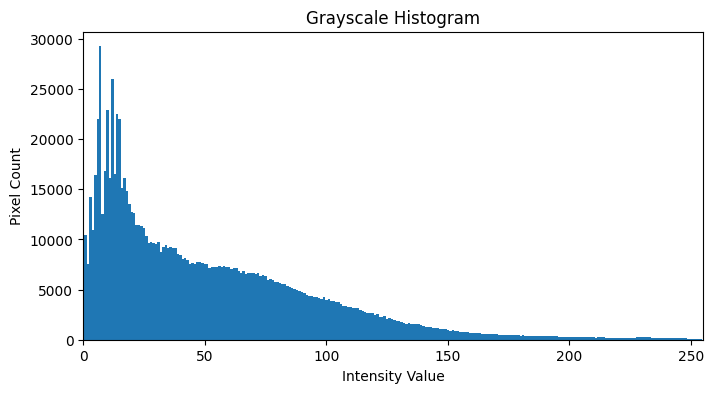

In [22]:
# A1

img_np = np.array(img)

# RGB to gray image
def rgb_to_gray(img_rgb):
    r = img_rgb[:,:,0]
    g = img_rgb[:,:,1]
    b = img_rgb[:,:,2]
    gray = 0.299*r + 0.587*g + 0.114*b
    return gray.astype(np.uint8)

gray_img = rgb_to_gray(img_np)

print("rgb image shape: ",img_np.shape)  #rgb image shape
print("gray image shape: ",gray_img.shape)  #gray image shape


def gray_histogram(gray_img):

    # gray_img : 2D array (H, W), uint8, values 0–255
    # Returns: hist array of length 256
    hist = np.zeros(256, dtype=np.int64)
    H, W = gray_img.shape

    # pure numpy loops = nested Python loops
    for i in range(H):
        for j in range(W):
            intensity = gray_img[i, j]
            hist[int(intensity)] += 1

    return hist

hist = gray_histogram(gray_img)

plt.figure(figsize=(8,4))
plt.bar(np.arange(256), hist, width=1.0)
plt.title("Grayscale Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.xlim([0,255])
plt.show()

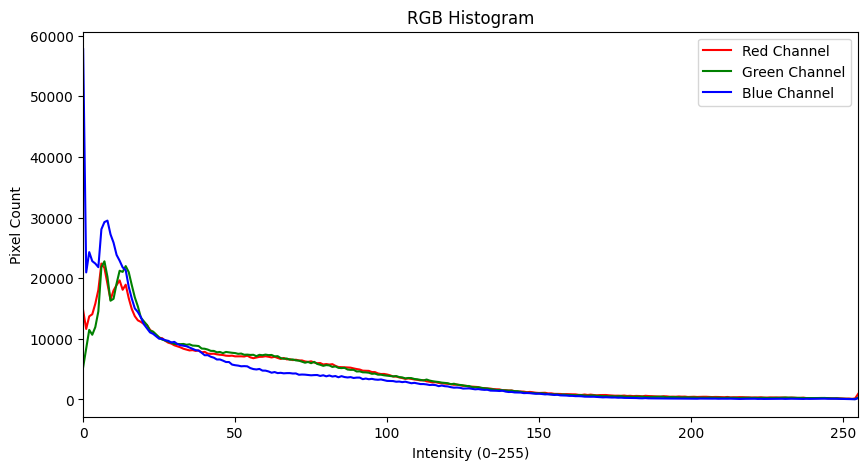

In [23]:
# A2

def rgb_histogram(img_rgb):

    hist_r = np.zeros(256, dtype=np.int64)
    hist_g = np.zeros(256, dtype=np.int64)
    hist_b = np.zeros(256, dtype=np.int64)

    H, W, C = img_rgb.shape

    # Loop over pixels
    for i in range(H):
        for j in range(W):
            r, g, b = img_rgb[i, j]
            hist_r[r] += 1
            hist_g[g] += 1
            hist_b[b] += 1

    return hist_r, hist_g, hist_b

hist_r, hist_g, hist_b = rgb_histogram(img_np)


plt.figure(figsize=(10,5))

plt.plot(hist_r, color='r', label='Red Channel')
plt.plot(hist_g, color='g', label='Green Channel')
plt.plot(hist_b, color='b', label='Blue Channel')

plt.title("RGB Histogram")
plt.xlabel("Intensity (0–255)")
plt.ylabel("Pixel Count")
plt.xlim([0,255])
plt.legend()
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [24]:
def rgb_to_hsv(img_rgb):
    # convert to float 0–1
    r = img_rgb[:,:,0] / 255.0
    g = img_rgb[:,:,1] / 255.0
    b = img_rgb[:,:,2] / 255.0

    # max, min, delta
    c_max = np.maximum(np.maximum(r, g), b)
    c_min = np.minimum(np.minimum(r, g), b)
    delta = c_max - c_min

    # Hue
    h = np.zeros_like(c_max)

    # only compute hue where delta != 0
    mask = delta != 0

    # Red is max
    mask_r = (c_max == r) & mask
    h[mask_r] = (60 * ((g[mask_r] - b[mask_r]) / delta[mask_r]) + 360) % 360

    # Green is max
    mask_g = (c_max == g) & mask
    h[mask_g] = 60 * (((b[mask_g] - r[mask_g]) / delta[mask_g]) + 2)

    # Blue is max
    mask_b = (c_max == b) & mask
    h[mask_b] = 60 * (((r[mask_b] - g[mask_b]) / delta[mask_b]) + 4)

    # Saturation
    s = np.zeros_like(c_max)
    mask2 = c_max != 0
    s[mask2] = delta[mask2] / c_max[mask2]

    # Value
    v = c_max

    # Scale to OpenCV format
    H = (h / 2).astype(np.uint8)          # 0–179
    S = (s * 255).astype(np.uint8)        # 0–255
    V = (v * 255).astype(np.uint8)        # 0–255

    hsv = np.zeros_like(img_rgb)
    hsv[:,:,0] = H
    hsv[:,:,1] = S
    hsv[:,:,2] = V

    return hsv

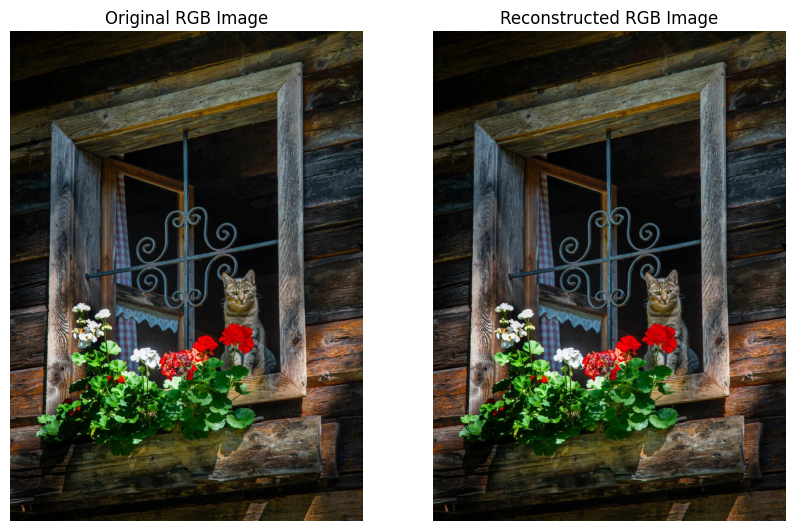

In [28]:
hsv_image = rgb_to_hsv(img_np)   # use img_np instead of img_rgb

img_rgb_reconstructed = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_reconstructed)
plt.title("Reconstructed RGB Image")
plt.axis("off")

plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

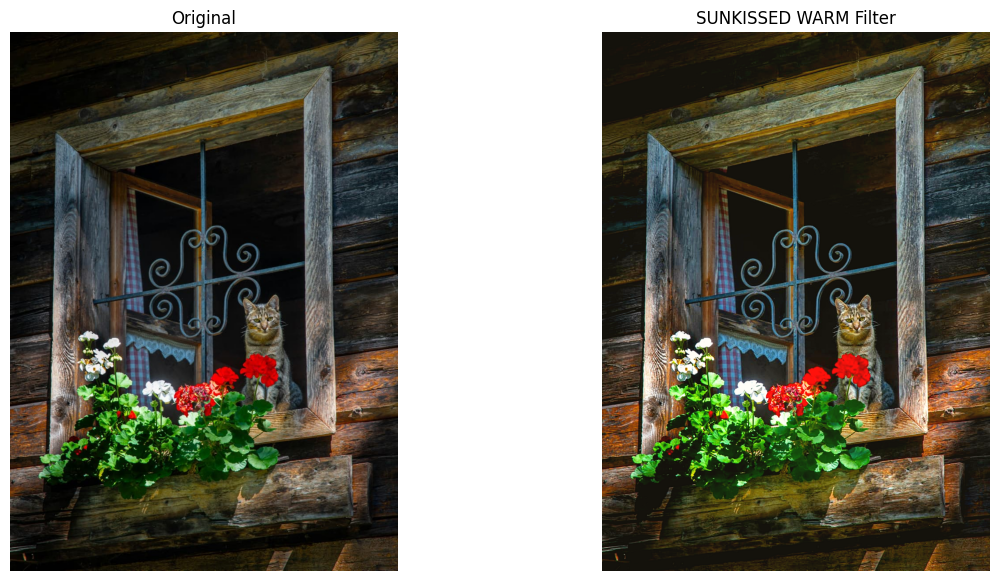

I increased contrast to +25% and brightness +18 to add brightness (as in sunrays) and lift midtones.
 I applied gamma=0.94 (<1) to brighten midtones subtly, increased saturation by 30%, added a warmth
 and a gentle yellowish tint (8% overlay of [255,235,160]) to simulate stronger sunlight.


In [35]:
# FILTER 1 "SUNKISSED WARM"

import numpy as np
import cv2
import matplotlib.pyplot as plt

# small helper: gamma correction via LUT
def apply_gamma_uint8(img_uint8, gamma=1.0):
    inv = 1.0 / float(gamma)
    lut = np.array([((i / 255.0) ** inv) * 255.0 for i in range(256)], dtype=np.uint8)
    return cv2.LUT(img_uint8, lut)

def sunkissed_warm_enhanced(img_rgb,
                            contrast=1.25,      # increased contrast
                            brightness=18,      # small brightness lift
                            gamma_val=0.94,     # gamma < 1 brightens midtones
                            sat_mul=1.30,       # slight saturation boost
                            warmth=1.18,        # channel-mix warmth (R boost)
                            tint_strength=0.08, # slightly strong the yellow tint
                            sharp_amount=0.6,
                            blur_ksize=5):

    # Work in float for arithmetic
    img = img_rgb.astype(np.float32)

    # 1) Contrast adjustment
    #    - Amount: contrast = 1.25 (~+25%)
    #    - Why: stronger contrast infront of sunrays
    mid = 127.5
    img = (img - mid) * contrast + mid + brightness
    img = np.clip(img, 0, 255).astype(np.uint8)  # convert to uint8 for gamma

    # 2) Saturation increase
    #    - Amount: sat_mul = 1.30 (+30%)
    #    - Why: more vivid colors (skin, flowers, sky) for warm (yellowish) look
    bgr = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
    hsv[...,1] = np.clip(hsv[...,1] * sat_mul, 0, 255)
    bgr2 = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    rgb = cv2.cvtColor(bgr2, cv2.COLOR_BGR2RGB).astype(np.float32)

    # 3) Gamma correction (gamma < 1 brightens midtones)
    #    - Amount: gamma_val = 0.94
    #    - Why: gentle midtone lift to simulate sunlight glow
    img = apply_gamma_uint8(img, gamma=gamma_val).astype(np.float32)

    # 4) Custom colour (yellowish) tint (overlay)
    #    - Why: subtle global yellow cast for warmer look (feels sunlight)
    tint_color = np.array([255.0, 235.0, 160.0], dtype=np.float32)  # RGB
    # compute overlay: out = (1 - t) * rgb + t * tint_color
    t = np.clip(tint_strength, 0.0, 0.3)
    rgb = (1.0 - t) * rgb + t * tint_color
    rgb = np.clip(rgb, 0, 255)

    # 5) Soft sharpening (unsharp mask)
    #    - same as before: unsharp = original + amount*(original - blurred)
    base = rgb.astype(np.uint8)
    k = blur_ksize if blur_ksize % 2 == 1 else blur_ksize + 1
    if k < 3: k = 3
    blurred = cv2.GaussianBlur(base, (k, k), 0)
    unsharp = base.astype(np.float32) + sharp_amount * (base.astype(np.float32) - blurred.astype(np.float32))
    unsharp = np.clip(unsharp, 0, 255).astype(np.uint8)

     # 6) Channel mixing (warmth)
    #    - Amount: R *= warmth (1.18 => +18%), G *= ~1.09, B *= ~0.946
    #    - Why: adds golden/red tones typical of sunset/ golden hour
    rgb[...,0] *= warmth
    rgb[...,1] *= (1.0 + (warmth - 1.0) * 0.5)
    rgb[...,2] *= (1.0 - (warmth - 1.0) * 0.3)
    rgb = np.clip(rgb, 0, 255)

    return unsharp

out = sunkissed_warm_enhanced(img_np)  # filter applied on our image

plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.imshow(img_np); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(out); plt.title("SUNKISSED WARM Filter"); plt.axis("off")
plt.show()

# explanation for filter:
print("""I increased contrast to +25% and brightness +18 to add brightness (as in sunrays) and lift midtones.
 I applied gamma=0.94 (<1) to brighten midtones subtly, increased saturation by 30%, added a warmth
 and a gentle yellowish tint (8% overlay of [255,235,160]) to simulate stronger sunlight.""")


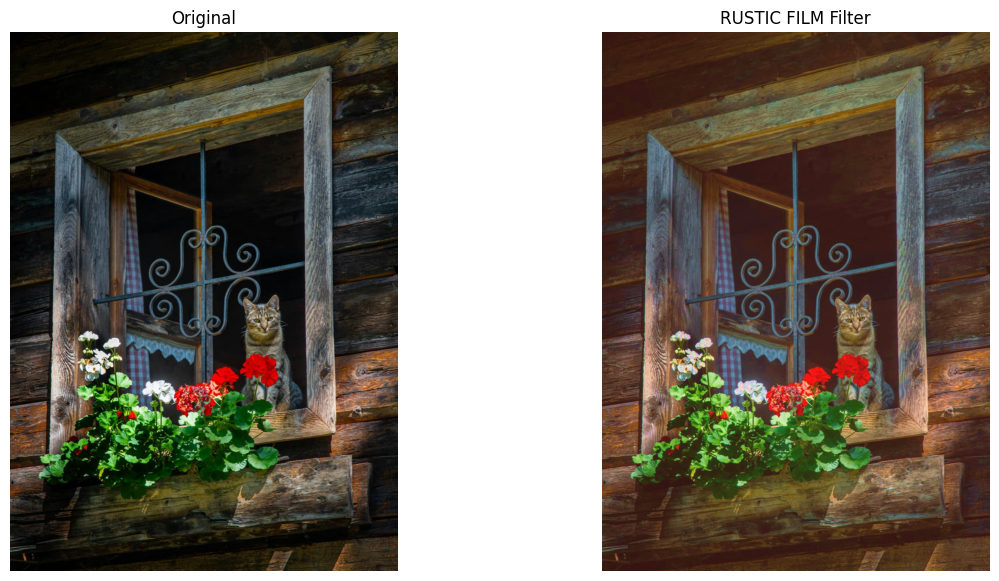

RusticFilm softens contrast (-5%), slightly lifts brightness (+5), and applies gamma 1.08
to deepen wooden textures. Vibrance is boosted (+18%) to enhance flowers without oversaturating
the scene. Warm split-toning and a 7% orange-brown tint complement the rustic cabin tones,
creating a natural cinematic look ideal for this image.


In [43]:
# FILTER 2 — "RUSTIC FILM"

img_f = img_np.copy()

def rustic_film(img_f,
                contrast=0.95,        # slight contrast softening (-5%)
                brightness=5,         # mild lift (+5)
                gamma_val=1.08,       # gamma > 1 darkens midtones
                vibrance=0.18,        # low-saturation pixels boosted (+18%)
                shadow_warm=0.12,     # warm shadows (12%)
                highlight_warm=0.06,  # warm highlights (6%)
                tint_strength=0.07):  # orange-brown tint overlay (7%)

    # Convert input to float for calculations
    img = img_f.astype(np.float32)

    # 1) Contrast adjustment
    #    Amount: contrast = 0.95 (reduces contrast by ~5%)
    #    Why: gives a softer film look instead of harsh sunlight contrast.
    mid = 127.5
    img = (img - mid) * contrast + mid + brightness
    img = np.clip(img, 0, 255).astype(np.uint8)

    # 2) Gamma correction (>1 darkens midtones)
    #    Amount: gamma_val = 1.08
    #    Why: helps wooden textures look richer and deeper.
    lut = np.array([((i/255.0)**(1/gamma_val))*255 for i in range(256)], dtype=np.uint8)
    img = cv2.LUT(img, lut).astype(np.float32)

    # 3) Vibrance boost (protect highlights & saturated colors)
    #    Amount: vibrance = 0.18 (18%)
    #    Why: makes flowers pop without oversaturating cat/wood.
    bgr = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
    S = hsv[:,:,1] / 255.0
    hsv[:,:,1] = np.clip((S + (1-S)*vibrance) * 255.0, 0, 255)

    # Convert back to RGB
    bgr2 = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    rgb = cv2.cvtColor(bgr2, cv2.COLOR_BGR2RGB).astype(np.float32)

    # 4) Warm split-toning (shadows + highlights)
    V = hsv[:,:,2] / 255.0
    shadow_mask = np.clip((0.5 - V)/0.5, 0, 1)
    highlight_mask = np.clip((V - 0.5)/0.5, 0, 1)

    # Shadows + Highlights warm tone
    rgb[:,:,0] += 255 * shadow_warm * shadow_mask
    rgb[:,:,0] += 255 * highlight_warm * highlight_mask
    rgb = np.clip(rgb, 0, 255)

    # 5) Orange-brown tint overlay
    tint = np.array([210, 150, 90], dtype=np.float32)  # rustic warm color
    t = tint_strength
    rgb = rgb * (1 - t) + tint * t

    rgb = np.clip(rgb, 0, 255).astype(np.uint8)
    return rgb


# Apply the filter to img_f
out_rustic = rustic_film(img_f)

plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.imshow(img_f); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(out_rustic); plt.title("RUSTIC FILM Filter"); plt.axis("off")
plt.show()

# Explanation
print("""RusticFilm softens contrast (-5%), slightly lifts brightness (+5), and applies gamma 1.08
to deepen wooden textures. Vibrance is boosted (+18%) to enhance flowers without oversaturating
the scene. Warm split-toning and a 7% orange-brown tint complement the rustic cabin tones,
creating a natural cinematic look ideal for this image.""")


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [46]:
def white_patch_balance(img_rgb):

    # convert to float for safe division
    img = img_rgb.astype(np.float32)

    # 1) Find brightest pixel in each channel (Max R, Max G, Max B)
    #    White Patch assumes the brightest pixel SHOULD be white
    max_r = np.max(img[...,0])
    max_g = np.max(img[...,1])
    max_b = np.max(img[...,2])

    # 2) Compute scale factors to map max channel values → 255
    #    scale = 255 / brightest_in_channel
    scale_r = 255.0 / max_r if max_r > 0 else 1.0
    scale_g = 255.0 / max_g if max_g > 0 else 1.0
    scale_b = 255.0 / max_b if max_b > 0 else 1.0

    # 3) Apply scaling to each channel
    balanced = np.zeros_like(img)
    balanced[...,0] = img[...,0] * scale_r
    balanced[...,1] = img[...,1] * scale_g
    balanced[...,2] = img[...,2] * scale_b

    # 4) Clip to 0–255 and convert back to uint8
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    return balanced

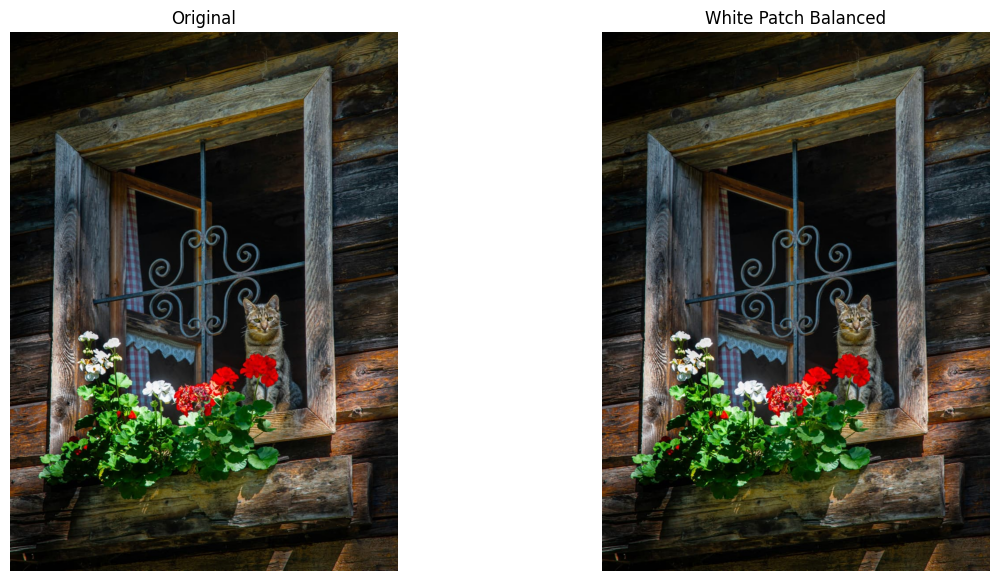

In [47]:
wb_img = white_patch_balance(img_f)

plt.figure(figsize=(14,7))
plt.subplot(1,2,1); plt.imshow(img_f); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(wb_img); plt.title("White Patch Balanced"); plt.axis("off")
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

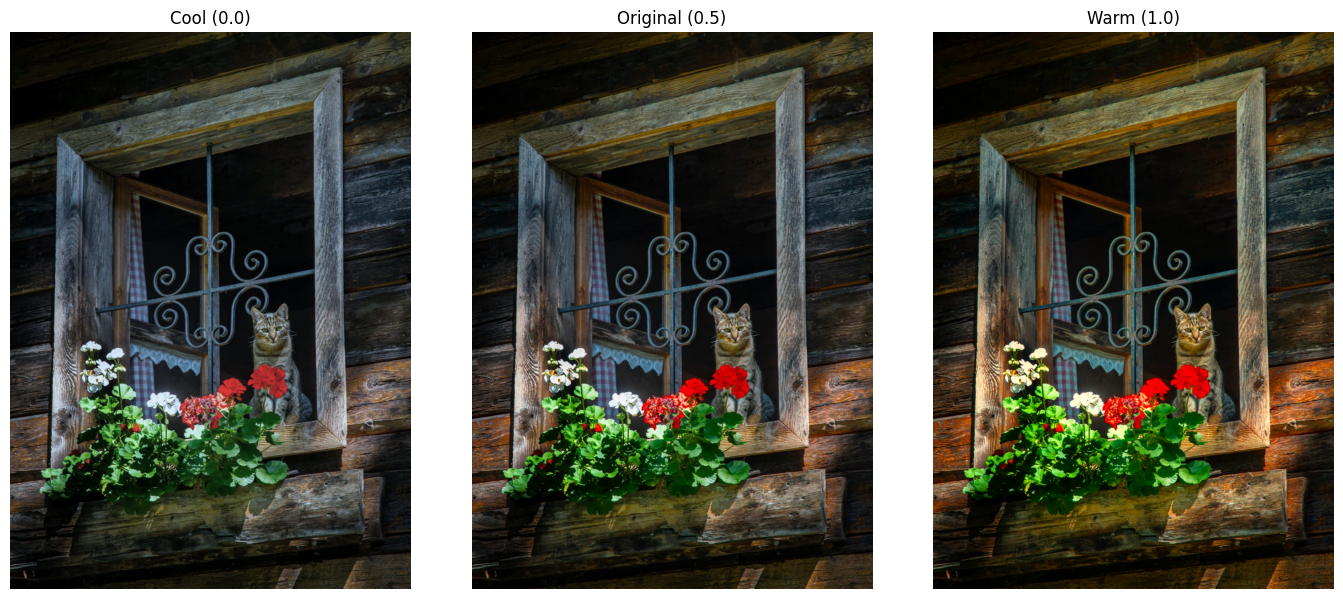

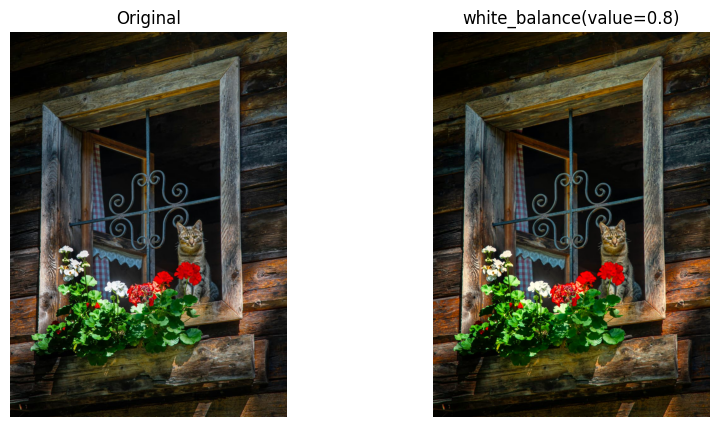

In [49]:
def white_balance(img_rgb, value):
    assert 0.0 <= value <= 1.0, "value must be in [0,1]"
    if value == 0.5:
        return img_rgb.copy()

    # Work in float
    img = img_rgb.astype(np.float32)

    # Predefined cold and warm multipliers
    # Cool: make image cooler (less red, more blue)
    cool_mul = np.array([0.90, 1.00, 1.12], dtype=np.float32)   # R,G,B
    # Warm: make image warmer (more red, slightly more green, less blue)
    warm_mul = np.array([1.12, 1.05, 0.90], dtype=np.float32)   # R,G,B

    # Map user value (0..1) to interpolation factor t in [-1..1]
    t = (value - 0.5) * 2.0

    # Compute multipliers m per channel
    if t < 0:
        # Interpolate between identity (1.0) and cool_mul
        frac = -t  # 0..1
        m = 1.0 + (cool_mul - 1.0) * frac
    else:
        # Interpolate between identity (1.0) and warm_mul
        frac = t   # 0..1
        m = 1.0 + (warm_mul - 1.0) * frac

    # Apply per-channel multipliers
    out = img * m.reshape((1,1,3))

    # Slight saturation adjustment (vibrance-like)
    # If warming (t>0) => increase saturation a bit; if cooling => reduce a bit
    sat_factor = 1.0 + 0.25 * t   # t in [-1,1] => sat_factor ~ [0.75,1.25]
    # Convert to HSV, adjust S, convert back
    bgr = cv2.cvtColor(np.clip(out,0,255).astype(np.uint8), cv2.COLOR_RGB2BGR)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV).astype(np.float32)
    hsv[...,1] = np.clip(hsv[...,1] * sat_factor, 0, 255)
    bgr2 = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)
    out = cv2.cvtColor(bgr2, cv2.COLOR_BGR2RGB).astype(np.float32)

    # Preserve overall brightness (avoid clipping/too dark)
    mean_before = img.mean()
    mean_after  = out.mean()
    if mean_after > 0:
        out = out * (mean_before / mean_after)

    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

vals = [0.0, 0.5, 1.0]   # coldest, original, warmest
outs = [white_balance(img_f, v) for v in vals]

plt.figure(figsize=(14,6))
titles = ["Cool (0.0)", "Original (0.5)", "Warm (1.0)"]
for i, im in enumerate(outs):
    plt.subplot(1,3,i+1)
    plt.imshow(im)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

# Example: show a custom value (e.g., 0.8 warm slider)
example_val = 0.8
out_example = white_balance(img_f, example_val)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img_f); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(out_example); plt.title(f"white_balance(value={example_val})"); plt.axis("off")
plt.show()
